In [220]:
import numpy as np
import pandas as pd
from scipy import stats

from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.style as style
from matplotlib import patches 

import seaborn as sns 
sns.set()

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

from sklearn.feature_selection import RFE

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression, Ridge,RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb
import lightgbm as lgb

import statsmodels.api as sm

from scipy.stats import linregress

In [221]:
style.use('fivethirtyeight')

rand_state=1000 
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=rand_state)
folds = KFold(n_splits = 5, shuffle = True, random_state = rand_state)

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Data Preparation

### 1.import data

In [222]:
train=pd.read_csv('data/train.csv')
test=pd.read_csv('data/test.csv')
train["SalePrice1"] = np.log1p(train["SalePrice"])
# train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv', index_col='Id')
# test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv', index_col='Id')
# train["SalePrice1"] = np.log1p(train["SalePrice"])

In [223]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice  SalePrice1
0   1          60       RL         65.0     8450   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856    GasA        Ex          Y      SBrkr       856       854             0       1710             1             0         2         1             3             1          Gd             8        Typ           0         NaN     Attchd       2003.0          RFn           2         548         TA         TA          Y           0           61              0          0            0         0    NaN   NaN         NaN        0       2    2008       WD        Normal     208500   12.247699
1   2          20       RL         80.0     9600   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd       None         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0             0       1262             0             1         2         0             3             1          TA             6        Typ           1          TA     Attchd       1976.0          RFn           2         460         TA         TA          Y         298            0              0          0            0         0    NaN   NaN         NaN        0       5    2007       WD        Normal     181500   12.109016
2   3          60       RL         68.0    11250   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920    GasA        Ex          Y      SBrkr       920       866             0       1786             1             0         2         1             3             1          Gd             6        Typ           1          TA     Attchd       2001.0          RFn           2         608         TA         TA          Y           0           42              0          0            0         0    NaN   NaN         NaN        0       9    2008       WD        Normal     223500   12.317171
3   4          70       RL         60.0     9550   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ         216    

In [224]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [225]:
train.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFin

### 2.missing values

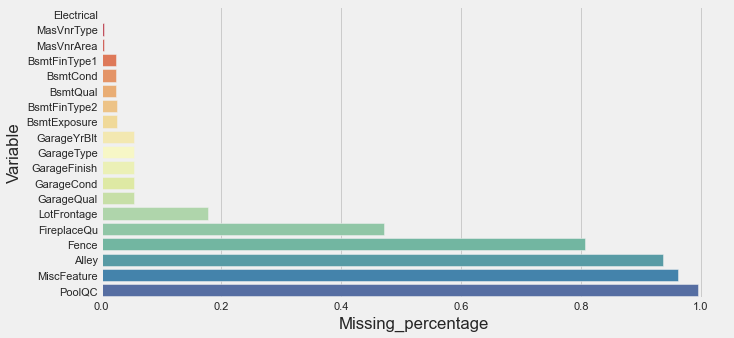

In [226]:
# missing value for each variables
def missing_percentage(df):
    nadf=(round(df.isna().sum().sort_values(ascending=True)/len(df),4)).reset_index()
    nadf.columns=['Variable','Missing_percentage']
    nadf=nadf[nadf['Missing_percentage']>0]

    if len(nadf)>0 :        
        fig, ax = plt.subplots(figsize=(10,5))
        sns.barplot(x='Missing_percentage',
               y='Variable',
               data=nadf,
               palette='Spectral')
    
    return nadf

train_na=missing_percentage(train)

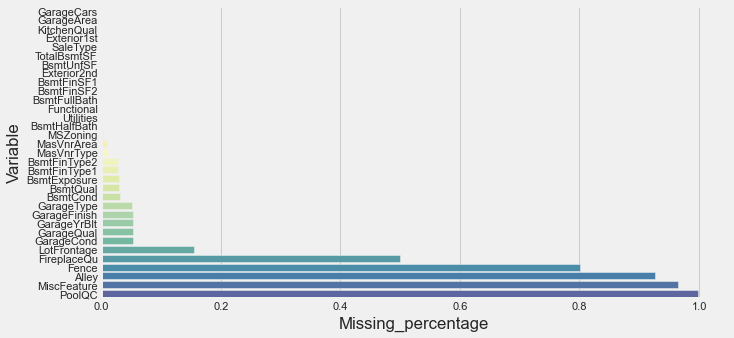

In [227]:
test_na=missing_percentage(test)

In [228]:
train_na['Variable']

63      Electrical
64      MasVnrType
65      MasVnrArea
66    BsmtFinType1
67        BsmtCond
68        BsmtQual
69    BsmtFinType2
70    BsmtExposure
71     GarageYrBlt
72      GarageType
73    GarageFinish
74      GarageCond
75      GarageQual
76     LotFrontage
77     FireplaceQu
78           Fence
79           Alley
80     MiscFeature
81          PoolQC
Name: Variable, dtype: object

In [229]:
test_na['Variable']

47      GarageCars
48      GarageArea
49     KitchenQual
50     Exterior1st
51        SaleType
52     TotalBsmtSF
53       BsmtUnfSF
54     Exterior2nd
55      BsmtFinSF1
56      BsmtFinSF2
57    BsmtFullBath
58      Functional
59       Utilities
60    BsmtHalfBath
61        MSZoning
62      MasVnrArea
63      MasVnrType
64    BsmtFinType2
65    BsmtFinType1
66    BsmtExposure
67        BsmtQual
68        BsmtCond
69      GarageType
70    GarageFinish
71     GarageYrBlt
72      GarageQual
73      GarageCond
74     LotFrontage
75     FireplaceQu
76           Fence
77           Alley
78     MiscFeature
79          PoolQC
Name: Variable, dtype: object

In [230]:
## Replaced all missing values in LotFrontage by imputing the median value of each neighborhood. 
train['LotFrontage'] = train.groupby('Neighborhood')['LotFrontage'].transform( lambda x: x.fillna(x.median()))
test['LotFrontage'] = test.groupby('Neighborhood')['LotFrontage'].transform( lambda x: x.fillna(x.median()))

In [231]:
typicals=['ExterQual','ExterCond','BsmtQual','BsmtCond',
          'HeatingQC','KitchenQual','FireplaceQu','GarageQual',
          'GarageCond','PoolQC']
nos=['CentralAir']
nas=['FireplaceQu','Fence']

for col in typicals:
    train[col]=train[col].fillna('TA')
    test[col]=test[col].fillna('TA')
    
for col in nos:
    train[col]=train[col].fillna('N')
    test[col]=test[col].fillna('TA')

for col in nas:
    train[col]=train[col].fillna('NA')
    test[col]=test[col].fillna('TA')
    

In [232]:
# numeric columns
def numeric_columns(df):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    df_numeric = df.select_dtypes(include=numerics)
    return df_numeric 

# object columns
def object_columns(df):
    objects = ['object']
    df_object = df.select_dtypes(include=objects)
    return df_object 

In [233]:
## Train Dataset
missing=train_na['Variable']
train_missing=train[missing]

# fill null values with 0 for numeric columns
for col in numeric_columns(train_missing).columns:
    if col !='LotFrontage':
        train[col]=train[col].fillna(0)
    
# fill null values with None for object columns
for col in object_columns(train_missing).columns:
    if col not in typicals and col not in nos and col not in nas:
        train[col]=train[col].fillna('None')

In [234]:
## test Dataset
missing=test_na['Variable']
test_missing=test[missing]

# fill null values with 0 for numeric columns
for col in numeric_columns(test_missing).columns:
    if col !='LotFrontage':
        test[col]=test[col].fillna(0)
    
# fill null values with None for object columns
for col in object_columns(test_missing).columns:
    if col not in typicals and col not in nos and col not in nas:
        test[col]=test[col].fillna('None')

In [237]:
missing_percentage(train)

Empty DataFrame
Columns: [Variable, Missing_percentage]
Index: []

In [239]:
missing_percentage(test)

Empty DataFrame
Columns: [Variable, Missing_percentage]
Index: []

## Explorary Data Analysis

In [240]:
train['SalePrice'].sort_values()

495      34900
916      35311
968      37900
533      39300
30       40000
         ...  
803     582933
898     611657
1169    625000
1182    745000
691     755000
Name: SalePrice, Length: 1460, dtype: int64

### 1. features most linearly correlated to target variable

In [241]:
# getting the correlation of all the features with target variable
cor1=(train.corr()**2)['SalePrice'].sort_values(ascending=False).to_frame() 
cor1.sort_values('SalePrice',ascending=False)[2:20]

# # log scaled correlations
# cor2=(train.corr()**2)['SalePrice1'].sort_values(ascending=False).to_frame() 
# cor=pd.merge(cor1, cor2, left_index=True, right_index=True)
# cor.rename(columns={'SalePrice1': 'Log SalePrice'},inplace=True)
# cor['diff']=cor['SalePrice']-cor['Log SalePrice']

SalePrice
OverallQual    0.625652
GrLivArea      0.502149
GarageCars     0.410124
GarageArea     0.388667
TotalBsmtSF    0.376481
1stFlrSF       0.367057
FullBath       0.314344
TotRmsAbvGrd   0.284860
YearBuilt      0.273422
YearRemodAdd   0.257151
MasVnrArea     0.223364
Fireplaces     0.218023
BsmtFinSF1     0.149320
LotFrontage    0.122413
WoodDeckSF     0.105244
2ndFlrSF       0.101974
OpenPorchSF    0.099765
HalfBath       0.080717

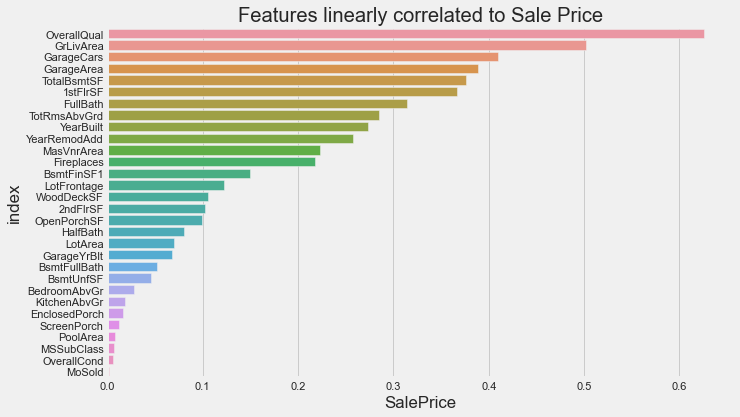

In [242]:
df_cor= cor1.reset_index().loc[2:]

plt.figure(figsize=(10,6))
plt.title('Features linearly correlated to Sale Price')
sns.barplot(y='index', x='SalePrice', data=df_cor.head(30))
plt.show()

### 2. check the bivariate distributions for features mostly linearly correlated to target variable.

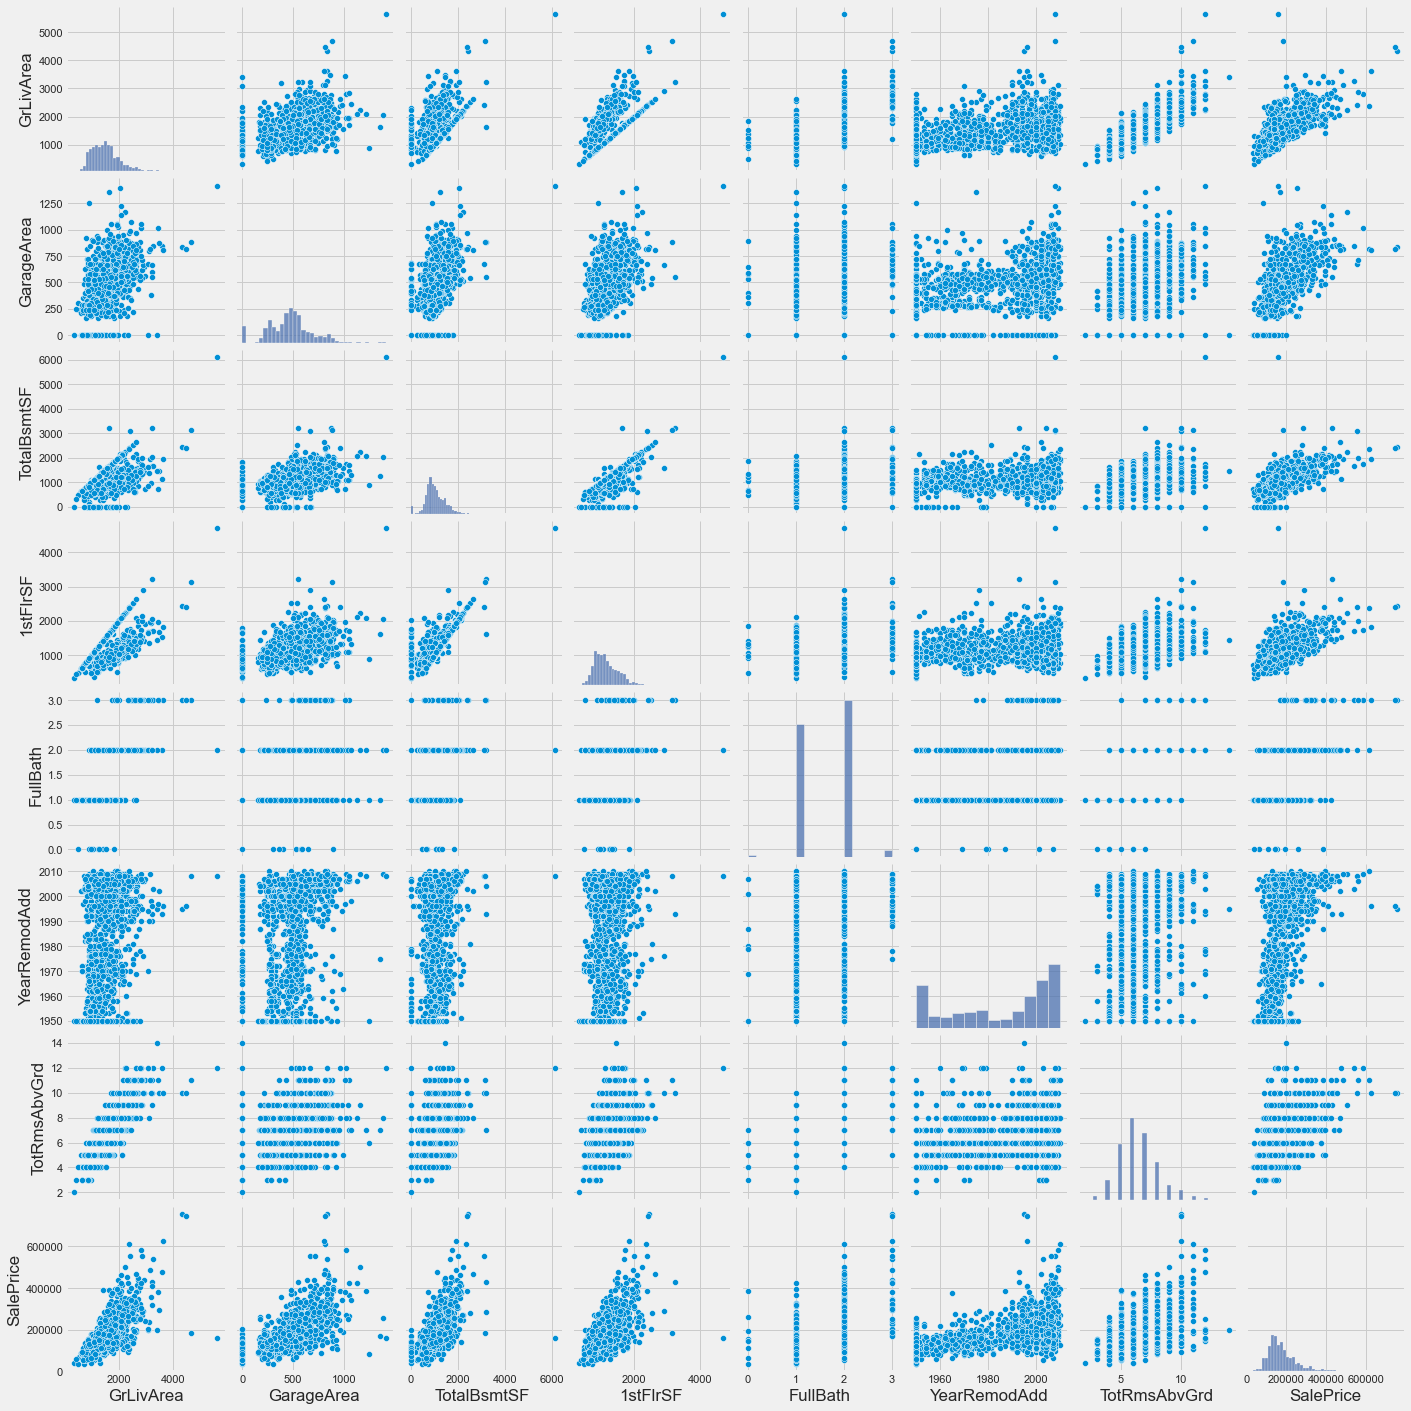

Wall time: 8.51 s


In [20]:
%%time

sns.pairplot(train[['GrLivArea',
                    'GarageArea',
                    'TotalBsmtSF',
                    '1stFlrSF',
                    'FullBath',
                    'YearRemodAdd',
                    'TotRmsAbvGrd',
                    'SalePrice']])
plt.show()

### 3. data distribution of target variable.

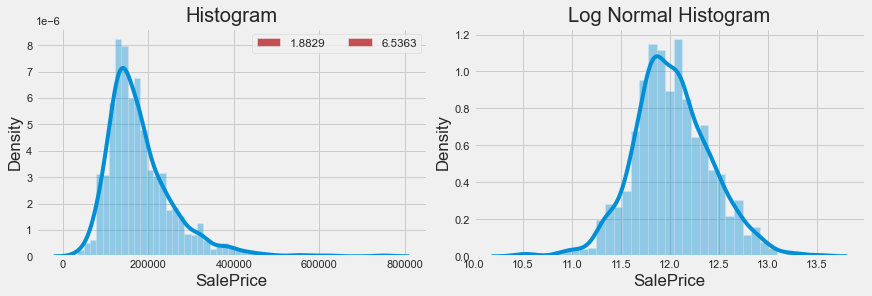

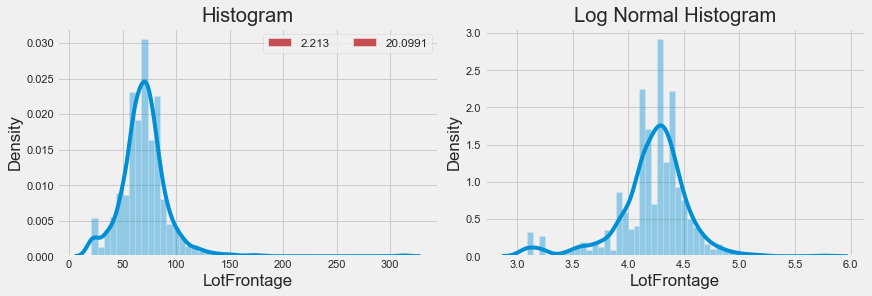

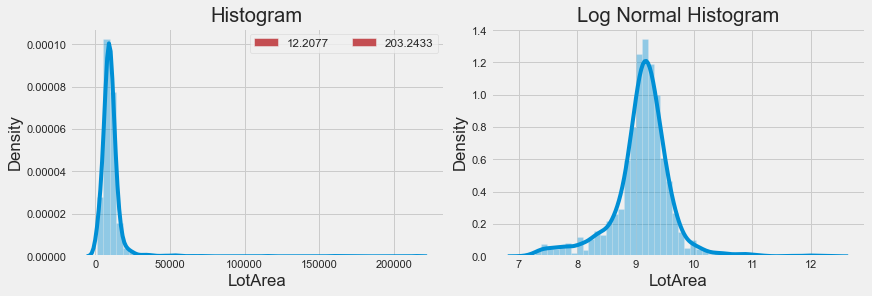

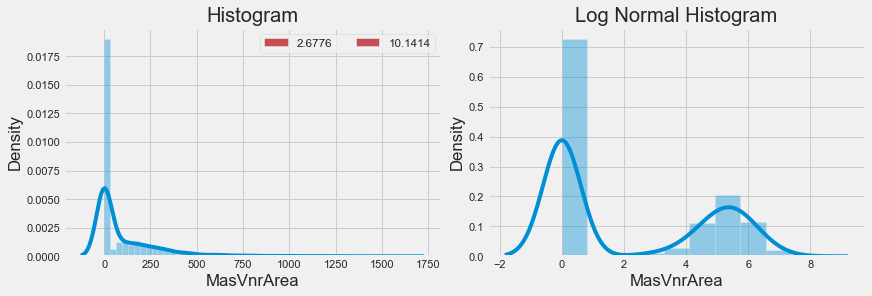

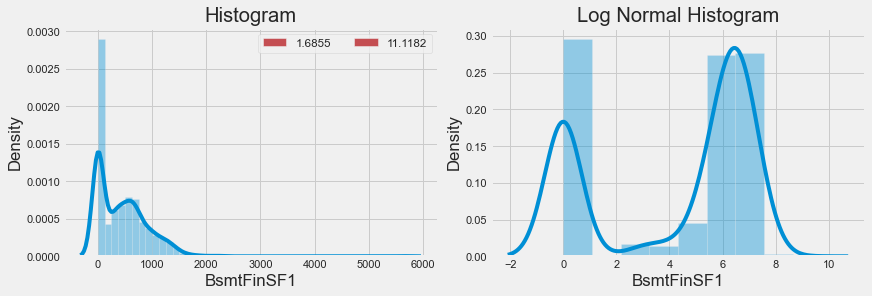

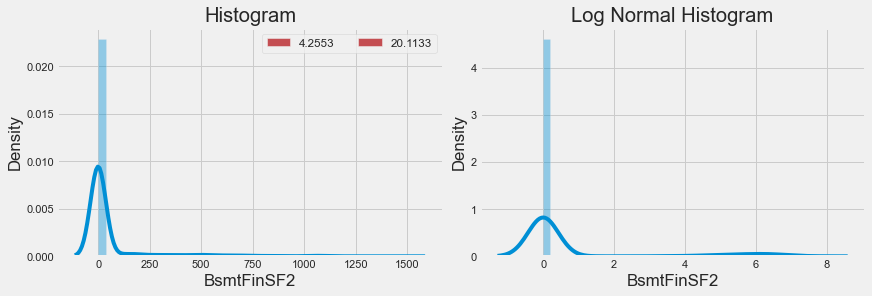

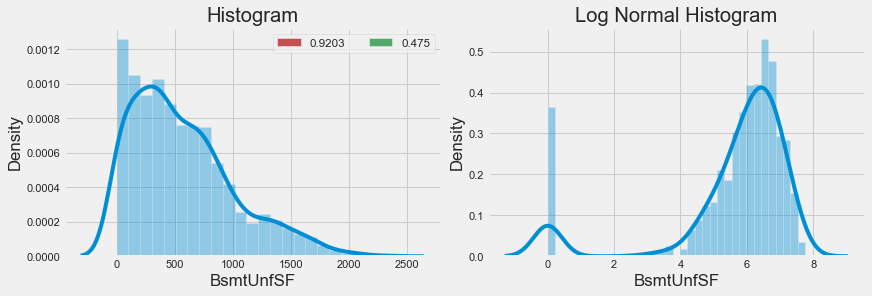

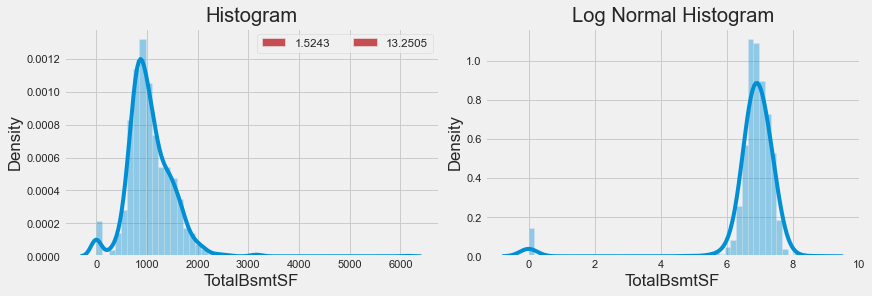

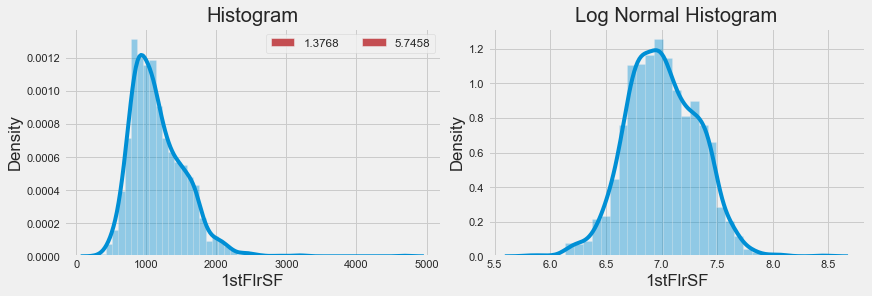

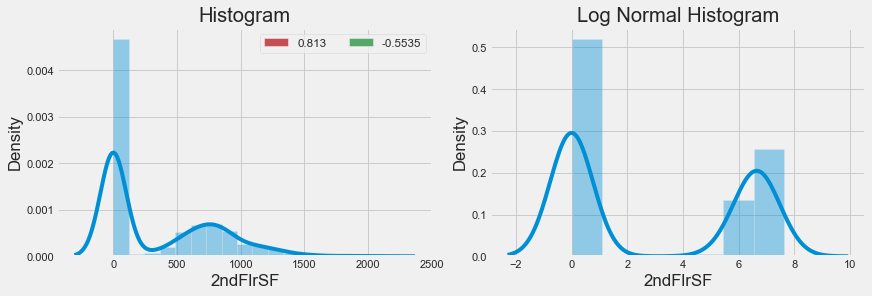

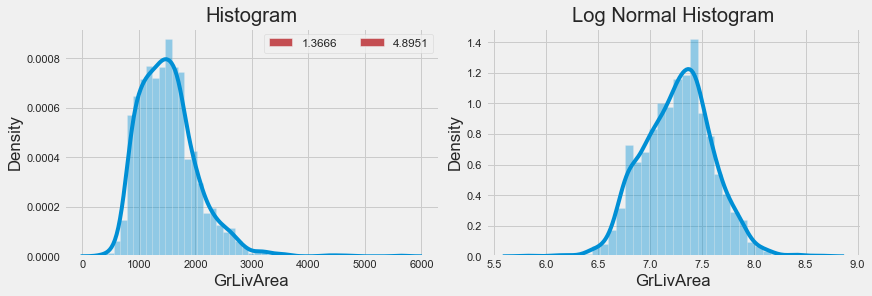

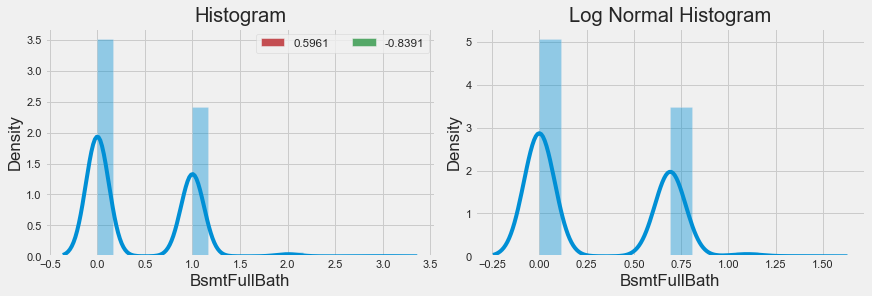

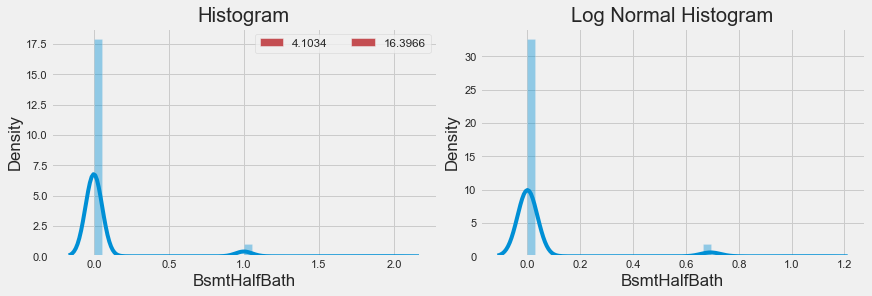

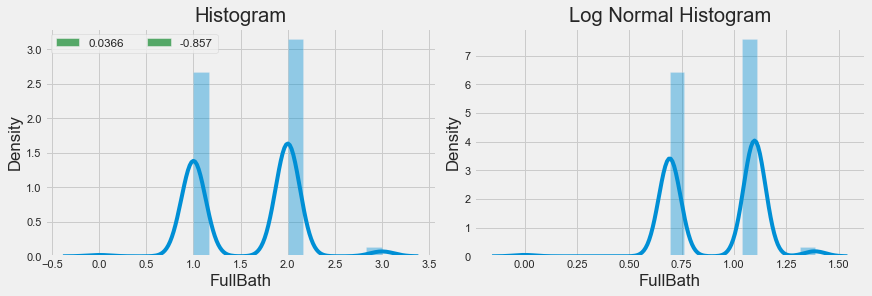

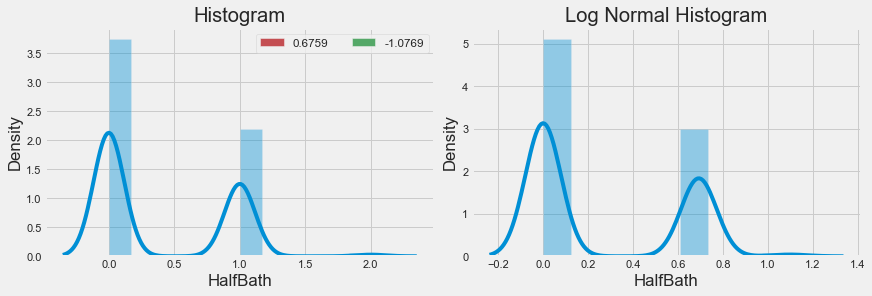

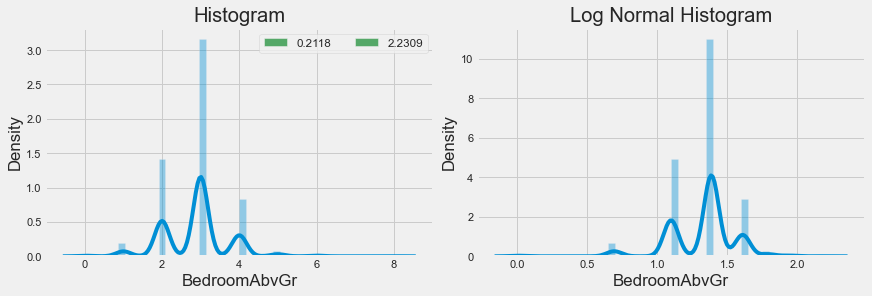

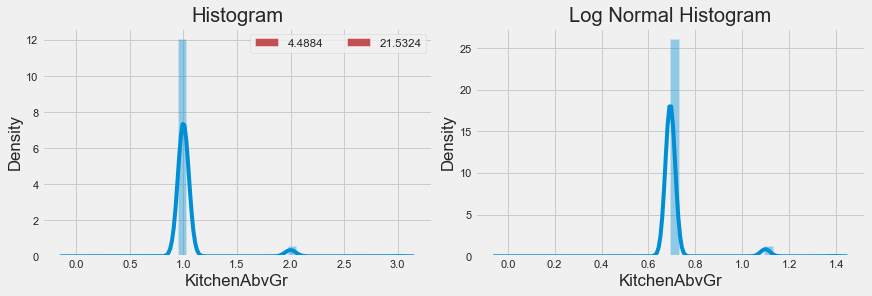

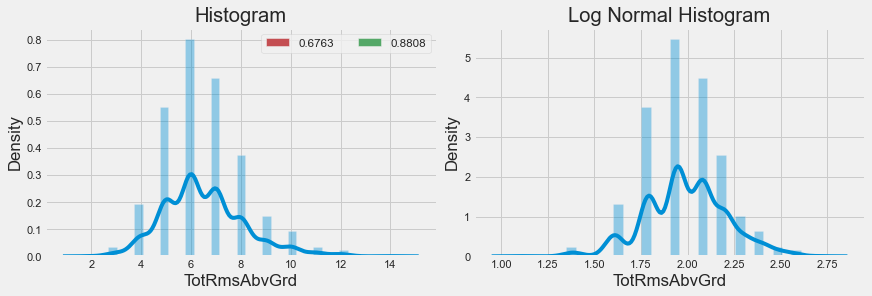

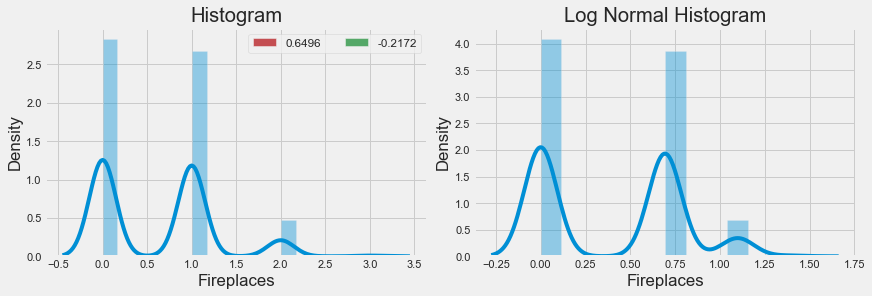

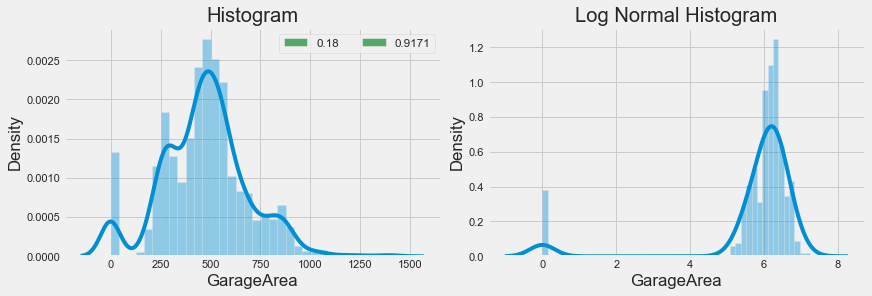

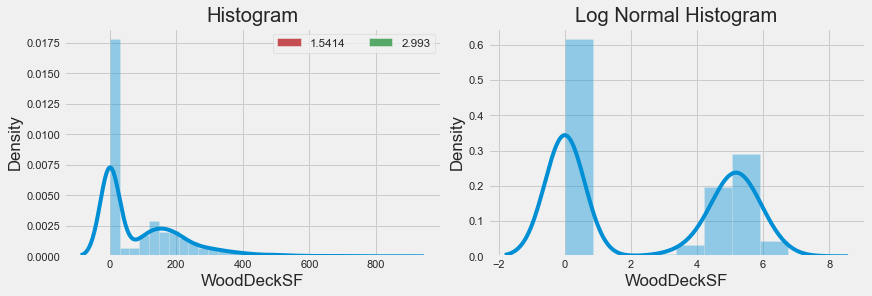

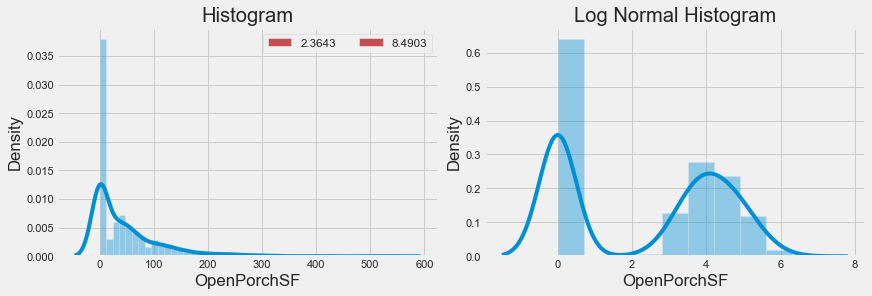

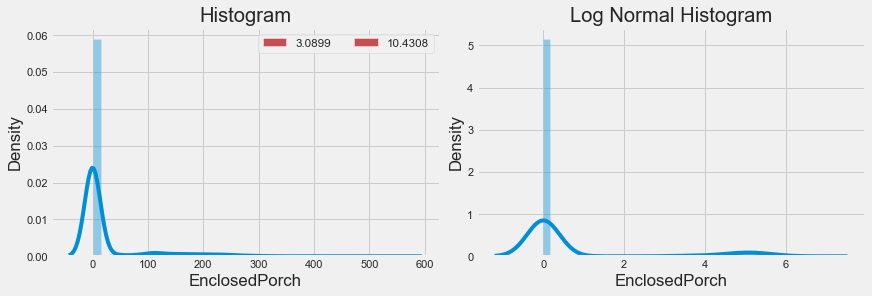

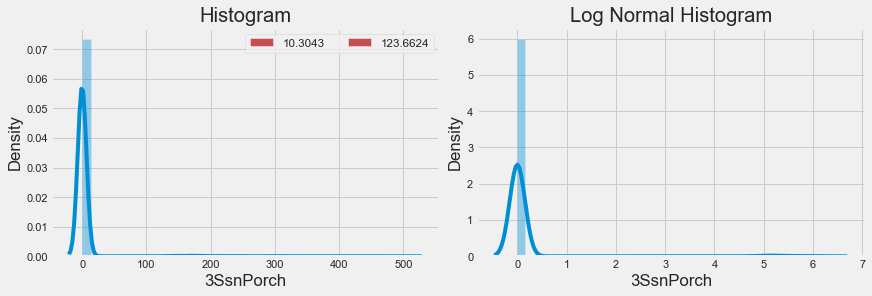

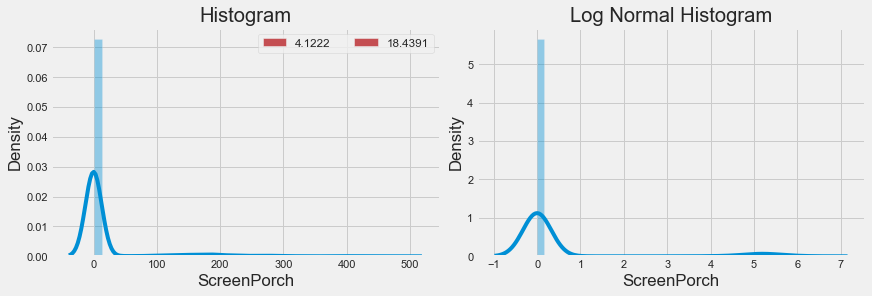

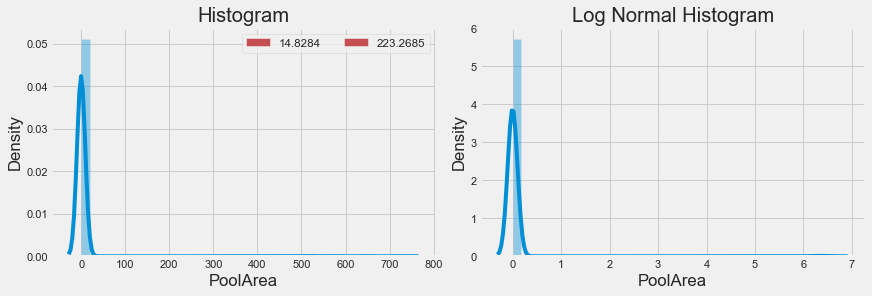

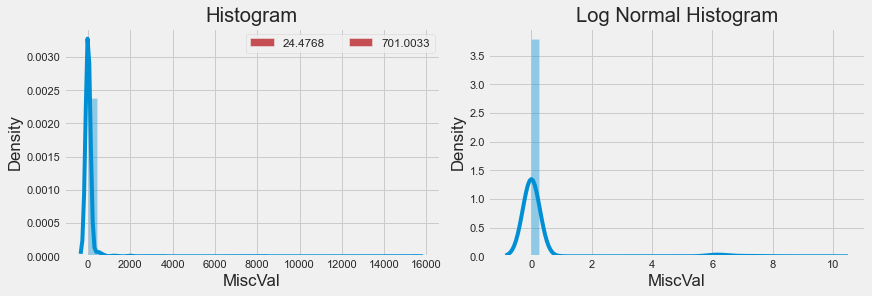

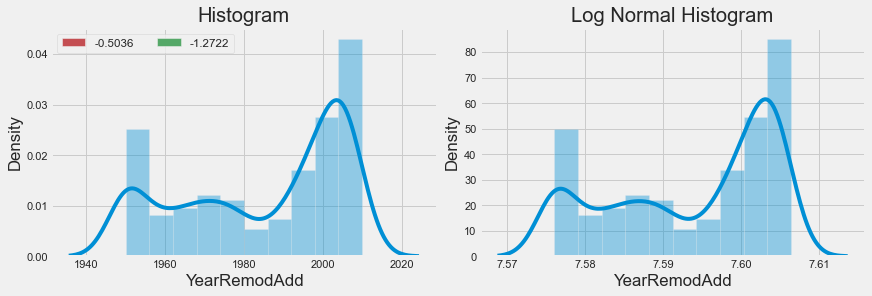

In [21]:
def plotting_3_chart(df, feature):

    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(12,4))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, 0])
    ## Set the title. 
    ax1.set_title('Histogram')
    ## plot the histogram. 
    sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)
    
    skewness=round(train[feature].skew(),4)
    Kurtosis=round(train[feature].kurt(),4)
    
    if (skewness>0.5) | (skewness<-0.5):
        cs='red'
    else:
        cs='green'
        
    if (Kurtosis>3) |(Kurtosis<-2):
        ck='red'
    else:
        ck='green'
        
    skew_patch = patches.Patch(color=cs, label=skewness)
    plt.legend(handles=[skew_patch])
    Kurtosis_patch = patches.Patch(color=ck, label=skewness)
    plt.legend(handles=[Kurtosis_patch])
    
    colors = [cs, ck]    
    texts = [skewness, Kurtosis]
    patchList = []
    for i in range(len(texts)):
        data_key = patches.Patch(facecolor=colors[i][0], label=texts[i])
        patchList.append(data_key)

    plt.gca()
    plt.legend(handles=patchList,ncol=len(patchList), fontsize='small')
    
    
#     # customizing the QQ_plot. 
#     ax2 = fig.add_subplot(grid[1, 0])
#     ## Set the title. 
#     ax2.set_title('QQ_plot')
#     ## Plotting the QQ_Plot. 
#     stats.probplot(df.loc[:,feature], plot = ax2)

#     ## Customizing the Box Plot. 
#     ax3 = fig.add_subplot(grid[2, 0])
#     ## Set title. 
#     ax3.set_title('Box Plot')
#     ## Plotting the box plot. 
#     sns.boxplot(y=df.loc[:,feature], ax = ax3 )

    log_feature=np.log1p(train[feature])
    ax4 = fig.add_subplot(grid[0, 1])
    ## Set the title. 
    ax4.set_title('Log Normal Histogram')
    ax4.set_xlabel('Log '+feature)
    ## plot the log-scaled histogram. 
    sns.distplot(log_feature, norm_hist=True, ax = ax4)
    
#     # customizing the QQ_plot. 
#     ax5 = fig.add_subplot(grid[1, 1])
#     ## Set the title. 
#     ax5.set_title('QQ_plot')
#     ## Plotting the QQ_Plot. 
#     stats.probplot(log_feature, plot = ax5)

#     ## Customizing the Box Plot. 
#     ax6 = fig.add_subplot(grid[2, 1])
#     ## Set title. 
#     ax6.set_title('Box Plot')
#     ## Plotting the box plot. 
#     sns.boxplot(y=log_feature, ax = ax6 )
    
    # Skew and kurt
#     print(feature+"_Skewness: %f" % train[feature].skew())
#     print(feature+"_Kurtosis: %f" % train[feature].kurt())
    
plotting_3_chart(train, 'SalePrice')
plotting_3_chart(train, 'LotFrontage')
plotting_3_chart(train, 'LotArea')
plotting_3_chart(train, 'MasVnrArea')
plotting_3_chart(train, 'BsmtFinSF1')
plotting_3_chart(train, 'BsmtFinSF2')
plotting_3_chart(train, 'BsmtUnfSF')
plotting_3_chart(train, 'TotalBsmtSF')
plotting_3_chart(train, '1stFlrSF')
plotting_3_chart(train, '2ndFlrSF')
plotting_3_chart(train, 'GrLivArea')
plotting_3_chart(train, 'BsmtFullBath')
plotting_3_chart(train, 'BsmtHalfBath')
plotting_3_chart(train, 'FullBath')
plotting_3_chart(train, 'HalfBath')
plotting_3_chart(train, 'BedroomAbvGr')
plotting_3_chart(train, 'KitchenAbvGr')
plotting_3_chart(train, 'TotRmsAbvGrd')
plotting_3_chart(train, 'Fireplaces')
# plotting_3_chart(train, 'GarageCars')
plotting_3_chart(train, 'GarageArea')
plotting_3_chart(train, 'WoodDeckSF')
plotting_3_chart(train, 'OpenPorchSF')
plotting_3_chart(train, 'EnclosedPorch')
plotting_3_chart(train, '3SsnPorch')
plotting_3_chart(train, 'ScreenPorch')
plotting_3_chart(train, 'PoolArea')
plotting_3_chart(train, 'MiscVal')
plotting_3_chart(train, 'YearRemodAdd')
# plotting_3_chart(train, 'TotalSF')

From the plots above, we could see the target variable are skewed and Heteroscedastic(variance of residual are not the same). One way to fix this Heteroscedasticity is by using a transformation method like log-transformation or box-cox transformation.

### 4. SalePrice vs OverallQual

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

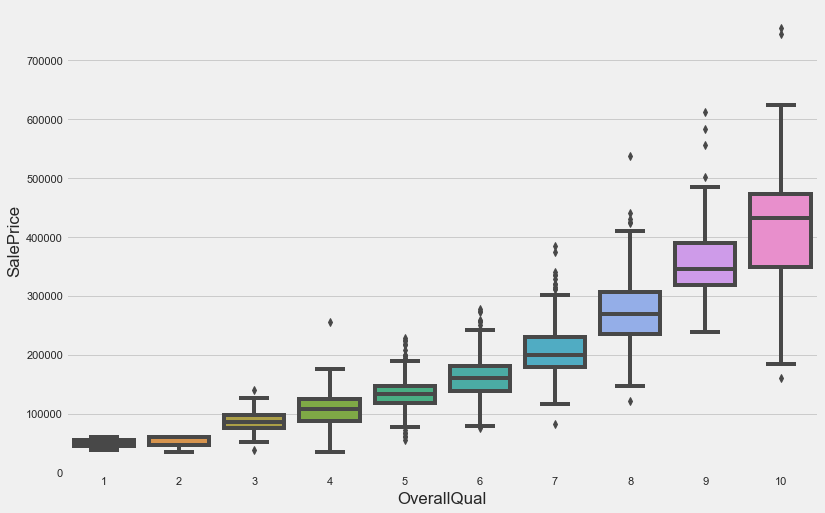

In [22]:
style.use('fivethirtyeight')
plt.subplots(figsize = (12,8))
sns.boxplot(x=train['OverallQual'], y=train["SalePrice"])

### 5. SalePrice vs Neighborhood

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

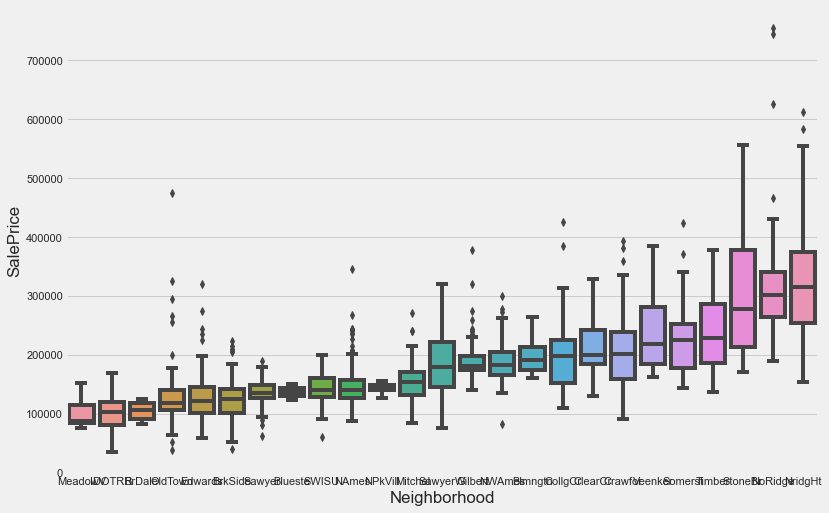

In [23]:
plt.subplots(figsize = (12,8))

feature_ord=train.groupby('Neighborhood').median().SalePrice.sort_values(ascending=True).index

sns.boxplot(x=train['Neighborhood'], y=train["SalePrice"],
           order=feature_ord)

### 6. Numeric features vs SalePrice

- check the polynomial trends

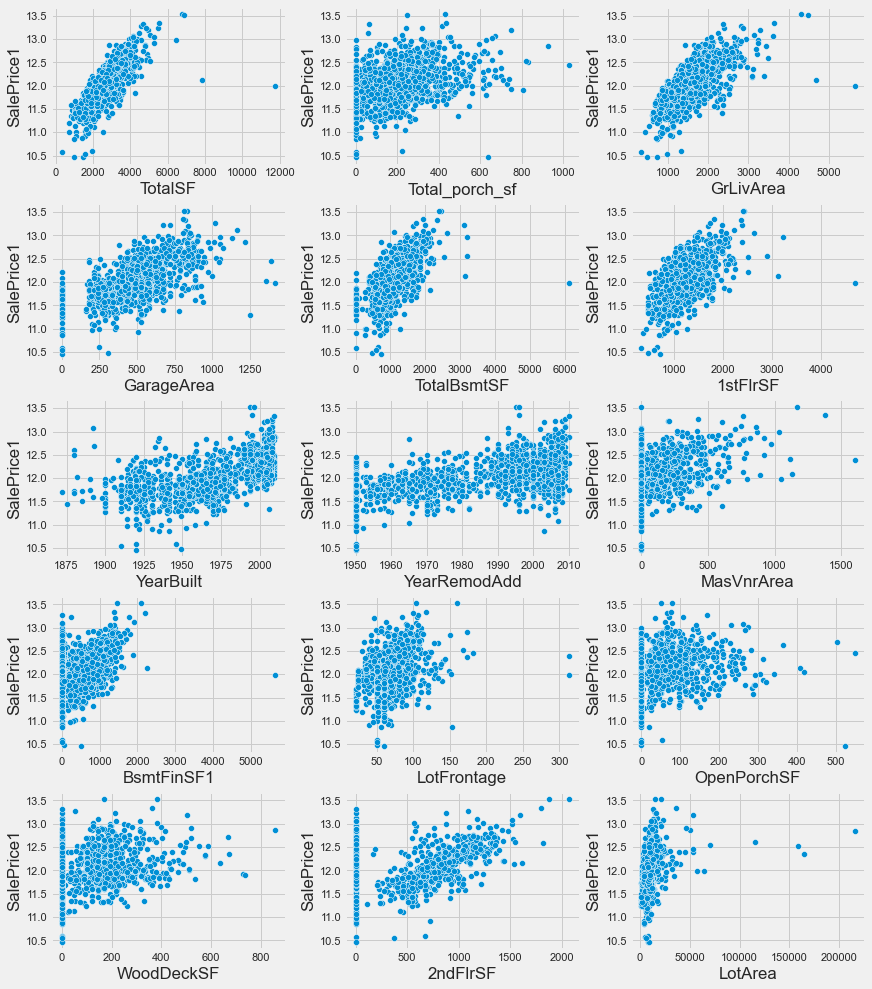

In [24]:
def plotting_numeric_feature_vs_target():

    fig = plt.figure(constrained_layout=True, figsize=(12,18))
    grid = gridspec.GridSpec(ncols=3, nrows=7, figure=fig)
    
    TotalSF=train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']
    Total_Bathrooms= (train['FullBath'] + (0.5 * train['HalfBath']) +
                                   train['BsmtFullBath'] + (0.5 * train['BsmtHalfBath']))
    Total_porch_sf= (train['OpenPorchSF'] + train['3SsnPorch'] +
                                  train['EnclosedPorch'] + train['ScreenPorch'] +
                                  train['WoodDeckSF'])
    
    ax1 = fig.add_subplot(grid[0, 0])
    sns.scatterplot(y = train.SalePrice1, x = TotalSF, ax = ax1)
    ax1.set(xlabel='TotalSF') 
    
    ax2 = fig.add_subplot(grid[0, 1])
    sns.scatterplot(y = train.SalePrice1, x = Total_porch_sf, ax = ax2)
    ax2.set(xlabel='Total_porch_sf') 
    
    
    ax3 = fig.add_subplot(grid[0, 2])
    sns.scatterplot(y = train.SalePrice1, x = train.GrLivArea, ax = ax3)
    
    
    ax4 = fig.add_subplot(grid[1, 0])
    sns.scatterplot(y = train.SalePrice1, x = train.GarageArea, ax = ax4)
    
    
    ax5 = fig.add_subplot(grid[1, 1])
    sns.scatterplot(y = train.SalePrice1, x = train.TotalBsmtSF, ax = ax5)
    
    
    ax6 = fig.add_subplot(grid[1, 2])
    sns.scatterplot(y = train.SalePrice1, x = train['1stFlrSF'], ax = ax6)
    
    
    ax7 = fig.add_subplot(grid[2, 0])
    sns.scatterplot(y = train.SalePrice1, x = train.YearBuilt, ax = ax7)    
    
    ax8 = fig.add_subplot(grid[2, 1])
    sns.scatterplot(y = train.SalePrice1, x = train.YearRemodAdd, ax = ax8)
    
    ax9 = fig.add_subplot(grid[2, 2])
    sns.scatterplot(y = train.SalePrice1, x = train.MasVnrArea, ax = ax9)
    
    ax10 = fig.add_subplot(grid[3, 0])
    sns.scatterplot(y = train.SalePrice1, x = train.BsmtFinSF1, ax = ax10)
    
    ax11 = fig.add_subplot(grid[3, 1])
    sns.scatterplot(y = train.SalePrice1, x = train.LotFrontage, ax = ax11)
    
    ax12 = fig.add_subplot(grid[3, 2])
    sns.scatterplot(y = train.SalePrice1, x = train.OpenPorchSF, ax = ax12)
    
    ax13 = fig.add_subplot(grid[4, 0])
    sns.scatterplot(y = train.SalePrice1, x = train.WoodDeckSF, ax = ax13)
    
    ax14 = fig.add_subplot(grid[4, 1])
    sns.scatterplot(y = train.SalePrice1, x = train['2ndFlrSF'], ax = ax14)
    
    ax15 = fig.add_subplot(grid[4, 2])
    sns.scatterplot(y = train.SalePrice1, x = train.LotArea, ax = ax15)
    
#     ax16 = fig.add_subplot(grid[5, 0])
#     sns.scatterplot(y = train.SalePrice1, x = train.BsmtUnfSF, ax = ax16)
    
#     ax17 = fig.add_subplot(grid[5, 1])
#     sns.scatterplot(y = train.SalePrice1, x = train.EnclosedPorch, ax = ax17)
    
#     ax18 = fig.add_subplot(grid[5, 2])
#     sns.scatterplot(y = train.SalePrice1, x = train.LowQualFinSF, ax = ax18)
    
#     ax19 = fig.add_subplot(grid[6, 0])
#     sns.scatterplot(y = train.SalePrice1, x = train.MiscVal, ax = ax19)
    
#     ax20 = fig.add_subplot(grid[6, 1])
#     sns.scatterplot(y = train.SalePrice1, x = train.BsmtFinSF2, ax = ax20)

plotting_numeric_feature_vs_target()

### 7. Check how different house features affect the SalePrice

No handles with labels found to put in legend.


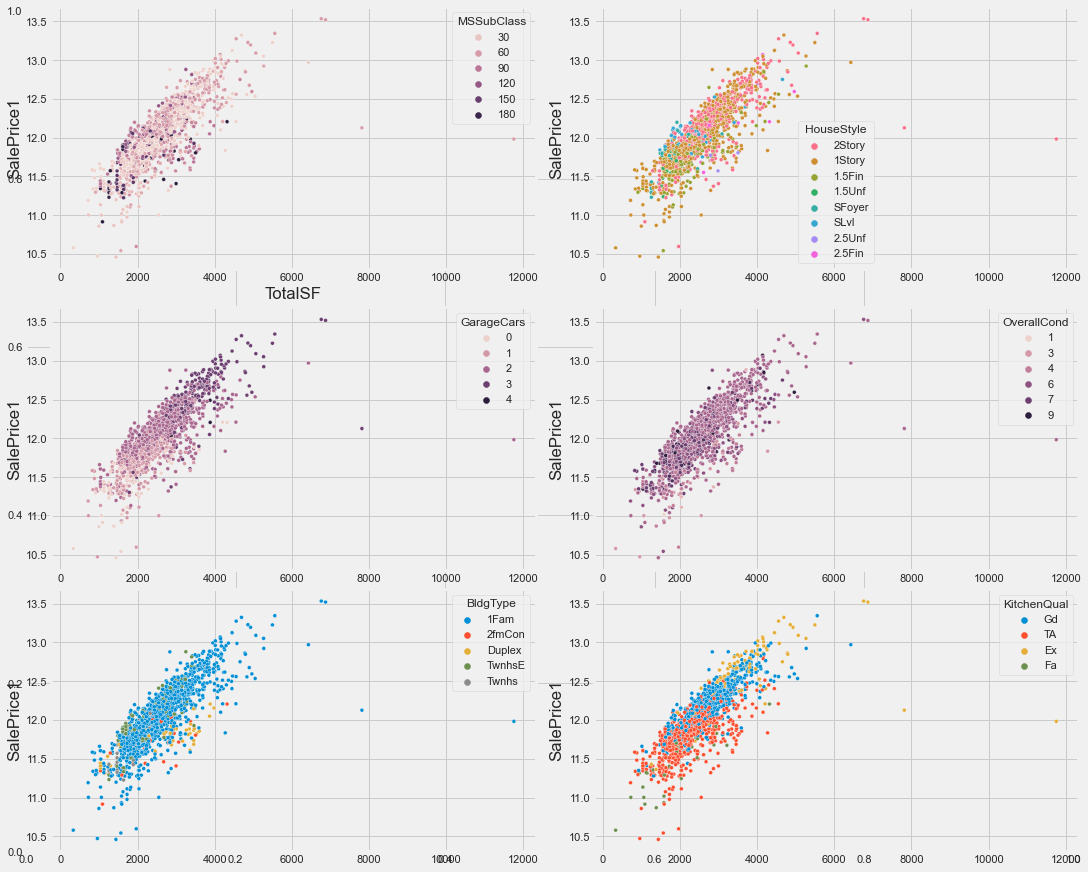

In [25]:
def plotting_totalsf_by_categories():    
    

    fig = plt.figure(constrained_layout=True, figsize=(15,12))
    grid = gridspec.GridSpec(ncols=2, nrows=3, figure=fig)
    
    TotalSF=train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']
    Total_Bathrooms= (train['FullBath'] + (0.5 * train['HalfBath']) +
                                   train['BsmtFullBath'] + (0.5 * train['BsmtHalfBath']))
    Total_porch_sf= (train['OpenPorchSF'] + train['3SsnPorch'] +
                                  train['EnclosedPorch'] + train['ScreenPorch'] +
                                  train['WoodDeckSF'])
    plt.legend(ncol=3,handleheight=2.4)
    
    ax1 = fig.add_subplot(grid[0, 0])
    sns.scatterplot(x=TotalSF, y=train.SalePrice1,  hue="MSSubClass",s=15, ax=ax1, data=train);
    ax1.set(xlabel='TotalSF') 
    
    ax2 = fig.add_subplot(grid[0, 1])
    sns.scatterplot(x=TotalSF, y=train.SalePrice1,  hue="HouseStyle",s=15, ax=ax2, data=train);
    ax1.set(xlabel='TotalSF') 
    
    ax3 = fig.add_subplot(grid[1, 0])
    sns.scatterplot(x=TotalSF, y=train.SalePrice1,  hue="GarageCars",s=15, ax=ax3, data=train);
    ax1.set(xlabel='TotalSF') 
    
    
    ax4 = fig.add_subplot(grid[1, 1])
    sns.scatterplot(x=TotalSF, y=train.SalePrice1,  hue="OverallCond",s=15, ax=ax4, data=train);
    ax1.set(xlabel='TotalSF') 
    
    ax5 = fig.add_subplot(grid[2, 0])
    sns.scatterplot(x=TotalSF, y=train.SalePrice1,  hue="BldgType",s=15, ax=ax5, data=train);
    ax1.set(xlabel='TotalSF') 
    
    ax6 = fig.add_subplot(grid[2, 1])
    sns.scatterplot(x=TotalSF, y=train.SalePrice1,  hue="KitchenQual",s=15, ax=ax6, data=train);
    ax1.set(xlabel='TotalSF') 
    
    plt.show()

plotting_totalsf_by_categories()

### 8. Ground Living Area Vs SalePrice 
- check outliers

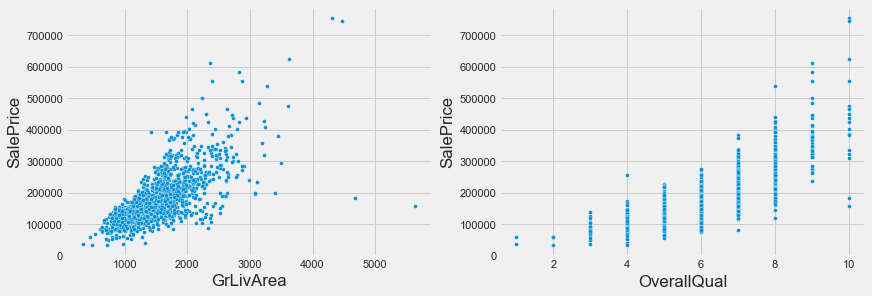

In [219]:
fig = plt.figure(constrained_layout=True, figsize=(12,4))
grid = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

ax1 = fig.add_subplot(grid[0, 0])
sns.scatterplot(x=train.GrLivArea, y=train.SalePrice, s=15, data=train, ax=ax1);
ax2 = fig.add_subplot(grid[0, 1])
sns.scatterplot(x=train.OverallQual, y=train.SalePrice, s=15, data=train, ax=ax2);

### 9. basic statiscs for numeric variables

In [27]:
train.describe().T

count           mean           std           min            25%            50%            75%            max
Id             1460.0     730.500000    421.610009      1.000000     365.750000     730.500000    1095.250000    1460.000000
MSSubClass     1460.0      56.897260     42.300571     20.000000      20.000000      50.000000      70.000000     190.000000
LotFrontage    1460.0      70.199658     22.431902     21.000000      60.000000      70.000000      80.000000     313.000000
LotArea        1460.0   10516.828082   9981.264932   1300.000000    7553.500000    9478.500000   11601.500000  215245.000000
OverallQual    1460.0       6.099315      1.382997      1.000000       5.000000       6.000000       7.000000      10.000000
OverallCond    1460.0       5.575342      1.112799      1.000000       5.000000       5.000000       6.000000       9.000000
YearBuilt      1460.0    1971.267808     30.202904   1872.000000    1954.000000    1973.000000    2000.000000    2010.000000
YearRemodAdd   1460.0    1984.865753     20.645407   1950.000000    1967.000000    1994.000000    2004.000000    2010.000000
MasVnrArea     1460.0     103.117123    180.731373      0.000000       0.000000       0.000000     164.250000    1600.000000
BsmtFinSF1     1460.0     443.639726    456.098091      0.000000       0.000000     383.500000     712.250000    5644.000000
BsmtFinSF2     1460.0      46.549315    161.319273      0.000000       0.000000       0.000000       0.000000    1474.000000
BsmtUnfSF      1460.0     567.240411    441.866955      0.000000     223.000000     477.500000     808.000000    2336.000000
TotalBsmtSF    1460.0    1057.429452    438.705324      0.000000     795.750000     991.500000    1298.250000    6110.000000
1stFlrSF       1460.0    1162.626712    386.587738    334.000000     882.000000    1087.000000    1391.250000    4692.000000
2ndFlrSF       1460.0     346.992466    436.528436      0.000000       0.000000       0.000000     728.000000    2065.000000
LowQualFinSF   1460.0       5.844521     48.623081      0.000000       0.000000       0.000000       0.000000     572.000000
GrLivArea      1460.0    1515.463699    525.480383    334.000000    1129.500000    1464.000000    1776.750000    5642.000000
BsmtFullBath   1460.0       0.425342      0.518911      0.000000       0.000000       0.000000       1.000000       3.000000
BsmtHalfBath   1460.0       0.057534      0.238753      0.000000       0.000000       0.000000       0.000000       2.000000
FullBath       1460.0       1.565068      0.550916      0.000000       1.000000       2.000000       2.000000       3.000000
HalfBath       1460.0       0.382877      0.502885      0.000000       0.000000       0.000000       1.000000       2.000000
BedroomAbvGr   1460.0       2.866438      0.815778      0.000000       2.000000       3.000000       3.000000       8.000000
KitchenAbvGr   1460.0       1.046575      0.220338      0.000000       1.000000       1.000000       1.000000       3.000000
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.000000       5.000000       6.000000       7.000000      14.000000
Fireplaces     1460.0       0.613014      0.644666      0.000000       0.000000       1.000000       1.000000       3.000000
GarageYrBlt    1460.0    1868.739726    453.697295      0.000000    1958.000000    1977.000000    2001.000000    2010.000000
GarageCars     1460.0       1.767123      0.747315      0.000000       1.000000       2.000000       2.000000       4.000000
GarageArea     1460.0     472.980137    213.804841      0.000000     334.500000     480.000000     576.000000    1418.000000
WoodDeckSF     1460.0      94.244521    125.338794      0.000000       0.000000       0.000000     168.000000     857.000000
OpenPorchSF    1460.0      46.660274     66.256028      0.000000       0.000000      25.000000      68.000000     547.000000
EnclosedPorch  1460.0      21.954110     61.119149      0.000000       0.000000       0.000000       0.000000     552.000000
3SsnPorch      1

## Feature Transformation

Using log scaled target variable as the predict variable.

In [243]:
train['SalePrice']=train['SalePrice1']
X=train.drop('SalePrice1',axis=1)

### 1. Categorical Features

In [244]:
numeric_columns(train).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'SalePrice1'], dtype='object')

In [245]:
numeric_columns(train).nunique().sort_values(ascending=True)

HalfBath            3
BsmtHalfBath        3
FullBath            4
Fireplaces          4
KitchenAbvGr        4
BsmtFullBath        4
YrSold              5
GarageCars          5
BedroomAbvGr        8
PoolArea            8
OverallCond         9
OverallQual        10
TotRmsAbvGrd       12
MoSold             12
MSSubClass         15
3SsnPorch          20
MiscVal            21
LowQualFinSF       24
YearRemodAdd       61
ScreenPorch        76
GarageYrBlt        98
YearBuilt         112
LotFrontage       115
EnclosedPorch     120
BsmtFinSF2        144
OpenPorchSF       202
WoodDeckSF        274
MasVnrArea        327
2ndFlrSF          417
GarageArea        441
BsmtFinSF1        637
SalePrice1        663
SalePrice         663
TotalBsmtSF       721
1stFlrSF          753
BsmtUnfSF         780
GrLivArea         861
LotArea          1073
Id               1460
dtype: int64

In [246]:
# check the unique values of numeric variables
object_columns(train).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'], dtype='object')

In [248]:
def cat_features(df, ls):
    for l in ls:
        df[l]=df[l].astype(str)
    return df

cat_fns=['MSSubClass','YrSold','MoSold']
cat_features(train, cat_fns)
cat_features(test, cat_fns)

Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal MoSold YrSold SaleType SaleCondition
0     1461         20       RH         80.0    11622   Pave  None      Reg         Lvl    AllPub    Inside       Gtl        NAmes      Feedr       Norm     1Fam     1Story            5            6       1961          1961     Gable  CompShg     VinylSd     VinylSd       None         0.0        TA        TA     CBlock       TA       TA           No          Rec       468.0          LwQ       144.0      270.0        882.0    GasA        TA          Y      SBrkr       896         0             0        896           0.0           0.0         1         0             2             1          TA             5        Typ           0          TA     Attchd       1961.0          Unf         1.0       730.0         TA         TA          Y         140            0              0          0          120         0     TA  MnPrv        None        0      6   2010       WD        Normal
1     1462         20       RL         81.0    14267   Pave  None      IR1         Lvl    AllPub    Corner       Gtl        NAmes       Norm       Norm     1Fam     1Story            6            6       1958          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace       108.0        TA        TA     CBlock       TA       TA           No          ALQ       923.0          Unf         0.0      406.0       1329.0    GasA        TA          Y      SBrkr      1329         0             0       1329           0.0           0.0         1         1             3             1          Gd             6        Typ           0          TA     Attchd       1958.0          Unf         1.0       312.0         TA         TA          Y         393           36              0          0            0         0     TA     TA        Gar2    12500      6   2010       WD        Normal
2     1463         60       RL         74.0    13830   Pave  None      IR1         Lvl    AllPub    Inside       Gtl      Gilbert       Norm       Norm     1Fam     2Story            5            5       1997          1998     Gable  CompShg     VinylSd     VinylSd       None         0.0        TA        TA      PConc       Gd       TA           No          GLQ       791.0          Unf         0.0      137.0        928.0    GasA        Gd          Y      SBrkr       928       701             0       1629           0.0           0.0         2         1             3             1          TA             6        Typ           1          TA     Attchd       1997.0          Fin         2.0       482.0         TA         TA          Y         212           34              0          0            0         0     TA  MnPrv        None        0      3   2010       WD        Normal
3     1464         60       RL         78.0     9978   Pave  None      IR1         Lvl    AllPub    Inside       Gtl      Gilbert       Norm       Norm     1Fam     2Story            6            6       1998          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace        20.0        TA        TA      PConc       TA       TA           No          GLQ       602.0          Unf         0.0      324.0        926.0    GasA        Ex          Y      S

### 2. Adding sum variables

In [249]:
def sum_features(df):
    df['TotalSF']=train['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
    df['Total_Bathrooms'] = (df['FullBath'] + (0.5 * df['HalfBath']) +
                                   df['BsmtFullBath'] + (0.5 * train['BsmtHalfBath']))
    df['Total_porch_sf'] = (df['OpenPorchSF'] + df['3SsnPorch'] +
                                  df['EnclosedPorch'] + df['ScreenPorch'] +
                                  df['WoodDeckSF'])
    return df

sum_features(train)
sum_features(test)

Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal MoSold YrSold SaleType SaleCondition  TotalSF  Total_Bathrooms  Total_porch_sf
0     1461         20       RH         80.0    11622   Pave  None      Reg         Lvl    AllPub    Inside       Gtl        NAmes      Feedr       Norm     1Fam     1Story            5            6       1961          1961     Gable  CompShg     VinylSd     VinylSd       None         0.0        TA        TA     CBlock       TA       TA           No          Rec       468.0          LwQ       144.0      270.0        882.0    GasA        TA          Y      SBrkr       896         0             0        896           0.0           0.0         1         0             2             1          TA             5        Typ           0          TA     Attchd       1961.0          Unf         1.0       730.0         TA         TA          Y         140            0              0          0          120         0     TA  MnPrv        None        0      6   2010       WD        Normal   1752.0              1.0             260
1     1462         20       RL         81.0    14267   Pave  None      IR1         Lvl    AllPub    Corner       Gtl        NAmes       Norm       Norm     1Fam     1Story            6            6       1958          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace       108.0        TA        TA     CBlock       TA       TA           No          ALQ       923.0          Unf         0.0      406.0       1329.0    GasA        TA          Y      SBrkr      1329         0             0       1329           0.0           0.0         1         1             3             1          Gd             6        Typ           0          TA     Attchd       1958.0          Unf         1.0       312.0         TA         TA          Y         393           36              0          0            0         0     TA     TA        Gar2    12500      6   2010       WD        Normal   2591.0              2.0             429
2     1463         60       RL         74.0    13830   Pave  None      IR1         Lvl    AllPub    Inside       Gtl      Gilbert       Norm       Norm     1Fam     2Story            5            5       1997          1998     Gable  CompShg     VinylSd     VinylSd       None         0.0        TA        TA      PConc       Gd       TA           No          GLQ       791.0          Unf         0.0      137.0        928.0    GasA        Gd          Y      SBrkr       928       701             0       1629           0.0           0.0         2         1             3             1          TA             6        Typ           1          TA     Attchd       1997.0          Fin         2.0       482.0         TA         TA          Y         212           34              0          0            0         0     TA  MnPrv        None        0      3   2010       WD        Normal   2549.0              2.5             246
3     1464         60       RL         78.0     9978   Pave  None      IR1         Lvl    AllPub    Inside       Gtl      Gilbert       Norm       Norm     1Fam     2Story            6            6       1998          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace        20.0    

### 3. Adding binary features

In [250]:
def binary_features(df):
    df['haspool'] = df['PoolArea'].apply(lambda x: 'Y' if x > 0 else 'N')
    df['has2ndfloor'] = df['2ndFlrSF'].apply(lambda x: 'Y' if x > 0 else 'N')
    df['hasgarage'] = df['GarageArea'].apply(lambda x: 'Y' if x > 0 else 'N')
    df['hasbsmt'] = df['TotalBsmtSF'].apply(lambda x: 'Y' if x > 0 else 'N')
    df['hasfireplace'] = df['Fireplaces'].apply(lambda x: 'Y' if x > 0 else 'N')
    return df

binary_features(train)
binary_features(test)

Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal MoSold YrSold SaleType SaleCondition  TotalSF  Total_Bathrooms  Total_porch_sf haspool has2ndfloor hasgarage hasbsmt hasfireplace
0     1461         20       RH         80.0    11622   Pave  None      Reg         Lvl    AllPub    Inside       Gtl        NAmes      Feedr       Norm     1Fam     1Story            5            6       1961          1961     Gable  CompShg     VinylSd     VinylSd       None         0.0        TA        TA     CBlock       TA       TA           No          Rec       468.0          LwQ       144.0      270.0        882.0    GasA        TA          Y      SBrkr       896         0             0        896           0.0           0.0         1         0             2             1          TA             5        Typ           0          TA     Attchd       1961.0          Unf         1.0       730.0         TA         TA          Y         140            0              0          0          120         0     TA  MnPrv        None        0      6   2010       WD        Normal   1752.0              1.0             260       N           N         Y       Y            N
1     1462         20       RL         81.0    14267   Pave  None      IR1         Lvl    AllPub    Corner       Gtl        NAmes       Norm       Norm     1Fam     1Story            6            6       1958          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace       108.0        TA        TA     CBlock       TA       TA           No          ALQ       923.0          Unf         0.0      406.0       1329.0    GasA        TA          Y      SBrkr      1329         0             0       1329           0.0           0.0         1         1             3             1          Gd             6        Typ           0          TA     Attchd       1958.0          Unf         1.0       312.0         TA         TA          Y         393           36              0          0            0         0     TA     TA        Gar2    12500      6   2010       WD        Normal   2591.0              2.0             429       N           N         Y       Y            N
2     1463         60       RL         74.0    13830   Pave  None      IR1         Lvl    AllPub    Inside       Gtl      Gilbert       Norm       Norm     1Fam     2Story            5            5       1997          1998     Gable  CompShg     VinylSd     VinylSd       None         0.0        TA        TA      PConc       Gd       TA           No          GLQ       791.0          Unf         0.0      137.0        928.0    GasA        Gd          Y      SBrkr       928       701             0       1629           0.0           0.0         2         1             3             1          TA             6        Typ           1          TA     Attchd       1997.0          Fin         2.0       482.0         TA         TA          Y         212           34              0          0            0         0     TA  MnPrv        None        0      3   2010       WD        Normal   2549.0              2.5             246       N           Y         Y       Y            Y
3     1464         60       RL         78.0     9978   Pave  None      IR1         Lvl  

### 4. Adding log features

In [251]:
def log_features(df, ls):
    for l in ls:
        df[l+'_log'] = np.log1p(df[l])
#         df.drop([l], axis=1)
    return df

log_fns = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
                 'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
                 'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
                 'TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF',
                 'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','YearRemodAdd','TotalSF']
log_features(train,log_fns)
log_features(test,log_fns)

Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal MoSold YrSold SaleType SaleCondition  TotalSF  Total_Bathrooms  Total_porch_sf haspool has2ndfloor hasgarage hasbsmt hasfireplace  LotFrontage_log  \
0     1461         20       RH         80.0    11622   Pave  None      Reg         Lvl    AllPub    Inside       Gtl        NAmes      Feedr       Norm     1Fam     1Story            5            6       1961          1961     Gable  CompShg     VinylSd     VinylSd       None         0.0        TA        TA     CBlock       TA       TA           No          Rec       468.0          LwQ       144.0      270.0        882.0    GasA        TA          Y      SBrkr       896         0             0        896           0.0           0.0         1         0             2             1          TA             5        Typ           0          TA     Attchd       1961.0          Unf         1.0       730.0         TA         TA          Y         140            0              0          0          120         0     TA  MnPrv        None        0      6   2010       WD        Normal   1752.0              1.0             260       N           N         Y       Y            N         4.394449   
1     1462         20       RL         81.0    14267   Pave  None      IR1         Lvl    AllPub    Corner       Gtl        NAmes       Norm       Norm     1Fam     1Story            6            6       1958          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace       108.0        TA        TA     CBlock       TA       TA           No          ALQ       923.0          Unf         0.0      406.0       1329.0    GasA        TA          Y      SBrkr      1329         0             0       1329           0.0           0.0         1         1             3             1          Gd             6        Typ           0          TA     Attchd       1958.0          Unf         1.0       312.0         TA         TA          Y         393           36              0          0            0         0     TA     TA        Gar2    12500      6   2010       WD        Normal   2591.0              2.0             429       N           N         Y       Y            N         4.406719   
2     1463         60       RL         74.0    13830   Pave  None      IR1         Lvl    AllPub    Inside       Gtl      Gilbert       Norm       Norm     1Fam     2Story            5            5       1997          1998     Gable  CompShg     VinylSd     VinylSd       None         0.0        TA        TA      PConc       Gd       TA           No          GLQ       791.0          Unf         0.0      137.0        928.0    GasA        Gd          Y      SBrkr       928       701             0       1629           0.0           0.0         2         1             3             1          TA             6        Typ           1          TA     Attchd       1997.0          Fin         2.0       482.0         TA         TA          Y         212           34              0          0            0         0     TA  MnPrv        None        0      3   2010       WD        Normal   2549.0              2.5             246       N           Y         Y       Y            Y         4.317488   
3     14

### 5. Adding squared features

In [252]:
def sqr_features(df, ls):
    for l in ls:
        df[l+'_sqr']=df[l]*df[l]
#         df[l+'_log'+'_sqr']=df[l+'_log']*df[l+'_log']
    return df

sqr_fns = ['TotalSF_log','GrLivArea_log','GarageArea_log',
           'GrLivArea_log', 'GarageArea_log','TotalBsmtSF_log',
            '1stFlrSF_log','YearBuilt','FullBath_log','2ndFlrSF_log']

sqr_features(train,sqr_fns)
sqr_features(test,sqr_fns)

Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal MoSold YrSold SaleType SaleCondition  TotalSF  Total_Bathrooms  Total_porch_sf haspool has2ndfloor hasgarage hasbsmt hasfireplace  LotFrontage_log  \
0     1461         20       RH         80.0    11622   Pave  None      Reg         Lvl    AllPub    Inside       Gtl        NAmes      Feedr       Norm     1Fam     1Story            5            6       1961          1961     Gable  CompShg     VinylSd     VinylSd       None         0.0        TA        TA     CBlock       TA       TA           No          Rec       468.0          LwQ       144.0      270.0        882.0    GasA        TA          Y      SBrkr       896         0             0        896           0.0           0.0         1         0             2             1          TA             5        Typ           0          TA     Attchd       1961.0          Unf         1.0       730.0         TA         TA          Y         140            0              0          0          120         0     TA  MnPrv        None        0      6   2010       WD        Normal   1752.0              1.0             260       N           N         Y       Y            N         4.394449   
1     1462         20       RL         81.0    14267   Pave  None      IR1         Lvl    AllPub    Corner       Gtl        NAmes       Norm       Norm     1Fam     1Story            6            6       1958          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace       108.0        TA        TA     CBlock       TA       TA           No          ALQ       923.0          Unf         0.0      406.0       1329.0    GasA        TA          Y      SBrkr      1329         0             0       1329           0.0           0.0         1         1             3             1          Gd             6        Typ           0          TA     Attchd       1958.0          Unf         1.0       312.0         TA         TA          Y         393           36              0          0            0         0     TA     TA        Gar2    12500      6   2010       WD        Normal   2591.0              2.0             429       N           N         Y       Y            N         4.406719   
2     1463         60       RL         74.0    13830   Pave  None      IR1         Lvl    AllPub    Inside       Gtl      Gilbert       Norm       Norm     1Fam     2Story            5            5       1997          1998     Gable  CompShg     VinylSd     VinylSd       None         0.0        TA        TA      PConc       Gd       TA           No          GLQ       791.0          Unf         0.0      137.0        928.0    GasA        Gd          Y      SBrkr       928       701             0       1629           0.0           0.0         2         1             3             1          TA             6        Typ           1          TA     Attchd       1997.0          Fin         2.0       482.0         TA         TA          Y         212           34              0          0            0         0     TA  MnPrv        None        0      3   2010       WD        Normal   2549.0              2.5             246       N           Y         Y       Y            Y         4.317488   
3     14

### 6. Normalizing skewed features

In [253]:

def normalizing_skewed(df):    
    skew_features = numeric_columns(df).apply(lambda x: skew(x)).sort_values(ascending=False)

    high_skew = skew_features[skew_features > 0.5]
    skew_index = high_skew.index

    print("There are {} numerical features in with Skew > 0.5 :".format(high_skew.shape[0]))

    # Normalize skewed features
    for i in skew_index:
        df[i] = boxcox1p(df[i], boxcox_normmax(df[i] + 1))
        
normalizing_skewed(train)
normalizing_skewed(test)

There are 38 numerical features in with Skew > 0.5 :
There are 38 numerical features in with Skew > 0.5 :


## Data Cleansing

In [254]:
# # z-score greater than 3
# train_num=numeric_columns(train)
# z=np.abs(stats.zscore(train_num))
# df_z1=z[(z['SalePrice']>3) | (z['SalePrice1']>3)]

# # IQR 
# Q1=train_num.quantile(0.25)
# Q3=train_num.quantile(0.75)
# IQR=(Q3-Q1)
# df_iqr=(train_num<(Q1-1.5*IQR)) | (train_num>(Q3+1.5*IQR))
# df_iqr1=df_iqr[(df_iqr['SalePrice']) | (df_iqr['SalePrice1'])]

# d1=pd.merge(df_z1, df_iqr1, left_index=True, right_index=True)
# d1
# print('number of rows with Z-score > 3: ', len(df_z1))
# print('number of rows with value outside boundary of 1.5 * IQR: ', len(df_iqr1))
# print('number of rows meeting with both above conditions: ', len(d1))
# drop outliers
# train=train.drop(index)
# train

# index = d1.index
# print('index of outliers:', index.tolist())


train.drop(train[(train['OverallQual']<5) & (train['SalePrice']>200000)].index, inplace=True)
train.drop(train[(train['GrLivArea']>4500) & (train['SalePrice']<300000)].index, inplace=True)


In [256]:
# train.dtype+1*train

## Split data set into Train and Test

In [257]:
train['SalePrice']=train['SalePrice1']
train=train.drop('SalePrice1',axis=1)

train_objs_num = len(train)

df_full = pd.concat(objs=[train, test], axis=0)
df_full_dummy = pd.get_dummies(df_full, drop_first=True)

train_dummy = df_full_dummy[:train_objs_num]
test_dummy = df_full_dummy[train_objs_num:]

test_dummy=test_dummy.drop('SalePrice',axis=1)

# train_dummy=pd.get_dummies(train, drop_first=True)
# test_dummy=pd.get_dummies(test, drop_first=True)

y=train['SalePrice']
X=train.drop('SalePrice',axis=1)

yd=train_dummy['SalePrice']
Xd=train_dummy.drop('SalePrice',axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)
Xd_train, Xd_test, yd_train, yd_test = train_test_split(Xd, yd, test_size=0.2, random_state=rand_state)

sc = StandardScaler()
Xd_sc_train = sc.fit_transform(Xd_train)
Xd_sc_test = sc.fit_transform(Xd_test)

test_sc=sc.fit_transform(test_dummy)


# checking the percentage of training set!
np.round(len(X_train)/len(X),3)

0.8

In [41]:
train_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Columns: 337 entries, Id to hasfireplace_Y
dtypes: float64(69), int64(7), uint8(261)
memory usage: 1.2 MB


## Linear Regression

In [42]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.linear_model import Ridge,RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV

## Penalized Regression Analysis

### 1. Plotting regression coefficients vs alphas:

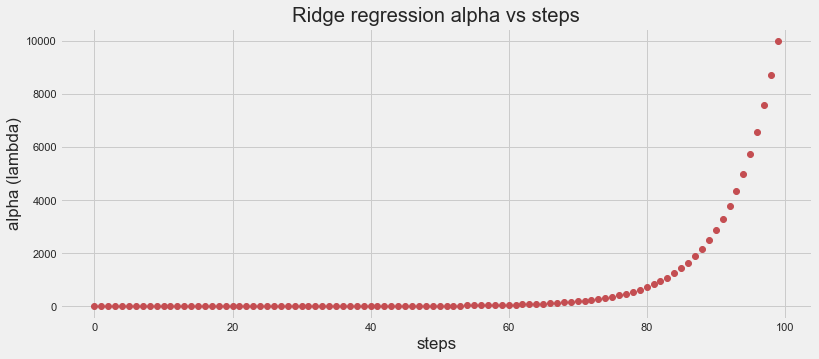

In [43]:
# Ridge
alpha_ridge = 10**np.linspace(-2,4,100)
plt.figure(figsize=(12,5))
plt.plot(alpha_ridge,'or' )
plt.xlabel('steps')
plt.ylabel('alpha (lambda)')
plt.title('Ridge regression alpha vs steps')
plt.show()

In [44]:
ridge = Ridge()
coefs_ridge = []

for i in alpha_ridge:
    ridge.set_params(alpha = i)
    ridge.fit(Xd_train, yd_train)
    coefs_ridge.append(ridge.coef_)
    
np.shape(coefs_ridge)

(100, 336)

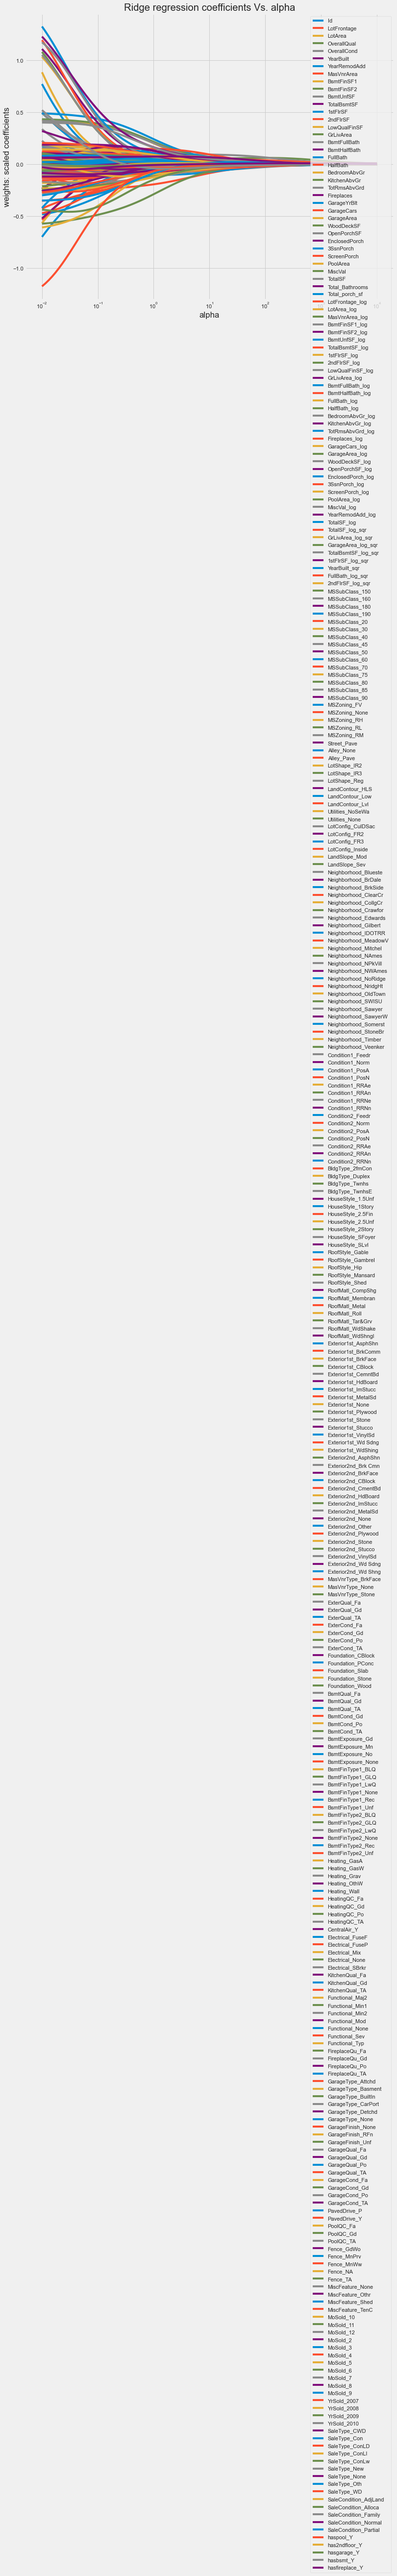

In [45]:
plt.figure(figsize=(12,10))
ax = plt.gca()
ax.plot(alpha_ridge, coefs_ridge)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('Ridge regression coefficients Vs. alpha')
plt.legend(Xd_train.columns)

plt.show()

In [46]:
# Lassso
alpha_lasso = 10**np.linspace(-3,1,100)

lasso = Lasso()
coefs_lasso = []

for i in alpha_lasso:
    lasso.set_params(alpha = i)
    lasso.fit(Xd_train, yd_train)
    coefs_lasso.append(lasso.coef_)
    
np.shape(coefs_lasso)

(100, 336)

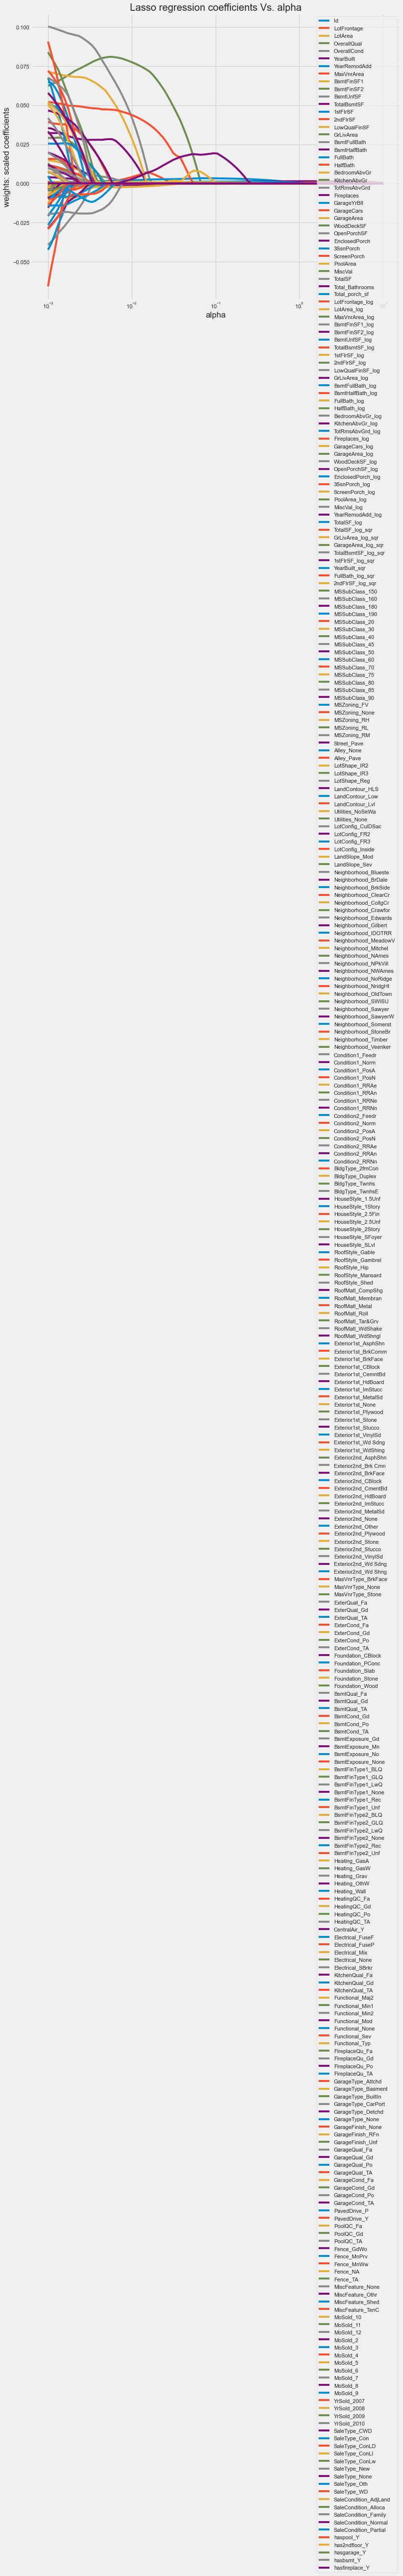

In [47]:
plt.figure(figsize=(12,10))
ax = plt.gca()
ax.plot(alpha_lasso, coefs_lasso)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('Lasso regression coefficients Vs. alpha')
plt.legend(Xd_train.columns)

plt.show()

In [48]:
# Elastic Net Regression
alpha_elasticnet = 10**np.linspace(-3,2,100)
elasticnet = ElasticNet()
coefs_elasticnet = []

for i in alpha_elasticnet:
    elasticnet.set_params(alpha = i)
    elasticnet.fit(Xd_train, yd_train)
    coefs_elasticnet.append(elasticnet.coef_)
    
np.shape(coefs_elasticnet)

(100, 336)

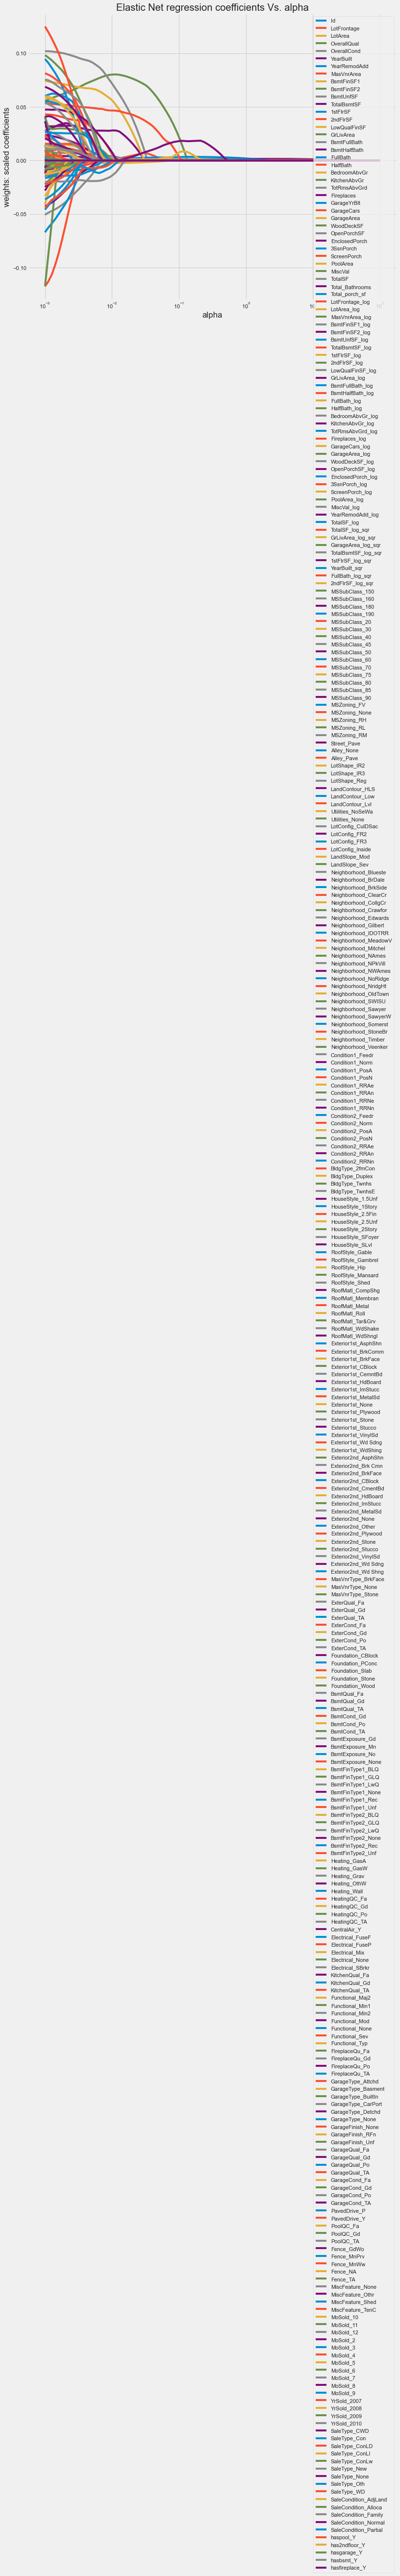

In [49]:
plt.figure(figsize=(12,10))
ax = plt.gca()
ax.plot(alpha_elasticnet, coefs_elasticnet)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('Elastic Net regression coefficients Vs. alpha')
plt.legend(Xd_train.columns)

plt.show()

### 3. cross validation

In [50]:
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=rand_state)
folds = KFold(n_splits = 5, shuffle = True, random_state = rand_state)

In [51]:
%%time

lm = LinearRegression()

lm_params = [{'n_features_to_select': list(range(250, 265))}]

lm.fit(Xd_train, yd_train)
rfe = RFE(lm)             

lm_search = GridSearchCV(estimator = rfe, 
                        param_grid = lm_params, 
                        scoring=['neg_mean_squared_error', 'r2'],
                        refit='r2',
                        cv = 3, 
                        n_jobs=-1,
                        return_train_score=True)      

# fit the model
lm_result = lm_search.fit(Xd_train, yd_train) 

# summarize result
print('Train R^2 Score : %.3f'%lm_result.best_estimator_.score(Xd_sc_train, yd_train))
print('Test R^2 Score : %.3f'%lm_result.best_estimator_.score(Xd_sc_test, yd_test))
print('Best R^2 Score Through Grid Search : %.3f'%lm_result.best_score_)
print('Best Parameters : ',lm_result.best_params_)
print('Training mse : ',mean_squared_error(yd_train,lm_search.predict(Xd_train)))
print('Testing mse : ',mean_squared_error(yd_test,lm_search.predict(Xd_test)))

# Best Parameters :  {'n_features_to_select': 251}
# lm_search=RFE(estimator=LinearRegression(), n_features_to_select=259)

# Train R^2 Score : -18960790010345.812
# Test R^2 Score : -17902842798292.410
# Best R^2 Score Through Grid Search : -347268.774
# Best Parameters :  {'n_features_to_select': 259}
# Training mse :  2.6736380960458675e-06
# Testing mse :  421047.9789461248
# CPU times: user 10.2 s, sys: 6.73 s, total: 16.9 s
# Wall time: 1min 18s

Train R^2 Score : -814449900831793.000
Test R^2 Score : -752206242414793.250
Best R^2 Score Through Grid Search : -44352.827
Best Parameters :  {'n_features_to_select': 256}
Training mse :  0.007814610737267014
Testing mse :  2291781688.821357
Wall time: 42.5 s


In [52]:
%%time

# lasso_alphas = [1e-5, 3e-4, 5e-4, 7e-4, 1e-4]
lasso_param = {
    'alpha':[1e-4,5e-4,1e-3]
       }

# define search
lasso_search = GridSearchCV(Lasso(), lasso_param, 
                        scoring=['neg_mean_squared_error', 'r2'],
                        refit='r2', n_jobs=-1, cv=folds,
                        return_train_score=True)

# execute search
lasso_result = lasso_search.fit(Xd_sc_train, yd_train)

# summarize result
# print('Best Score: %s' % lasso_result.best_score_)
# print('Best Hyperparameters: %s' % lasso_result.best_params_)

print('Train R^2 Score : %.3f'%lasso_result.best_estimator_.score(Xd_sc_train, yd_train))
print('Test R^2 Score : %.3f'%lasso_result.best_estimator_.score(Xd_sc_test, yd_test))
print('Best R^2 Score Through Grid Search : %.3f'%lasso_result.best_score_)
print('Best Parameters : ',lasso_result.best_params_)
print('Training mse : ', round(mean_squared_error(yd_train,lasso_search.predict(Xd_sc_train)),4))
print('Testing mse : ',round(mean_squared_error(yd_test,lasso_search.predict(Xd_sc_test)),4))

# Best Parameters :  {'alpha': 0.0001}
# lasso_search=Lasso(alpha=0.0001)

# Train R^2 Score : 1.000
# Test R^2 Score : 0.994
# Best R^2 Score Through Grid Search : 1.000
# Best Parameters :  {'alpha': 0.0001}
# Training mse :  0.0
# Testing mse :  0.0003
# CPU times: user 571 ms, sys: 290 ms, total: 861 ms
# Wall time: 1.7 s

Train R^2 Score : 0.942
Test R^2 Score : 0.923
Best R^2 Score Through Grid Search : 0.848
Best Parameters :  {'alpha': 0.001}
Training mse :  0.0091
Testing mse :  0.0129
Wall time: 2.5 s


In [53]:
%%time

# ridge_alphas = [1, 3, 5, 10, 15, 18, 20]
# ridge_alphas = [1,3, 5, 10]

ridge_param = {
    'alpha':[3]
       }
# define search
ridge_search = GridSearchCV(Ridge(), ridge_param, 
                        scoring=['neg_mean_squared_error', 'r2'],
                        refit='r2', n_jobs=-1, cv=folds,
                        return_train_score=True)

# execute search
ridge_result = ridge_search.fit(Xd_sc_train, yd_train)

print('Train R^2 Score : %.3f'%ridge_result.best_estimator_.score(Xd_sc_train, yd_train))
print('Test R^2 Score : %.3f'%ridge_result.best_estimator_.score(Xd_sc_test, yd_test))
print('Best R^2 Score Through Grid Search : %.3f'%ridge_result.best_score_)
print('Best Parameters : ',ridge_result.best_params_)
print('Training mse : ', round(mean_squared_error(yd_train,ridge_search.predict(Xd_sc_train)),4))
print('Testing mse : ',round(mean_squared_error(yd_test,ridge_search.predict(Xd_sc_test)),4))

# Best Parameters :  {'alpha': 3}
# ridge_search=Ridge(alpha=3)

# Train R^2 Score : 1.000
# Test R^2 Score : 0.993
# Best R^2 Score Through Grid Search : 0.999
# Best Parameters :  {'alpha': 3}
# Training mse :  0.0
# Testing mse :  0.0003
# CPU times: user 144 ms, sys: 71.5 ms, total: 215 ms
# Wall time: 294 ms

Train R^2 Score : 0.951
Test R^2 Score : 0.911
Best R^2 Score Through Grid Search : 0.827
Best Parameters :  {'alpha': 3}
Training mse :  0.0077
Testing mse :  0.0149
Wall time: 108 ms


In [54]:
%%time

# net_alphas = [1e-4, 7e-3, 5e-3, 3e-3, 1e-3, 5e-2, 1e-2, 0.1]
# net_alphas = [1e-4, 5e-3, 1e-3, 1e-2]
# net_ratios = np.arange(0, 1, 0.1)
net_param = {
    'alpha':[1e-5,5e-5, 1e-4],
    'l1_ratio':[0.5]
       }

# define search
net_search = GridSearchCV(ElasticNet(), net_param, 
                        scoring=['neg_mean_squared_error', 'r2'],
                        refit='r2', n_jobs=-1, cv=folds,
                        return_train_score=True)

# execute search
net_result = net_search.fit(Xd_sc_train, yd_train)

print('Train R^2 Score : %.3f'%net_result.best_estimator_.score(Xd_sc_train, yd_train))
print('Test R^2 Score : %.3f'%net_result.best_estimator_.score(Xd_sc_test, yd_test))
print('Best R^2 Score Through Grid Search : %.3f'%net_result.best_score_)
print('Best Parameters : ',net_result.best_params_)
print('Training mse : ', round(mean_squared_error(yd_train,net_search.predict(Xd_sc_train)),4))
print('Testing mse : ',round(mean_squared_error(yd_test,net_search.predict(Xd_sc_test)),4))

# Best Parameters :  {'alpha': 0.0001, 'l1_ratio': 0.5}
# net_search=ElasticNet(alpha=0.0001, l1_ratio=0.5)

# Train R^2 Score : 1.000
# Test R^2 Score : 0.994
# Best R^2 Score Through Grid Search : 1.000
# Best Parameters :  {'alpha': 0.0001, 'l1_ratio': 0.5}
# Training mse :  0.0
# Testing mse :  0.0003
# CPU times: user 1.32 s, sys: 321 ms, total: 1.64 s
# Wall time: 9.07 s


Train R^2 Score : 0.952
Test R^2 Score : 0.907
Best R^2 Score Through Grid Search : 0.785
Best Parameters :  {'alpha': 0.0001, 'l1_ratio': 0.5}
Training mse :  0.0076
Testing mse :  0.0155
Wall time: 3.06 s


## PCA Analysis

### 1. scale the features

In [55]:
n_comp=198
pca=PCA(n_components=n_comp)

Xd_reduced_train = pca.fit_transform(Xd_train)
Xd_reduced_test = pca.transform(Xd_test)

Xd_sc_reduced_train = sc.fit_transform(Xd_reduced_train)
Xd_sc_reduced_test = sc.fit_transform(Xd_reduced_test)


test_dummy=np.nan_to_num(test_dummy)
test_reduced=pca.transform(test_dummy)
test_sc_reduced=sc.fit_transform(test_reduced)

### 2. proportion variance explained - Scree plot

In [56]:
pca.fit(Xd_sc_train)

PCA(n_components=198)

In [57]:
scores = pca.fit_transform(Xd_sc_train)
PVE=pd.DataFrame({'Principal Component':range(1,pca.n_components+1), 'PVE':pca.explained_variance_ratio_ })
PVE['cum_PVE']= np.cumsum(PVE['PVE'])
PVE.head(150)

Principal Component       PVE   cum_PVE
0                      1  0.082691  0.082691
1                      2  0.037665  0.120357
2                      3  0.031960  0.152317
3                      4  0.026632  0.178949
4                      5  0.023768  0.202717
..                   ...       ...       ...
145                  146  0.001982  0.909996
146                  147  0.001964  0.911960
147                  148  0.001927  0.913886
148                  149  0.001894  0.915780
149                  150  0.001863  0.917643

[150 rows x 3 columns]

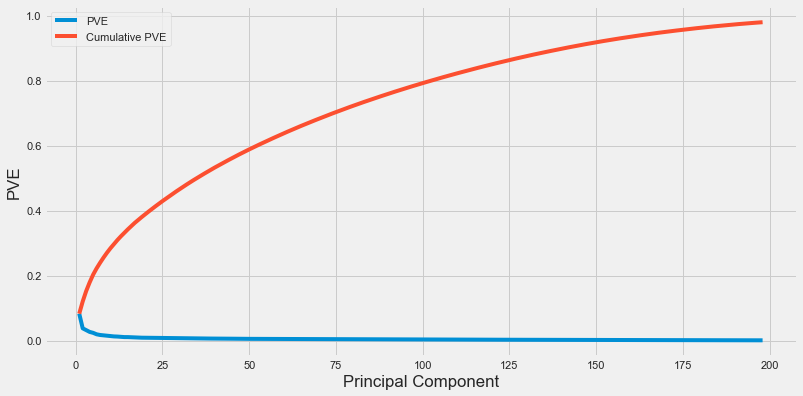

In [58]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Principal Component', y='PVE', data=PVE)
sns.lineplot(x='Principal Component', y='cum_PVE', data=PVE)
plt.legend(['PVE','Cumulative PVE'])
plt.show()

### 3. check the best number of pricinpal components

In [59]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 8.27, 12.04, 15.24, 17.9 , 20.28, 22.21, 23.93, 25.54, 27.04,
       28.42, 29.7 , 30.93, 32.08, 33.15, 34.22, 35.24, 36.22, 37.12,
       38.  , 38.87, 39.7 , 40.53, 41.34, 42.14, 42.92, 43.68, 44.43,
       45.18, 45.92, 46.64, 47.35, 48.04, 48.73, 49.4 , 50.05, 50.7 ,
       51.33, 51.96, 52.58, 53.2 , 53.79, 54.37, 54.95, 55.53, 56.1 ,
       56.66, 57.21, 57.76, 58.29, 58.82, 59.34, 59.85, 60.35, 60.85,
       61.35, 61.84, 62.33, 62.81, 63.29, 63.76, 64.23, 64.69, 65.15,
       65.6 , 66.05, 66.49, 66.93, 67.36, 67.79, 68.21, 68.63, 69.05,
       69.46, 69.87, 70.27, 70.67, 71.06, 71.45, 71.84, 72.23, 72.61,
       72.99, 73.36, 73.73, 74.1 , 74.46, 74.82, 75.18, 75.53, 75.88,
       76.22, 76.56, 76.9 , 77.24, 77.58, 77.91, 78.24, 78.56, 78.88,
       79.2 , 79.51, 79.82, 80.13, 80.44, 80.74, 81.04, 81.34, 81.63,
       81.92, 82.21, 82.5 , 82.78, 83.06, 83.34, 83.62, 83.9 , 84.17,
       84.44, 84.71, 84.97, 85.23, 85.49, 85.75, 86.01, 86.26, 86.51,
       86.76, 87.01,

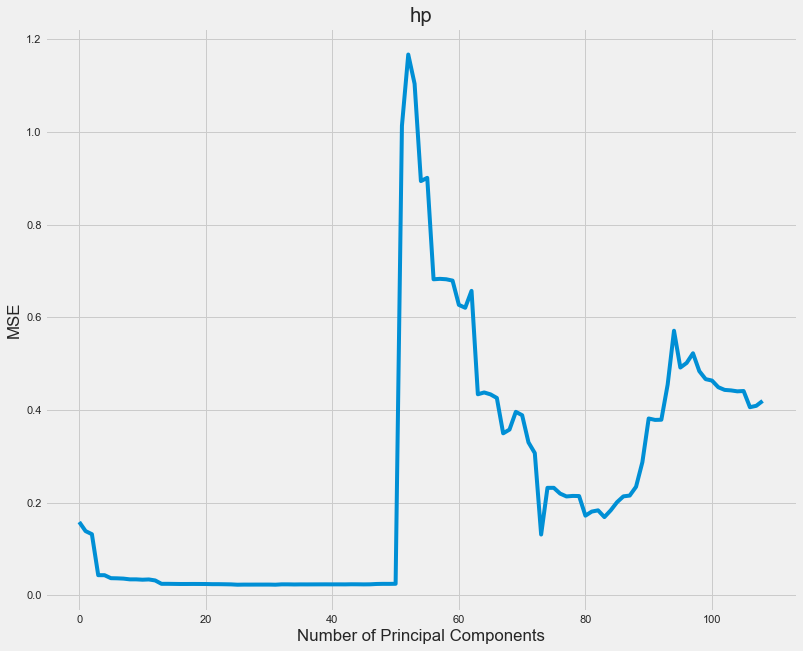

In [60]:

# Calculate MSE using cross-validation, adding one component at a time

regr = LinearRegression()
mse = []

for i in np.arange(1, 110):
    score = -1*cross_val_score(regr,
               Xd_sc_train[:,:i], yd_train, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)

fig = plt.figure(figsize=(12,10))
# Plot cross-validation results    
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('hp')
plt.show()

### 4. fitting regression models

In [61]:
pd.DataFrame(mse)[:100] 

0
0   0.158005
1   0.138394
2   0.131723
3   0.043239
4   0.043196
5   0.036767
6   0.036442
7   0.035809
8   0.034205
9   0.034208
10  0.033449
11  0.034030
12  0.031851
13  0.024569
14  0.024588
15  0.024388
16  0.024211
17  0.024224
18  0.024302
19  0.024243
20  0.024168
21  0.023845
22  0.023850
23  0.023641
24  0.023393
25  0.022655
26  0.022896
27  0.022873
28  0.022925
29  0.022922
30  0.022950
31  0.022659
32  0.023463
33  0.023440
34  0.023187
35  0.023368
36  0.023323
37  0.023384
38  0.023433
39  0.023484
40  0.023410
41  0.023438
42  0.023377
43  0.023627
44  0.023562
45  0.023386
46  0.023545
47  0.024255
48  0.024504
49  0.024461
50  0.024652
51  1.013237
52  1.167146
53  1.104076
54  0.893958
55  0.900988
56  0.681977
57  0.682915
58  0.682023
59  0.679145
60  0.626739
61  0.620505
62  0.657012
63  0.433747
64  0.437670
65  0.433522
66  0.425769
67  0.349425
68  0.357555
69  0.395866
70  0.388487
71  0.329907
72  0.306802
73  0.130987
74  0.231767
75  0.231789
76  0.219393
77  0.213203
78  0.214318
79  0.214075
80  0.171715
81  0.180512
82  0.183201
83  0.168636
84  0.183234
85  0.200871
86  0.213386
87  0.215084
88  0.234090
89  0.287121
90  0.381475
91  0.378408
92  0.378780
93  0.454868
94  0.570875
95  0.491437
96  0.501457
97  0.522231
98  0.483670
99  0.466414

In [62]:
pca=PCA(n_components=33)

Xd_reduced_train = pca.fit_transform(Xd_train)
Xd_reduced_test = pca.transform(Xd_test)

#train PCR model on training data 
regr = LinearRegression()
regr.fit(Xd_reduced_train, yd_train)

#calculate RMSE
from sklearn.metrics import mean_squared_error
yd_hat = regr.predict(Xd_reduced_test)
print(regr.score(Xd_reduced_train, yd_train))
print(np.sqrt(mean_squared_error(yd_test, yd_hat)))

# 0.9111533949142595
# 0.12610150629654754

0.863425346750681
0.1324794446005266


In [258]:
n_comp=250
pca=PCA(n_components=n_comp)

Xd_reduced_train = pca.fit_transform(Xd_train)
Xd_reduced_test = pca.transform(Xd_test)

Xd_sc_reduced_train = sc.fit_transform(Xd_reduced_train)
Xd_sc_reduced_test = sc.fit_transform(Xd_reduced_test)

test_dummy=np.nan_to_num(test_dummy)
test_reduced=pca.transform(test_dummy)
test_sc_reduced=sc.fit_transform(test_reduced)

In [63]:
%%time



# pca_lm_params = [{'n_features_to_select': list(range(30, n_comp))}]

pca_lm_params = [{'n_features_to_select': list(range(180, n_comp))}]

pca_lm = LinearRegression()
pca_lm.fit(Xd_reduced_train, yd_train)
pca_rfe = RFE(pca_lm)            

pca_lm_search = GridSearchCV(estimator = pca_rfe, 
                        param_grid = pca_lm_params, 
                        scoring='r2',
                        cv = 3, 
                        n_jobs=-1,
                        return_train_score=True)      

# fit the model
pca_lm_result = pca_lm_search.fit(Xd_reduced_train, yd_train) 


# summarize result
# print('Best Score: %s' % lm_result.best_score_)
# print('Best Hyperparameters: %s' % lm_result.best_params_)

print('Train R^2 Score : %.3f'%pca_lm_result.best_estimator_.score(Xd_reduced_train, yd_train))
print('Test R^2 Score : %.3f'%pca_lm_result.best_estimator_.score(Xd_reduced_test, yd_test))
print('Best R^2 Score Through Grid Search : %.3f'%pca_lm_result.best_score_)
print('Best Parameters : ',pca_lm_result.best_params_)
print('Training mse : ', round(mean_squared_error(yd_train,pca_lm_search.predict(Xd_reduced_train)),4))
print('Testing mse : ',round(mean_squared_error(yd_test,pca_lm_search.predict(Xd_reduced_test)),4))

# {'n_features_to_select': 198}
# pca_lm_search=RFE(LinearRegression(),n_features_to_select=197)

# Train R^2 Score : 0.639
# Test R^2 Score : 0.617
# Best R^2 Score Through Grid Search : 0.519
# Best Parameters :  {'n_features_to_select': 197}
# Training mse :  0.0153
# Testing mse :  0.0171
# CPU times: user 4.64 s, sys: 1.45 s, total: 6.09 s
# Wall time: 2min 55s


Train R^2 Score : 0.574
Test R^2 Score : 0.521
Best R^2 Score Through Grid Search : -3.318
Best Parameters :  {'n_features_to_select': 248}
Training mse :  0.067
Testing mse :  0.0798
Wall time: 42.3 s


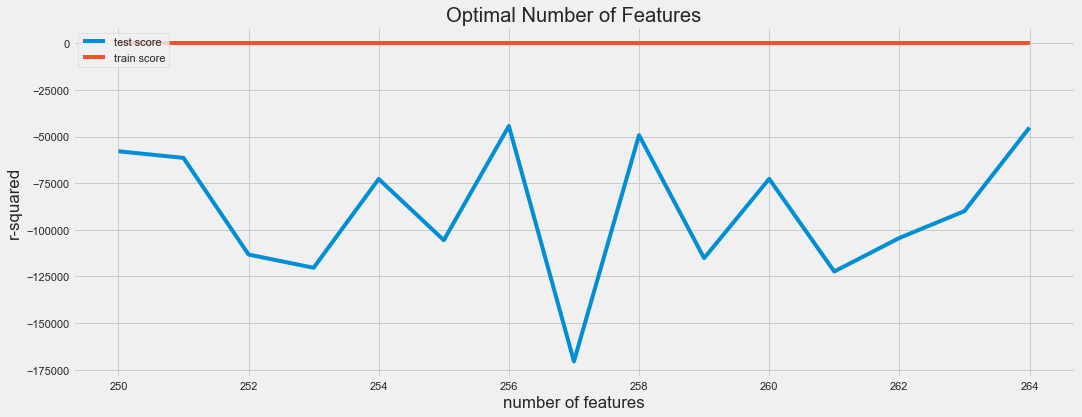

In [64]:
# plotting cv results
cv_results = pd.DataFrame(lm_result.cv_results_)

plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_r2"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_r2"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [65]:
%%time

# pca_lasso_alphas = [1e-5, 5e-5, 1e-4, 5e-4, 1e-4, 7e-3, 
#                 5e-3, 3e-3, 1e-3, 5e-2, 1e-2]
# pca_lasso_alphas = [1e-6, 3e-6, 5e-6, 7e-6, 1e-5, 5e-5]
pca_lasso_param = {
    'alpha':[1e-5]
       }

# define search
pca_lasso_search = GridSearchCV(Lasso(), pca_lasso_param, 
                        scoring=['neg_mean_squared_error', 'r2'],
                        refit='r2', n_jobs=-1, cv=folds,
                        return_train_score=True)

# execute search
pca_lasso_result = pca_lasso_search.fit(Xd_sc_reduced_train, yd_train)

print('Train R^2 Score : %.3f'%pca_lasso_result.best_estimator_.score(Xd_sc_reduced_train, yd_train))
print('Test R^2 Score : %.3f'%pca_lasso_result.best_estimator_.score(Xd_sc_reduced_test, yd_test))
print('Best R^2 Score Through Grid Search : %.3f'%pca_lasso_result.best_score_)
print('Best Parameters : ',pca_lasso_result.best_params_)
print('Training mse : ', round(mean_squared_error(yd_train,pca_lasso_search.predict(Xd_sc_reduced_train)),4))
print('Testing mse : ',round(mean_squared_error(yd_test,pca_lasso_search.predict(Xd_sc_reduced_test)),4))

# pca_lasso_search=Lasso(alpha=1e-5)

# Train R^2 Score : 0.999
# Test R^2 Score : 0.987
# Best R^2 Score Through Grid Search : 0.999
# Best Parameters :  {'alpha': 1e-05}
# Training mse :  0.0
# Testing mse :  0.0006
# CPU times: user 161 ms, sys: 42.9 ms, total: 204 ms
# Wall time: 295 ms

Train R^2 Score : 0.941
Test R^2 Score : 0.912
Best R^2 Score Through Grid Search : 0.753
Best Parameters :  {'alpha': 1e-05}
Training mse :  0.0093
Testing mse :  0.0146
Wall time: 371 ms


In [66]:
%%time

# pca_ridge_alphas = [0.1, 0.3, 1, 3, 5, 10, 
#                 15, 18, 20, 30]


# pca_ridge_param = {
#     'alpha':[5, 10, 20, 30, 40, 50, 70]
#        }


pca_ridge_param = {
    'alpha':[0.01,0.1,0.5,1,3,5]
       }


# define search
pca_ridge_search = GridSearchCV(Ridge(), pca_ridge_param, 
                        scoring=['neg_mean_squared_error', 'r2'],
                        refit='r2', n_jobs=-1, cv=folds,
                        return_train_score=True)

# execute search
pca_ridge_result = pca_ridge_search.fit(Xd_sc_reduced_train, yd_train)

# summarize result
print('Train R^2 Score : %.3f'%pca_ridge_result.best_estimator_.score(Xd_sc_reduced_train, yd_train))
print('Test R^2 Score : %.3f'%pca_ridge_result.best_estimator_.score(Xd_sc_reduced_test, yd_test))
print('Best R^2 Score Through Grid Search : %.3f'%pca_ridge_result.best_score_)
print('Best Parameters : ',pca_ridge_result.best_params_)
print('Training mse : ', round(mean_squared_error(yd_train,pca_ridge_search.predict(Xd_sc_reduced_train)),4))
print('Testing mse : ', round(mean_squared_error(yd_test,pca_ridge_search.predict(Xd_sc_reduced_test)),4))

# pca_ridge_search=Ridge(alpha=5)

# Train R^2 Score : 0.999
# Test R^2 Score : 0.987
# Best R^2 Score Through Grid Search : 0.999
# Best Parameters :  {'alpha': 5}
# Training mse :  0.0
# Testing mse :  0.0006
# CPU times: user 225 ms, sys: 98.4 ms, total: 323 ms
# Wall time: 352 ms


Train R^2 Score : 0.941
Test R^2 Score : 0.912
Best R^2 Score Through Grid Search : 0.810
Best Parameters :  {'alpha': 5}
Training mse :  0.0093
Testing mse :  0.0146
Wall time: 368 ms


In [67]:
%%time

# pca_net_alphas = [5e-3, 3e-3, 1e-3, 5e-2, 1e-2, 0.1, 0.3, 1]

# pca_net_param = {
#     'alpha':[1e-3, 5e-2, 1e-2, 0.1, 1],
#     'l1_ratio':np.arange(0, 1, 0.1)
#        }


pca_net_param = {
    'alpha':[1e-5, 5e-5, 1e-4, 5e-4, 1e-3],
    'l1_ratio':[0]
       }

# define search
pca_net_search = GridSearchCV(ElasticNet(), pca_net_param, 
                        scoring=['neg_mean_squared_error', 'r2'],
                        refit='r2', n_jobs=-1, cv=folds,
                        return_train_score=True)

# execute search
pca_net_result = pca_net_search.fit(Xd_sc_reduced_train, yd_train)

# summarize result
print('Train R^2 Score : %.3f'%pca_net_result.best_estimator_.score(Xd_sc_reduced_train, yd_train))
print('Test R^2 Score : %.3f'%pca_net_result.best_estimator_.score(Xd_sc_reduced_test, yd_test))
print('Best R^2 Score Through Grid Search : %.3f'%pca_net_result.best_score_)
print('Best Parameters : ',pca_net_result.best_params_)
print('Training mse : ', round(mean_squared_error(yd_train,pca_net_search.predict(Xd_sc_reduced_train)),4))
print('Testing mse : ', round(mean_squared_error(yd_test,pca_net_search.predict(Xd_sc_reduced_test)),4))

# pca_net_search=ElasticNet(alpha=0.001,
#                          l1_ratio=0)

# Train R^2 Score : 0.999
# Test R^2 Score : 0.987
# Best R^2 Score Through Grid Search : 0.999
# Best Parameters :  {'alpha': 0.001, 'l1_ratio': 0.0}
# Training mse :  0.0
# Testing mse :  0.0006
# CPU times: user 1.54 s, sys: 649 ms, total: 2.19 s
# Wall time: 3.53 s

Train R^2 Score : 0.941
Test R^2 Score : 0.912
Best R^2 Score Through Grid Search : 0.766
Best Parameters :  {'alpha': 0.001, 'l1_ratio': 0}
Training mse :  0.0093
Testing mse :  0.0146
Wall time: 4.95 s


## KNN Regression

In [68]:
from sklearn.neighbors import KNeighborsRegressor

RMSE_CV=[]
RMSE_test = []
K=[]

k=40

for i in range(1,k):
    KNN_i = KNeighborsRegressor(n_neighbors=i)
    KNN_i.fit(Xd_reduced_train, yd_train)
    RMSE_i = np.sqrt(np.mean(-1*cross_val_score(estimator = KNN_i, 
                                                X = Xd_reduced_train, 
                                                y = yd_train, cv = 10 , 
                                        scoring="neg_mean_squared_error" )))
    RMSE_CV.append(RMSE_i)
    
    RMSE_test.append(np.sqrt(np.mean(np.square(yd_test - 
                                               KNN_i.predict(Xd_reduced_test)))))
    K.append(i)
    
optimal_k = pd.DataFrame({'RMSE_CV': np.round(RMSE_CV,2), 
                          'RMSE_test':np.round(RMSE_test,2),
                         'k':K} 
                         )

In [69]:
optimal_k.head(10)

RMSE_CV  RMSE_test   k
0     0.32       0.35   1
1     0.29       0.29   2
2     0.29       0.28   3
3     0.29       0.28   4
4     0.29       0.29   5
5     0.29       0.29   6
6     0.29       0.28   7
7     0.30       0.28   8
8     0.30       0.28   9
9     0.30       0.28  10

In [70]:
# the optimal k
opt_k=optimal_k.iloc[np.argmin(optimal_k['RMSE_CV']),2]
opt_k

2

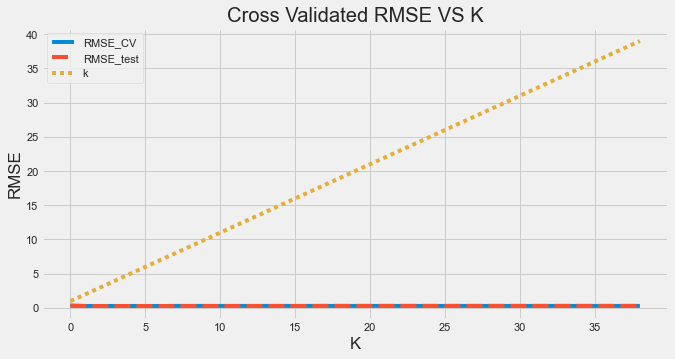

In [71]:
plt.figure(figsize=(10,5))
sns.lineplot(data=optimal_k)
plt.title('Cross Validated RMSE VS K')
plt.xlabel('K')
plt.ylabel('RMSE')
plt.show()

In [72]:
KNN_regression = KNeighborsRegressor(n_neighbors=opt_k)
KNN_regression.fit(Xd_reduced_train, yd_train)

# Predicting the Test set results
yd_hat = KNN_regression.predict(Xd_reduced_test)

predictions = pd.DataFrame({ 'y_test':yd_test,'y_hat':yd_hat})
predictions.head()

y_test      y_hat
107   11.652696  11.771258
33    12.016733  11.880748
1197  11.877576  11.884401
1042  12.185875  12.119479
625   11.982935  11.699017

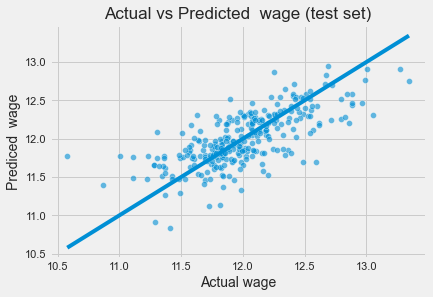

In [73]:
sns.scatterplot(x=yd_test, y=yd_hat, alpha=0.6)
sns.lineplot(yd_test, yd_test)

plt.xlabel('Actual wage', fontsize=14)
plt.ylabel('Prediced  wage', fontsize=14)
plt.title('Actual vs Predicted  wage (test set)', fontsize=17)
plt.show()

In [74]:
KNN_regression.score(Xd_reduced_train, yd_train)

0.8303952703570443

In [268]:
%%time

knn_param = [{'n_neighbors': [2,3,4,5,6], 
              'weights': ['uniform','distance']}]


# knn_param = [{'n_neighbors': [2], 
#               'weights': ['distance']}]

knn_search = GridSearchCV(estimator=KNeighborsRegressor(), param_grid= knn_param, 
             refit = True, verbose=3, cv=folds )

knn_result = knn_search.fit(Xd_sc_reduced_train,yd_train)


print('Train R^2 Score : %.3f'%knn_result.best_estimator_.score(Xd_sc_reduced_train, yd_train))
print('Test R^2 Score : %.3f'%knn_result.best_estimator_.score(Xd_sc_reduced_test, yd_test))
print('Best R^2 Score Through Grid Search : %.3f'%knn_result.best_score_)
print('Best Parameters : ',knn_result.best_params_)
print('Training mse : ', round(mean_squared_error(yd_train,knn_search.predict(Xd_sc_reduced_train)),4))
print('Testing mse : ', round(mean_squared_error(yd_test,knn_search.predict(Xd_sc_reduced_test)),4))

# knn_search=KNeighborsRegressor(n_neighbors=2,
#                               weights='distance')

# Train R^2 Score : 1.000
# Test R^2 Score : 0.338
# Best R^2 Score Through Grid Search : 0.269
# Best Parameters :  {'n_neighbors': 2, 'weights': 'distance'}
# Training mse :  0.0
# Testing mse :  0.0296
# CPU times: user 1.71 s, sys: 1.21 s, total: 2.92 s
# Wall time: 740 ms

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ....n_neighbors=2, weights=uniform;, score=0.340 total time=   0.0s
[CV 2/5] END ....n_neighbors=2, weights=uniform;, score=0.048 total time=   0.0s
[CV 3/5] END ....n_neighbors=2, weights=uniform;, score=0.241 total time=   0.0s
[CV 4/5] END ....n_neighbors=2, weights=uniform;, score=0.162 total time=   0.0s
[CV 5/5] END ....n_neighbors=2, weights=uniform;, score=0.226 total time=   0.0s
[CV 1/5] END ...n_neighbors=2, weights=distance;, score=0.344 total time=   0.0s
[CV 2/5] END ...n_neighbors=2, weights=distance;, score=0.054 total time=   0.0s
[CV 3/5] END ...n_neighbors=2, weights=distance;, score=0.243 total time=   0.0s
[CV 4/5] END ...n_neighbors=2, weights=distance;, score=0.165 total time=   0.0s
[CV 5/5] END ...n_neighbors=2, weights=distance;, score=0.229 total time=   0.0s
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.347 total time=   0.0s
[CV 2/5] END ....n_neighbors=3, weights=uniform;

## SVR 

In [76]:
%%time

# svr_param = {'C': [0.1, 0.5, 1, 1.5, 2], 
#                  'gamma': [0.01, 0.001, 0.0003, 0.0005,0.0007, 0.0001], 
#                  'kernel': ['poly', 'rbf', 'sigmoid']} 
# svr_param = {'C': [0.1, 0.5, 1, 5], 
#                  'gamma': [0.001, 0.0003, 0.0005,0.0001], 
#                  'kernel': ['rbf']} 

# svr_param = {'C': [0.1, 0.5, 1, 5], 
#                  'gamma': [0.0001, 0.00005, 0.00001], 
#                  'kernel': ['rbf']} 

svr_param = {'C': [5,8,10], 
                 'gamma': [0.00005], 
                 'kernel': ['rbf']} 

svr_search = GridSearchCV(estimator=SVR(), param_grid= svr_param, 
             refit = True, verbose=3, cv=folds )

svr_result = svr_search.fit(Xd_sc_train,yd_train)

print('Train R^2 Score : %.3f'%svr_result.best_estimator_.score(Xd_sc_train, yd_train))
print('Test R^2 Score : %.3f'%svr_result.best_estimator_.score(Xd_sc_test, yd_test))
print('Best R^2 Score Through Grid Search : %.3f'%svr_result.best_score_)
print('Best Parameters : ',svr_result.best_params_)
print('Training mse : ', round(mean_squared_error(yd_train,svr_search.predict(Xd_sc_train)),4))
print('Testing mse : ', round(mean_squared_error(yd_test,svr_search.predict(Xd_sc_test)),4))

# Best Parameters :  {'C': 5, 'gamma': 0.0001, 'kernel': 'rbf'}
# svr_search=SVR(C=5,
#               gamma=5e-05,
#               kernel='rbf')

# Train R^2 Score : 0.923
# Test R^2 Score : 0.930
# Best R^2 Score Through Grid Search : 0.884
# Best Parameters :  {'C': 5, 'gamma': 5e-05, 'kernel': 'rbf'}
# Training mse :  0.0032
# Testing mse :  0.0031
# CPU times: user 3.3 s, sys: 7.97 ms, total: 3.3 s
# Wall time: 3.27 s

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END ......C=5, gamma=5e-05, kernel=rbf;, score=0.825 total time=   0.0s
[CV 2/5] END ......C=5, gamma=5e-05, kernel=rbf;, score=0.885 total time=   0.0s
[CV 3/5] END ......C=5, gamma=5e-05, kernel=rbf;, score=0.914 total time=   0.0s
[CV 4/5] END ......C=5, gamma=5e-05, kernel=rbf;, score=0.887 total time=   0.0s
[CV 5/5] END ......C=5, gamma=5e-05, kernel=rbf;, score=0.872 total time=   0.0s
[CV 1/5] END ......C=8, gamma=5e-05, kernel=rbf;, score=0.819 total time=   0.0s
[CV 2/5] END ......C=8, gamma=5e-05, kernel=rbf;, score=0.887 total time=   0.0s
[CV 3/5] END ......C=8, gamma=5e-05, kernel=rbf;, score=0.915 total time=   0.0s
[CV 4/5] END ......C=8, gamma=5e-05, kernel=rbf;, score=0.891 total time=   0.0s
[CV 5/5] END ......C=8, gamma=5e-05, kernel=rbf;, score=0.874 total time=   0.0s
[CV 1/5] END .....C=10, gamma=5e-05, kernel=rbf;, score=0.815 total time=   0.0s
[CV 2/5] END .....C=10, gamma=5e-05, kernel=rbf;,

In [77]:
yd_hat_optimized = svr_result.predict(Xd_sc_test)

In [78]:
predictions['y_hat_optimized'] = yd_hat_optimized
predictions.head()

y_test      y_hat  y_hat_optimized
107   11.652696  11.771258        11.529711
33    12.016733  11.880748        12.123015
1197  11.877576  11.884401        11.873723
1042  12.185875  12.119479        12.277577
625   11.982935  11.699017        11.948650

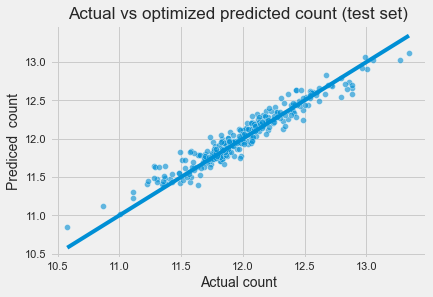

In [79]:
sns.scatterplot(x=yd_test, y=yd_hat_optimized, alpha=0.6)
sns.lineplot(yd_test, yd_test)

plt.xlabel('Actual count', fontsize=14)
plt.ylabel('Prediced  count', fontsize=14)
plt.title('Actual vs optimized predicted count (test set)', fontsize=17)
plt.show()

In [80]:
svr_result.score(Xd_sc_test, yd_test)

0.9203479620346933

In [81]:
svr_result.score(Xd_sc_train, yd_train)

0.9178999727061139

In [82]:
MSE_test_opt = round(np.mean(np.square(y_test - yd_hat_optimized)),2)
RMSE_test_opt = round(np.sqrt(MSE_test_opt),2)
RMSE_test_opt

0.1

## Decision Tree

In [83]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
X_lb_train = X_train.apply(le.fit_transform)
X_lb_test = X_test.apply(le.fit_transform)

In [84]:
from sklearn.tree import DecisionTreeRegressor
# Fitting regression tree to the Training set

Tree_regressor = DecisionTreeRegressor()
Tree_regressor.fit(X_lb_train, y_train)

# Predicting the Test set results
y_hat = Tree_regressor.predict(X_lb_test)

predictions = pd.DataFrame({ 'y_test':y_test,'y_hat':y_hat})
predictions.head()

y_test      y_hat
107   11.652696  11.289794
33    12.016733  12.028745
1197  11.877576  11.884496
1042  12.185875  11.740069
625   11.982935  11.608245

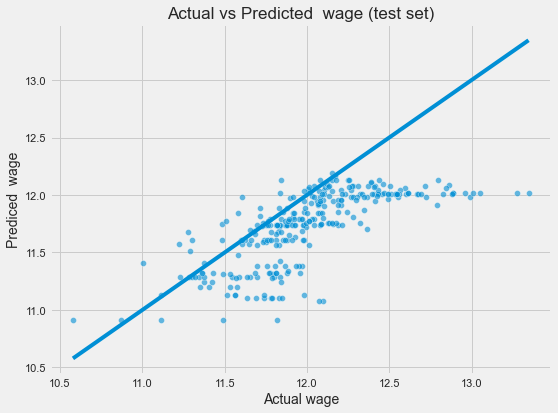

In [85]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_hat, alpha=0.6)
sns.lineplot(y_test, y_test)

plt.xlabel('Actual wage', fontsize=14)
plt.ylabel('Prediced  wage', fontsize=14)
plt.title('Actual vs Predicted  wage (test set)', fontsize=17)
plt.show()

In [86]:
MSE_test = round(np.mean(np.square(y_test - y_hat)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

0.4

In [109]:
path = DecisionTreeRegressor().cost_complexity_pruning_path(X_lb_train,y_train)
ccp_alphas = path.ccp_alphas

RMSE_CV=[]
for alpha in ccp_alphas:
    MSE = -cross_val_score(estimator = DecisionTreeRegressor(random_state=1,ccp_alpha=alpha), 
                           X = X_lb_train, y = y_train, cv = 5 , scoring="neg_mean_squared_error" )
    RMSE_CV.append(np.sqrt(MSE).mean())
    
output = pd.DataFrame(list(ccp_alphas), columns=['alpha'])
output['RMSE_CV']=RMSE_CV

output.head()

alpha   RMSE_CV
0  0.000000e+00  0.203358
1  4.866731e-17  0.203358
2  4.866731e-17  0.203358
3  4.866731e-17  0.203358
4  4.866731e-17  0.203358

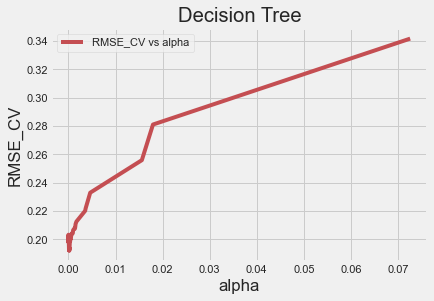

In [110]:
sns.lineplot(x='alpha', y='RMSE_CV', data=output , color='r', label="RMSE_CV vs alpha")
plt.title('Decision Tree')
plt.show()

In [111]:
np.argmin(output['RMSE_CV'])

1058

In [112]:
output.iloc[np.argmin(output['RMSE_CV']),]

alpha      0.000178
RMSE_CV    0.192093
Name: 1058, dtype: float64

In [113]:
optimal_alpha = output.iloc[np.argmin(output['RMSE_CV']),][0]
optimal_alpha

0.00017808052206461956

In [114]:
optimal_DT = DecisionTreeRegressor(max_depth=3, ccp_alpha=optimal_alpha)
optimal_DT.fit(X_lb_train, y_train)
y_hat_opt = optimal_DT.predict(X_lb_test)

In [115]:
optimal_DT.score(X_lb_train, y_train)

0.7582992825481112

In [116]:
optimal_DT.score(X_lb_test, y_test)

0.2156417214595675

In [117]:
MSE_test = round(np.mean(np.square(y_test - y_hat_opt)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

0.36

In [118]:
%%time

# dt_param = {  'bootstrap': [True], 
#               'max_depth': [5, 10, None], 
#               'max_features': ['auto', 'log2'], 
#               'n_estimators': [50, 100, 120, 150]}

dt_param = {  'bootstrap': [True], 
              'max_depth': [10, 15], 
              'max_features': ['auto'], 
              'n_estimators': [150,200,300]}

dt_search = GridSearchCV(estimator = RandomForestRegressor(), param_grid = dt_param, 
                          cv = folds, n_jobs = 1, verbose = 0, return_train_score=True)

dt_result = dt_search.fit(X_lb_train,y_train)

print('Train R^2 Score : %.3f'%dt_result.best_estimator_.score(X_lb_train, y_train))
print('Test R^2 Score : %.3f'%dt_result.best_estimator_.score(X_lb_test, y_test))
print('Best R^2 Score Through Grid Search : %.3f'%dt_result.best_score_)
print('Best Parameters : ',dt_result.best_params_)
print('Training mse : ', round(mean_squared_error(y_train,dt_search.predict(X_lb_train)),4))
print('Testing mse : ', round(mean_squared_error(y_test,dt_search.predict(X_lb_test)),4))

# Train R^2 Score : 1.000
# Test R^2 Score : -0.990
# Best R^2 Score Through Grid Search : 1.000
# Best Parameters :  {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 150}
# Training mse :  0.0
# Testing mse :  0.2612
# Wall time: 3min 22s

# dt_search=RandomForestRegressor(bootstrap=True,
#                                max_depth=10,
#                                max_features='auto',
#                                n_estimators=150)

Train R^2 Score : 0.981
Test R^2 Score : 0.230
Best R^2 Score Through Grid Search : 0.868
Best Parameters :  {'bootstrap': True, 'max_depth': 15, 'max_features': 'auto', 'n_estimators': 150}
Training mse :  0.003
Testing mse :  0.1282
Wall time: 4min 32s


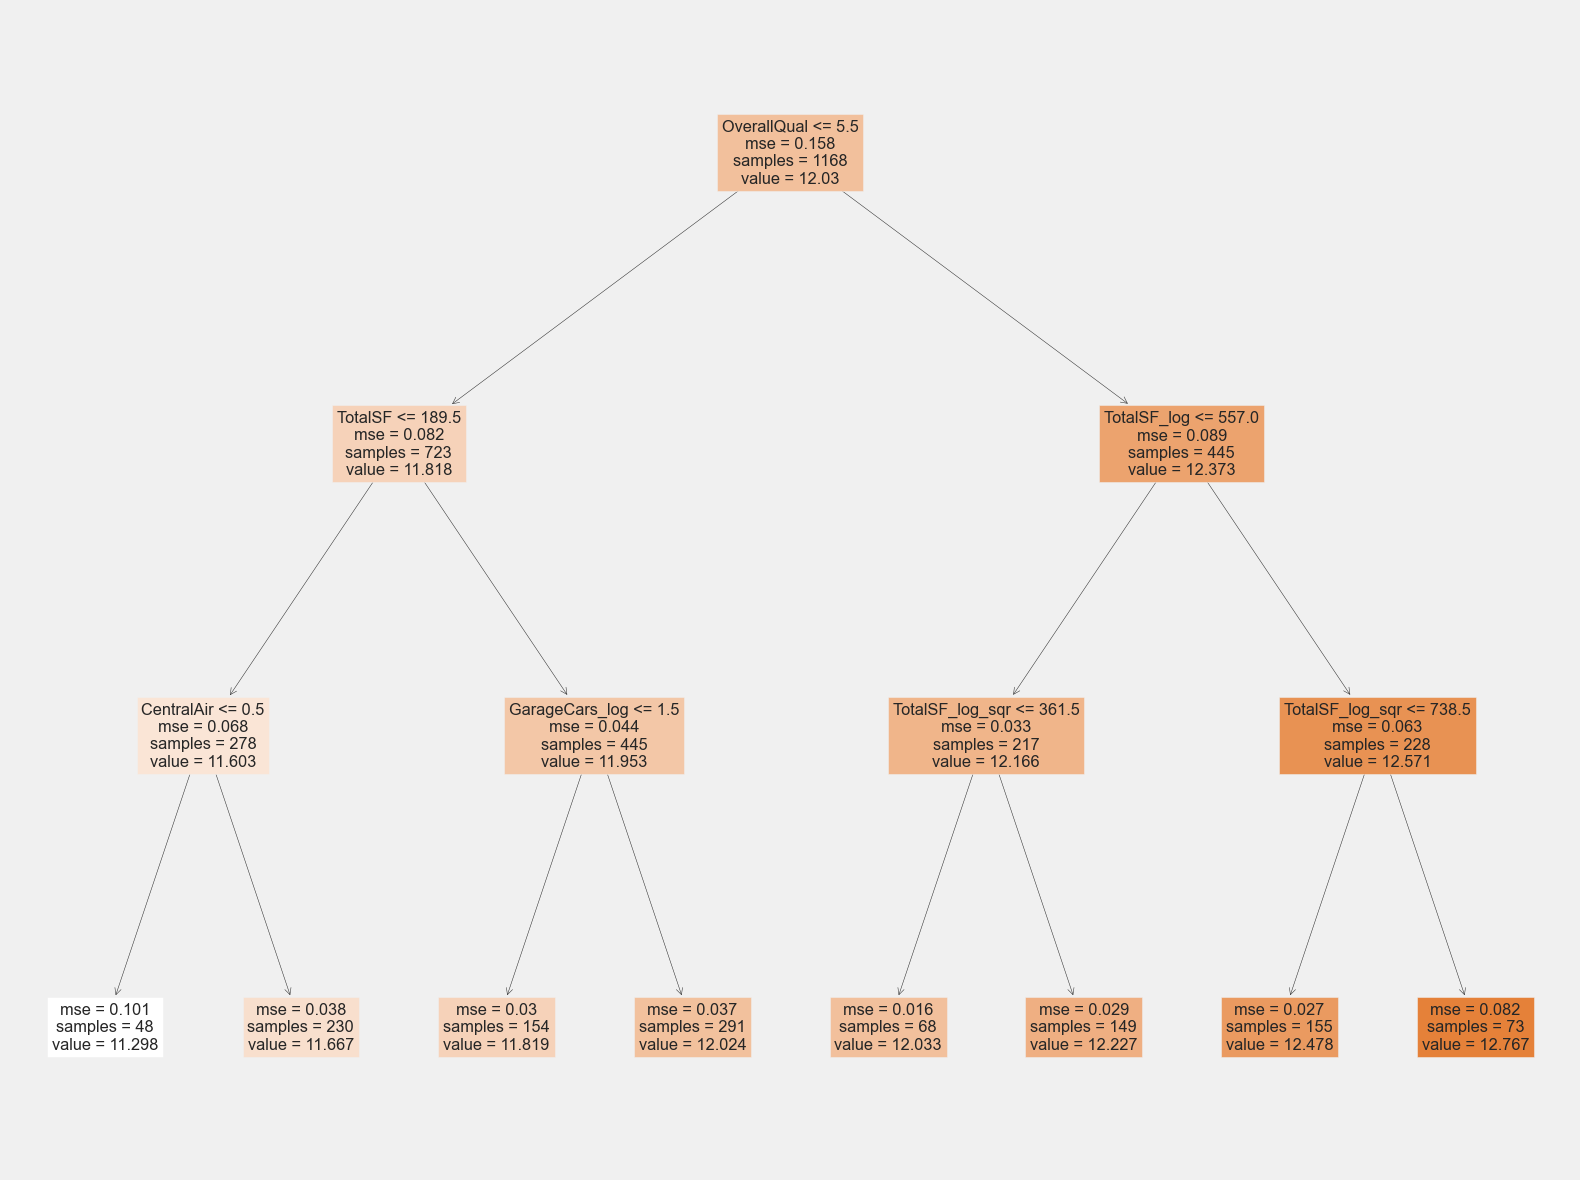

In [119]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
DT_plot = tree.plot_tree(optimal_DT, feature_names=X_lb_train.columns, filled=True)
# left branch True

In [120]:
train

Id MSSubClass MSZoning  LotFrontage   LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF     2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature   MiscVal MoSold YrSold SaleType SaleCondition  SalePrice    TotalSF  Total_Bathrooms  Total_porch_sf haspool has2ndfloor hasgarage hasbsmt hasfireplace  \
0        1         60       RL    10.481398  8.670457   Pave  None      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7     3.036931       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   19.340340        Gd        TA      PConc       Gd       TA           No          GLQ  118.098015          Unf    0.000000  30.319786   252.446438    GasA        Ex          Y      SBrkr  5.133687  1273.318734           0.0   7.744828      0.993848      0.000000         2  1.072004             3      0.717357          Gd      2.550030        Typ    0.000000          TA     Attchd       2003.0          RFn           2         548         TA         TA          Y    0.000000    12.049772       0.000000        0.0          0.0       0.0     TA     NA        None  0.000000      2   2008       WD        Normal  12.247699  19.635177              3.5       20.248951       N           Y         Y       Y            N   
1        2         20       RL    11.558196  8.787629   Pave  None      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6     4.241668       1976          1976     Gable  CompShg     MetalSd     MetalSd       None    0.000000        TA        TA     CBlock       Gd       TA           Gd          ALQ  147.125761          Unf    0.000000  44.696310   342.556400    GasA        Ex          Y      SBrkr  5.348117     0.000000           0.0   7.416974      0.000000      0.682506         2  0.000000             3      0.717357          TA      2.219433        Typ    0.919485          TA     Attchd       1976.0          RFn           2         460         TA         TA          Y   62.298514     0.000000       0.000000        0.0          0.0       0.0     TA     NA        None  0.000000      5   2007       WD        Normal  12.109016  19.551999              2.5       57.964037       N           N         Y       Y            Y   
2        3         60       RL    10.707933  8.933084   Pave  None      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7     3.036931       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   17.687638        Gd        TA      PConc       Gd       TA           Mn          GLQ   91.750448          Unf    0.000000  57.687342   267.178807    GasA        Ex          Y      SBrkr  5.174048  1292.445964           0.0   7.791848      0.993848      0.000000         2  1.072004             3      0.717357          Gd      2.219433        Typ    0.919485          TA     Attchd       2001.0          RFn           2         608         TA         TA          Y    0.000000     9.878686       0.000000        0.0          0.0       0.0     TA     NA        None  0.000000      9   2008       WD        Normal  12.317171  19.904855              3.5       15.706164       N           Y         Y       Y            Y   
3   

## Random Forest

### 1. Encode ordinal categorical features as an integer array.


In [121]:
object_columns(X_train).columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'haspool', 'has2ndfloor', 'hasgarage', 'hasbsmt', 'hasfireplace'], dtype='object')

In [259]:

ordinal_categorical = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 
                       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 
                       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 
                       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 
                       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 
                       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 
                       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 
                       'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 
                       'haspool', 'has2ndfloor', 'hasgarage', 'hasbsmt', 'hasfireplace']

enc = OrdinalEncoder()

X_ord_train=X_train.copy()
X_ord_test=X_test.copy()

X_ord_train[ordinal_categorical]= enc.fit_transform(X_train[ordinal_categorical])
X_ord_test[ordinal_categorical]= enc.fit_transform(X_test[ordinal_categorical])
X_ord_train.head()

test_ord=test.copy()
test_ord[ordinal_categorical]= enc.fit_transform(test[ordinal_categorical])


In [123]:
X_train.head()

Id MSSubClass MSZoning  LotFrontage   LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature   MiscVal MoSold YrSold SaleType SaleCondition    TotalSF  Total_Bathrooms  Total_porch_sf haspool has2ndfloor hasgarage hasbsmt hasfireplace  \
931    932         20       RL    10.855617  8.738527   Pave  None      Reg         Lvl    AllPub    Inside       Gtl        NAmes       Norm       Norm     1Fam     1Story            5     3.463892       1965          1965     Gable  CompShg     VinylSd     VinylSd       None    0.000000        TA        TA     CBlock       TA       TA           No          BLQ   71.718928          Rec   11.208874  26.570852   268.320268    GasA        Ex          Y      SBrkr  5.177072       0.0           0.0   7.082879      0.000000      0.682506         1       0.0             2      0.717357          TA      2.022026        Typ    0.000000          TA     Detchd       1965.0          Unf           1         429         TA         TA          Y    0.000000     0.000000            0.0        0.0          0.0       0.0     TA   GdWo        None  0.000000      7   2009       WD        Normal  18.038040              1.5        0.000000       N           N         Y       Y            N   
1436  1437         20       RL    10.089356  8.728380   Pave  None      Reg         Lvl    AllPub       FR2       Gtl        NAmes       Norm       Norm     1Fam     1Story            4     3.463892       1971          1971     Gable  CompShg     HdBoard     HdBoard       None    0.000000        TA        TA      PConc       TA       TA           No          ALQ  107.706307          Unf    0.000000  41.179038   254.300674    GasA        TA          Y      SBrkr  5.138907       0.0           0.0   7.009671      0.000000      0.000000         1       0.0             3      0.717357          TA      2.022026        Typ    0.000000          TA     Detchd       1974.0          Unf           2         528         TA         TA          Y    0.000000     0.000000            0.0        0.0          0.0       0.0     TA   GdWo        None  0.000000      5   2007       WD        Normal  17.718392              1.0        0.000000       N           N         Y       Y            N   
1214  1215         85       RL    10.782098  8.843702   Pave  None      IR1         Lvl    AllPub    Inside       Gtl        NAmes       Norm       Norm     1Fam     SFoyer            5     3.036931       1962          1962     Gable  CompShg     MetalSd     MetalSd       None    0.000000        TA        TA     CBlock       TA       TA           Av          BLQ  126.752320          Unf    0.000000  29.191226   268.320268    GasA        TA          Y      SBrkr  5.219864       0.0           0.0   7.165535      0.993848      0.000000         1       0.0             3      0.717357          TA      2.219433        Typ    0.000000          TA     Attchd       1962.0          Unf           1         300         TA         TA          Y   39.277941    13.140662            0.0        0.0          0.0       0.0     TA     NA        None  0.000000      5   2006       WD        Normal  18.223859              2.0       47.804586       N           N         Y       Y            N   
611    612         80       RL    11.558196  8.860621   Pave

In [124]:
X_ord_train.describe().T

count          mean            std           min           25%           50%           75%           max
Id                   1168.0  7.231661e+02     418.324251  1.000000e+00  3.627500e+02  7.215000e+02  1.082250e+03  1.460000e+03
MSSubClass           1168.0  6.280822e+00       3.559013  0.000000e+00  4.000000e+00  5.000000e+00  9.000000e+00  1.400000e+01
MSZoning             1168.0  3.017979e+00       0.624151  0.000000e+00  3.000000e+00  3.000000e+00  3.000000e+00  4.000000e+00
LotFrontage          1168.0  1.072744e+01       1.583136  5.958922e+00  1.008936e+01  1.085562e+01  1.155820e+01  2.129758e+01
LotArea              1168.0  8.739651e+00       0.472961  6.935833e+00  8.577702e+00  8.780189e+00  8.961156e+00  1.160099e+01
...                     ...           ...            ...           ...           ...           ...           ...           ...
TotalBsmtSF_log_sqr  1168.0  4.685278e+01       9.282606  0.000000e+00  4.463382e+01  4.778601e+01  5.142715e+01  7.600083e+01
1stFlrSF_log_sqr     1168.0  4.929867e+01       4.466552  3.506509e+01  4.605570e+01  4.898553e+01  5.254596e+01  7.146720e+01
YearBuilt_sqr        1168.0  3.888814e+06  117024.698129  3.515625e+06  3.818116e+06  3.892729e+06  4.000000e+06  4.040100e+06
FullBath_log_sqr     1168.0  9.017293e-01       0.394491  0.000000e+00  4.804530e-01  1.206949e+00  1.206949e+00  1.921812e+00
2ndFlrSF_log_sqr     1168.0  1.938029e+01      22.081410  0.000000e+00  0.000000e+00  0.000000e+00  4.349530e+01  5.826833e+01

[126 rows x 8 columns]

### 2. fit the model

In [125]:
from sklearn.ensemble import RandomForestRegressor

RF_regression = RandomForestRegressor(random_state=rand_state)
RF_regression.fit(X_ord_train, y_train)

# Predicting the Test set results
y_hat = RF_regression.predict(X_ord_test)
predictions = pd.DataFrame({ 'y_test':y_test,'y_hat':y_hat})
predictions.head()

y_test      y_hat
107   11.652696  11.555354
33    12.016733  11.966849
1197  11.877576  11.989520
1042  12.185875  12.112259
625   11.982935  11.883065

### 3. Evaluating the model on test dataset¶

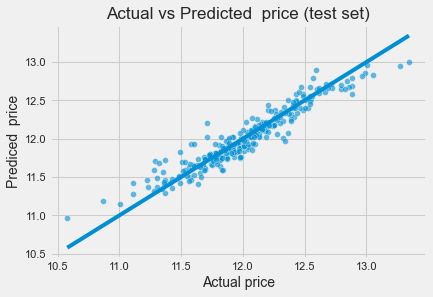

In [126]:
sns.scatterplot(x=y_test, y=y_hat, alpha=0.6)
sns.lineplot(y_test, y_test)

plt.xlabel('Actual price', fontsize=14)
plt.ylabel('Prediced  price', fontsize=14)
plt.title('Actual vs Predicted  price (test set)', fontsize=17)
plt.show()

In [127]:
np.round(RF_regression.score(X_ord_test, y_test),4)

0.8995

In [128]:
MSE_test = round(np.mean(np.square(y_test - y_hat)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

0.14

### 4.Tuning hyperparameters: 
- GridSearch

In [132]:
ordinal_categorical = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 
                       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 
                       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 
                       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 
                       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 
                       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 
                       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 
                       'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 
                       'haspool', 'has2ndfloor', 'hasgarage', 'hasbsmt', 'hasfireplace']

enc = OrdinalEncoder()

X_ord_train=X_train.copy()
X_ord_test=X_test.copy()

X_ord_train[ordinal_categorical]= enc.fit_transform(X_train[ordinal_categorical])
X_ord_test[ordinal_categorical]= enc.fit_transform(X_test[ordinal_categorical])
X_ord_train.head()

test_ord=test.copy()
test_ord[ordinal_categorical]= enc.fit_transform(test[ordinal_categorical])


In [134]:
%%time


# Best Parameters :  {'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 300}

# rf_param = {'n_estimators': [ 100,300,1000], 
#             'max_features':['sqrt','log2'], 
#             'max_depth':[20,25,35]}
# rf_param = {'n_estimators': [ 200,300,500], 
#             'max_features':['sqrt','log2'], 
#             'max_depth':[10, 15, 20]}

rf_param = {'n_estimators': [300], 
            'max_features':['sqrt'], 
            'max_depth':[20,25,30]}

rf_search = GridSearchCV(estimator=RandomForestRegressor(random_state=rand_state),
                         param_grid= rf_param, refit = True, verbose=2, cv=folds )

rf_result = rf_search.fit(X_ord_train,y_train)

y_hat_optimized = rf_search.predict(X_ord_test)

print('Train R^2 Score : %.3f'%rf_search.best_estimator_.score(X_ord_train, y_train))
print('Test R^2 Score : %.3f'%rf_search.best_estimator_.score(X_ord_test, y_test))
print('Best R^2 Score Through Grid Search : %.3f'%rf_search.best_score_)
print('Best Parameters : ',rf_search.best_params_)
print('Training mse : ', round(mean_squared_error(y_train,rf_search.predict(X_ord_train)),4))
print('Testing mse : ', round(mean_squared_error(y_test,rf_search.predict(X_ord_test)),4))

# Best Parameters :  {'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 300}
# rf_search=RandomForestRegressor(max_depth=20,
#                                max_features='sqrt',
#                                n_estimators=300)

# Train R^2 Score : 0.989
# Test R^2 Score : 0.951
# Best R^2 Score Through Grid Search : 0.917
# Best Parameters :  {'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 300}
# Training mse :  0.0005
# Testing mse :  0.0022
# CPU times: user 1min 46s, sys: 445 ms, total: 1min 47s
# Wall time: 1min 47s

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=300; total time=   1.1s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=300; total time=   1.2s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=300; total time=   1.9s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=300; total time=   2.3s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=300; total time=   2.4s
[CV] END ..max_depth=25, max_features=sqrt, n_estimators=300; total time=   2.4s
[CV] END ..max_depth=25, max_features=sqrt, n_estimators=300; total time=   2.5s
[CV] END ..max_depth=25, max_features=sqrt, n_estimators=300; total time=   2.4s
[CV] END ..max_depth=25, max_features=sqrt, n_estimators=300; total time=   2.5s
[CV] END ..max_depth=25, max_features=sqrt, n_estimators=300; total time=   2.4s
[CV] END ..max_depth=30, max_features=sqrt, n_estimators=300; total time=   2.5s
[CV] END ..max_depth=30, max_features=sqrt, n_est

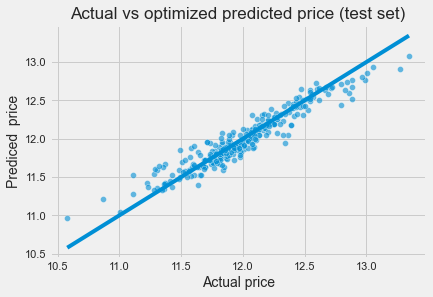

In [136]:
y_hat_optimized = rf_search.predict(X_ord_test)

predictions['y_hat_optimized'] = y_hat_optimized
predictions.head()

sns.scatterplot(x=y_test, y=y_hat_optimized, alpha=0.6)
sns.lineplot(y_test, y_test)

plt.xlabel('Actual price', fontsize=14)
plt.ylabel('Prediced  price', fontsize=14)
plt.title('Actual vs optimized predicted price (test set)', fontsize=17)
plt.show()

In [137]:
np.round(rf_result.score(X_ord_test, y_test),4)

0.9026

In [138]:
MSE_test_opt = round(np.mean(np.square(y_test - y_hat_optimized)),2)
RMSE_test_opt = round(np.sqrt(MSE_test_opt),2)
RMSE_test_opt

0.14

- Cross validation
We will use Cross validation to estimate performance metrics in the test set. 

In [139]:
NMSE = cross_val_score(estimator = RandomForestRegressor(max_depth=20, 
                                                         max_features='sqrt', n_estimators=500), 
                       X = X_ord_train, y = y_train, cv = 5 , scoring="neg_mean_squared_error" )

MSE_CV = round(np.mean(-NMSE),4)
RMSE_CV = round(np.sqrt(MSE_CV),4)
RMSE_CV

0.1497

### 5. Out-of-Bag errors!
We can show that on average, each bagged tree makes use of around 2/3 of the observations and 1/3 of them are not used to fit the model. These left out observations are called out-of-bag (OOB) observations. It turns out there is a very straightforward way to estimate the test errors using OOB observations. 

In [140]:
np.random.choice (100,size=100)
np.unique(np.random.choice (100,size=100)).size
RF_oob = RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=500, oob_score=True)
RF_oob.fit(X_ord_train, y_train)
RF_oob.oob_score_


0.8627217449292985

### 6. Feature Importance

In [141]:
features = list(X_ord_train.columns)
features

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [200]:
RF_Regressor = RandomForestRegressor(n_estimators = 500, max_features='sqrt', max_depth=20, random_state= rand_state)
RF_Regressor.fit(X_ord_train, y_train)

rf_importance = RF_Regressor.feature_importances_
rf_importance

array([2.78241370e-03, 3.28796893e-03, 4.18052308e-03, 4.41699351e-03,
       7.40133524e-03, 1.18919483e-04, 6.31933685e-04, 8.88560154e-04,
       9.26600757e-04, 1.08943153e-07, 6.23020635e-04, 3.61950206e-04,
       3.95530170e-03, 7.92149643e-04, 1.75437638e-04, 1.03524870e-03,
       1.39693689e-03, 6.02931478e-02, 6.51876601e-03, 3.49415434e-02,
       1.36921774e-02, 7.68417774e-04, 3.51107576e-04, 1.87097740e-03,
       2.16639709e-03, 6.55820987e-04, 1.71894707e-03, 2.79890092e-02,
       1.10950627e-03, 2.19466872e-03, 1.38686842e-02, 7.66025597e-04,
       1.13074023e-03, 2.11566209e-03, 7.17973731e-03, 4.28136461e-04,
       4.14883780e-04, 3.52681088e-03, 1.47835719e-02, 3.34738606e-04,
       4.19287561e-03, 6.87525728e-03, 4.82485757e-04, 9.92509319e-03,
       5.05991272e-03, 1.00742802e-04, 4.24385351e-02, 9.54939230e-04,
       2.14790131e-04, 8.54127586e-03, 1.78456783e-03, 1.74873246e-03,
       1.93382992e-03, 1.36374135e-02, 3.58316286e-03, 1.09845794e-03,
      

In [201]:
rf_FIM = pd.DataFrame({'Features': X_ord_train.columns , 'Feature_importance':rf_importance})
rf_FIM = rf_FIM.sort_values(by=['Feature_importance'], ascending=False)
rf_FIM

Features  Feature_importance
118  TotalSF_log_sqr        8.123676e-02
117      TotalSF_log        7.694270e-02
80           TotalSF        7.098444e-02
17       OverallQual        6.029315e-02
46         GrLivArea        4.243854e-02
..               ...                 ...
45      LowQualFinSF        1.007428e-04
69         3SsnPorch        8.621447e-05
112    3SsnPorch_log        6.874764e-05
83           haspool        6.366559e-05
9          Utilities        1.089432e-07

[126 rows x 2 columns]

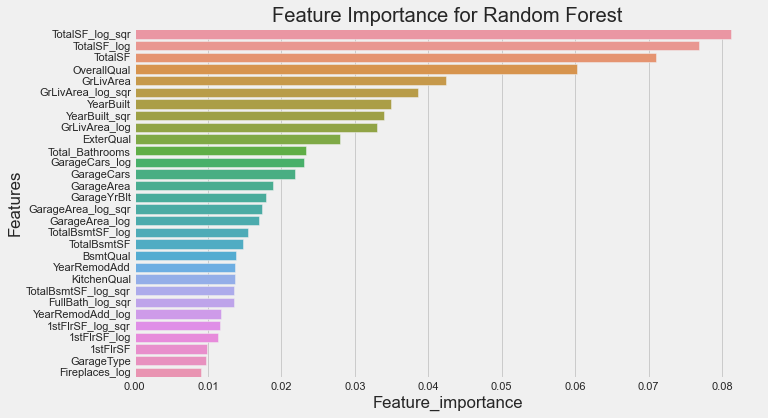

In [202]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance for Random Forest')
sns.barplot(y='Features', x='Feature_importance', data=rf_FIM.head(30))
plt.show()

### 8. Does more important feature mean more significant?

In [ ]:
# With statsmodels, we need to mannually add a constant to our dataset!
X_test_wc = sm.add_constant(X_ord_test)
X_train_wc = sm.add_constant(X_ord_train)

# Fit the model
model = sm.OLS(y_train,X_train_wc)
statsmodels_reg= model.fit()

statsmodels_reg.summary()

## Gradient Boosting Regression

### 1. fit the model

In [172]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(X_ord_train, y_train)

y_hat = gbr.predict(X_ord_test)

print(y_hat[:15])
print(y_test[:15])

print('Test R^2 Score : %.3f'%gbr.score(X_ord_test, y_test))
print('Training R^2 Score : %.3f'%gbr.score(X_ord_train, y_train))

# Test R^2 Score : 0.909
# Training R^2 Score : 0.969

[11.47930724 11.97255252 11.88550375 12.12789688 11.92602385 11.84558837
 12.24497058 11.28587895 11.94719325 11.94444788 11.64024011 11.86127883
 12.28409417 11.54608534 12.16612193]
107     11.652696
33      12.016733
1197    11.877576
1042    12.185875
625     11.982935
1083    11.982935
621     12.388398
325     11.373675
1020    12.078245
1012    12.013707
51      11.648339
658     11.487618
446     12.154785
589     11.283525
447     12.205578
Name: SalePrice, dtype: float64
Test R^2 Score : 0.920
Training R^2 Score : 0.961


### 2. Attributes 

In [173]:
# import features in the dataset
print("Feature Importances : ", gbr.feature_importances_)

# trained estimators
gbr.estimators_[:2]

# Loss function as object
print("Loss : ", gbr.loss_)

Feature Importances :  [8.22553338e-04 1.77151377e-03 1.02040238e-02 1.50347790e-03
 7.53538181e-03 0.00000000e+00 6.50856209e-05 2.20900385e-04
 1.08900056e-03 0.00000000e+00 4.67365568e-04 3.29701115e-04
 4.68154209e-03 7.72906362e-04 1.66701529e-05 0.00000000e+00
 2.58987619e-04 3.44411435e-01 1.40654391e-02 8.46389933e-03
 7.11818705e-03 2.35940291e-04 0.00000000e+00 5.82823698e-04
 1.51172016e-04 2.12629372e-04 2.65999965e-04 2.11721147e-03
 1.05987450e-05 3.42775597e-04 3.09832719e-04 6.87926816e-04
 1.59431289e-03 1.74913059e-04 3.65871166e-03 0.00000000e+00
 0.00000000e+00 5.36090390e-04 7.87871804e-04 3.28241732e-04
 6.02262911e-04 1.65086974e-02 7.76161290e-05 1.17493737e-03
 1.34824810e-03 6.09248777e-05 2.28573923e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 8.01523540e-05
 2.47228568e-03 1.02103822e-02 0.00000000e+00 2.07041118e-03
 3.84679897e-03 1.88288616e-04 4.32449930e-03 5.22144156e-03
 2.74494653e-06 7.84159809e-03 3.16043796e-03 0.00000000e+00
 

### 3. tune hyperparameters

In [266]:
%%time

n_samples = X_ord_train.shape[0]
n_features = X_ord_train.shape[1]

# Best Parameters :  {'learning_rate': 0.005, 'max_depth': 30, 'max_features': 'sqrt', 'n_estimators': 1500}
# n_estimators represents the number of trees in the forest.
# gbr_param={'n_estimators':[100,300,1500],
#             'learning_rate':[0.001, 0.005, 0.01],
#             'max_depth':[20, 30, 35],
#             'max_features':['sqrt', 'auto', 'log2']}
# gbr_param={'n_estimators':[1500, 2000, 3000],
#             'learning_rate':[0.001, 0.005, 0.01],
#             'max_depth':[20, 30, 35],
#             'max_features':['sqrt', 'auto', 'log2']}
# gbr_param={'n_estimators':[2000, 2500],
#             'learning_rate':[0.01, 0.05, 0.1, 1],
#             'max_depth':[10, 15, 20],
#             'max_features':['sqrt', 'auto', 'log2']}

gbr_param={'n_estimators':[1000, 2000, 3000],
            'learning_rate':[0.001, 0.005, 0.01],
            'max_depth':[15, 20,25],
            'max_features':[ 'auto']}

# Best Parameters :  {'learning_rate': 0.01, 'max_depth': 20, 'max_features': 'auto', 'n_estimators': 2000}


gbr_search = GridSearchCV(GradientBoostingRegressor(random_state=1), 
                          param_grid=gbr_param, n_jobs=-1, cv=folds, verbose=5)
gbr_result=gbr_search.fit(X_ord_train,y_train)

print('Train R^2 Score : %.3f'%gbr_result.best_estimator_.score(X_ord_train, y_train))
print('Test R^2 Score : %.3f'%gbr_result.best_estimator_.score(X_ord_test, y_test))
print('Best R^2 Score Through Grid Search : %.3f'%gbr_result.best_score_)
print('Best Parameters : ',gbr_result.best_params_)
print('Training mse : ', round(mean_squared_error(y_train,gbr_search.predict(X_ord_train)),4))
print('Testing mse : ', round(mean_squared_error(y_test,gbr_search.predict(X_ord_test)),4))

# Best Parameters :  {'learning_rate': 0.01, 'max_depth': 20, 'max_features': 'auto', 'n_estimators': 1500}
# gbr_search=GradientBoostingRegressor(learning_rate=0.01,
#                                     max_depth=20,
#                                     max_features='auto',
#                                     n_estimators=2000)
# Train R^2 Score : 1.000
# Test R^2 Score : 0.999
# Best R^2 Score Through Grid Search : 0.998
# Best Parameters :  {'learning_rate': 0.01, 'max_depth': 20, 'max_features': 'auto', 'n_estimators': 2000}
# Training mse :  0.0
# Testing mse :  0.0
# CPU times: user 56 s, sys: 586 ms, total: 56.5 s
# Wall time: 1h 1min 55s

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Train R^2 Score : 0.982
Test R^2 Score : 0.773
Best R^2 Score Through Grid Search : 0.769
Best Parameters :  {'learning_rate': 0.001, 'max_depth': 15, 'max_features': 'auto', 'n_estimators': 2000}
Training mse :  0.0029
Testing mse :  0.0377
Wall time: 1h 3min 40s


In [175]:
cross_val_results = pd.DataFrame(gbr_result.cv_results_)
print('Number of Various Combinations of Parameters Tried : %d'%len(cross_val_results))

cross_val_results.head()

Number of Various Combinations of Parameters Tried : 9


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_learning_rate param_max_depth param_max_features param_n_estimators                                             params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score
0     310.468531     36.005810         0.834664        0.203040               0.001              20               auto               2000  {'learning_rate': 0.001, 'max_depth': 20, 'max...           0.733811           0.746838           0.738375           0.787556           0.794734         0.760263        0.025660                1
1     238.427056     49.841609         0.588153        0.309353               0.001              25               auto               2000  {'learning_rate': 0.001, 'max_depth': 25, 'max...           0.733994           0.746769           0.738136           0.787527           0.794765         0.760238        0.025673                2
2     199.502987     12.442045         0.319305        0.092708               0.001              30               auto               2000  {'learning_rate': 0.001, 'max_depth': 30, 'max...           0.733994           0.746729           0.738110           0.787527           0.794765         0.760225        0.025682                3
3     242.465448     32.461218         1.411604        0.885491               0.005              20               auto               2000  {'learning_rate': 0.005, 'max_depth': 20, 'max...           0.711944           0.729554           0.701893           0.767963           0.783523         0.738976        0.031684                5
4     293.931029     46.494844         1.387831        0.480516               0.005              25               auto               2000  {'learning_rate': 0.005, 'max_depth': 25, 'max...           0.709561           0.728231           0.701275           0.767463           0.783066         0.737919        0.032100                8

### 4.Important features

In [176]:
gbr_Regressor = GradientBoostingRegressor(n_estimators = 500, max_features='sqrt', max_depth=20, random_state= rand_state)
gbr_Regressor.fit(X_ord_train, y_train)

gbr_importance = gbr_Regressor.feature_importances_
gbr_importance
gbr_FIM = pd.DataFrame({'Features': X_ord_train.columns , 'Feature_importance':gbr_importance})
gbr_FIM = gbr_FIM.sort_values(by=['Feature_importance'], ascending=False)
gbr_FIM

Features  Feature_importance
124   FullBath_log_sqr        1.177017e-01
80             TotalSF        9.398650e-02
118    TotalSF_log_sqr        5.735160e-02
20        YearRemodAdd        5.646259e-02
119  GrLivArea_log_sqr        4.707122e-02
..                 ...                 ...
71            PoolArea        2.817440e-05
83             haspool        2.468545e-05
114       PoolArea_log        1.054123e-06
5               Street        9.506476e-07
9            Utilities        1.793408e-21

[126 rows x 2 columns]

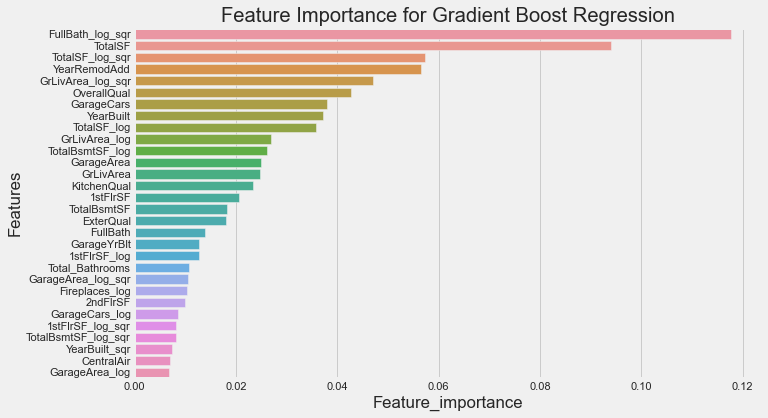

In [203]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance for Gradient Boost Regression')
sns.barplot(y='Features', x='Feature_importance', data=gbr_FIM.head(30))
plt.show()

## Ada Boosting Regression

In [178]:
from sklearn.ensemble import AdaBoostRegressor

abr = AdaBoostRegressor()
abr.fit(X_ord_train, y_train)

y_hat= abr.predict(X_ord_test)

print(y_hat[:15])
print(y_test[:15])

print('Test R^2 Score : %.3f'%abr.score(X_ord_test, y_test)) ## Score method also evaluates accuracy for classification models.
print('Training R^2 Score : %.3f'%abr.score(X_ord_train,y_train))

# Name: SalePrice, dtype: float64
# Test R^2 Score : 0.875
# Training R^2 Score : 0.907

[11.36383276 11.99462154 11.9092854  12.02794406 11.75985704 11.84380911
 12.30331057 11.28903796 11.89357692 11.9092854  11.51411627 11.90252484
 12.28345692 11.37887608 12.30919823]
107     11.652696
33      12.016733
1197    11.877576
1042    12.185875
625     11.982935
1083    11.982935
621     12.388398
325     11.373675
1020    12.078245
1012    12.013707
51      11.648339
658     11.487618
446     12.154785
589     11.283525
447     12.205578
Name: SalePrice, dtype: float64
Test R^2 Score : 0.843
Training R^2 Score : 0.859


In [179]:
print("Base Estimator : ", abr.base_estimator_)
print("Feature Importances : ", abr.feature_importances_)
print("Estimators Shape : ", len(abr.estimators_))
abr.estimators_[:2]



Base Estimator :  DecisionTreeRegressor(max_depth=3)
Feature Importances :  [7.89244330e-04 0.00000000e+00 1.45808429e-02 1.60334259e-03
 8.52323346e-03 0.00000000e+00 0.00000000e+00 1.89439321e-03
 5.43451092e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.09660820e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 7.08060839e-04 2.83212933e-01 5.84146123e-03 2.13487133e-03
 9.77141197e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 4.28693514e-03
 1.94190556e-03 2.85921818e-04 1.70341097e-02 0.00000000e+00
 0.00000000e+00 5.15437263e-03 7.12624701e-03 0.00000000e+00
 0.00000000e+00 1.20090278e-03 0.00000000e+00 0.00000000e+00
 7.83928220e-03 1.06525127e-02 0.00000000e+00 5.46810832e-03
 3.64940683e-03 0.00000000e+00 6.24900643e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.08421216e-02 1.24699874e-03 0.00000000e+00
 2.90010141e-03 0.00000000e+00 2.23006473e-03 2.78106258e-03
 0.000000

[DecisionTreeRegressor(max_depth=3, random_state=312276905),
 DecisionTreeRegressor(max_depth=3, random_state=477399830)]

In [267]:
%%time
n_samples = X_ord_train.shape[0]
n_features = X_ord_train.shape[1]

# # Best Parameters :  {'base_estimator': DecisionTreeRegressor(), 'learning_rate': 1.0, 'n_estimators': 500}
# ada_param = {
#             'base_estimator':[None, DecisionTreeRegressor(), 
#                               KNeighborsRegressor(), 
#                               SVR(),
#                               LinearRegression()],
#             'n_estimators': [500, 800, 1000, 1300, 1500],
#             'learning_rate': [0.5, 0.8, 1.0, 2.0 ]
#          }
# ada_param = {
#             'base_estimator':[None, DecisionTreeRegressor(), 
#                               KNeighborsRegressor(), 
#                               SVR(),
#                               LinearRegression()],
#             'n_estimators': [100, 300, 500],
#             'learning_rate': [1.0, 1.5, 2.0 ]
#          }
ada_param = {
            'base_estimator':[None, DecisionTreeRegressor(), 
                              KNeighborsRegressor(), 
                              SVR(),
                              LinearRegression()],
            'n_estimators': [100, 150],
            'learning_rate': [0.3, 0.8, 1.0 ]
         }

# ada_param = {
#             'base_estimator':[LinearRegression()],
#             'n_estimators': [50],
#             'learning_rate': [1.5]
#          }

ada_search = GridSearchCV(AdaBoostRegressor(random_state=1), 
                                        param_grid=ada_param, 
                                        n_jobs=-1, cv=folds, verbose=5)
ada_result=ada_search.fit(X_ord_train,y_train)

print('Train R^2 Score : %.3f'%ada_result.best_estimator_.score(X_ord_train, y_train))
print('Test R^2 Score : %.3f'%ada_result.best_estimator_.score(X_ord_test, y_test))
print('Best R^2 Score Through Grid Search : %.3f'%ada_result.best_score_)
print('Best Parameters : ',ada_result.best_params_)
print('Training mse : ', round(mean_squared_error(y_train,ada_search.predict(X_ord_train)),4))
print('Testing mse : ', round(mean_squared_error(y_test,ada_search.predict(X_ord_test)),4))

# Best Parameters :  {'base_estimator': LinearRegression(), 'learning_rate': 1.0, 'n_estimators': 100}
# ada_search=AdaBoostRegressor(base_estimator=LinearRegression(),
#                             learning_rate=1.5,
#                             n_estimators=50)

# Train R^2 Score : 1.000
# Test R^2 Score : 0.999
# Best R^2 Score Through Grid Search : 0.999
# Best Parameters :  {'base_estimator': LinearRegression(), 'learning_rate': 1.5, 'n_estimators': 50}
# Training mse :  0.0
# Testing mse :  0.0
# CPU times: user 5.13 s, sys: 3.33 s, total: 8.45 s
# Wall time: 2min 23s

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Train R^2 Score : 1.000
Test R^2 Score : 0.909
Best R^2 Score Through Grid Search : 0.875
Best Parameters :  {'base_estimator': DecisionTreeRegressor(), 'learning_rate': 1.0, 'n_estimators': 100}
Training mse :  0.0
Testing mse :  0.0151
Wall time: 3min 31s


In [181]:
cross_val_results = pd.DataFrame(ada_search.cv_results_)
print('Number of Various Combinations of Parameters Tried : %d'%len(cross_val_results))

cross_val_results.head() 

Number of Various Combinations of Parameters Tried : 1


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_base_estimator param_learning_rate param_n_estimators                                             params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score
0       0.943042      0.111555         0.021127        0.003446   LinearRegression()                 1.5                 50  {'base_estimator': LinearRegression(), 'learni...           0.790624           0.793206           0.795002           0.732237           0.772407         0.776695         0.02365                1

In [182]:
ada_Regressor = AdaBoostRegressor(n_estimators = 100, 
                                  base_estimator=DecisionTreeRegressor(),
                                  random_state= rand_state)
ada_Regressor.fit(X_ord_train, y_train)

ada_importance = ada_Regressor.feature_importances_
ada_importance
ada_FIM = pd.DataFrame({'Features': X_ord_train.columns , 
                        'Feature_importance':ada_importance})
ada_FIM = ada_FIM.sort_values(by=['Feature_importance'], ascending=False)
ada_FIM

Features  Feature_importance
17       OverallQual            0.227686
117      TotalSF_log            0.154737
80           TotalSF            0.138553
118  TotalSF_log_sqr            0.130607
2           MSZoning            0.031087
..               ...                 ...
72            PoolQC            0.000012
114     PoolArea_log            0.000009
71          PoolArea            0.000007
83           haspool            0.000004
9          Utilities            0.000000

[126 rows x 2 columns]

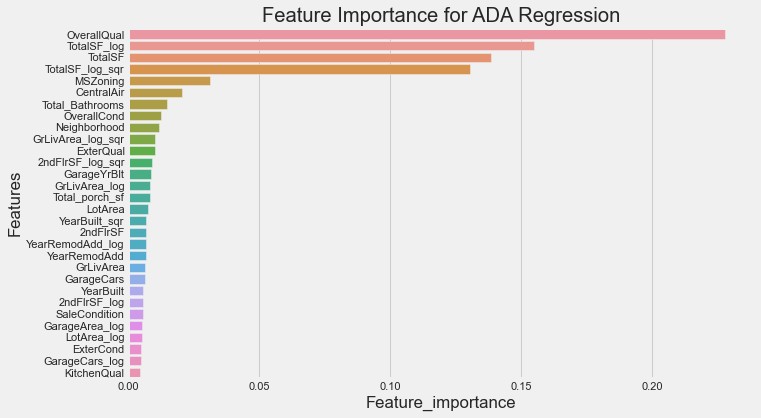

In [204]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance for ADA Regression')
sns.barplot(y='Features', x='Feature_importance', data=ada_FIM.head(30))
plt.show()

## XGB

In [184]:
import xgboost as xgb

xgb_regressor = xgb.XGBRegressor()

xgb_regressor.fit(X_ord_train, y_train, 
                  eval_set=[(X_ord_test, y_test)], 
                  eval_metric="mae", verbose=10)

print("Test  R2 Score : %.2f"%xgb_regressor.score(X_ord_test, y_test))
print("Train R2 Score : %.2f"%xgb_regressor.score(X_ord_train, y_train))

# Test  R2 Score : 0.93
# Train R2 Score : 1.00

[0]	validation_0-mae:8.04509
[10]	validation_0-mae:0.25372
[20]	validation_0-mae:0.09550
[30]	validation_0-mae:0.09279
[40]	validation_0-mae:0.09349
[50]	validation_0-mae:0.09386
[60]	validation_0-mae:0.09399
[70]	validation_0-mae:0.09436
[80]	validation_0-mae:0.09464
[90]	validation_0-mae:0.09486
[99]	validation_0-mae:0.09476
Test  R2 Score : 0.90
Train R2 Score : 1.00


In [185]:
print("Default Number of Estimators : ",xgb_regressor.n_estimators)
print("Default Max Depth of Trees   : ", xgb_regressor.max_depth)
print("Feature Importances : ")
pd.DataFrame([xgb_regressor.feature_importances_], columns=X_ord_train.columns)


Default Number of Estimators :  100
Default Max Depth of Trees   :  None
Feature Importances : 


Id  MSSubClass  MSZoning  LotFrontage   LotArea  Street     Alley  LotShape  LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF   Heating  HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  FireplaceQu  GarageType  GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  PoolQC    Fence  MiscFeature   MiscVal    MoSold    YrSold  SaleType  SaleCondition   TotalSF  Total_Bathrooms  Total_porch_sf  haspool  \
0  0.000963     0.00136  0.020912     0.001393  0.004214     0.0  0.000587  0.002909     0.013731        0.0   0.001826   0.000826      0.004637    0.003428    0.000178    0.0025    0.002664     0.191958     0.016781   0.008002      0.031914   0.001857  0.009435     0.002398     0.001586    0.001741    0.000921   0.002314   0.007949    0.001061  0.005483   0.01267      0.003894      0.000554    0.005321      0.004796    0.001473   0.003651     0.002433  0.000054   0.000909    0.016553    0.000808  0.006409  0.002663      0.005204   0.003941       0.00052      0.003605  0.001463  0.004815      0.002346      0.084047     0.033166      0.001385    0.018572    0.008377     0.002334    0.009817      0.00411      0.003957    0.101253    0.004432    0.001125         0.0    0.003045    0.001017     0.002933        0.00354   0.003694     0.001404  0.009677     0.0  0.00177     0.006398  0.000567  0.002088  0.001132   0.00151       0.009171  0.146761         0.099584        0.003526      0.0   

   has2ndfloor  hasgarage  hasbsmt  hasfireplace  LotFrontage_log  LotArea_log  MasVnrArea_log  BsmtFinSF1_log  BsmtFinSF2_log  BsmtUnfSF_log  TotalBsmtSF_log  1stFlrSF_log  2ndFlrSF_log  LowQualFinSF_log  GrLivArea_log  BsmtFullBath_log  BsmtHalfBath_log  FullBath_log  HalfBath_log  BedroomAbvGr_log  KitchenAbvGr_log  TotRmsAbvGrd_log  Fireplaces_log  GarageCars_log  GarageArea_log  WoodDeckSF_log  OpenPorchSF_log  EnclosedPorch_log  3SsnPorch_log  ScreenPorch_log  PoolArea_log  MiscVal_log  YearRemodAdd_log  TotalSF_log  TotalSF_log_sqr  GrLivArea_log_sqr  GarageArea_log_sqr  TotalBsmtSF_log_sqr  1stFlrSF_log_sqr  YearBuilt_sqr  FullBath_log_sqr  2ndFlrSF_log_sqr  
0          0.0        0.0      0.0           0.0              0.0          0.0             0.0             0.0             0.0            0.0              0.0           0.0           0.0               0.0            0.0               0.0               0.0           0.0           0.0               0.0               0.0               0.0             0.0             0.0             0.0             0.0              0.0                0.0            0.0              0.0           0.0          0.0               0.0          0.0              0.0                0.0                 0.0                  0.0               0.0            0.0               0.0               0.0

In [150]:
%%time

# xgb_param = {
#         'n_estimators': [500, 800, 1000,1300, 1500],
#         'max_depth': [15, 20, 25, 30],
#         'eta': [0.01, 0.05, 0.1, 0.5, 1]
#         }
# xgb_param = {
#         'n_estimators': [1500, 2000, 3000],
#         'max_depth': [15, 20, 25, 30],
#         'eta': [0.01, 0.05, 0.1, 0.5, 1]
#         }

xgb_param = {
        'n_estimators': [2000],
        'max_depth': [5, 10, 15],
        'eta': [0.001, 0.005, 0.01]
        }
xgb_search = GridSearchCV(xgb.XGBRegressor(), xgb_param, n_jobs=-1, cv=folds)

xgb_result=xgb_search.fit(X_ord_train, y_train)

print('Train R^2 Score : %.3f'%xgb_result.best_estimator_.score(X_ord_train, y_train))
print('Test R^2 Score : %.3f'%xgb_result.best_estimator_.score(X_ord_test, y_test))
print('Best R^2 Score Through Grid Search : %.3f'%xgb_result.best_score_)
print('Best Parameters : ',xgb_result.best_params_)
print('Training mse : ', round(mean_squared_error(y_train,xgb_search.predict(X_ord_train)),4))
print('Testing mse : ', round(mean_squared_error(y_test,xgb_search.predict(X_ord_test)),4))

# Best Parameters :  {'eta': 0.01, 'max_depth': 15, 'n_estimators': 1500}
# xgb_search=xgb.XGBRegressor(eta=0.01,
#                            max_depth=15,
#                            n_estimators=2000)
# Train R^2 Score : 1.000
# Test R^2 Score : 0.999
# Best R^2 Score Through Grid Search : 1.000
# Best Parameters :  {'eta': 0.01, 'max_depth': 15, 'n_estimators': 2000}
# Training mse :  0.0
# Testing mse :  0.0
# CPU times: user 43.8 s, sys: 364 ms, total: 44.2 s
# Wall time: 21min 48s

Train R^2 Score : 0.994
Test R^2 Score : 0.927
Best R^2 Score Through Grid Search : 0.890
Best Parameters :  {'eta': 0.01, 'max_depth': 5, 'n_estimators': 2000}
Training mse :  0.001
Testing mse :  0.0121
Wall time: 9min 38s


In [151]:
xgb_search_results = pd.DataFrame(xgb_search.cv_results_)
print("Grid Search Size : ", xgb_search_results.shape)
xgb_search_results.head()

Grid Search Size :  (9, 16)


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_eta param_max_depth param_n_estimators                                             params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score
0      26.883659      4.126133         0.039071        0.032705     0.001               5               2000  {'eta': 0.001, 'max_depth': 5, 'n_estimators':...         -16.003013         -17.699556         -14.493590         -11.840734         -16.011778       -15.209734        1.966459                7
1      27.552611      3.807814         0.022200        0.003761     0.001              10               2000  {'eta': 0.001, 'max_depth': 10, 'n_estimators'...         -16.003013         -17.699556         -14.493590         -11.840734         -16.011778       -15.209734        1.966459                7
2      25.263233      1.488290         0.025601        0.008891     0.001              15               2000  {'eta': 0.001, 'max_depth': 15, 'n_estimators'...         -16.003013         -17.699556         -14.493590         -11.840734         -16.011778       -15.209734        1.966459                7
3      51.966573      0.740092         0.051825        0.012393     0.005               5               2000  {'eta': 0.005, 'max_depth': 5, 'n_estimators':...           0.896126           0.873761           0.899334           0.903386           0.872259         0.888973        0.013244                2
4      96.358309      5.795137         0.084566        0.031553     0.005              10               2000  {'eta': 0.005, 'max_depth': 10, 'n_estimators'...           0.894750           0.871504           0.894653           0.904222           0.860892         0.885204        0.016253                3

In [152]:
xgb_Regressor = xgb.XGBRegressor(n_estimators = 100, 
                                  eta=0.1,
                                  random_state= rand_state)
xgb_Regressor.fit(X_ord_train, y_train)

xgb_importance = xgb_Regressor.feature_importances_
xgb_importance
xgb_FIM = pd.DataFrame({'Features': X_ord_train.columns , 
                        'Feature_importance':xgb_importance})
xgb_FIM = xgb_FIM.sort_values(by=['Feature_importance'], ascending=False)
xgb_FIM

Features  Feature_importance
61         GarageCars            0.214424
80            TotalSF            0.106504
81    Total_Bathrooms            0.104788
17        OverallQual            0.085077
41         CentralAir            0.055348
..                ...                 ...
97   LowQualFinSF_log            0.000000
98      GrLivArea_log            0.000000
74        MiscFeature            0.000000
100  BsmtHalfBath_log            0.000000
125  2ndFlrSF_log_sqr            0.000000

[126 rows x 2 columns]

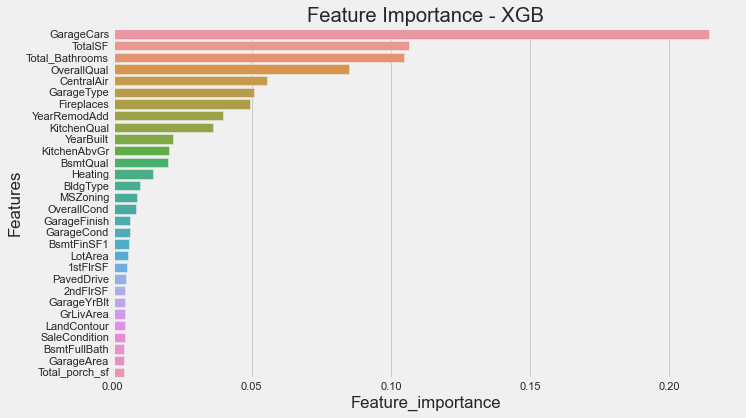

In [153]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance - XGB')
sns.barplot(y='Features', x='Feature_importance', data=xgb_FIM.head(30))
plt.show()

## Cat Boost Regression

In [155]:
from catboost import CatBoost
from sklearn.metrics import r2_score

cbr = CatBoost(params={'iterations':100, 'verbose':10, 'loss_function':'RMSE'})

cbr.fit(X_ord_train, y_train)
cbr.set_feature_names(X_ord_train.columns)

y_hat_test = cbr.predict(X_ord_test)
y_hat_train = cbr.predict(X_ord_train)

from catboost.utils import eval_metric

# print("Test  R2 : %.2f"%eval_metric(y_test, y_hat_test, "R2"))
# print("Train R2 : %.2f"%eval_metric(y_train, y_hat_train, "R2"))

def rmse(y, y_hat):
    return np.sqrt(mean_squared_error(y, y_hat))
def r2(y, y_hat):
    return r2_score(y, y_hat)
    
print("Test  R2 : %.2f"%r2(y_test, y_hat_test))
print("Train R2 : %.2f"%r2(y_train, y_hat_train))

# Test  R2 : 0.89
# Train R2 : 0.99

Learning rate set to 0.272794
0:	learn: 0.3317793	total: 272ms	remaining: 27s
10:	learn: 0.1401657	total: 866ms	remaining: 7.01s
20:	learn: 0.1132892	total: 1.34s	remaining: 5.04s
30:	learn: 0.0976963	total: 1.71s	remaining: 3.8s
40:	learn: 0.0862282	total: 1.94s	remaining: 2.8s
50:	learn: 0.0773400	total: 2.2s	remaining: 2.12s
60:	learn: 0.0702487	total: 2.46s	remaining: 1.57s
70:	learn: 0.0643203	total: 2.75s	remaining: 1.12s
80:	learn: 0.0582509	total: 3.07s	remaining: 721ms
90:	learn: 0.0527202	total: 3.33s	remaining: 329ms
99:	learn: 0.0492092	total: 3.56s	remaining: 0us
Test  R2 : 0.90
Train R2 : 0.98


In [156]:
# Shrink Estimator by Reducing Number of Trees in Ensemble
cbr.shrink(ntree_end=50)

y_hat_test = cbr.predict(X_ord_test)
y_hat_train = cbr.predict(X_ord_train)

print("Test  R2 : %.2f"%r2(y_test, y_hat_test))
print("Train R2 : %.2f"%r2(y_train, y_hat_train))

# Test  R2 : 0.89
# Train R2 : 0.97


Test  R2 : 0.90
Train R2 : 0.96


In [157]:
print("Best Score                : ",cbr.best_score_)
print("\nList of Target Classses : ",cbr.classes_)
print("\nData Feature Names      : ",cbr.feature_names_)
print("\nFeature Importance      : ", cbr.feature_importances_)
print("\nLearning Rate           : ",cbr.learning_rate_)
print("\nRandom Seed             : ",cbr.random_seed_)
print("\nNumber of Trees         : ",cbr.tree_count_)
print("\nNumber of Features      : ",cbr.n_features_in_)

Best Score                :  {'learn': {'RMSE': 0.04920917897600783}}

List of Target Classses :  []

Data Feature Names      :  ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'Garage

In [158]:
y_train.shape

(1168,)

In [159]:
%%time

from catboost import CatBoostRegressor

# Best Parameters :  {'bootstrap_type': 'No', 'iterations': 100, 'learning_rate': 0.1}
# cbr_param = {
#             'iterations':[10,50, 80, 100],
#             'learning_rate':[0.01,0.05, 0.1, 0.5, 1],
#             'bootstrap_type':['Bayesian', 'Bernoulli', 'No']
# }
# cbr_param = {
#             'iterations':[100, 120, 150],
#             'learning_rate':[0.05, 0.1, 0.5],
#             'bootstrap_type':['Bayesian', 'Bernoulli', 'No']
# }
cbr_param = {
            'iterations':[150, 175, 200],
            'learning_rate':[0.05, 0.1, 0.5],
            'bootstrap_type':['Bayesian', 'Bernoulli', 'No']
}

cbr_search = GridSearchCV(CatBoostRegressor(),cbr_param, cv=folds)
cbr_result=cbr_search.fit(X_ord_train, y_train)
# Best Parameters :  {'bootstrap_type': 'No', 
#                     'iterations': 150, 
#                     'learning_rate': 0.1}

print('Train R^2 Score : %.3f'%cbr_result.best_estimator_.score(X_ord_train, y_train))
print('Test R^2 Score : %.3f'%cbr_result.best_estimator_.score(X_ord_test, y_test))
print('Best R^2 Score Through Grid Search : %.3f'%cbr_result.best_score_)
print('Best Parameters : ',cbr_result.best_params_)
print('Training mse : ', round(mean_squared_error(y_train,cbr_search.predict(X_ord_train)),4))
print('Testing mse : ', round(mean_squared_error(y_test,cbr_search.predict(X_ord_test)),4))

# cbr_search = CatBoostRegressor(
#     learning_rate=0.1,
#     bootstrap_type='No',
#     iterations=200,
#     random_state=rand_state)

# Train R^2 Score : 0.999
# Test R^2 Score : 0.992
# Best R^2 Score Through Grid Search : 0.991
# Best Parameters :  {'bootstrap_type': 'No', 'iterations': 200, 'learning_rate': 0.1}
# Training mse :  0.0
# Testing mse :  0.0003
# CPU times: user 7min 59s, sys: 27.8 s, total: 8min 26s
# Wall time: 2min 32s

0:	learn: 0.3854979	total: 76.7ms	remaining: 11.4s
1:	learn: 0.3736381	total: 133ms	remaining: 9.87s
2:	learn: 0.3616495	total: 184ms	remaining: 9s
3:	learn: 0.3498832	total: 235ms	remaining: 8.59s
4:	learn: 0.3394681	total: 284ms	remaining: 8.24s
5:	learn: 0.3295482	total: 328ms	remaining: 7.87s
6:	learn: 0.3201636	total: 375ms	remaining: 7.66s
7:	learn: 0.3109683	total: 431ms	remaining: 7.66s
8:	learn: 0.3023037	total: 492ms	remaining: 7.7s
9:	learn: 0.2937537	total: 569ms	remaining: 7.97s
10:	learn: 0.2862563	total: 636ms	remaining: 8.04s
11:	learn: 0.2792635	total: 708ms	remaining: 8.14s
12:	learn: 0.2718167	total: 757ms	remaining: 7.98s
13:	learn: 0.2646258	total: 819ms	remaining: 7.95s
14:	learn: 0.2576852	total: 880ms	remaining: 7.92s
15:	learn: 0.2517022	total: 937ms	remaining: 7.84s
16:	learn: 0.2460602	total: 1.03s	remaining: 8.04s
17:	learn: 0.2404425	total: 1.11s	remaining: 8.13s
18:	learn: 0.2351746	total: 1.19s	remaining: 8.2s
19:	learn: 0.2299885	total: 1.25s	remaining: 

12:	learn: 0.2741931	total: 792ms	remaining: 8.35s
13:	learn: 0.2672551	total: 852ms	remaining: 8.28s
14:	learn: 0.2610581	total: 914ms	remaining: 8.22s
15:	learn: 0.2546209	total: 989ms	remaining: 8.28s
16:	learn: 0.2486190	total: 1.05s	remaining: 8.2s
17:	learn: 0.2428387	total: 1.13s	remaining: 8.28s
18:	learn: 0.2370386	total: 1.17s	remaining: 8.07s
19:	learn: 0.2318227	total: 1.22s	remaining: 7.96s
20:	learn: 0.2271501	total: 1.28s	remaining: 7.84s
21:	learn: 0.2223205	total: 1.33s	remaining: 7.77s
22:	learn: 0.2178930	total: 1.4s	remaining: 7.73s
23:	learn: 0.2140339	total: 1.46s	remaining: 7.69s
24:	learn: 0.2097744	total: 1.52s	remaining: 7.6s
25:	learn: 0.2055844	total: 1.57s	remaining: 7.5s
26:	learn: 0.2023306	total: 1.63s	remaining: 7.43s
27:	learn: 0.1989160	total: 1.72s	remaining: 7.49s
28:	learn: 0.1954237	total: 1.78s	remaining: 7.45s
29:	learn: 0.1919573	total: 1.83s	remaining: 7.33s
30:	learn: 0.1891223	total: 1.87s	remaining: 7.19s
31:	learn: 0.1860751	total: 1.93s	r

23:	learn: 0.2143014	total: 1.56s	remaining: 8.2s
24:	learn: 0.2098849	total: 1.61s	remaining: 8.03s
25:	learn: 0.2062572	total: 1.66s	remaining: 7.91s
26:	learn: 0.2026744	total: 1.71s	remaining: 7.8s
27:	learn: 0.1990923	total: 1.77s	remaining: 7.73s
28:	learn: 0.1959347	total: 1.82s	remaining: 7.61s
29:	learn: 0.1925776	total: 1.88s	remaining: 7.52s
30:	learn: 0.1893790	total: 1.94s	remaining: 7.43s
31:	learn: 0.1861713	total: 2s	remaining: 7.39s
32:	learn: 0.1836326	total: 2.1s	remaining: 7.45s
33:	learn: 0.1813254	total: 2.18s	remaining: 7.43s
34:	learn: 0.1783248	total: 2.23s	remaining: 7.34s
35:	learn: 0.1756014	total: 2.28s	remaining: 7.21s
36:	learn: 0.1733666	total: 2.32s	remaining: 7.1s
37:	learn: 0.1712708	total: 2.4s	remaining: 7.08s
38:	learn: 0.1692884	total: 2.48s	remaining: 7.04s
39:	learn: 0.1673638	total: 2.51s	remaining: 6.91s
40:	learn: 0.1653276	total: 2.56s	remaining: 6.81s
41:	learn: 0.1633308	total: 2.63s	remaining: 6.77s
42:	learn: 0.1617544	total: 2.7s	remain

45:	learn: 0.1527569	total: 614ms	remaining: 1.39s
46:	learn: 0.1514080	total: 624ms	remaining: 1.37s
47:	learn: 0.1497924	total: 635ms	remaining: 1.35s
48:	learn: 0.1485180	total: 647ms	remaining: 1.33s
49:	learn: 0.1474278	total: 658ms	remaining: 1.32s
50:	learn: 0.1461960	total: 670ms	remaining: 1.3s
51:	learn: 0.1449096	total: 681ms	remaining: 1.28s
52:	learn: 0.1436672	total: 690ms	remaining: 1.26s
53:	learn: 0.1425877	total: 699ms	remaining: 1.24s
54:	learn: 0.1414565	total: 708ms	remaining: 1.22s
55:	learn: 0.1405637	total: 718ms	remaining: 1.21s
56:	learn: 0.1394799	total: 727ms	remaining: 1.19s
57:	learn: 0.1383349	total: 738ms	remaining: 1.17s
58:	learn: 0.1371707	total: 751ms	remaining: 1.16s
59:	learn: 0.1362065	total: 761ms	remaining: 1.14s
60:	learn: 0.1353319	total: 775ms	remaining: 1.13s
61:	learn: 0.1344982	total: 791ms	remaining: 1.12s
62:	learn: 0.1335130	total: 805ms	remaining: 1.11s
63:	learn: 0.1326751	total: 819ms	remaining: 1.1s
64:	learn: 0.1319680	total: 831ms

65:	learn: 0.1338748	total: 739ms	remaining: 940ms
66:	learn: 0.1329204	total: 749ms	remaining: 927ms
67:	learn: 0.1319747	total: 760ms	remaining: 916ms
68:	learn: 0.1314972	total: 771ms	remaining: 905ms
69:	learn: 0.1308600	total: 786ms	remaining: 899ms
70:	learn: 0.1301769	total: 797ms	remaining: 887ms
71:	learn: 0.1294523	total: 810ms	remaining: 877ms
72:	learn: 0.1288590	total: 829ms	remaining: 875ms
73:	learn: 0.1283091	total: 841ms	remaining: 864ms
74:	learn: 0.1276670	total: 852ms	remaining: 852ms
75:	learn: 0.1269011	total: 863ms	remaining: 840ms
76:	learn: 0.1259667	total: 873ms	remaining: 828ms
77:	learn: 0.1253657	total: 884ms	remaining: 816ms
78:	learn: 0.1246667	total: 893ms	remaining: 803ms
79:	learn: 0.1238317	total: 903ms	remaining: 790ms
80:	learn: 0.1233203	total: 913ms	remaining: 778ms
81:	learn: 0.1229118	total: 926ms	remaining: 768ms
82:	learn: 0.1221796	total: 938ms	remaining: 757ms
83:	learn: 0.1216761	total: 948ms	remaining: 745ms
84:	learn: 0.1211803	total: 958

90:	learn: 0.0914926	total: 932ms	remaining: 605ms
91:	learn: 0.0911325	total: 942ms	remaining: 594ms
92:	learn: 0.0907060	total: 950ms	remaining: 582ms
93:	learn: 0.0902297	total: 960ms	remaining: 572ms
94:	learn: 0.0897466	total: 980ms	remaining: 567ms
95:	learn: 0.0894755	total: 990ms	remaining: 557ms
96:	learn: 0.0888323	total: 997ms	remaining: 545ms
97:	learn: 0.0883767	total: 1.01s	remaining: 534ms
98:	learn: 0.0880417	total: 1.01s	remaining: 523ms
99:	learn: 0.0875482	total: 1.02s	remaining: 512ms
100:	learn: 0.0871240	total: 1.03s	remaining: 501ms
101:	learn: 0.0868185	total: 1.04s	remaining: 490ms
102:	learn: 0.0865188	total: 1.05s	remaining: 482ms
103:	learn: 0.0860761	total: 1.06s	remaining: 471ms
104:	learn: 0.0856442	total: 1.07s	remaining: 460ms
105:	learn: 0.0853467	total: 1.08s	remaining: 449ms
106:	learn: 0.0849938	total: 1.09s	remaining: 438ms
107:	learn: 0.0845176	total: 1.1s	remaining: 427ms
108:	learn: 0.0842103	total: 1.1s	remaining: 416ms
109:	learn: 0.0838870	to

110:	learn: 0.0804037	total: 1.13s	remaining: 396ms
111:	learn: 0.0800698	total: 1.14s	remaining: 385ms
112:	learn: 0.0797924	total: 1.14s	remaining: 375ms
113:	learn: 0.0795402	total: 1.15s	remaining: 364ms
114:	learn: 0.0791653	total: 1.16s	remaining: 353ms
115:	learn: 0.0787295	total: 1.17s	remaining: 343ms
116:	learn: 0.0784085	total: 1.18s	remaining: 333ms
117:	learn: 0.0780831	total: 1.19s	remaining: 323ms
118:	learn: 0.0776394	total: 1.2s	remaining: 313ms
119:	learn: 0.0774312	total: 1.21s	remaining: 302ms
120:	learn: 0.0771523	total: 1.22s	remaining: 292ms
121:	learn: 0.0767818	total: 1.23s	remaining: 281ms
122:	learn: 0.0764642	total: 1.23s	remaining: 271ms
123:	learn: 0.0761965	total: 1.25s	remaining: 262ms
124:	learn: 0.0757604	total: 1.26s	remaining: 251ms
125:	learn: 0.0753840	total: 1.26s	remaining: 241ms
126:	learn: 0.0751531	total: 1.27s	remaining: 231ms
127:	learn: 0.0748465	total: 1.28s	remaining: 220ms
128:	learn: 0.0745538	total: 1.29s	remaining: 210ms
129:	learn: 0

130:	learn: 0.0763758	total: 1.35s	remaining: 196ms
131:	learn: 0.0760954	total: 1.37s	remaining: 187ms
132:	learn: 0.0758321	total: 1.38s	remaining: 177ms
133:	learn: 0.0754908	total: 1.4s	remaining: 168ms
134:	learn: 0.0753651	total: 1.43s	remaining: 159ms
135:	learn: 0.0750345	total: 1.45s	remaining: 149ms
136:	learn: 0.0747733	total: 1.48s	remaining: 140ms
137:	learn: 0.0744113	total: 1.51s	remaining: 132ms
138:	learn: 0.0740184	total: 1.56s	remaining: 124ms
139:	learn: 0.0737431	total: 1.61s	remaining: 115ms
140:	learn: 0.0735347	total: 1.65s	remaining: 106ms
141:	learn: 0.0731792	total: 1.69s	remaining: 95.5ms
142:	learn: 0.0727421	total: 1.73s	remaining: 84.8ms
143:	learn: 0.0724778	total: 1.77s	remaining: 73.7ms
144:	learn: 0.0720347	total: 1.81s	remaining: 62.4ms
145:	learn: 0.0718858	total: 1.86s	remaining: 50.9ms
146:	learn: 0.0714713	total: 1.9s	remaining: 38.8ms
147:	learn: 0.0711088	total: 1.94s	remaining: 26.2ms
148:	learn: 0.0707403	total: 1.98s	remaining: 13.3ms
149:	l

146:	learn: 0.0720749	total: 3.31s	remaining: 67.5ms
147:	learn: 0.0717909	total: 3.33s	remaining: 45ms
148:	learn: 0.0716237	total: 3.35s	remaining: 22.5ms
149:	learn: 0.0714023	total: 3.36s	remaining: 0us
0:	learn: 0.3728288	total: 10.7ms	remaining: 1.59s
1:	learn: 0.3498345	total: 19.1ms	remaining: 1.42s
2:	learn: 0.3283704	total: 28.6ms	remaining: 1.4s
3:	learn: 0.3090876	total: 40.3ms	remaining: 1.47s
4:	learn: 0.2927858	total: 50.8ms	remaining: 1.47s
5:	learn: 0.2772618	total: 61.9ms	remaining: 1.49s
6:	learn: 0.2629626	total: 75.5ms	remaining: 1.54s
7:	learn: 0.2494188	total: 86ms	remaining: 1.53s
8:	learn: 0.2386559	total: 95.6ms	remaining: 1.5s
9:	learn: 0.2282187	total: 107ms	remaining: 1.49s
10:	learn: 0.2204269	total: 187ms	remaining: 2.37s
11:	learn: 0.2130877	total: 203ms	remaining: 2.33s
12:	learn: 0.2051149	total: 218ms	remaining: 2.29s
13:	learn: 0.1989569	total: 230ms	remaining: 2.24s
14:	learn: 0.1928338	total: 244ms	remaining: 2.19s
15:	learn: 0.1869427	total: 259ms

7:	learn: 0.1375060	total: 282ms	remaining: 5.01s
8:	learn: 0.1313613	total: 316ms	remaining: 4.95s
9:	learn: 0.1274836	total: 337ms	remaining: 4.72s
10:	learn: 0.1231514	total: 357ms	remaining: 4.52s
11:	learn: 0.1205166	total: 377ms	remaining: 4.33s
12:	learn: 0.1183812	total: 416ms	remaining: 4.38s
13:	learn: 0.1157397	total: 453ms	remaining: 4.41s
14:	learn: 0.1127347	total: 474ms	remaining: 4.27s
15:	learn: 0.1099748	total: 497ms	remaining: 4.17s
16:	learn: 0.1075711	total: 521ms	remaining: 4.07s
17:	learn: 0.1050703	total: 545ms	remaining: 4s
18:	learn: 0.1025645	total: 566ms	remaining: 3.9s
19:	learn: 0.1003105	total: 588ms	remaining: 3.82s
20:	learn: 0.0977765	total: 611ms	remaining: 3.75s
21:	learn: 0.0959949	total: 636ms	remaining: 3.7s
22:	learn: 0.0934333	total: 659ms	remaining: 3.64s
23:	learn: 0.0911621	total: 690ms	remaining: 3.62s
24:	learn: 0.0896398	total: 714ms	remaining: 3.57s
25:	learn: 0.0871041	total: 738ms	remaining: 3.52s
26:	learn: 0.0845778	total: 758ms	remai

19:	learn: 0.0975548	total: 934ms	remaining: 6.07s
20:	learn: 0.0952784	total: 955ms	remaining: 5.87s
21:	learn: 0.0939328	total: 977ms	remaining: 5.68s
22:	learn: 0.0921941	total: 998ms	remaining: 5.51s
23:	learn: 0.0897300	total: 1.02s	remaining: 5.35s
24:	learn: 0.0876533	total: 1.04s	remaining: 5.2s
25:	learn: 0.0857806	total: 1.06s	remaining: 5.05s
26:	learn: 0.0832394	total: 1.08s	remaining: 4.94s
27:	learn: 0.0797406	total: 1.13s	remaining: 4.91s
28:	learn: 0.0776821	total: 1.15s	remaining: 4.79s
29:	learn: 0.0763755	total: 1.17s	remaining: 4.69s
30:	learn: 0.0752913	total: 1.2s	remaining: 4.62s
31:	learn: 0.0737077	total: 1.23s	remaining: 4.54s
32:	learn: 0.0714307	total: 1.26s	remaining: 4.46s
33:	learn: 0.0700843	total: 1.28s	remaining: 4.36s
34:	learn: 0.0686575	total: 1.3s	remaining: 4.27s
35:	learn: 0.0676361	total: 1.32s	remaining: 4.2s
36:	learn: 0.0659847	total: 1.35s	remaining: 4.13s
37:	learn: 0.0644846	total: 1.38s	remaining: 4.06s
38:	learn: 0.0637259	total: 1.4s	re

36:	learn: 0.0695449	total: 1.14s	remaining: 3.49s
37:	learn: 0.0686120	total: 1.17s	remaining: 3.43s
38:	learn: 0.0669168	total: 1.19s	remaining: 3.38s
39:	learn: 0.0657961	total: 1.21s	remaining: 3.34s
40:	learn: 0.0644880	total: 1.24s	remaining: 3.29s
41:	learn: 0.0628159	total: 1.26s	remaining: 3.25s
42:	learn: 0.0622827	total: 1.28s	remaining: 3.2s
43:	learn: 0.0609590	total: 1.31s	remaining: 3.15s
44:	learn: 0.0601388	total: 1.34s	remaining: 3.13s
45:	learn: 0.0593486	total: 1.37s	remaining: 3.1s
46:	learn: 0.0583553	total: 1.4s	remaining: 3.06s
47:	learn: 0.0573336	total: 1.43s	remaining: 3.04s
48:	learn: 0.0563312	total: 1.47s	remaining: 3.02s
49:	learn: 0.0553798	total: 1.5s	remaining: 2.99s
50:	learn: 0.0547307	total: 1.52s	remaining: 2.96s
51:	learn: 0.0538281	total: 1.57s	remaining: 2.96s
52:	learn: 0.0531167	total: 1.62s	remaining: 2.97s
53:	learn: 0.0518087	total: 1.67s	remaining: 2.96s
54:	learn: 0.0510475	total: 1.72s	remaining: 2.97s
55:	learn: 0.0503928	total: 1.76s	r

48:	learn: 0.0561241	total: 584ms	remaining: 1.2s
49:	learn: 0.0555659	total: 596ms	remaining: 1.19s
50:	learn: 0.0543896	total: 609ms	remaining: 1.18s
51:	learn: 0.0536143	total: 621ms	remaining: 1.17s
52:	learn: 0.0525183	total: 635ms	remaining: 1.16s
53:	learn: 0.0516880	total: 647ms	remaining: 1.15s
54:	learn: 0.0510108	total: 661ms	remaining: 1.14s
55:	learn: 0.0504526	total: 671ms	remaining: 1.13s
56:	learn: 0.0493769	total: 681ms	remaining: 1.11s
57:	learn: 0.0481381	total: 692ms	remaining: 1.1s
58:	learn: 0.0473162	total: 703ms	remaining: 1.08s
59:	learn: 0.0465384	total: 716ms	remaining: 1.07s
60:	learn: 0.0454225	total: 728ms	remaining: 1.06s
61:	learn: 0.0447778	total: 744ms	remaining: 1.06s
62:	learn: 0.0441449	total: 760ms	remaining: 1.05s
63:	learn: 0.0433095	total: 780ms	remaining: 1.05s
64:	learn: 0.0426332	total: 795ms	remaining: 1.04s
65:	learn: 0.0421027	total: 809ms	remaining: 1.03s
66:	learn: 0.0415135	total: 823ms	remaining: 1.02s
67:	learn: 0.0410637	total: 835ms

61:	learn: 0.0445439	total: 5.36s	remaining: 7.61s
62:	learn: 0.0441228	total: 5.42s	remaining: 7.49s
63:	learn: 0.0430997	total: 5.5s	remaining: 7.39s
64:	learn: 0.0424466	total: 5.61s	remaining: 7.33s
65:	learn: 0.0419160	total: 5.76s	remaining: 7.33s
66:	learn: 0.0415275	total: 5.88s	remaining: 7.29s
67:	learn: 0.0407471	total: 5.98s	remaining: 7.21s
68:	learn: 0.0396788	total: 6.1s	remaining: 7.16s
69:	learn: 0.0391316	total: 6.2s	remaining: 7.09s
70:	learn: 0.0382524	total: 6.28s	remaining: 6.98s
71:	learn: 0.0379156	total: 6.34s	remaining: 6.87s
72:	learn: 0.0373107	total: 6.41s	remaining: 6.76s
73:	learn: 0.0366815	total: 6.47s	remaining: 6.64s
74:	learn: 0.0360053	total: 6.54s	remaining: 6.54s
75:	learn: 0.0355282	total: 6.6s	remaining: 6.42s
76:	learn: 0.0348780	total: 6.66s	remaining: 6.31s
77:	learn: 0.0343851	total: 6.75s	remaining: 6.23s
78:	learn: 0.0338828	total: 6.84s	remaining: 6.15s
79:	learn: 0.0334678	total: 6.93s	remaining: 6.06s
80:	learn: 0.0328232	total: 7.01s	r

73:	learn: 0.1255585	total: 5.33s	remaining: 7.28s
74:	learn: 0.1247625	total: 5.41s	remaining: 7.22s
75:	learn: 0.1239268	total: 5.49s	remaining: 7.15s
76:	learn: 0.1232728	total: 5.57s	remaining: 7.08s
77:	learn: 0.1223482	total: 5.64s	remaining: 7.02s
78:	learn: 0.1218490	total: 5.74s	remaining: 6.97s
79:	learn: 0.1213188	total: 5.81s	remaining: 6.9s
80:	learn: 0.1208357	total: 5.87s	remaining: 6.82s
81:	learn: 0.1204647	total: 5.95s	remaining: 6.75s
82:	learn: 0.1197626	total: 6.02s	remaining: 6.67s
83:	learn: 0.1192791	total: 6.09s	remaining: 6.6s
84:	learn: 0.1185900	total: 6.16s	remaining: 6.52s
85:	learn: 0.1181511	total: 6.24s	remaining: 6.45s
86:	learn: 0.1176829	total: 6.3s	remaining: 6.37s
87:	learn: 0.1170512	total: 6.38s	remaining: 6.3s
88:	learn: 0.1167297	total: 6.44s	remaining: 6.22s
89:	learn: 0.1162972	total: 6.51s	remaining: 6.15s
90:	learn: 0.1157174	total: 6.59s	remaining: 6.09s
91:	learn: 0.1151008	total: 6.67s	remaining: 6.01s
92:	learn: 0.1146359	total: 6.75s	r

59:	learn: 0.1391346	total: 3.48s	remaining: 6.67s
60:	learn: 0.1380987	total: 3.52s	remaining: 6.57s
61:	learn: 0.1370243	total: 3.55s	remaining: 6.47s
62:	learn: 0.1361516	total: 3.59s	remaining: 6.38s
63:	learn: 0.1353142	total: 3.62s	remaining: 6.28s
64:	learn: 0.1343233	total: 3.7s	remaining: 6.26s
65:	learn: 0.1338070	total: 3.75s	remaining: 6.19s
66:	learn: 0.1331613	total: 3.81s	remaining: 6.14s
67:	learn: 0.1323182	total: 3.88s	remaining: 6.1s
68:	learn: 0.1317772	total: 3.92s	remaining: 6.03s
69:	learn: 0.1310091	total: 3.99s	remaining: 5.99s
70:	learn: 0.1303896	total: 4.04s	remaining: 5.92s
71:	learn: 0.1297736	total: 4.09s	remaining: 5.85s
72:	learn: 0.1289257	total: 4.14s	remaining: 5.78s
73:	learn: 0.1283783	total: 4.18s	remaining: 5.71s
74:	learn: 0.1277832	total: 4.22s	remaining: 5.63s
75:	learn: 0.1271135	total: 4.26s	remaining: 5.54s
76:	learn: 0.1266506	total: 4.29s	remaining: 5.46s
77:	learn: 0.1257610	total: 4.33s	remaining: 5.39s
78:	learn: 0.1252121	total: 4.38s

46:	learn: 0.1554659	total: 1.82s	remaining: 4.95s
47:	learn: 0.1540986	total: 1.86s	remaining: 4.92s
48:	learn: 0.1524886	total: 1.9s	remaining: 4.88s
49:	learn: 0.1514894	total: 1.96s	remaining: 4.91s
50:	learn: 0.1501837	total: 2.01s	remaining: 4.89s
51:	learn: 0.1489592	total: 2.07s	remaining: 4.89s
52:	learn: 0.1476005	total: 2.11s	remaining: 4.85s
53:	learn: 0.1465827	total: 2.15s	remaining: 4.82s
54:	learn: 0.1451706	total: 2.2s	remaining: 4.81s
55:	learn: 0.1437701	total: 2.25s	remaining: 4.79s
56:	learn: 0.1425605	total: 2.3s	remaining: 4.76s
57:	learn: 0.1416246	total: 2.35s	remaining: 4.74s
58:	learn: 0.1406392	total: 2.39s	remaining: 4.71s
59:	learn: 0.1396910	total: 2.43s	remaining: 4.67s
60:	learn: 0.1386175	total: 2.48s	remaining: 4.63s
61:	learn: 0.1376572	total: 2.52s	remaining: 4.6s
62:	learn: 0.1364413	total: 2.57s	remaining: 4.57s
63:	learn: 0.1355719	total: 2.61s	remaining: 4.53s
64:	learn: 0.1346985	total: 2.65s	remaining: 4.49s
65:	learn: 0.1337255	total: 2.71s	r

35:	learn: 0.1704090	total: 1.54s	remaining: 5.95s
36:	learn: 0.1682725	total: 1.59s	remaining: 5.92s
37:	learn: 0.1661021	total: 1.62s	remaining: 5.86s
38:	learn: 0.1641079	total: 1.68s	remaining: 5.85s
39:	learn: 0.1627901	total: 1.73s	remaining: 5.83s
40:	learn: 0.1609220	total: 1.77s	remaining: 5.79s
41:	learn: 0.1591358	total: 1.83s	remaining: 5.79s
42:	learn: 0.1574937	total: 1.87s	remaining: 5.75s
43:	learn: 0.1558170	total: 1.92s	remaining: 5.72s
44:	learn: 0.1541857	total: 1.96s	remaining: 5.67s
45:	learn: 0.1527569	total: 2s	remaining: 5.62s
46:	learn: 0.1514080	total: 2.04s	remaining: 5.56s
47:	learn: 0.1497924	total: 2.09s	remaining: 5.54s
48:	learn: 0.1485180	total: 2.13s	remaining: 5.47s
49:	learn: 0.1474278	total: 2.17s	remaining: 5.42s
50:	learn: 0.1461960	total: 2.21s	remaining: 5.37s
51:	learn: 0.1449096	total: 2.25s	remaining: 5.31s
52:	learn: 0.1436672	total: 2.28s	remaining: 5.24s
53:	learn: 0.1425877	total: 2.31s	remaining: 5.17s
54:	learn: 0.1414565	total: 2.33s	

23:	learn: 0.2126774	total: 1.13s	remaining: 7.11s
24:	learn: 0.2083464	total: 1.17s	remaining: 7.04s
25:	learn: 0.2048773	total: 1.22s	remaining: 7s
26:	learn: 0.2013570	total: 1.26s	remaining: 6.93s
27:	learn: 0.1976535	total: 1.31s	remaining: 6.88s
28:	learn: 0.1942845	total: 1.35s	remaining: 6.78s
29:	learn: 0.1911903	total: 1.39s	remaining: 6.7s
30:	learn: 0.1880768	total: 1.43s	remaining: 6.65s
31:	learn: 0.1851978	total: 1.48s	remaining: 6.61s
32:	learn: 0.1826712	total: 1.53s	remaining: 6.59s
33:	learn: 0.1803582	total: 1.58s	remaining: 6.56s
34:	learn: 0.1778485	total: 1.62s	remaining: 6.48s
35:	learn: 0.1750661	total: 1.66s	remaining: 6.41s
36:	learn: 0.1730990	total: 1.7s	remaining: 6.35s
37:	learn: 0.1708302	total: 1.76s	remaining: 6.34s
38:	learn: 0.1683601	total: 1.8s	remaining: 6.28s
39:	learn: 0.1663155	total: 1.84s	remaining: 6.22s
40:	learn: 0.1641323	total: 1.89s	remaining: 6.19s
41:	learn: 0.1623350	total: 1.93s	remaining: 6.13s
42:	learn: 0.1604428	total: 1.97s	rem

8:	learn: 0.2378513	total: 594ms	remaining: 10.9s
9:	learn: 0.2270726	total: 652ms	remaining: 10.8s
10:	learn: 0.2183389	total: 719ms	remaining: 10.7s
11:	learn: 0.2100272	total: 772ms	remaining: 10.5s
12:	learn: 0.2018788	total: 827ms	remaining: 10.3s
13:	learn: 0.1952134	total: 882ms	remaining: 10.1s
14:	learn: 0.1888152	total: 943ms	remaining: 10.1s
15:	learn: 0.1831347	total: 1.01s	remaining: 10s
16:	learn: 0.1784349	total: 1.1s	remaining: 10.2s
17:	learn: 0.1738569	total: 1.19s	remaining: 10.4s
18:	learn: 0.1695637	total: 1.24s	remaining: 10.2s
19:	learn: 0.1656221	total: 1.32s	remaining: 10.2s
20:	learn: 0.1615002	total: 1.38s	remaining: 10.1s
21:	learn: 0.1582670	total: 1.44s	remaining: 10s
22:	learn: 0.1550086	total: 1.51s	remaining: 9.99s
23:	learn: 0.1523570	total: 1.58s	remaining: 9.93s
24:	learn: 0.1499443	total: 1.63s	remaining: 9.8s
25:	learn: 0.1471227	total: 1.71s	remaining: 9.78s
26:	learn: 0.1454518	total: 1.8s	remaining: 9.85s
27:	learn: 0.1438173	total: 1.86s	remain

172:	learn: 0.0645432	total: 10.5s	remaining: 122ms
173:	learn: 0.0641735	total: 10.6s	remaining: 60.7ms
174:	learn: 0.0639811	total: 10.6s	remaining: 0us
0:	learn: 0.3779906	total: 122ms	remaining: 21.2s
1:	learn: 0.3552819	total: 184ms	remaining: 15.9s
2:	learn: 0.3353501	total: 239ms	remaining: 13.7s
3:	learn: 0.3143539	total: 289ms	remaining: 12.3s
4:	learn: 0.2963699	total: 325ms	remaining: 11.1s
5:	learn: 0.2810778	total: 361ms	remaining: 10.2s
6:	learn: 0.2657962	total: 396ms	remaining: 9.51s
7:	learn: 0.2516419	total: 429ms	remaining: 8.96s
8:	learn: 0.2396734	total: 465ms	remaining: 8.57s
9:	learn: 0.2292275	total: 495ms	remaining: 8.17s
10:	learn: 0.2198757	total: 525ms	remaining: 7.82s
11:	learn: 0.2121379	total: 557ms	remaining: 7.56s
12:	learn: 0.2044633	total: 586ms	remaining: 7.31s
13:	learn: 0.1977989	total: 617ms	remaining: 7.09s
14:	learn: 0.1918674	total: 642ms	remaining: 6.85s
15:	learn: 0.1856097	total: 671ms	remaining: 6.66s
16:	learn: 0.1803395	total: 694ms	remai

160:	learn: 0.0648812	total: 9.49s	remaining: 825ms
161:	learn: 0.0645240	total: 9.56s	remaining: 767ms
162:	learn: 0.0643274	total: 9.64s	remaining: 710ms
163:	learn: 0.0640865	total: 9.71s	remaining: 651ms
164:	learn: 0.0638671	total: 9.8s	remaining: 594ms
165:	learn: 0.0635957	total: 9.88s	remaining: 536ms
166:	learn: 0.0633284	total: 9.98s	remaining: 478ms
167:	learn: 0.0631222	total: 10.1s	remaining: 419ms
168:	learn: 0.0628687	total: 10.1s	remaining: 360ms
169:	learn: 0.0626242	total: 10.2s	remaining: 300ms
170:	learn: 0.0623257	total: 10.3s	remaining: 240ms
171:	learn: 0.0621508	total: 10.3s	remaining: 180ms
172:	learn: 0.0619016	total: 10.4s	remaining: 120ms
173:	learn: 0.0616611	total: 10.4s	remaining: 59.8ms
174:	learn: 0.0615149	total: 10.4s	remaining: 0us
0:	learn: 0.3696370	total: 99.1ms	remaining: 17.2s
1:	learn: 0.3484628	total: 173ms	remaining: 14.9s
2:	learn: 0.3289843	total: 240ms	remaining: 13.7s
3:	learn: 0.3089978	total: 294ms	remaining: 12.6s
4:	learn: 0.2921192	t

146:	learn: 0.0714713	total: 6.56s	remaining: 1.25s
147:	learn: 0.0711088	total: 6.61s	remaining: 1.21s
148:	learn: 0.0707403	total: 6.67s	remaining: 1.16s
149:	learn: 0.0705355	total: 6.74s	remaining: 1.12s
150:	learn: 0.0703079	total: 6.8s	remaining: 1.08s
151:	learn: 0.0701200	total: 6.87s	remaining: 1.04s
152:	learn: 0.0698527	total: 6.93s	remaining: 997ms
153:	learn: 0.0694652	total: 7.02s	remaining: 957ms
154:	learn: 0.0692275	total: 7.08s	remaining: 914ms
155:	learn: 0.0687935	total: 7.15s	remaining: 871ms
156:	learn: 0.0686223	total: 7.22s	remaining: 828ms
157:	learn: 0.0684263	total: 7.32s	remaining: 788ms
158:	learn: 0.0682010	total: 7.41s	remaining: 746ms
159:	learn: 0.0679974	total: 7.49s	remaining: 702ms
160:	learn: 0.0676986	total: 7.54s	remaining: 656ms
161:	learn: 0.0673679	total: 7.59s	remaining: 609ms
162:	learn: 0.0670026	total: 7.64s	remaining: 562ms
163:	learn: 0.0666455	total: 7.67s	remaining: 515ms
164:	learn: 0.0662769	total: 7.71s	remaining: 467ms
165:	learn: 0

133:	learn: 0.0760548	total: 10s	remaining: 3.07s
134:	learn: 0.0757494	total: 10.1s	remaining: 3s
135:	learn: 0.0754263	total: 10.2s	remaining: 2.92s
136:	learn: 0.0751674	total: 10.3s	remaining: 2.85s
137:	learn: 0.0749851	total: 10.4s	remaining: 2.78s
138:	learn: 0.0746061	total: 10.5s	remaining: 2.71s
139:	learn: 0.0741753	total: 10.6s	remaining: 2.64s
140:	learn: 0.0739678	total: 10.6s	remaining: 2.57s
141:	learn: 0.0736375	total: 10.7s	remaining: 2.49s
142:	learn: 0.0733893	total: 10.8s	remaining: 2.43s
143:	learn: 0.0729814	total: 11s	remaining: 2.36s
144:	learn: 0.0726616	total: 11.1s	remaining: 2.29s
145:	learn: 0.0723409	total: 11.2s	remaining: 2.21s
146:	learn: 0.0720749	total: 11.2s	remaining: 2.14s
147:	learn: 0.0717909	total: 11.3s	remaining: 2.06s
148:	learn: 0.0716237	total: 11.4s	remaining: 1.99s
149:	learn: 0.0714023	total: 11.5s	remaining: 1.91s
150:	learn: 0.0711914	total: 11.5s	remaining: 1.83s
151:	learn: 0.0709272	total: 11.6s	remaining: 1.76s
152:	learn: 0.07066

121:	learn: 0.0769413	total: 4.7s	remaining: 2.04s
122:	learn: 0.0766915	total: 4.74s	remaining: 2s
123:	learn: 0.0765461	total: 4.77s	remaining: 1.96s
124:	learn: 0.0763267	total: 4.81s	remaining: 1.92s
125:	learn: 0.0761438	total: 4.84s	remaining: 1.88s
126:	learn: 0.0757437	total: 4.88s	remaining: 1.84s
127:	learn: 0.0755020	total: 4.92s	remaining: 1.81s
128:	learn: 0.0751412	total: 4.96s	remaining: 1.77s
129:	learn: 0.0748407	total: 4.99s	remaining: 1.73s
130:	learn: 0.0746329	total: 5.03s	remaining: 1.69s
131:	learn: 0.0743664	total: 5.06s	remaining: 1.65s
132:	learn: 0.0741277	total: 5.1s	remaining: 1.61s
133:	learn: 0.0736871	total: 5.13s	remaining: 1.57s
134:	learn: 0.0734217	total: 5.15s	remaining: 1.53s
135:	learn: 0.0732026	total: 5.17s	remaining: 1.48s
136:	learn: 0.0728985	total: 5.23s	remaining: 1.45s
137:	learn: 0.0726343	total: 5.3s	remaining: 1.42s
138:	learn: 0.0722307	total: 5.36s	remaining: 1.39s
139:	learn: 0.0720651	total: 5.42s	remaining: 1.35s
140:	learn: 0.0718

113:	learn: 0.0214286	total: 4.83s	remaining: 2.58s
114:	learn: 0.0211628	total: 4.84s	remaining: 2.53s
115:	learn: 0.0208654	total: 4.86s	remaining: 2.47s
116:	learn: 0.0205632	total: 4.88s	remaining: 2.42s
117:	learn: 0.0204086	total: 4.9s	remaining: 2.37s
118:	learn: 0.0203009	total: 4.92s	remaining: 2.31s
119:	learn: 0.0200280	total: 4.94s	remaining: 2.26s
120:	learn: 0.0197961	total: 4.96s	remaining: 2.21s
121:	learn: 0.0194994	total: 4.97s	remaining: 2.16s
122:	learn: 0.0191345	total: 4.99s	remaining: 2.11s
123:	learn: 0.0188739	total: 5.01s	remaining: 2.06s
124:	learn: 0.0185414	total: 5.03s	remaining: 2.01s
125:	learn: 0.0181967	total: 5.05s	remaining: 1.96s
126:	learn: 0.0179805	total: 5.07s	remaining: 1.92s
127:	learn: 0.0177556	total: 5.09s	remaining: 1.87s
128:	learn: 0.0174024	total: 5.11s	remaining: 1.82s
129:	learn: 0.0171622	total: 5.13s	remaining: 1.77s
130:	learn: 0.0169424	total: 5.14s	remaining: 1.73s
131:	learn: 0.0167688	total: 5.17s	remaining: 1.68s
132:	learn: 0

100:	learn: 0.0255372	total: 5.07s	remaining: 3.71s
101:	learn: 0.0251004	total: 5.15s	remaining: 3.69s
102:	learn: 0.0248013	total: 5.21s	remaining: 3.64s
103:	learn: 0.0246389	total: 5.27s	remaining: 3.6s
104:	learn: 0.0243753	total: 5.32s	remaining: 3.55s
105:	learn: 0.0240765	total: 5.37s	remaining: 3.5s
106:	learn: 0.0238588	total: 5.43s	remaining: 3.45s
107:	learn: 0.0235749	total: 5.49s	remaining: 3.4s
108:	learn: 0.0232096	total: 5.53s	remaining: 3.35s
109:	learn: 0.0226440	total: 5.59s	remaining: 3.3s
110:	learn: 0.0224394	total: 5.66s	remaining: 3.26s
111:	learn: 0.0220388	total: 5.71s	remaining: 3.21s
112:	learn: 0.0217393	total: 5.78s	remaining: 3.17s
113:	learn: 0.0213265	total: 5.85s	remaining: 3.13s
114:	learn: 0.0210440	total: 5.92s	remaining: 3.09s
115:	learn: 0.0206799	total: 5.99s	remaining: 3.05s
116:	learn: 0.0203841	total: 6.07s	remaining: 3.01s
117:	learn: 0.0201551	total: 6.15s	remaining: 2.97s
118:	learn: 0.0199087	total: 6.22s	remaining: 2.93s
119:	learn: 0.01

85:	learn: 0.0339399	total: 5.17s	remaining: 5.35s
86:	learn: 0.0335306	total: 5.25s	remaining: 5.31s
87:	learn: 0.0331057	total: 5.34s	remaining: 5.28s
88:	learn: 0.0326013	total: 5.43s	remaining: 5.25s
89:	learn: 0.0319909	total: 5.52s	remaining: 5.21s
90:	learn: 0.0318002	total: 5.64s	remaining: 5.21s
91:	learn: 0.0313140	total: 5.7s	remaining: 5.15s
92:	learn: 0.0311070	total: 5.79s	remaining: 5.1s
93:	learn: 0.0308927	total: 5.85s	remaining: 5.04s
94:	learn: 0.0307481	total: 5.92s	remaining: 4.98s
95:	learn: 0.0302338	total: 5.99s	remaining: 4.93s
96:	learn: 0.0297240	total: 6.05s	remaining: 4.87s
97:	learn: 0.0292946	total: 6.1s	remaining: 4.8s
98:	learn: 0.0288726	total: 6.17s	remaining: 4.74s
99:	learn: 0.0285189	total: 6.24s	remaining: 4.68s
100:	learn: 0.0281124	total: 6.3s	remaining: 4.61s
101:	learn: 0.0277267	total: 6.36s	remaining: 4.55s
102:	learn: 0.0272554	total: 6.43s	remaining: 4.5s
103:	learn: 0.0266313	total: 6.5s	remaining: 4.44s
104:	learn: 0.0264894	total: 6.58s

71:	learn: 0.0383089	total: 3.17s	remaining: 4.53s
72:	learn: 0.0378787	total: 3.19s	remaining: 4.45s
73:	learn: 0.0372230	total: 3.21s	remaining: 4.38s
74:	learn: 0.0364937	total: 3.24s	remaining: 4.32s
75:	learn: 0.0358560	total: 3.26s	remaining: 4.25s
76:	learn: 0.0349888	total: 3.28s	remaining: 4.18s
77:	learn: 0.0343012	total: 3.31s	remaining: 4.11s
78:	learn: 0.0337860	total: 3.35s	remaining: 4.06s
79:	learn: 0.0332861	total: 3.37s	remaining: 4s
80:	learn: 0.0327497	total: 3.39s	remaining: 3.94s
81:	learn: 0.0323864	total: 3.42s	remaining: 3.87s
82:	learn: 0.0317421	total: 3.44s	remaining: 3.81s
83:	learn: 0.0313232	total: 3.46s	remaining: 3.75s
84:	learn: 0.0309317	total: 3.49s	remaining: 3.69s
85:	learn: 0.0305313	total: 3.51s	remaining: 3.64s
86:	learn: 0.0300019	total: 3.54s	remaining: 3.58s
87:	learn: 0.0296212	total: 3.56s	remaining: 3.52s
88:	learn: 0.0291393	total: 3.58s	remaining: 3.46s
89:	learn: 0.0288666	total: 3.61s	remaining: 3.41s
90:	learn: 0.0282923	total: 3.63s	

61:	learn: 0.0445439	total: 3.09s	remaining: 5.64s
62:	learn: 0.0441228	total: 3.14s	remaining: 5.58s
63:	learn: 0.0430997	total: 3.18s	remaining: 5.51s
64:	learn: 0.0424466	total: 3.21s	remaining: 5.44s
65:	learn: 0.0419160	total: 3.25s	remaining: 5.37s
66:	learn: 0.0415275	total: 3.29s	remaining: 5.31s
67:	learn: 0.0407471	total: 3.33s	remaining: 5.25s
68:	learn: 0.0396788	total: 3.38s	remaining: 5.19s
69:	learn: 0.0391316	total: 3.42s	remaining: 5.12s
70:	learn: 0.0382524	total: 3.46s	remaining: 5.07s
71:	learn: 0.0379156	total: 3.5s	remaining: 5.01s
72:	learn: 0.0373107	total: 3.54s	remaining: 4.95s
73:	learn: 0.0366815	total: 3.59s	remaining: 4.89s
74:	learn: 0.0360053	total: 3.63s	remaining: 4.84s
75:	learn: 0.0355282	total: 3.68s	remaining: 4.79s
76:	learn: 0.0348780	total: 3.73s	remaining: 4.74s
77:	learn: 0.0343851	total: 3.78s	remaining: 4.7s
78:	learn: 0.0338828	total: 3.83s	remaining: 4.66s
79:	learn: 0.0334678	total: 3.87s	remaining: 4.6s
80:	learn: 0.0328232	total: 3.91s	

50:	learn: 0.1464511	total: 1.81s	remaining: 5.29s
51:	learn: 0.1449965	total: 1.86s	remaining: 5.3s
52:	learn: 0.1437920	total: 1.91s	remaining: 5.3s
53:	learn: 0.1425695	total: 1.97s	remaining: 5.33s
54:	learn: 0.1415713	total: 2.02s	remaining: 5.33s
55:	learn: 0.1405659	total: 2.08s	remaining: 5.34s
56:	learn: 0.1393204	total: 2.13s	remaining: 5.34s
57:	learn: 0.1381056	total: 2.16s	remaining: 5.29s
58:	learn: 0.1372005	total: 2.21s	remaining: 5.28s
59:	learn: 0.1364210	total: 2.24s	remaining: 5.23s
60:	learn: 0.1354687	total: 2.29s	remaining: 5.21s
61:	learn: 0.1346303	total: 2.32s	remaining: 5.17s
62:	learn: 0.1336620	total: 2.36s	remaining: 5.14s
63:	learn: 0.1329362	total: 2.4s	remaining: 5.1s
64:	learn: 0.1320664	total: 2.45s	remaining: 5.08s
65:	learn: 0.1310146	total: 2.49s	remaining: 5.06s
66:	learn: 0.1303145	total: 2.53s	remaining: 5.02s
67:	learn: 0.1294363	total: 2.58s	remaining: 5.02s
68:	learn: 0.1290302	total: 2.63s	remaining: 4.99s
69:	learn: 0.1282182	total: 2.69s	r

12:	learn: 0.2741931	total: 718ms	remaining: 10.3s
13:	learn: 0.2672551	total: 806ms	remaining: 10.7s
14:	learn: 0.2610581	total: 860ms	remaining: 10.6s
15:	learn: 0.2546209	total: 918ms	remaining: 10.6s
16:	learn: 0.2486190	total: 977ms	remaining: 10.5s
17:	learn: 0.2428387	total: 1.03s	remaining: 10.5s
18:	learn: 0.2370386	total: 1.08s	remaining: 10.3s
19:	learn: 0.2318227	total: 1.13s	remaining: 10.2s
20:	learn: 0.2271501	total: 1.19s	remaining: 10.1s
21:	learn: 0.2223205	total: 1.24s	remaining: 10.1s
22:	learn: 0.2178930	total: 1.29s	remaining: 9.96s
23:	learn: 0.2140339	total: 1.35s	remaining: 9.89s
24:	learn: 0.2097744	total: 1.4s	remaining: 9.82s
25:	learn: 0.2055844	total: 1.46s	remaining: 9.79s
26:	learn: 0.2023306	total: 1.52s	remaining: 9.74s
27:	learn: 0.1989160	total: 1.58s	remaining: 9.69s
28:	learn: 0.1954237	total: 1.64s	remaining: 9.66s
29:	learn: 0.1919573	total: 1.68s	remaining: 9.54s
30:	learn: 0.1891223	total: 1.73s	remaining: 9.41s
31:	learn: 0.1860751	total: 1.78

174:	learn: 0.0917323	total: 9.31s	remaining: 1.33s
175:	learn: 0.0915232	total: 9.4s	remaining: 1.28s
176:	learn: 0.0913032	total: 9.49s	remaining: 1.23s
177:	learn: 0.0911643	total: 9.59s	remaining: 1.19s
178:	learn: 0.0909188	total: 9.67s	remaining: 1.13s
179:	learn: 0.0907010	total: 9.75s	remaining: 1.08s
180:	learn: 0.0904878	total: 9.88s	remaining: 1.04s
181:	learn: 0.0903719	total: 9.95s	remaining: 984ms
182:	learn: 0.0901697	total: 10s	remaining: 931ms
183:	learn: 0.0899300	total: 10.1s	remaining: 878ms
184:	learn: 0.0896718	total: 10.2s	remaining: 825ms
185:	learn: 0.0894594	total: 10.3s	remaining: 773ms
186:	learn: 0.0892611	total: 10.3s	remaining: 717ms
187:	learn: 0.0889776	total: 10.4s	remaining: 662ms
188:	learn: 0.0886837	total: 10.4s	remaining: 607ms
189:	learn: 0.0885206	total: 10.5s	remaining: 551ms
190:	learn: 0.0882604	total: 10.5s	remaining: 495ms
191:	learn: 0.0879120	total: 10.6s	remaining: 440ms
192:	learn: 0.0876376	total: 10.6s	remaining: 384ms
193:	learn: 0.0

139:	learn: 0.1017244	total: 6.36s	remaining: 2.73s
140:	learn: 0.1015213	total: 6.4s	remaining: 2.68s
141:	learn: 0.1013118	total: 6.46s	remaining: 2.64s
142:	learn: 0.1009157	total: 6.55s	remaining: 2.61s
143:	learn: 0.1007018	total: 6.62s	remaining: 2.57s
144:	learn: 0.1003942	total: 6.67s	remaining: 2.53s
145:	learn: 0.1001347	total: 6.71s	remaining: 2.48s
146:	learn: 0.0997084	total: 6.74s	remaining: 2.43s
147:	learn: 0.0994245	total: 6.77s	remaining: 2.38s
148:	learn: 0.0992417	total: 6.8s	remaining: 2.33s
149:	learn: 0.0988767	total: 6.85s	remaining: 2.28s
150:	learn: 0.0986037	total: 6.88s	remaining: 2.23s
151:	learn: 0.0983257	total: 6.92s	remaining: 2.18s
152:	learn: 0.0980476	total: 6.95s	remaining: 2.13s
153:	learn: 0.0977537	total: 6.98s	remaining: 2.08s
154:	learn: 0.0975223	total: 7.02s	remaining: 2.04s
155:	learn: 0.0972833	total: 7.07s	remaining: 1.99s
156:	learn: 0.0970966	total: 7.14s	remaining: 1.96s
157:	learn: 0.0968705	total: 7.21s	remaining: 1.92s
158:	learn: 0.

101:	learn: 0.1117022	total: 3.35s	remaining: 3.22s
102:	learn: 0.1113960	total: 3.38s	remaining: 3.18s
103:	learn: 0.1108689	total: 3.4s	remaining: 3.14s
104:	learn: 0.1106282	total: 3.42s	remaining: 3.1s
105:	learn: 0.1101395	total: 3.44s	remaining: 3.05s
106:	learn: 0.1098987	total: 3.46s	remaining: 3s
107:	learn: 0.1097089	total: 3.48s	remaining: 2.96s
108:	learn: 0.1094111	total: 3.49s	remaining: 2.91s
109:	learn: 0.1092070	total: 3.51s	remaining: 2.87s
110:	learn: 0.1088906	total: 3.52s	remaining: 2.83s
111:	learn: 0.1083577	total: 3.54s	remaining: 2.78s
112:	learn: 0.1080558	total: 3.56s	remaining: 2.74s
113:	learn: 0.1078254	total: 3.57s	remaining: 2.7s
114:	learn: 0.1074578	total: 3.59s	remaining: 2.65s
115:	learn: 0.1068714	total: 3.6s	remaining: 2.61s
116:	learn: 0.1066021	total: 3.62s	remaining: 2.57s
117:	learn: 0.1064005	total: 3.64s	remaining: 2.53s
118:	learn: 0.1061820	total: 3.66s	remaining: 2.49s
119:	learn: 0.1058595	total: 3.67s	remaining: 2.45s
120:	learn: 0.10549

61:	learn: 0.1374930	total: 812ms	remaining: 1.81s
62:	learn: 0.1368216	total: 826ms	remaining: 1.8s
63:	learn: 0.1357962	total: 839ms	remaining: 1.78s
64:	learn: 0.1346199	total: 851ms	remaining: 1.77s
65:	learn: 0.1338748	total: 864ms	remaining: 1.75s
66:	learn: 0.1329204	total: 877ms	remaining: 1.74s
67:	learn: 0.1319747	total: 889ms	remaining: 1.73s
68:	learn: 0.1314972	total: 903ms	remaining: 1.72s
69:	learn: 0.1308600	total: 916ms	remaining: 1.7s
70:	learn: 0.1301769	total: 931ms	remaining: 1.69s
71:	learn: 0.1294523	total: 945ms	remaining: 1.68s
72:	learn: 0.1288590	total: 959ms	remaining: 1.67s
73:	learn: 0.1283091	total: 974ms	remaining: 1.66s
74:	learn: 0.1276670	total: 989ms	remaining: 1.65s
75:	learn: 0.1269011	total: 1.01s	remaining: 1.64s
76:	learn: 0.1259667	total: 1.03s	remaining: 1.64s
77:	learn: 0.1253657	total: 1.05s	remaining: 1.64s
78:	learn: 0.1246667	total: 1.07s	remaining: 1.64s
79:	learn: 0.1238317	total: 1.09s	remaining: 1.64s
80:	learn: 0.1233203	total: 1.1s	

24:	learn: 0.1499443	total: 441ms	remaining: 3.09s
25:	learn: 0.1471227	total: 463ms	remaining: 3.1s
26:	learn: 0.1454518	total: 487ms	remaining: 3.12s
27:	learn: 0.1438173	total: 512ms	remaining: 3.15s
28:	learn: 0.1411098	total: 531ms	remaining: 3.13s
29:	learn: 0.1390747	total: 546ms	remaining: 3.1s
30:	learn: 0.1367935	total: 559ms	remaining: 3.04s
31:	learn: 0.1349972	total: 569ms	remaining: 2.99s
32:	learn: 0.1329370	total: 581ms	remaining: 2.94s
33:	learn: 0.1317800	total: 596ms	remaining: 2.91s
34:	learn: 0.1300973	total: 609ms	remaining: 2.87s
35:	learn: 0.1287823	total: 627ms	remaining: 2.86s
36:	learn: 0.1276330	total: 646ms	remaining: 2.85s
37:	learn: 0.1261937	total: 663ms	remaining: 2.83s
38:	learn: 0.1246572	total: 676ms	remaining: 2.79s
39:	learn: 0.1233559	total: 692ms	remaining: 2.77s
40:	learn: 0.1220170	total: 709ms	remaining: 2.75s
41:	learn: 0.1209069	total: 723ms	remaining: 2.72s
42:	learn: 0.1198436	total: 738ms	remaining: 2.69s
43:	learn: 0.1189939	total: 751ms

192:	learn: 0.0596717	total: 3.2s	remaining: 116ms
193:	learn: 0.0594838	total: 3.21s	remaining: 99.4ms
194:	learn: 0.0593737	total: 3.23s	remaining: 82.8ms
195:	learn: 0.0591013	total: 3.25s	remaining: 66.2ms
196:	learn: 0.0588378	total: 3.26s	remaining: 49.7ms
197:	learn: 0.0586096	total: 3.28s	remaining: 33.1ms
198:	learn: 0.0584072	total: 3.3s	remaining: 16.6ms
199:	learn: 0.0581642	total: 3.31s	remaining: 0us
0:	learn: 0.3779906	total: 18.4ms	remaining: 3.65s
1:	learn: 0.3552819	total: 38ms	remaining: 3.76s
2:	learn: 0.3353501	total: 55.8ms	remaining: 3.66s
3:	learn: 0.3143539	total: 74.5ms	remaining: 3.65s
4:	learn: 0.2963699	total: 90.5ms	remaining: 3.53s
5:	learn: 0.2810778	total: 106ms	remaining: 3.43s
6:	learn: 0.2657962	total: 127ms	remaining: 3.5s
7:	learn: 0.2516419	total: 146ms	remaining: 3.5s
8:	learn: 0.2396734	total: 165ms	remaining: 3.49s
9:	learn: 0.2292275	total: 181ms	remaining: 3.45s
10:	learn: 0.2198757	total: 198ms	remaining: 3.4s
11:	learn: 0.2121379	total: 215

154:	learn: 0.0662545	total: 2.62s	remaining: 760ms
155:	learn: 0.0660558	total: 2.63s	remaining: 742ms
156:	learn: 0.0658191	total: 2.65s	remaining: 725ms
157:	learn: 0.0655078	total: 2.66s	remaining: 708ms
158:	learn: 0.0653412	total: 2.68s	remaining: 691ms
159:	learn: 0.0651641	total: 2.7s	remaining: 674ms
160:	learn: 0.0648812	total: 2.72s	remaining: 658ms
161:	learn: 0.0645240	total: 2.74s	remaining: 642ms
162:	learn: 0.0643274	total: 2.76s	remaining: 627ms
163:	learn: 0.0640865	total: 2.79s	remaining: 612ms
164:	learn: 0.0638671	total: 2.81s	remaining: 596ms
165:	learn: 0.0635957	total: 2.84s	remaining: 582ms
166:	learn: 0.0633284	total: 2.86s	remaining: 566ms
167:	learn: 0.0631222	total: 2.88s	remaining: 549ms
168:	learn: 0.0628687	total: 2.9s	remaining: 532ms
169:	learn: 0.0626242	total: 2.93s	remaining: 516ms
170:	learn: 0.0623257	total: 2.94s	remaining: 499ms
171:	learn: 0.0621508	total: 2.96s	remaining: 482ms
172:	learn: 0.0619016	total: 2.97s	remaining: 464ms
173:	learn: 0.

120:	learn: 0.0799746	total: 2.02s	remaining: 1.32s
121:	learn: 0.0797020	total: 2.03s	remaining: 1.3s
122:	learn: 0.0791869	total: 2.05s	remaining: 1.28s
123:	learn: 0.0789520	total: 2.06s	remaining: 1.26s
124:	learn: 0.0785574	total: 2.07s	remaining: 1.24s
125:	learn: 0.0783230	total: 2.09s	remaining: 1.23s
126:	learn: 0.0780339	total: 2.1s	remaining: 1.21s
127:	learn: 0.0777195	total: 2.12s	remaining: 1.19s
128:	learn: 0.0772594	total: 2.13s	remaining: 1.17s
129:	learn: 0.0769777	total: 2.15s	remaining: 1.16s
130:	learn: 0.0763758	total: 2.16s	remaining: 1.14s
131:	learn: 0.0760954	total: 2.17s	remaining: 1.12s
132:	learn: 0.0758321	total: 2.19s	remaining: 1.1s
133:	learn: 0.0754908	total: 2.2s	remaining: 1.08s
134:	learn: 0.0753651	total: 2.22s	remaining: 1.07s
135:	learn: 0.0750345	total: 2.24s	remaining: 1.05s
136:	learn: 0.0747733	total: 2.25s	remaining: 1.03s
137:	learn: 0.0744113	total: 2.27s	remaining: 1.02s
138:	learn: 0.0740184	total: 2.28s	remaining: 1s
139:	learn: 0.07374

85:	learn: 0.0930426	total: 1.43s	remaining: 1.9s
86:	learn: 0.0926620	total: 1.45s	remaining: 1.88s
87:	learn: 0.0921478	total: 1.46s	remaining: 1.86s
88:	learn: 0.0917950	total: 1.48s	remaining: 1.84s
89:	learn: 0.0914560	total: 1.49s	remaining: 1.83s
90:	learn: 0.0910030	total: 1.51s	remaining: 1.81s
91:	learn: 0.0906074	total: 1.53s	remaining: 1.8s
92:	learn: 0.0902587	total: 1.55s	remaining: 1.79s
93:	learn: 0.0897059	total: 1.58s	remaining: 1.78s
94:	learn: 0.0893713	total: 1.6s	remaining: 1.77s
95:	learn: 0.0890893	total: 1.61s	remaining: 1.75s
96:	learn: 0.0888037	total: 1.63s	remaining: 1.73s
97:	learn: 0.0883540	total: 1.65s	remaining: 1.71s
98:	learn: 0.0878629	total: 1.66s	remaining: 1.7s
99:	learn: 0.0871774	total: 1.68s	remaining: 1.68s
100:	learn: 0.0869382	total: 1.69s	remaining: 1.66s
101:	learn: 0.0865070	total: 1.72s	remaining: 1.65s
102:	learn: 0.0861630	total: 1.74s	remaining: 1.64s
103:	learn: 0.0856735	total: 1.75s	remaining: 1.62s
104:	learn: 0.0853338	total: 1.

56:	learn: 0.1094790	total: 1.01s	remaining: 2.54s
57:	learn: 0.1090615	total: 1.02s	remaining: 2.51s
58:	learn: 0.1086438	total: 1.04s	remaining: 2.48s
59:	learn: 0.1082120	total: 1.05s	remaining: 2.45s
60:	learn: 0.1074883	total: 1.06s	remaining: 2.43s
61:	learn: 0.1070970	total: 1.08s	remaining: 2.4s
62:	learn: 0.1058367	total: 1.09s	remaining: 2.38s
63:	learn: 0.1050328	total: 1.11s	remaining: 2.35s
64:	learn: 0.1046347	total: 1.12s	remaining: 2.32s
65:	learn: 0.1039321	total: 1.13s	remaining: 2.3s
66:	learn: 0.1035616	total: 1.15s	remaining: 2.28s
67:	learn: 0.1031208	total: 1.16s	remaining: 2.25s
68:	learn: 0.1024878	total: 1.18s	remaining: 2.23s
69:	learn: 0.1018967	total: 1.19s	remaining: 2.21s
70:	learn: 0.1012393	total: 1.2s	remaining: 2.19s
71:	learn: 0.1007473	total: 1.22s	remaining: 2.17s
72:	learn: 0.1002959	total: 1.24s	remaining: 2.15s
73:	learn: 0.0998395	total: 1.25s	remaining: 2.13s
74:	learn: 0.0993381	total: 1.26s	remaining: 2.11s
75:	learn: 0.0987619	total: 1.28s	

32:	learn: 0.0758895	total: 376ms	remaining: 1.9s
33:	learn: 0.0748604	total: 387ms	remaining: 1.89s
34:	learn: 0.0736774	total: 400ms	remaining: 1.88s
35:	learn: 0.0722979	total: 413ms	remaining: 1.88s
36:	learn: 0.0713195	total: 431ms	remaining: 1.9s
37:	learn: 0.0704109	total: 447ms	remaining: 1.9s
38:	learn: 0.0692863	total: 461ms	remaining: 1.9s
39:	learn: 0.0679156	total: 472ms	remaining: 1.89s
40:	learn: 0.0663240	total: 482ms	remaining: 1.87s
41:	learn: 0.0650663	total: 492ms	remaining: 1.85s
42:	learn: 0.0642771	total: 503ms	remaining: 1.83s
43:	learn: 0.0626114	total: 512ms	remaining: 1.82s
44:	learn: 0.0614365	total: 523ms	remaining: 1.8s
45:	learn: 0.0604936	total: 533ms	remaining: 1.78s
46:	learn: 0.0588047	total: 544ms	remaining: 1.77s
47:	learn: 0.0580543	total: 553ms	remaining: 1.75s
48:	learn: 0.0571410	total: 564ms	remaining: 1.74s
49:	learn: 0.0562330	total: 575ms	remaining: 1.72s
50:	learn: 0.0555963	total: 586ms	remaining: 1.71s
51:	learn: 0.0550276	total: 597ms	re

0:	learn: 0.2823970	total: 11.9ms	remaining: 2.36s
1:	learn: 0.2194407	total: 22.6ms	remaining: 2.23s
2:	learn: 0.1858539	total: 32.8ms	remaining: 2.15s
3:	learn: 0.1660415	total: 41.3ms	remaining: 2.02s
4:	learn: 0.1571148	total: 52.8ms	remaining: 2.06s
5:	learn: 0.1486859	total: 63.1ms	remaining: 2.04s
6:	learn: 0.1408145	total: 72.2ms	remaining: 1.99s
7:	learn: 0.1364811	total: 81.6ms	remaining: 1.96s
8:	learn: 0.1313978	total: 91.5ms	remaining: 1.94s
9:	learn: 0.1273576	total: 101ms	remaining: 1.93s
10:	learn: 0.1233182	total: 114ms	remaining: 1.96s
11:	learn: 0.1202787	total: 123ms	remaining: 1.92s
12:	learn: 0.1178663	total: 133ms	remaining: 1.92s
13:	learn: 0.1155072	total: 145ms	remaining: 1.92s
14:	learn: 0.1125202	total: 153ms	remaining: 1.89s
15:	learn: 0.1095377	total: 162ms	remaining: 1.87s
16:	learn: 0.1064956	total: 171ms	remaining: 1.84s
17:	learn: 0.1040834	total: 180ms	remaining: 1.82s
18:	learn: 0.0995530	total: 190ms	remaining: 1.81s
19:	learn: 0.0975548	total: 199m

160:	learn: 0.0111401	total: 1.75s	remaining: 423ms
161:	learn: 0.0110209	total: 1.76s	remaining: 412ms
162:	learn: 0.0108442	total: 1.77s	remaining: 402ms
163:	learn: 0.0107964	total: 1.78s	remaining: 391ms
164:	learn: 0.0107053	total: 1.79s	remaining: 380ms
165:	learn: 0.0105793	total: 1.8s	remaining: 369ms
166:	learn: 0.0104394	total: 1.81s	remaining: 358ms
167:	learn: 0.0102395	total: 1.82s	remaining: 347ms
168:	learn: 0.0100311	total: 1.83s	remaining: 337ms
169:	learn: 0.0099138	total: 1.85s	remaining: 326ms
170:	learn: 0.0097915	total: 1.86s	remaining: 315ms
171:	learn: 0.0097266	total: 1.87s	remaining: 304ms
172:	learn: 0.0095747	total: 1.88s	remaining: 294ms
173:	learn: 0.0093882	total: 1.89s	remaining: 283ms
174:	learn: 0.0093062	total: 1.9s	remaining: 272ms
175:	learn: 0.0092046	total: 1.91s	remaining: 261ms
176:	learn: 0.0090571	total: 1.93s	remaining: 250ms
177:	learn: 0.0089557	total: 1.94s	remaining: 239ms
178:	learn: 0.0088148	total: 1.95s	remaining: 229ms
179:	learn: 0.

130:	learn: 0.0188995	total: 1.4s	remaining: 737ms
131:	learn: 0.0186369	total: 1.41s	remaining: 726ms
132:	learn: 0.0183167	total: 1.42s	remaining: 716ms
133:	learn: 0.0181226	total: 1.43s	remaining: 705ms
134:	learn: 0.0177796	total: 1.44s	remaining: 694ms
135:	learn: 0.0175957	total: 1.45s	remaining: 684ms
136:	learn: 0.0174725	total: 1.46s	remaining: 673ms
137:	learn: 0.0172471	total: 1.47s	remaining: 661ms
138:	learn: 0.0170127	total: 1.48s	remaining: 650ms
139:	learn: 0.0168812	total: 1.49s	remaining: 639ms
140:	learn: 0.0167183	total: 1.5s	remaining: 628ms
141:	learn: 0.0165199	total: 1.51s	remaining: 616ms
142:	learn: 0.0162234	total: 1.52s	remaining: 605ms
143:	learn: 0.0159479	total: 1.52s	remaining: 593ms
144:	learn: 0.0157782	total: 1.53s	remaining: 582ms
145:	learn: 0.0156344	total: 1.54s	remaining: 571ms
146:	learn: 0.0153626	total: 1.55s	remaining: 560ms
147:	learn: 0.0152354	total: 1.56s	remaining: 549ms
148:	learn: 0.0150722	total: 1.57s	remaining: 538ms
149:	learn: 0.

102:	learn: 0.0230737	total: 986ms	remaining: 928ms
103:	learn: 0.0227200	total: 996ms	remaining: 919ms
104:	learn: 0.0224047	total: 1s	remaining: 910ms
105:	learn: 0.0221419	total: 1.01s	remaining: 900ms
106:	learn: 0.0219100	total: 1.02s	remaining: 891ms
107:	learn: 0.0214981	total: 1.03s	remaining: 881ms
108:	learn: 0.0212516	total: 1.04s	remaining: 871ms
109:	learn: 0.0207591	total: 1.05s	remaining: 860ms
110:	learn: 0.0205627	total: 1.06s	remaining: 849ms
111:	learn: 0.0202184	total: 1.07s	remaining: 839ms
112:	learn: 0.0199768	total: 1.08s	remaining: 829ms
113:	learn: 0.0197917	total: 1.09s	remaining: 820ms
114:	learn: 0.0194327	total: 1.09s	remaining: 809ms
115:	learn: 0.0192118	total: 1.1s	remaining: 798ms
116:	learn: 0.0187381	total: 1.11s	remaining: 789ms
117:	learn: 0.0184849	total: 1.12s	remaining: 779ms
118:	learn: 0.0182541	total: 1.13s	remaining: 769ms
119:	learn: 0.0181087	total: 1.14s	remaining: 759ms
120:	learn: 0.0177494	total: 1.15s	remaining: 749ms
121:	learn: 0.01

68:	learn: 0.0396788	total: 643ms	remaining: 1.22s
69:	learn: 0.0391316	total: 652ms	remaining: 1.21s
70:	learn: 0.0382524	total: 661ms	remaining: 1.2s
71:	learn: 0.0379156	total: 669ms	remaining: 1.19s
72:	learn: 0.0373107	total: 677ms	remaining: 1.18s
73:	learn: 0.0366815	total: 686ms	remaining: 1.17s
74:	learn: 0.0360053	total: 695ms	remaining: 1.16s
75:	learn: 0.0355282	total: 703ms	remaining: 1.15s
76:	learn: 0.0348780	total: 712ms	remaining: 1.14s
77:	learn: 0.0343851	total: 720ms	remaining: 1.13s
78:	learn: 0.0338828	total: 728ms	remaining: 1.11s
79:	learn: 0.0334678	total: 736ms	remaining: 1.1s
80:	learn: 0.0328232	total: 744ms	remaining: 1.09s
81:	learn: 0.0322953	total: 752ms	remaining: 1.08s
82:	learn: 0.0320146	total: 760ms	remaining: 1.07s
83:	learn: 0.0317652	total: 768ms	remaining: 1.06s
84:	learn: 0.0311504	total: 778ms	remaining: 1.05s
85:	learn: 0.0308950	total: 785ms	remaining: 1.04s
86:	learn: 0.0305121	total: 793ms	remaining: 1.03s
87:	learn: 0.0299090	total: 805ms

37:	learn: 0.1732888	total: 389ms	remaining: 1.15s
38:	learn: 0.1708469	total: 398ms	remaining: 1.13s
39:	learn: 0.1685960	total: 407ms	remaining: 1.12s
40:	learn: 0.1664683	total: 416ms	remaining: 1.1s
41:	learn: 0.1646680	total: 424ms	remaining: 1.09s
42:	learn: 0.1626474	total: 434ms	remaining: 1.08s
43:	learn: 0.1607205	total: 445ms	remaining: 1.07s
44:	learn: 0.1592241	total: 455ms	remaining: 1.06s
45:	learn: 0.1572620	total: 463ms	remaining: 1.05s
46:	learn: 0.1558754	total: 472ms	remaining: 1.03s
47:	learn: 0.1540992	total: 481ms	remaining: 1.02s
48:	learn: 0.1527638	total: 490ms	remaining: 1.01s
49:	learn: 0.1512736	total: 497ms	remaining: 995ms
50:	learn: 0.1498765	total: 506ms	remaining: 982ms
51:	learn: 0.1487420	total: 517ms	remaining: 975ms
52:	learn: 0.1475996	total: 526ms	remaining: 963ms
53:	learn: 0.1465108	total: 535ms	remaining: 952ms
54:	learn: 0.1451252	total: 543ms	remaining: 938ms
55:	learn: 0.1439955	total: 551ms	remaining: 925ms
56:	learn: 0.1429775	total: 561m

50:	learn: 0.1522615	total: 480ms	remaining: 931ms
51:	learn: 0.1507505	total: 489ms	remaining: 922ms
52:	learn: 0.1494012	total: 497ms	remaining: 910ms
53:	learn: 0.1482513	total: 509ms	remaining: 905ms
54:	learn: 0.1470592	total: 519ms	remaining: 896ms
55:	learn: 0.1459884	total: 528ms	remaining: 886ms
56:	learn: 0.1451088	total: 538ms	remaining: 879ms
57:	learn: 0.1439983	total: 547ms	remaining: 868ms
58:	learn: 0.1430128	total: 556ms	remaining: 858ms
59:	learn: 0.1419737	total: 565ms	remaining: 847ms
60:	learn: 0.1408959	total: 573ms	remaining: 836ms
61:	learn: 0.1399552	total: 582ms	remaining: 826ms
62:	learn: 0.1387514	total: 590ms	remaining: 814ms
63:	learn: 0.1379646	total: 598ms	remaining: 804ms
64:	learn: 0.1370646	total: 608ms	remaining: 795ms
65:	learn: 0.1359685	total: 617ms	remaining: 785ms
66:	learn: 0.1353641	total: 624ms	remaining: 773ms
67:	learn: 0.1343810	total: 632ms	remaining: 762ms
68:	learn: 0.1333656	total: 640ms	remaining: 751ms
69:	learn: 0.1324468	total: 651

66:	learn: 0.1316990	total: 580ms	remaining: 719ms
67:	learn: 0.1309057	total: 593ms	remaining: 715ms
68:	learn: 0.1301794	total: 602ms	remaining: 707ms
69:	learn: 0.1295685	total: 614ms	remaining: 702ms
70:	learn: 0.1289150	total: 624ms	remaining: 694ms
71:	learn: 0.1282760	total: 632ms	remaining: 684ms
72:	learn: 0.1277019	total: 640ms	remaining: 675ms
73:	learn: 0.1270574	total: 648ms	remaining: 666ms
74:	learn: 0.1262781	total: 657ms	remaining: 657ms
75:	learn: 0.1257509	total: 667ms	remaining: 649ms
76:	learn: 0.1249781	total: 676ms	remaining: 640ms
77:	learn: 0.1242849	total: 687ms	remaining: 635ms
78:	learn: 0.1238989	total: 696ms	remaining: 626ms
79:	learn: 0.1234035	total: 705ms	remaining: 617ms
80:	learn: 0.1228747	total: 714ms	remaining: 609ms
81:	learn: 0.1222595	total: 724ms	remaining: 600ms
82:	learn: 0.1218410	total: 732ms	remaining: 591ms
83:	learn: 0.1213690	total: 742ms	remaining: 583ms
84:	learn: 0.1207838	total: 749ms	remaining: 573ms
85:	learn: 0.1204686	total: 757

87:	learn: 0.1182882	total: 798ms	remaining: 562ms
88:	learn: 0.1178018	total: 808ms	remaining: 554ms
89:	learn: 0.1176841	total: 817ms	remaining: 545ms
90:	learn: 0.1171784	total: 826ms	remaining: 535ms
91:	learn: 0.1167076	total: 836ms	remaining: 527ms
92:	learn: 0.1163279	total: 845ms	remaining: 518ms
93:	learn: 0.1158140	total: 857ms	remaining: 511ms
94:	learn: 0.1153521	total: 866ms	remaining: 502ms
95:	learn: 0.1149273	total: 877ms	remaining: 493ms
96:	learn: 0.1145598	total: 887ms	remaining: 485ms
97:	learn: 0.1142277	total: 896ms	remaining: 475ms
98:	learn: 0.1137713	total: 905ms	remaining: 466ms
99:	learn: 0.1133950	total: 913ms	remaining: 456ms
100:	learn: 0.1131041	total: 922ms	remaining: 447ms
101:	learn: 0.1124955	total: 930ms	remaining: 438ms
102:	learn: 0.1121951	total: 939ms	remaining: 428ms
103:	learn: 0.1116225	total: 947ms	remaining: 419ms
104:	learn: 0.1113462	total: 955ms	remaining: 409ms
105:	learn: 0.1110734	total: 963ms	remaining: 400ms
106:	learn: 0.1106843	tot

101:	learn: 0.1125311	total: 851ms	remaining: 400ms
102:	learn: 0.1122809	total: 862ms	remaining: 393ms
103:	learn: 0.1118162	total: 873ms	remaining: 386ms
104:	learn: 0.1112803	total: 882ms	remaining: 378ms
105:	learn: 0.1108847	total: 890ms	remaining: 370ms
106:	learn: 0.1105618	total: 898ms	remaining: 361ms
107:	learn: 0.1101919	total: 923ms	remaining: 359ms
108:	learn: 0.1099024	total: 931ms	remaining: 350ms
109:	learn: 0.1093846	total: 940ms	remaining: 342ms
110:	learn: 0.1087798	total: 948ms	remaining: 333ms
111:	learn: 0.1084142	total: 957ms	remaining: 325ms
112:	learn: 0.1079451	total: 965ms	remaining: 316ms
113:	learn: 0.1076049	total: 973ms	remaining: 307ms
114:	learn: 0.1073116	total: 983ms	remaining: 299ms
115:	learn: 0.1069510	total: 992ms	remaining: 291ms
116:	learn: 0.1066057	total: 1s	remaining: 283ms
117:	learn: 0.1062928	total: 1.01s	remaining: 274ms
118:	learn: 0.1058350	total: 1.02s	remaining: 267ms
119:	learn: 0.1054205	total: 1.04s	remaining: 259ms
120:	learn: 0.1

118:	learn: 0.0811525	total: 1.13s	remaining: 294ms
119:	learn: 0.0808603	total: 1.14s	remaining: 285ms
120:	learn: 0.0803926	total: 1.15s	remaining: 275ms
121:	learn: 0.0800987	total: 1.16s	remaining: 265ms
122:	learn: 0.0796066	total: 1.17s	remaining: 256ms
123:	learn: 0.0794505	total: 1.17s	remaining: 246ms
124:	learn: 0.0789218	total: 1.18s	remaining: 237ms
125:	learn: 0.0785120	total: 1.2s	remaining: 228ms
126:	learn: 0.0778897	total: 1.21s	remaining: 219ms
127:	learn: 0.0778052	total: 1.22s	remaining: 209ms
128:	learn: 0.0774889	total: 1.23s	remaining: 200ms
129:	learn: 0.0770904	total: 1.24s	remaining: 190ms
130:	learn: 0.0764382	total: 1.25s	remaining: 181ms
131:	learn: 0.0762135	total: 1.25s	remaining: 171ms
132:	learn: 0.0758002	total: 1.26s	remaining: 162ms
133:	learn: 0.0753546	total: 1.27s	remaining: 152ms
134:	learn: 0.0753094	total: 1.28s	remaining: 143ms
135:	learn: 0.0748823	total: 1.29s	remaining: 133ms
136:	learn: 0.0744485	total: 1.3s	remaining: 123ms
137:	learn: 0.

138:	learn: 0.0707619	total: 1.53s	remaining: 121ms
139:	learn: 0.0706498	total: 1.55s	remaining: 111ms
140:	learn: 0.0702213	total: 1.57s	remaining: 100ms
141:	learn: 0.0700727	total: 1.59s	remaining: 89.7ms
142:	learn: 0.0698282	total: 1.6s	remaining: 78.5ms
143:	learn: 0.0695196	total: 1.62s	remaining: 67.5ms
144:	learn: 0.0691529	total: 1.63s	remaining: 56.3ms
145:	learn: 0.0687311	total: 1.64s	remaining: 45.1ms
146:	learn: 0.0685205	total: 1.66s	remaining: 33.8ms
147:	learn: 0.0681863	total: 1.67s	remaining: 22.6ms
148:	learn: 0.0679065	total: 1.69s	remaining: 11.3ms
149:	learn: 0.0675819	total: 1.7s	remaining: 0us
0:	learn: 0.3746069	total: 13.5ms	remaining: 2s
1:	learn: 0.3520254	total: 27ms	remaining: 2s
2:	learn: 0.3311518	total: 41.8ms	remaining: 2.05s
3:	learn: 0.3127667	total: 54.9ms	remaining: 2s
4:	learn: 0.2963595	total: 67ms	remaining: 1.94s
5:	learn: 0.2810145	total: 81.2ms	remaining: 1.95s
6:	learn: 0.2679577	total: 92.9ms	remaining: 1.9s
7:	learn: 0.2562891	total: 12

148:	learn: 0.0697185	total: 1.76s	remaining: 11.8ms
149:	learn: 0.0693824	total: 1.77s	remaining: 0us
0:	learn: 0.3592259	total: 13ms	remaining: 1.93s
1:	learn: 0.3376929	total: 24.3ms	remaining: 1.79s
2:	learn: 0.3184726	total: 36ms	remaining: 1.76s
3:	learn: 0.3006102	total: 46ms	remaining: 1.68s
4:	learn: 0.2846283	total: 55.6ms	remaining: 1.61s
5:	learn: 0.2698023	total: 65.3ms	remaining: 1.57s
6:	learn: 0.2576430	total: 80.6ms	remaining: 1.65s
7:	learn: 0.2450941	total: 92.4ms	remaining: 1.64s
8:	learn: 0.2333487	total: 104ms	remaining: 1.63s
9:	learn: 0.2236192	total: 115ms	remaining: 1.6s
10:	learn: 0.2145190	total: 125ms	remaining: 1.58s
11:	learn: 0.2058926	total: 135ms	remaining: 1.56s
12:	learn: 0.1987227	total: 147ms	remaining: 1.54s
13:	learn: 0.1919049	total: 157ms	remaining: 1.52s
14:	learn: 0.1863560	total: 167ms	remaining: 1.5s
15:	learn: 0.1811005	total: 178ms	remaining: 1.49s
16:	learn: 0.1759034	total: 189ms	remaining: 1.48s
17:	learn: 0.1703403	total: 200ms	remain

17:	learn: 0.1746662	total: 291ms	remaining: 2.13s
18:	learn: 0.1704114	total: 313ms	remaining: 2.16s
19:	learn: 0.1657786	total: 328ms	remaining: 2.13s
20:	learn: 0.1620837	total: 349ms	remaining: 2.14s
21:	learn: 0.1583620	total: 370ms	remaining: 2.15s
22:	learn: 0.1550712	total: 392ms	remaining: 2.16s
23:	learn: 0.1521878	total: 406ms	remaining: 2.13s
24:	learn: 0.1490000	total: 420ms	remaining: 2.1s
25:	learn: 0.1472177	total: 433ms	remaining: 2.06s
26:	learn: 0.1451648	total: 445ms	remaining: 2.03s
27:	learn: 0.1431939	total: 457ms	remaining: 1.99s
28:	learn: 0.1415112	total: 468ms	remaining: 1.95s
29:	learn: 0.1396778	total: 481ms	remaining: 1.92s
30:	learn: 0.1376389	total: 494ms	remaining: 1.9s
31:	learn: 0.1352813	total: 508ms	remaining: 1.87s
32:	learn: 0.1333450	total: 521ms	remaining: 1.85s
33:	learn: 0.1321471	total: 535ms	remaining: 1.83s
34:	learn: 0.1303955	total: 549ms	remaining: 1.8s
35:	learn: 0.1293274	total: 561ms	remaining: 1.78s
36:	learn: 0.1276216	total: 573ms	

31:	learn: 0.0756289	total: 400ms	remaining: 1.47s
32:	learn: 0.0745946	total: 412ms	remaining: 1.46s
33:	learn: 0.0731578	total: 424ms	remaining: 1.45s
34:	learn: 0.0721321	total: 436ms	remaining: 1.43s
35:	learn: 0.0707734	total: 448ms	remaining: 1.42s
36:	learn: 0.0682269	total: 460ms	remaining: 1.4s
37:	learn: 0.0663432	total: 474ms	remaining: 1.4s
38:	learn: 0.0648297	total: 487ms	remaining: 1.39s
39:	learn: 0.0635329	total: 498ms	remaining: 1.37s
40:	learn: 0.0621579	total: 518ms	remaining: 1.38s
41:	learn: 0.0619301	total: 530ms	remaining: 1.36s
42:	learn: 0.0611097	total: 542ms	remaining: 1.35s
43:	learn: 0.0600933	total: 554ms	remaining: 1.33s
44:	learn: 0.0594755	total: 566ms	remaining: 1.32s
45:	learn: 0.0582545	total: 578ms	remaining: 1.31s
46:	learn: 0.0567059	total: 590ms	remaining: 1.29s
47:	learn: 0.0557201	total: 606ms	remaining: 1.29s
48:	learn: 0.0550234	total: 620ms	remaining: 1.28s
49:	learn: 0.0542336	total: 634ms	remaining: 1.27s
50:	learn: 0.0529057	total: 649ms

45:	learn: 0.0576565	total: 816ms	remaining: 1.84s
46:	learn: 0.0569948	total: 830ms	remaining: 1.82s
47:	learn: 0.0560562	total: 849ms	remaining: 1.8s
48:	learn: 0.0555394	total: 870ms	remaining: 1.79s
49:	learn: 0.0548798	total: 894ms	remaining: 1.79s
50:	learn: 0.0541766	total: 913ms	remaining: 1.77s
51:	learn: 0.0531376	total: 929ms	remaining: 1.75s
52:	learn: 0.0519966	total: 945ms	remaining: 1.73s
53:	learn: 0.0509687	total: 965ms	remaining: 1.71s
54:	learn: 0.0499544	total: 982ms	remaining: 1.7s
55:	learn: 0.0493291	total: 999ms	remaining: 1.68s
56:	learn: 0.0482466	total: 1.01s	remaining: 1.65s
57:	learn: 0.0474198	total: 1.03s	remaining: 1.63s
58:	learn: 0.0469785	total: 1.04s	remaining: 1.61s
59:	learn: 0.0461074	total: 1.06s	remaining: 1.59s
60:	learn: 0.0449161	total: 1.07s	remaining: 1.56s
61:	learn: 0.0441393	total: 1.09s	remaining: 1.54s
62:	learn: 0.0438945	total: 1.1s	remaining: 1.52s
63:	learn: 0.0427396	total: 1.12s	remaining: 1.5s
64:	learn: 0.0424211	total: 1.14s	r

56:	learn: 0.0459451	total: 814ms	remaining: 1.33s
57:	learn: 0.0453621	total: 829ms	remaining: 1.31s
58:	learn: 0.0446013	total: 843ms	remaining: 1.3s
59:	learn: 0.0439648	total: 856ms	remaining: 1.28s
60:	learn: 0.0428337	total: 870ms	remaining: 1.27s
61:	learn: 0.0415774	total: 884ms	remaining: 1.25s
62:	learn: 0.0410031	total: 938ms	remaining: 1.29s
63:	learn: 0.0403579	total: 958ms	remaining: 1.29s
64:	learn: 0.0396801	total: 978ms	remaining: 1.28s
65:	learn: 0.0389247	total: 995ms	remaining: 1.26s
66:	learn: 0.0380999	total: 1.03s	remaining: 1.27s
67:	learn: 0.0376531	total: 1.04s	remaining: 1.25s
68:	learn: 0.0367065	total: 1.05s	remaining: 1.24s
69:	learn: 0.0361766	total: 1.07s	remaining: 1.22s
70:	learn: 0.0353123	total: 1.08s	remaining: 1.2s
71:	learn: 0.0344194	total: 1.1s	remaining: 1.19s
72:	learn: 0.0339392	total: 1.11s	remaining: 1.17s
73:	learn: 0.0336917	total: 1.12s	remaining: 1.15s
74:	learn: 0.0331382	total: 1.14s	remaining: 1.14s
75:	learn: 0.0327171	total: 1.15s	

79:	learn: 0.0318709	total: 1.19s	remaining: 1.04s
80:	learn: 0.0315197	total: 1.2s	remaining: 1.02s
81:	learn: 0.0310263	total: 1.22s	remaining: 1.01s
82:	learn: 0.0306101	total: 1.23s	remaining: 995ms
83:	learn: 0.0299325	total: 1.24s	remaining: 978ms
84:	learn: 0.0295967	total: 1.26s	remaining: 963ms
85:	learn: 0.0294126	total: 1.28s	remaining: 950ms
86:	learn: 0.0288829	total: 1.29s	remaining: 936ms
87:	learn: 0.0283152	total: 1.3s	remaining: 920ms
88:	learn: 0.0278915	total: 1.32s	remaining: 904ms
89:	learn: 0.0273826	total: 1.33s	remaining: 886ms
90:	learn: 0.0267934	total: 1.34s	remaining: 869ms
91:	learn: 0.0261980	total: 1.35s	remaining: 852ms
92:	learn: 0.0258324	total: 1.36s	remaining: 835ms
93:	learn: 0.0256054	total: 1.37s	remaining: 818ms
94:	learn: 0.0250241	total: 1.39s	remaining: 803ms
95:	learn: 0.0246252	total: 1.4s	remaining: 789ms
96:	learn: 0.0240384	total: 1.42s	remaining: 773ms
97:	learn: 0.0237647	total: 1.43s	remaining: 757ms
98:	learn: 0.0234637	total: 1.44s	

94:	learn: 0.0258243	total: 1.22s	remaining: 704ms
95:	learn: 0.0254236	total: 1.23s	remaining: 691ms
96:	learn: 0.0250909	total: 1.24s	remaining: 678ms
97:	learn: 0.0243633	total: 1.25s	remaining: 666ms
98:	learn: 0.0240255	total: 1.27s	remaining: 654ms
99:	learn: 0.0235905	total: 1.28s	remaining: 641ms
100:	learn: 0.0231265	total: 1.31s	remaining: 634ms
101:	learn: 0.0224616	total: 1.33s	remaining: 624ms
102:	learn: 0.0220030	total: 1.34s	remaining: 612ms
103:	learn: 0.0217582	total: 1.35s	remaining: 599ms
104:	learn: 0.0213866	total: 1.37s	remaining: 586ms
105:	learn: 0.0210118	total: 1.38s	remaining: 573ms
106:	learn: 0.0205234	total: 1.39s	remaining: 560ms
107:	learn: 0.0201425	total: 1.41s	remaining: 548ms
108:	learn: 0.0197817	total: 1.42s	remaining: 535ms
109:	learn: 0.0196311	total: 1.44s	remaining: 523ms
110:	learn: 0.0193095	total: 1.46s	remaining: 512ms
111:	learn: 0.0191334	total: 1.47s	remaining: 499ms
112:	learn: 0.0186850	total: 1.49s	remaining: 486ms
113:	learn: 0.0185

115:	learn: 0.1084798	total: 1.59s	remaining: 808ms
116:	learn: 0.1082289	total: 1.6s	remaining: 796ms
117:	learn: 0.1078528	total: 1.62s	remaining: 784ms
118:	learn: 0.1074873	total: 1.65s	remaining: 776ms
119:	learn: 0.1073125	total: 1.67s	remaining: 763ms
120:	learn: 0.1070839	total: 1.68s	remaining: 749ms
121:	learn: 0.1067014	total: 1.69s	remaining: 735ms
122:	learn: 0.1063838	total: 1.7s	remaining: 721ms
123:	learn: 0.1061050	total: 1.72s	remaining: 706ms
124:	learn: 0.1058036	total: 1.73s	remaining: 692ms
125:	learn: 0.1056410	total: 1.74s	remaining: 678ms
126:	learn: 0.1055847	total: 1.75s	remaining: 663ms
127:	learn: 0.1051118	total: 1.77s	remaining: 649ms
128:	learn: 0.1047944	total: 1.78s	remaining: 635ms
129:	learn: 0.1047052	total: 1.79s	remaining: 621ms
130:	learn: 0.1043935	total: 1.8s	remaining: 607ms
131:	learn: 0.1041377	total: 1.82s	remaining: 592ms
132:	learn: 0.1040202	total: 1.83s	remaining: 578ms
133:	learn: 0.1037051	total: 1.84s	remaining: 563ms
134:	learn: 0.1

113:	learn: 0.1116639	total: 1.6s	remaining: 859ms
114:	learn: 0.1113608	total: 1.62s	remaining: 845ms
115:	learn: 0.1112574	total: 1.63s	remaining: 831ms
116:	learn: 0.1108628	total: 1.65s	remaining: 818ms
117:	learn: 0.1105063	total: 1.66s	remaining: 803ms
118:	learn: 0.1100554	total: 1.67s	remaining: 788ms
119:	learn: 0.1097726	total: 1.69s	remaining: 774ms
120:	learn: 0.1094452	total: 1.7s	remaining: 759ms
121:	learn: 0.1092087	total: 1.71s	remaining: 743ms
122:	learn: 0.1087243	total: 1.72s	remaining: 728ms
123:	learn: 0.1084462	total: 1.73s	remaining: 713ms
124:	learn: 0.1080586	total: 1.75s	remaining: 699ms
125:	learn: 0.1078225	total: 1.76s	remaining: 684ms
126:	learn: 0.1075119	total: 1.77s	remaining: 669ms
127:	learn: 0.1071282	total: 1.78s	remaining: 655ms
128:	learn: 0.1067986	total: 1.8s	remaining: 642ms
129:	learn: 0.1064766	total: 1.81s	remaining: 629ms
130:	learn: 0.1060750	total: 1.83s	remaining: 616ms
131:	learn: 0.1057323	total: 1.85s	remaining: 602ms
132:	learn: 0.1

109:	learn: 0.1110491	total: 1.42s	remaining: 840ms
110:	learn: 0.1106938	total: 1.43s	remaining: 826ms
111:	learn: 0.1103087	total: 1.45s	remaining: 813ms
112:	learn: 0.1100758	total: 1.46s	remaining: 800ms
113:	learn: 0.1096638	total: 1.47s	remaining: 787ms
114:	learn: 0.1094128	total: 1.48s	remaining: 774ms
115:	learn: 0.1092022	total: 1.5s	remaining: 763ms
116:	learn: 0.1088752	total: 1.51s	remaining: 750ms
117:	learn: 0.1083160	total: 1.52s	remaining: 737ms
118:	learn: 0.1080376	total: 1.54s	remaining: 724ms
119:	learn: 0.1076090	total: 1.55s	remaining: 711ms
120:	learn: 0.1071247	total: 1.56s	remaining: 698ms
121:	learn: 0.1068035	total: 1.57s	remaining: 684ms
122:	learn: 0.1063640	total: 1.59s	remaining: 671ms
123:	learn: 0.1060333	total: 1.6s	remaining: 657ms
124:	learn: 0.1057215	total: 1.61s	remaining: 644ms
125:	learn: 0.1055091	total: 1.62s	remaining: 631ms
126:	learn: 0.1053098	total: 1.64s	remaining: 618ms
127:	learn: 0.1051486	total: 1.65s	remaining: 607ms
128:	learn: 0.

97:	learn: 0.1142277	total: 1.22s	remaining: 959ms
98:	learn: 0.1137713	total: 1.23s	remaining: 945ms
99:	learn: 0.1133950	total: 1.24s	remaining: 933ms
100:	learn: 0.1131041	total: 1.26s	remaining: 920ms
101:	learn: 0.1124955	total: 1.27s	remaining: 911ms
102:	learn: 0.1121951	total: 1.28s	remaining: 898ms
103:	learn: 0.1116225	total: 1.3s	remaining: 886ms
104:	learn: 0.1113462	total: 1.31s	remaining: 872ms
105:	learn: 0.1110734	total: 1.32s	remaining: 859ms
106:	learn: 0.1106843	total: 1.33s	remaining: 845ms
107:	learn: 0.1103324	total: 1.34s	remaining: 832ms
108:	learn: 0.1098154	total: 1.35s	remaining: 820ms
109:	learn: 0.1095303	total: 1.37s	remaining: 808ms
110:	learn: 0.1092550	total: 1.38s	remaining: 795ms
111:	learn: 0.1090090	total: 1.39s	remaining: 782ms
112:	learn: 0.1086211	total: 1.4s	remaining: 770ms
113:	learn: 0.1083782	total: 1.41s	remaining: 756ms
114:	learn: 0.1081778	total: 1.43s	remaining: 744ms
115:	learn: 0.1079184	total: 1.44s	remaining: 732ms
116:	learn: 0.107

85:	learn: 0.1206254	total: 1.21s	remaining: 1.25s
86:	learn: 0.1201109	total: 1.23s	remaining: 1.24s
87:	learn: 0.1197246	total: 1.24s	remaining: 1.23s
88:	learn: 0.1191951	total: 1.26s	remaining: 1.21s
89:	learn: 0.1187974	total: 1.27s	remaining: 1.2s
90:	learn: 0.1184241	total: 1.29s	remaining: 1.19s
91:	learn: 0.1177949	total: 1.3s	remaining: 1.18s
92:	learn: 0.1171539	total: 1.32s	remaining: 1.16s
93:	learn: 0.1166834	total: 1.33s	remaining: 1.15s
94:	learn: 0.1160534	total: 1.35s	remaining: 1.14s
95:	learn: 0.1155418	total: 1.36s	remaining: 1.12s
96:	learn: 0.1151061	total: 1.37s	remaining: 1.1s
97:	learn: 0.1145812	total: 1.39s	remaining: 1.09s
98:	learn: 0.1141352	total: 1.4s	remaining: 1.07s
99:	learn: 0.1136647	total: 1.41s	remaining: 1.06s
100:	learn: 0.1130570	total: 1.43s	remaining: 1.05s
101:	learn: 0.1125311	total: 1.44s	remaining: 1.03s
102:	learn: 0.1122809	total: 1.46s	remaining: 1.02s
103:	learn: 0.1118162	total: 1.47s	remaining: 1s
104:	learn: 0.1112803	total: 1.49s

80:	learn: 0.0983062	total: 1.29s	remaining: 1.5s
81:	learn: 0.0975054	total: 1.31s	remaining: 1.49s
82:	learn: 0.0965737	total: 1.33s	remaining: 1.47s
83:	learn: 0.0960045	total: 1.34s	remaining: 1.46s
84:	learn: 0.0954324	total: 1.36s	remaining: 1.44s
85:	learn: 0.0948532	total: 1.37s	remaining: 1.42s
86:	learn: 0.0939973	total: 1.39s	remaining: 1.4s
87:	learn: 0.0934284	total: 1.4s	remaining: 1.38s
88:	learn: 0.0933223	total: 1.41s	remaining: 1.36s
89:	learn: 0.0929083	total: 1.43s	remaining: 1.35s
90:	learn: 0.0924979	total: 1.44s	remaining: 1.33s
91:	learn: 0.0921262	total: 1.45s	remaining: 1.31s
92:	learn: 0.0918305	total: 1.47s	remaining: 1.29s
93:	learn: 0.0912349	total: 1.48s	remaining: 1.27s
94:	learn: 0.0907056	total: 1.49s	remaining: 1.26s
95:	learn: 0.0904427	total: 1.51s	remaining: 1.24s
96:	learn: 0.0898801	total: 1.52s	remaining: 1.22s
97:	learn: 0.0893179	total: 1.53s	remaining: 1.21s
98:	learn: 0.0890514	total: 1.54s	remaining: 1.19s
99:	learn: 0.0885466	total: 1.56s	

68:	learn: 0.1025263	total: 1s	remaining: 1.54s
69:	learn: 0.1021789	total: 1.02s	remaining: 1.53s
70:	learn: 0.1014938	total: 1.03s	remaining: 1.51s
71:	learn: 0.1007839	total: 1.04s	remaining: 1.5s
72:	learn: 0.1003487	total: 1.06s	remaining: 1.48s
73:	learn: 0.0998315	total: 1.07s	remaining: 1.46s
74:	learn: 0.0989733	total: 1.09s	remaining: 1.45s
75:	learn: 0.0983094	total: 1.1s	remaining: 1.43s
76:	learn: 0.0979146	total: 1.11s	remaining: 1.42s
77:	learn: 0.0975315	total: 1.13s	remaining: 1.4s
78:	learn: 0.0970701	total: 1.14s	remaining: 1.39s
79:	learn: 0.0967075	total: 1.16s	remaining: 1.38s
80:	learn: 0.0960495	total: 1.18s	remaining: 1.36s
81:	learn: 0.0954765	total: 1.19s	remaining: 1.35s
82:	learn: 0.0944374	total: 1.21s	remaining: 1.34s
83:	learn: 0.0942162	total: 1.22s	remaining: 1.32s
84:	learn: 0.0936506	total: 1.23s	remaining: 1.3s
85:	learn: 0.0926967	total: 1.25s	remaining: 1.29s
86:	learn: 0.0921015	total: 1.26s	remaining: 1.27s
87:	learn: 0.0914795	total: 1.27s	rema

56:	learn: 0.1115369	total: 1.25s	remaining: 2.6s
57:	learn: 0.1108173	total: 1.27s	remaining: 2.57s
58:	learn: 0.1101046	total: 1.3s	remaining: 2.55s
59:	learn: 0.1097177	total: 1.33s	remaining: 2.54s
60:	learn: 0.1086699	total: 1.35s	remaining: 2.52s
61:	learn: 0.1082611	total: 1.37s	remaining: 2.49s
62:	learn: 0.1076016	total: 1.38s	remaining: 2.46s
63:	learn: 0.1068866	total: 1.4s	remaining: 2.43s
64:	learn: 0.1064444	total: 1.42s	remaining: 2.41s
65:	learn: 0.1060709	total: 1.44s	remaining: 2.38s
66:	learn: 0.1054234	total: 1.46s	remaining: 2.35s
67:	learn: 0.1041879	total: 1.47s	remaining: 2.31s
68:	learn: 0.1037681	total: 1.49s	remaining: 2.29s
69:	learn: 0.1032955	total: 1.5s	remaining: 2.26s
70:	learn: 0.1028011	total: 1.52s	remaining: 2.23s
71:	learn: 0.1021063	total: 1.54s	remaining: 2.21s
72:	learn: 0.1014951	total: 1.56s	remaining: 2.18s
73:	learn: 0.1013186	total: 1.58s	remaining: 2.16s
74:	learn: 0.1008200	total: 1.6s	remaining: 2.13s
75:	learn: 0.1003644	total: 1.62s	re

44:	learn: 0.1185229	total: 892ms	remaining: 2.58s
45:	learn: 0.1177756	total: 908ms	remaining: 2.54s
46:	learn: 0.1167710	total: 924ms	remaining: 2.52s
47:	learn: 0.1157872	total: 939ms	remaining: 2.48s
48:	learn: 0.1149372	total: 953ms	remaining: 2.45s
49:	learn: 0.1142172	total: 969ms	remaining: 2.42s
50:	learn: 0.1132434	total: 987ms	remaining: 2.4s
51:	learn: 0.1128120	total: 1s	remaining: 2.37s
52:	learn: 0.1123013	total: 1.02s	remaining: 2.34s
53:	learn: 0.1119426	total: 1.03s	remaining: 2.32s
54:	learn: 0.1108335	total: 1.05s	remaining: 2.29s
55:	learn: 0.1098279	total: 1.07s	remaining: 2.27s
56:	learn: 0.1087838	total: 1.09s	remaining: 2.25s
57:	learn: 0.1083117	total: 1.1s	remaining: 2.23s
58:	learn: 0.1075338	total: 1.12s	remaining: 2.21s
59:	learn: 0.1069120	total: 1.14s	remaining: 2.18s
60:	learn: 0.1062886	total: 1.16s	remaining: 2.16s
61:	learn: 0.1056478	total: 1.18s	remaining: 2.14s
62:	learn: 0.1051745	total: 1.2s	remaining: 2.14s
63:	learn: 0.1043179	total: 1.23s	rem

36:	learn: 0.1276216	total: 402ms	remaining: 1.5s
37:	learn: 0.1269232	total: 413ms	remaining: 1.49s
38:	learn: 0.1258335	total: 425ms	remaining: 1.48s
39:	learn: 0.1247067	total: 436ms	remaining: 1.47s
40:	learn: 0.1235221	total: 450ms	remaining: 1.47s
41:	learn: 0.1227830	total: 465ms	remaining: 1.47s
42:	learn: 0.1219592	total: 477ms	remaining: 1.46s
43:	learn: 0.1209037	total: 490ms	remaining: 1.46s
44:	learn: 0.1199829	total: 503ms	remaining: 1.45s
45:	learn: 0.1193007	total: 515ms	remaining: 1.45s
46:	learn: 0.1181025	total: 528ms	remaining: 1.44s
47:	learn: 0.1171394	total: 541ms	remaining: 1.43s
48:	learn: 0.1162895	total: 556ms	remaining: 1.43s
49:	learn: 0.1153946	total: 568ms	remaining: 1.42s
50:	learn: 0.1142197	total: 581ms	remaining: 1.41s
51:	learn: 0.1134991	total: 596ms	remaining: 1.41s
52:	learn: 0.1129105	total: 610ms	remaining: 1.4s
53:	learn: 0.1122556	total: 622ms	remaining: 1.39s
54:	learn: 0.1115444	total: 633ms	remaining: 1.38s
55:	learn: 0.1109317	total: 645ms

27:	learn: 0.0829042	total: 327ms	remaining: 1.72s
28:	learn: 0.0822216	total: 340ms	remaining: 1.71s
29:	learn: 0.0800858	total: 351ms	remaining: 1.7s
30:	learn: 0.0776389	total: 364ms	remaining: 1.69s
31:	learn: 0.0756289	total: 379ms	remaining: 1.69s
32:	learn: 0.0745946	total: 393ms	remaining: 1.69s
33:	learn: 0.0731578	total: 407ms	remaining: 1.69s
34:	learn: 0.0721321	total: 421ms	remaining: 1.68s
35:	learn: 0.0707734	total: 437ms	remaining: 1.69s
36:	learn: 0.0682269	total: 455ms	remaining: 1.7s
37:	learn: 0.0663432	total: 465ms	remaining: 1.68s
38:	learn: 0.0648297	total: 478ms	remaining: 1.67s
39:	learn: 0.0635329	total: 492ms	remaining: 1.66s
40:	learn: 0.0621579	total: 504ms	remaining: 1.65s
41:	learn: 0.0619301	total: 515ms	remaining: 1.63s
42:	learn: 0.0611097	total: 533ms	remaining: 1.63s
43:	learn: 0.0600933	total: 542ms	remaining: 1.61s
44:	learn: 0.0594755	total: 551ms	remaining: 1.59s
45:	learn: 0.0582545	total: 560ms	remaining: 1.57s
46:	learn: 0.0567059	total: 571ms

21:	learn: 0.0961035	total: 204ms	remaining: 1.42s
22:	learn: 0.0930021	total: 216ms	remaining: 1.43s
23:	learn: 0.0908035	total: 227ms	remaining: 1.43s
24:	learn: 0.0895178	total: 236ms	remaining: 1.41s
25:	learn: 0.0876676	total: 245ms	remaining: 1.4s
26:	learn: 0.0861210	total: 254ms	remaining: 1.39s
27:	learn: 0.0835349	total: 262ms	remaining: 1.37s
28:	learn: 0.0811206	total: 271ms	remaining: 1.36s
29:	learn: 0.0793709	total: 279ms	remaining: 1.35s
30:	learn: 0.0773721	total: 290ms	remaining: 1.34s
31:	learn: 0.0757282	total: 297ms	remaining: 1.33s
32:	learn: 0.0743220	total: 307ms	remaining: 1.32s
33:	learn: 0.0734109	total: 316ms	remaining: 1.31s
34:	learn: 0.0723243	total: 324ms	remaining: 1.29s
35:	learn: 0.0709326	total: 335ms	remaining: 1.29s
36:	learn: 0.0697996	total: 345ms	remaining: 1.29s
37:	learn: 0.0686245	total: 356ms	remaining: 1.28s
38:	learn: 0.0675011	total: 368ms	remaining: 1.28s
39:	learn: 0.0660545	total: 377ms	remaining: 1.27s
40:	learn: 0.0641669	total: 387m

19:	learn: 0.1022004	total: 206ms	remaining: 1.6s
20:	learn: 0.0983325	total: 216ms	remaining: 1.59s
21:	learn: 0.0945196	total: 229ms	remaining: 1.59s
22:	learn: 0.0924264	total: 240ms	remaining: 1.58s
23:	learn: 0.0910302	total: 252ms	remaining: 1.58s
24:	learn: 0.0904148	total: 267ms	remaining: 1.6s
25:	learn: 0.0894827	total: 287ms	remaining: 1.64s
26:	learn: 0.0884164	total: 301ms	remaining: 1.65s
27:	learn: 0.0849714	total: 312ms	remaining: 1.64s
28:	learn: 0.0824460	total: 323ms	remaining: 1.63s
29:	learn: 0.0812592	total: 339ms	remaining: 1.64s
30:	learn: 0.0784635	total: 351ms	remaining: 1.63s
31:	learn: 0.0760710	total: 363ms	remaining: 1.62s
32:	learn: 0.0744962	total: 372ms	remaining: 1.6s
33:	learn: 0.0724820	total: 383ms	remaining: 1.59s
34:	learn: 0.0714460	total: 392ms	remaining: 1.57s
35:	learn: 0.0698572	total: 408ms	remaining: 1.57s
36:	learn: 0.0684216	total: 419ms	remaining: 1.56s
37:	learn: 0.0666826	total: 432ms	remaining: 1.56s
38:	learn: 0.0657962	total: 443ms	

21:	learn: 0.0934701	total: 231ms	remaining: 1.6s
22:	learn: 0.0923621	total: 239ms	remaining: 1.58s
23:	learn: 0.0891143	total: 250ms	remaining: 1.57s
24:	learn: 0.0872626	total: 262ms	remaining: 1.57s
25:	learn: 0.0847668	total: 272ms	remaining: 1.56s
26:	learn: 0.0832792	total: 281ms	remaining: 1.54s
27:	learn: 0.0818049	total: 292ms	remaining: 1.53s
28:	learn: 0.0803963	total: 308ms	remaining: 1.55s
29:	learn: 0.0789271	total: 319ms	remaining: 1.54s
30:	learn: 0.0775188	total: 333ms	remaining: 1.55s
31:	learn: 0.0754043	total: 348ms	remaining: 1.55s
32:	learn: 0.0732431	total: 361ms	remaining: 1.55s
33:	learn: 0.0717649	total: 375ms	remaining: 1.55s
34:	learn: 0.0700401	total: 390ms	remaining: 1.56s
35:	learn: 0.0685408	total: 400ms	remaining: 1.54s
36:	learn: 0.0676982	total: 412ms	remaining: 1.54s
37:	learn: 0.0664492	total: 427ms	remaining: 1.54s
38:	learn: 0.0654760	total: 442ms	remaining: 1.54s
39:	learn: 0.0645245	total: 455ms	remaining: 1.54s
40:	learn: 0.0631381	total: 467m

21:	learn: 0.0956243	total: 206ms	remaining: 1.43s
22:	learn: 0.0931066	total: 214ms	remaining: 1.41s
23:	learn: 0.0920532	total: 224ms	remaining: 1.41s
24:	learn: 0.0909959	total: 232ms	remaining: 1.39s
25:	learn: 0.0883781	total: 242ms	remaining: 1.38s
26:	learn: 0.0860747	total: 252ms	remaining: 1.38s
27:	learn: 0.0851190	total: 261ms	remaining: 1.37s
28:	learn: 0.0831799	total: 273ms	remaining: 1.37s
29:	learn: 0.0811647	total: 285ms	remaining: 1.38s
30:	learn: 0.0790918	total: 309ms	remaining: 1.43s
31:	learn: 0.0775525	total: 322ms	remaining: 1.44s
32:	learn: 0.0751131	total: 332ms	remaining: 1.43s
33:	learn: 0.0735773	total: 384ms	remaining: 1.59s
34:	learn: 0.0719407	total: 408ms	remaining: 1.63s
35:	learn: 0.0707674	total: 423ms	remaining: 1.63s
36:	learn: 0.0696670	total: 436ms	remaining: 1.62s
37:	learn: 0.0686141	total: 451ms	remaining: 1.63s
38:	learn: 0.0665718	total: 467ms	remaining: 1.63s
39:	learn: 0.0656579	total: 478ms	remaining: 1.61s
40:	learn: 0.0643650	total: 489

18:	learn: 0.2391747	total: 197ms	remaining: 1.87s
19:	learn: 0.2351786	total: 207ms	remaining: 1.86s
20:	learn: 0.2298901	total: 217ms	remaining: 1.85s
21:	learn: 0.2255957	total: 226ms	remaining: 1.83s
22:	learn: 0.2208572	total: 237ms	remaining: 1.83s
23:	learn: 0.2163029	total: 247ms	remaining: 1.81s
24:	learn: 0.2119483	total: 257ms	remaining: 1.8s
25:	learn: 0.2081025	total: 268ms	remaining: 1.79s
26:	learn: 0.2044065	total: 278ms	remaining: 1.78s
27:	learn: 0.2009301	total: 288ms	remaining: 1.77s
28:	learn: 0.1973384	total: 299ms	remaining: 1.76s
29:	learn: 0.1943550	total: 308ms	remaining: 1.74s
30:	learn: 0.1911361	total: 318ms	remaining: 1.74s
31:	learn: 0.1883017	total: 329ms	remaining: 1.73s
32:	learn: 0.1852441	total: 337ms	remaining: 1.71s
33:	learn: 0.1826254	total: 347ms	remaining: 1.7s
34:	learn: 0.1803708	total: 355ms	remaining: 1.67s
35:	learn: 0.1779103	total: 365ms	remaining: 1.66s
36:	learn: 0.1754702	total: 375ms	remaining: 1.65s
37:	learn: 0.1732888	total: 384ms

194:	learn: 0.0876029	total: 2.11s	remaining: 54.2ms
195:	learn: 0.0875336	total: 2.13s	remaining: 43.5ms
196:	learn: 0.0873351	total: 2.14s	remaining: 32.6ms
197:	learn: 0.0871724	total: 2.15s	remaining: 21.8ms
198:	learn: 0.0869448	total: 2.17s	remaining: 10.9ms
199:	learn: 0.0867748	total: 2.18s	remaining: 0us
0:	learn: 0.3920978	total: 9.22ms	remaining: 1.83s
1:	learn: 0.3794712	total: 18.9ms	remaining: 1.87s
2:	learn: 0.3675780	total: 28.6ms	remaining: 1.88s
3:	learn: 0.3565259	total: 37.7ms	remaining: 1.84s
4:	learn: 0.3456080	total: 47.2ms	remaining: 1.84s
5:	learn: 0.3353421	total: 56.2ms	remaining: 1.82s
6:	learn: 0.3254834	total: 67.3ms	remaining: 1.85s
7:	learn: 0.3163956	total: 76.2ms	remaining: 1.83s
8:	learn: 0.3083533	total: 86.8ms	remaining: 1.84s
9:	learn: 0.3009571	total: 99.1ms	remaining: 1.88s
10:	learn: 0.2928850	total: 109ms	remaining: 1.87s
11:	learn: 0.2859710	total: 118ms	remaining: 1.85s
12:	learn: 0.2791765	total: 129ms	remaining: 1.86s
13:	learn: 0.2722387	t

154:	learn: 0.0990639	total: 1.71s	remaining: 497ms
155:	learn: 0.0986576	total: 1.73s	remaining: 487ms
156:	learn: 0.0983520	total: 1.74s	remaining: 477ms
157:	learn: 0.0981442	total: 1.75s	remaining: 467ms
158:	learn: 0.0976849	total: 1.77s	remaining: 457ms
159:	learn: 0.0973018	total: 1.79s	remaining: 448ms
160:	learn: 0.0969531	total: 1.81s	remaining: 438ms
161:	learn: 0.0966827	total: 1.82s	remaining: 427ms
162:	learn: 0.0965171	total: 1.84s	remaining: 417ms
163:	learn: 0.0961830	total: 1.85s	remaining: 406ms
164:	learn: 0.0959041	total: 1.86s	remaining: 395ms
165:	learn: 0.0955176	total: 1.88s	remaining: 384ms
166:	learn: 0.0952208	total: 1.89s	remaining: 373ms
167:	learn: 0.0950289	total: 1.9s	remaining: 363ms
168:	learn: 0.0948871	total: 1.92s	remaining: 352ms
169:	learn: 0.0945461	total: 1.94s	remaining: 342ms
170:	learn: 0.0942230	total: 1.96s	remaining: 332ms
171:	learn: 0.0939854	total: 1.98s	remaining: 322ms
172:	learn: 0.0937013	total: 1.99s	remaining: 311ms
173:	learn: 0

115:	learn: 0.1092022	total: 1.37s	remaining: 992ms
116:	learn: 0.1088752	total: 1.38s	remaining: 981ms
117:	learn: 0.1083160	total: 1.4s	remaining: 970ms
118:	learn: 0.1080376	total: 1.41s	remaining: 960ms
119:	learn: 0.1076090	total: 1.42s	remaining: 949ms
120:	learn: 0.1071247	total: 1.44s	remaining: 938ms
121:	learn: 0.1068035	total: 1.45s	remaining: 926ms
122:	learn: 0.1063640	total: 1.46s	remaining: 915ms
123:	learn: 0.1060333	total: 1.47s	remaining: 901ms
124:	learn: 0.1057215	total: 1.48s	remaining: 891ms
125:	learn: 0.1055091	total: 1.5s	remaining: 879ms
126:	learn: 0.1053098	total: 1.51s	remaining: 867ms
127:	learn: 0.1051486	total: 1.52s	remaining: 855ms
128:	learn: 0.1048849	total: 1.53s	remaining: 844ms
129:	learn: 0.1047227	total: 1.55s	remaining: 834ms
130:	learn: 0.1045493	total: 1.56s	remaining: 823ms
131:	learn: 0.1041728	total: 1.58s	remaining: 813ms
132:	learn: 0.1039726	total: 1.59s	remaining: 802ms
133:	learn: 0.1037302	total: 1.61s	remaining: 792ms
134:	learn: 0.

83:	learn: 0.1200692	total: 1.58s	remaining: 2.18s
84:	learn: 0.1197988	total: 1.59s	remaining: 2.15s
85:	learn: 0.1193003	total: 1.61s	remaining: 2.13s
86:	learn: 0.1188188	total: 1.62s	remaining: 2.11s
87:	learn: 0.1182882	total: 1.64s	remaining: 2.08s
88:	learn: 0.1178018	total: 1.65s	remaining: 2.06s
89:	learn: 0.1176841	total: 1.67s	remaining: 2.04s
90:	learn: 0.1171784	total: 1.69s	remaining: 2.03s
91:	learn: 0.1167076	total: 1.72s	remaining: 2.02s
92:	learn: 0.1163279	total: 1.74s	remaining: 2s
93:	learn: 0.1158140	total: 1.76s	remaining: 1.98s
94:	learn: 0.1153521	total: 1.78s	remaining: 1.97s
95:	learn: 0.1149273	total: 1.8s	remaining: 1.96s
96:	learn: 0.1145598	total: 1.82s	remaining: 1.93s
97:	learn: 0.1142277	total: 1.83s	remaining: 1.91s
98:	learn: 0.1137713	total: 1.85s	remaining: 1.88s
99:	learn: 0.1133950	total: 1.86s	remaining: 1.86s
100:	learn: 0.1131041	total: 1.87s	remaining: 1.84s
101:	learn: 0.1124955	total: 1.89s	remaining: 1.81s
102:	learn: 0.1121951	total: 1.9s

50:	learn: 0.1479821	total: 774ms	remaining: 2.26s
51:	learn: 0.1466999	total: 790ms	remaining: 2.25s
52:	learn: 0.1451902	total: 804ms	remaining: 2.23s
53:	learn: 0.1440519	total: 816ms	remaining: 2.21s
54:	learn: 0.1429272	total: 827ms	remaining: 2.18s
55:	learn: 0.1418424	total: 840ms	remaining: 2.16s
56:	learn: 0.1409297	total: 851ms	remaining: 2.13s
57:	learn: 0.1399350	total: 864ms	remaining: 2.11s
58:	learn: 0.1388395	total: 876ms	remaining: 2.09s
59:	learn: 0.1380142	total: 886ms	remaining: 2.07s
60:	learn: 0.1370734	total: 896ms	remaining: 2.04s
61:	learn: 0.1362194	total: 907ms	remaining: 2.02s
62:	learn: 0.1356577	total: 918ms	remaining: 2s
63:	learn: 0.1351047	total: 935ms	remaining: 1.99s
64:	learn: 0.1343451	total: 948ms	remaining: 1.97s
65:	learn: 0.1337318	total: 961ms	remaining: 1.95s
66:	learn: 0.1327659	total: 973ms	remaining: 1.93s
67:	learn: 0.1318383	total: 984ms	remaining: 1.91s
68:	learn: 0.1311916	total: 997ms	remaining: 1.89s
69:	learn: 0.1303620	total: 1.01s	

11:	learn: 0.2138973	total: 208ms	remaining: 3.25s
12:	learn: 0.2062233	total: 221ms	remaining: 3.17s
13:	learn: 0.1987972	total: 239ms	remaining: 3.17s
14:	learn: 0.1924454	total: 259ms	remaining: 3.19s
15:	learn: 0.1866964	total: 278ms	remaining: 3.2s
16:	learn: 0.1812893	total: 297ms	remaining: 3.19s
17:	learn: 0.1769395	total: 311ms	remaining: 3.15s
18:	learn: 0.1720621	total: 326ms	remaining: 3.1s
19:	learn: 0.1683682	total: 339ms	remaining: 3.05s
20:	learn: 0.1643053	total: 350ms	remaining: 2.98s
21:	learn: 0.1604373	total: 366ms	remaining: 2.96s
22:	learn: 0.1569589	total: 380ms	remaining: 2.93s
23:	learn: 0.1539772	total: 396ms	remaining: 2.91s
24:	learn: 0.1510207	total: 412ms	remaining: 2.88s
25:	learn: 0.1488611	total: 426ms	remaining: 2.85s
26:	learn: 0.1466824	total: 442ms	remaining: 2.83s
27:	learn: 0.1448766	total: 457ms	remaining: 2.81s
28:	learn: 0.1427337	total: 470ms	remaining: 2.77s
29:	learn: 0.1407973	total: 480ms	remaining: 2.72s
30:	learn: 0.1390729	total: 491ms

181:	learn: 0.0620624	total: 2.11s	remaining: 209ms
182:	learn: 0.0616171	total: 2.12s	remaining: 197ms
183:	learn: 0.0613614	total: 2.13s	remaining: 186ms
184:	learn: 0.0610591	total: 2.15s	remaining: 174ms
185:	learn: 0.0607935	total: 2.16s	remaining: 162ms
186:	learn: 0.0604969	total: 2.17s	remaining: 151ms
187:	learn: 0.0602086	total: 2.18s	remaining: 139ms
188:	learn: 0.0599214	total: 2.19s	remaining: 128ms
189:	learn: 0.0596418	total: 2.21s	remaining: 116ms
190:	learn: 0.0594543	total: 2.22s	remaining: 104ms
191:	learn: 0.0591035	total: 2.23s	remaining: 92.8ms
192:	learn: 0.0587787	total: 2.24s	remaining: 81.2ms
193:	learn: 0.0585464	total: 2.25s	remaining: 69.5ms
194:	learn: 0.0583941	total: 2.26s	remaining: 58ms
195:	learn: 0.0582750	total: 2.27s	remaining: 46.3ms
196:	learn: 0.0580612	total: 2.28s	remaining: 34.7ms
197:	learn: 0.0577644	total: 2.29s	remaining: 23.1ms
198:	learn: 0.0574116	total: 2.3s	remaining: 11.6ms
199:	learn: 0.0571866	total: 2.31s	remaining: 0us
0:	learn:

150:	learn: 0.0673336	total: 1.99s	remaining: 646ms
151:	learn: 0.0670784	total: 2.01s	remaining: 635ms
152:	learn: 0.0669065	total: 2.03s	remaining: 623ms
153:	learn: 0.0668643	total: 2.04s	remaining: 610ms
154:	learn: 0.0666571	total: 2.06s	remaining: 598ms
155:	learn: 0.0662408	total: 2.08s	remaining: 586ms
156:	learn: 0.0658995	total: 2.1s	remaining: 574ms
157:	learn: 0.0656326	total: 2.11s	remaining: 562ms
158:	learn: 0.0654461	total: 2.13s	remaining: 549ms
159:	learn: 0.0650776	total: 2.15s	remaining: 536ms
160:	learn: 0.0648381	total: 2.16s	remaining: 523ms
161:	learn: 0.0645276	total: 2.17s	remaining: 510ms
162:	learn: 0.0644181	total: 2.19s	remaining: 497ms
163:	learn: 0.0641363	total: 2.2s	remaining: 484ms
164:	learn: 0.0638140	total: 2.22s	remaining: 471ms
165:	learn: 0.0635973	total: 2.24s	remaining: 458ms
166:	learn: 0.0631757	total: 2.26s	remaining: 446ms
167:	learn: 0.0631010	total: 2.28s	remaining: 434ms
168:	learn: 0.0628733	total: 2.3s	remaining: 422ms
169:	learn: 0.0

115:	learn: 0.0816912	total: 1.48s	remaining: 1.07s
116:	learn: 0.0812503	total: 1.5s	remaining: 1.06s
117:	learn: 0.0808068	total: 1.52s	remaining: 1.05s
118:	learn: 0.0804282	total: 1.54s	remaining: 1.05s
119:	learn: 0.0800258	total: 1.56s	remaining: 1.04s
120:	learn: 0.0795404	total: 1.58s	remaining: 1.03s
121:	learn: 0.0791112	total: 1.6s	remaining: 1.02s
122:	learn: 0.0784938	total: 1.62s	remaining: 1.01s
123:	learn: 0.0780186	total: 1.64s	remaining: 1s
124:	learn: 0.0775652	total: 1.66s	remaining: 995ms
125:	learn: 0.0772845	total: 1.68s	remaining: 985ms
126:	learn: 0.0767816	total: 1.7s	remaining: 974ms
127:	learn: 0.0765318	total: 1.73s	remaining: 972ms
128:	learn: 0.0761277	total: 1.75s	remaining: 961ms
129:	learn: 0.0758648	total: 1.76s	remaining: 948ms
130:	learn: 0.0755499	total: 1.78s	remaining: 936ms
131:	learn: 0.0754360	total: 1.79s	remaining: 923ms
132:	learn: 0.0750862	total: 1.81s	remaining: 911ms
133:	learn: 0.0746622	total: 1.83s	remaining: 900ms
134:	learn: 0.0742

83:	learn: 0.0939457	total: 984ms	remaining: 1.36s
84:	learn: 0.0931099	total: 994ms	remaining: 1.34s
85:	learn: 0.0929764	total: 1s	remaining: 1.33s
86:	learn: 0.0928646	total: 1.01s	remaining: 1.32s
87:	learn: 0.0924260	total: 1.03s	remaining: 1.31s
88:	learn: 0.0920152	total: 1.04s	remaining: 1.3s
89:	learn: 0.0918890	total: 1.06s	remaining: 1.29s
90:	learn: 0.0910503	total: 1.07s	remaining: 1.29s
91:	learn: 0.0904993	total: 1.09s	remaining: 1.29s
92:	learn: 0.0901848	total: 1.12s	remaining: 1.28s
93:	learn: 0.0897652	total: 1.14s	remaining: 1.28s
94:	learn: 0.0892998	total: 1.16s	remaining: 1.28s
95:	learn: 0.0888010	total: 1.18s	remaining: 1.27s
96:	learn: 0.0882498	total: 1.2s	remaining: 1.27s
97:	learn: 0.0880938	total: 1.22s	remaining: 1.26s
98:	learn: 0.0875618	total: 1.23s	remaining: 1.26s
99:	learn: 0.0872331	total: 1.25s	remaining: 1.25s
100:	learn: 0.0870732	total: 1.27s	remaining: 1.24s
101:	learn: 0.0865606	total: 1.28s	remaining: 1.23s
102:	learn: 0.0860602	total: 1.29s

45:	learn: 0.1193007	total: 583ms	remaining: 1.95s
46:	learn: 0.1181025	total: 594ms	remaining: 1.93s
47:	learn: 0.1171394	total: 604ms	remaining: 1.91s
48:	learn: 0.1162895	total: 614ms	remaining: 1.89s
49:	learn: 0.1153946	total: 625ms	remaining: 1.87s
50:	learn: 0.1142197	total: 635ms	remaining: 1.85s
51:	learn: 0.1134991	total: 645ms	remaining: 1.83s
52:	learn: 0.1129105	total: 655ms	remaining: 1.82s
53:	learn: 0.1122556	total: 667ms	remaining: 1.8s
54:	learn: 0.1115444	total: 679ms	remaining: 1.79s
55:	learn: 0.1109317	total: 694ms	remaining: 1.78s
56:	learn: 0.1101198	total: 707ms	remaining: 1.77s
57:	learn: 0.1090884	total: 720ms	remaining: 1.76s
58:	learn: 0.1084883	total: 732ms	remaining: 1.75s
59:	learn: 0.1076885	total: 747ms	remaining: 1.74s
60:	learn: 0.1070782	total: 762ms	remaining: 1.74s
61:	learn: 0.1066263	total: 774ms	remaining: 1.72s
62:	learn: 0.1059375	total: 787ms	remaining: 1.71s
63:	learn: 0.1054270	total: 799ms	remaining: 1.7s
64:	learn: 0.1046212	total: 814ms

17:	learn: 0.1039107	total: 202ms	remaining: 2.04s
18:	learn: 0.1004976	total: 214ms	remaining: 2.04s
19:	learn: 0.0966437	total: 229ms	remaining: 2.06s
20:	learn: 0.0948322	total: 244ms	remaining: 2.08s
21:	learn: 0.0918805	total: 260ms	remaining: 2.11s
22:	learn: 0.0913932	total: 273ms	remaining: 2.1s
23:	learn: 0.0894422	total: 284ms	remaining: 2.08s
24:	learn: 0.0857837	total: 296ms	remaining: 2.07s
25:	learn: 0.0838632	total: 308ms	remaining: 2.06s
26:	learn: 0.0833598	total: 320ms	remaining: 2.05s
27:	learn: 0.0829042	total: 334ms	remaining: 2.05s
28:	learn: 0.0822216	total: 347ms	remaining: 2.05s
29:	learn: 0.0800858	total: 362ms	remaining: 2.05s
30:	learn: 0.0776389	total: 377ms	remaining: 2.06s
31:	learn: 0.0756289	total: 392ms	remaining: 2.06s
32:	learn: 0.0745946	total: 408ms	remaining: 2.07s
33:	learn: 0.0731578	total: 425ms	remaining: 2.07s
34:	learn: 0.0721321	total: 438ms	remaining: 2.06s
35:	learn: 0.0707734	total: 453ms	remaining: 2.06s
36:	learn: 0.0682269	total: 467m

180:	learn: 0.0064824	total: 2.59s	remaining: 272ms
181:	learn: 0.0063966	total: 2.6s	remaining: 258ms
182:	learn: 0.0063081	total: 2.62s	remaining: 243ms
183:	learn: 0.0062282	total: 2.63s	remaining: 229ms
184:	learn: 0.0061085	total: 2.65s	remaining: 215ms
185:	learn: 0.0060340	total: 2.66s	remaining: 200ms
186:	learn: 0.0059298	total: 2.67s	remaining: 186ms
187:	learn: 0.0058527	total: 2.68s	remaining: 171ms
188:	learn: 0.0057810	total: 2.69s	remaining: 157ms
189:	learn: 0.0056793	total: 2.71s	remaining: 142ms
190:	learn: 0.0056092	total: 2.72s	remaining: 128ms
191:	learn: 0.0055463	total: 2.73s	remaining: 114ms
192:	learn: 0.0054524	total: 2.74s	remaining: 99.4ms
193:	learn: 0.0053803	total: 2.75s	remaining: 85.1ms
194:	learn: 0.0053299	total: 2.76s	remaining: 70.9ms
195:	learn: 0.0052308	total: 2.78s	remaining: 56.7ms
196:	learn: 0.0051515	total: 2.79s	remaining: 42.6ms
197:	learn: 0.0050647	total: 2.81s	remaining: 28.4ms
198:	learn: 0.0050237	total: 2.83s	remaining: 14.2ms
199:	l

147:	learn: 0.0107739	total: 2.46s	remaining: 863ms
148:	learn: 0.0106273	total: 2.47s	remaining: 846ms
149:	learn: 0.0105201	total: 2.49s	remaining: 829ms
150:	learn: 0.0103309	total: 2.5s	remaining: 812ms
151:	learn: 0.0101972	total: 2.52s	remaining: 794ms
152:	learn: 0.0099748	total: 2.53s	remaining: 777ms
153:	learn: 0.0098629	total: 2.54s	remaining: 759ms
154:	learn: 0.0096281	total: 2.55s	remaining: 742ms
155:	learn: 0.0095752	total: 2.57s	remaining: 724ms
156:	learn: 0.0094205	total: 2.58s	remaining: 707ms
157:	learn: 0.0093263	total: 2.59s	remaining: 689ms
158:	learn: 0.0091935	total: 2.61s	remaining: 672ms
159:	learn: 0.0089909	total: 2.62s	remaining: 656ms
160:	learn: 0.0088091	total: 2.64s	remaining: 639ms
161:	learn: 0.0087343	total: 2.65s	remaining: 622ms
162:	learn: 0.0085568	total: 2.67s	remaining: 605ms
163:	learn: 0.0084274	total: 2.69s	remaining: 589ms
164:	learn: 0.0083178	total: 2.7s	remaining: 573ms
165:	learn: 0.0081988	total: 2.71s	remaining: 556ms
166:	learn: 0.

108:	learn: 0.0197117	total: 1.63s	remaining: 1.36s
109:	learn: 0.0195152	total: 1.64s	remaining: 1.34s
110:	learn: 0.0192692	total: 1.65s	remaining: 1.33s
111:	learn: 0.0187394	total: 1.67s	remaining: 1.31s
112:	learn: 0.0185491	total: 1.68s	remaining: 1.29s
113:	learn: 0.0182361	total: 1.69s	remaining: 1.28s
114:	learn: 0.0180335	total: 1.7s	remaining: 1.26s
115:	learn: 0.0178032	total: 1.72s	remaining: 1.24s
116:	learn: 0.0175845	total: 1.73s	remaining: 1.23s
117:	learn: 0.0174166	total: 1.75s	remaining: 1.21s
118:	learn: 0.0171051	total: 1.76s	remaining: 1.2s
119:	learn: 0.0168996	total: 1.77s	remaining: 1.18s
120:	learn: 0.0166823	total: 1.78s	remaining: 1.17s
121:	learn: 0.0163244	total: 1.8s	remaining: 1.15s
122:	learn: 0.0159871	total: 1.81s	remaining: 1.13s
123:	learn: 0.0157659	total: 1.83s	remaining: 1.12s
124:	learn: 0.0155539	total: 1.85s	remaining: 1.11s
125:	learn: 0.0153596	total: 1.86s	remaining: 1.09s
126:	learn: 0.0151906	total: 1.88s	remaining: 1.08s
127:	learn: 0.0

79:	learn: 0.0318709	total: 964ms	remaining: 1.45s
80:	learn: 0.0315197	total: 977ms	remaining: 1.43s
81:	learn: 0.0310263	total: 988ms	remaining: 1.42s
82:	learn: 0.0306101	total: 999ms	remaining: 1.41s
83:	learn: 0.0299325	total: 1.01s	remaining: 1.4s
84:	learn: 0.0295967	total: 1.03s	remaining: 1.39s
85:	learn: 0.0294126	total: 1.04s	remaining: 1.38s
86:	learn: 0.0288829	total: 1.05s	remaining: 1.37s
87:	learn: 0.0283152	total: 1.06s	remaining: 1.35s
88:	learn: 0.0278915	total: 1.08s	remaining: 1.34s
89:	learn: 0.0273826	total: 1.09s	remaining: 1.33s
90:	learn: 0.0267934	total: 1.1s	remaining: 1.32s
91:	learn: 0.0261980	total: 1.11s	remaining: 1.31s
92:	learn: 0.0258324	total: 1.12s	remaining: 1.29s
93:	learn: 0.0256054	total: 1.14s	remaining: 1.28s
94:	learn: 0.0250241	total: 1.15s	remaining: 1.27s
95:	learn: 0.0246252	total: 1.16s	remaining: 1.25s
96:	learn: 0.0240384	total: 1.17s	remaining: 1.24s
97:	learn: 0.0237647	total: 1.19s	remaining: 1.23s
98:	learn: 0.0234637	total: 1.2s	

43:	learn: 0.0602772	total: 593ms	remaining: 2.1s
44:	learn: 0.0588011	total: 608ms	remaining: 2.09s
45:	learn: 0.0573410	total: 625ms	remaining: 2.09s
46:	learn: 0.0561897	total: 640ms	remaining: 2.08s
47:	learn: 0.0546138	total: 657ms	remaining: 2.08s
48:	learn: 0.0534482	total: 671ms	remaining: 2.07s
49:	learn: 0.0527126	total: 692ms	remaining: 2.07s
50:	learn: 0.0509511	total: 710ms	remaining: 2.07s
51:	learn: 0.0500371	total: 734ms	remaining: 2.09s
52:	learn: 0.0493389	total: 751ms	remaining: 2.08s
53:	learn: 0.0482357	total: 771ms	remaining: 2.08s
54:	learn: 0.0476123	total: 794ms	remaining: 2.09s
55:	learn: 0.0470403	total: 820ms	remaining: 2.11s
56:	learn: 0.0460064	total: 841ms	remaining: 2.11s
57:	learn: 0.0449562	total: 862ms	remaining: 2.11s
58:	learn: 0.0444058	total: 880ms	remaining: 2.1s
59:	learn: 0.0442377	total: 896ms	remaining: 2.09s
60:	learn: 0.0429424	total: 910ms	remaining: 2.07s
61:	learn: 0.0421211	total: 924ms	remaining: 2.06s
62:	learn: 0.0418723	total: 938ms

15:	learn: 0.2517835	total: 211ms	remaining: 1.77s
16:	learn: 0.2455461	total: 223ms	remaining: 1.75s
17:	learn: 0.2396908	total: 236ms	remaining: 1.73s
18:	learn: 0.2341096	total: 249ms	remaining: 1.72s
19:	learn: 0.2295341	total: 261ms	remaining: 1.7s
20:	learn: 0.2245025	total: 274ms	remaining: 1.68s
21:	learn: 0.2202436	total: 288ms	remaining: 1.68s
22:	learn: 0.2152988	total: 303ms	remaining: 1.68s
23:	learn: 0.2108116	total: 319ms	remaining: 1.68s
24:	learn: 0.2071836	total: 335ms	remaining: 1.68s
25:	learn: 0.2031985	total: 350ms	remaining: 1.67s
26:	learn: 0.1998047	total: 366ms	remaining: 1.67s
27:	learn: 0.1963265	total: 383ms	remaining: 1.67s
28:	learn: 0.1928666	total: 402ms	remaining: 1.68s
29:	learn: 0.1897269	total: 417ms	remaining: 1.67s
30:	learn: 0.1864751	total: 444ms	remaining: 1.7s
31:	learn: 0.1835134	total: 462ms	remaining: 1.7s
32:	learn: 0.1807237	total: 476ms	remaining: 1.69s
33:	learn: 0.1783249	total: 492ms	remaining: 1.68s
34:	learn: 0.1756741	total: 508ms	

35:	learn: 0.1770802	total: 404ms	remaining: 1.28s
36:	learn: 0.1746853	total: 419ms	remaining: 1.28s
37:	learn: 0.1724986	total: 430ms	remaining: 1.27s
38:	learn: 0.1705043	total: 443ms	remaining: 1.26s
39:	learn: 0.1684716	total: 457ms	remaining: 1.26s
40:	learn: 0.1664832	total: 471ms	remaining: 1.25s
41:	learn: 0.1647529	total: 486ms	remaining: 1.25s
42:	learn: 0.1628667	total: 498ms	remaining: 1.24s
43:	learn: 0.1610652	total: 511ms	remaining: 1.23s
44:	learn: 0.1593005	total: 521ms	remaining: 1.22s
45:	learn: 0.1577007	total: 533ms	remaining: 1.21s
46:	learn: 0.1562023	total: 547ms	remaining: 1.2s
47:	learn: 0.1545635	total: 560ms	remaining: 1.19s
48:	learn: 0.1534109	total: 573ms	remaining: 1.18s
49:	learn: 0.1521329	total: 584ms	remaining: 1.17s
50:	learn: 0.1503946	total: 598ms	remaining: 1.16s
51:	learn: 0.1490285	total: 610ms	remaining: 1.15s
52:	learn: 0.1475509	total: 622ms	remaining: 1.14s
53:	learn: 0.1460522	total: 633ms	remaining: 1.13s
54:	learn: 0.1447640	total: 648m

61:	learn: 0.1360075	total: 807ms	remaining: 1.15s
62:	learn: 0.1349387	total: 824ms	remaining: 1.14s
63:	learn: 0.1340986	total: 843ms	remaining: 1.13s
64:	learn: 0.1334607	total: 863ms	remaining: 1.13s
65:	learn: 0.1326109	total: 879ms	remaining: 1.12s
66:	learn: 0.1319488	total: 896ms	remaining: 1.11s
67:	learn: 0.1313270	total: 910ms	remaining: 1.1s
68:	learn: 0.1309153	total: 924ms	remaining: 1.08s
69:	learn: 0.1302421	total: 940ms	remaining: 1.07s
70:	learn: 0.1297149	total: 958ms	remaining: 1.06s
71:	learn: 0.1289667	total: 978ms	remaining: 1.06s
72:	learn: 0.1281682	total: 994ms	remaining: 1.05s
73:	learn: 0.1273767	total: 1.01s	remaining: 1.03s
74:	learn: 0.1264151	total: 1.02s	remaining: 1.02s
75:	learn: 0.1257155	total: 1.04s	remaining: 1.01s
76:	learn: 0.1250237	total: 1.05s	remaining: 997ms
77:	learn: 0.1243732	total: 1.07s	remaining: 988ms
78:	learn: 0.1238067	total: 1.09s	remaining: 977ms
79:	learn: 0.1233699	total: 1.11s	remaining: 972ms
80:	learn: 0.1228690	total: 1.14

76:	learn: 0.1208959	total: 999ms	remaining: 947ms
77:	learn: 0.1204416	total: 1.02s	remaining: 940ms
78:	learn: 0.1198094	total: 1.03s	remaining: 929ms
79:	learn: 0.1192631	total: 1.05s	remaining: 916ms
80:	learn: 0.1185948	total: 1.06s	remaining: 903ms
81:	learn: 0.1181258	total: 1.07s	remaining: 888ms
82:	learn: 0.1175862	total: 1.08s	remaining: 873ms
83:	learn: 0.1170572	total: 1.09s	remaining: 859ms
84:	learn: 0.1163615	total: 1.11s	remaining: 846ms
85:	learn: 0.1158173	total: 1.12s	remaining: 832ms
86:	learn: 0.1151652	total: 1.13s	remaining: 818ms
87:	learn: 0.1143715	total: 1.14s	remaining: 805ms
88:	learn: 0.1139864	total: 1.16s	remaining: 792ms
89:	learn: 0.1134232	total: 1.17s	remaining: 780ms
90:	learn: 0.1129860	total: 1.18s	remaining: 765ms
91:	learn: 0.1124624	total: 1.19s	remaining: 753ms
92:	learn: 0.1121305	total: 1.21s	remaining: 739ms
93:	learn: 0.1115459	total: 1.22s	remaining: 724ms
94:	learn: 0.1109651	total: 1.23s	remaining: 710ms
95:	learn: 0.1106782	total: 1.2

96:	learn: 0.1102465	total: 994ms	remaining: 543ms
97:	learn: 0.1099991	total: 1s	remaining: 533ms
98:	learn: 0.1096422	total: 1.02s	remaining: 524ms
99:	learn: 0.1092348	total: 1.02s	remaining: 512ms
100:	learn: 0.1087525	total: 1.03s	remaining: 501ms
101:	learn: 0.1083600	total: 1.04s	remaining: 490ms
102:	learn: 0.1080618	total: 1.05s	remaining: 480ms
103:	learn: 0.1077355	total: 1.06s	remaining: 469ms
104:	learn: 0.1072440	total: 1.07s	remaining: 459ms
105:	learn: 0.1067655	total: 1.08s	remaining: 448ms
106:	learn: 0.1064892	total: 1.09s	remaining: 437ms
107:	learn: 0.1061676	total: 1.1s	remaining: 427ms
108:	learn: 0.1059429	total: 1.11s	remaining: 416ms
109:	learn: 0.1055313	total: 1.12s	remaining: 406ms
110:	learn: 0.1052522	total: 1.13s	remaining: 396ms
111:	learn: 0.1050239	total: 1.14s	remaining: 385ms
112:	learn: 0.1047681	total: 1.14s	remaining: 375ms
113:	learn: 0.1045203	total: 1.15s	remaining: 365ms
114:	learn: 0.1040507	total: 1.16s	remaining: 354ms
115:	learn: 0.103920

115:	learn: 0.0770361	total: 1.35s	remaining: 397ms
116:	learn: 0.0764370	total: 1.37s	remaining: 386ms
117:	learn: 0.0760604	total: 1.38s	remaining: 375ms
118:	learn: 0.0753587	total: 1.4s	remaining: 364ms
119:	learn: 0.0752755	total: 1.41s	remaining: 353ms
120:	learn: 0.0747866	total: 1.42s	remaining: 341ms
121:	learn: 0.0746093	total: 1.44s	remaining: 330ms
122:	learn: 0.0742392	total: 1.45s	remaining: 319ms
123:	learn: 0.0739131	total: 1.46s	remaining: 307ms
124:	learn: 0.0738102	total: 1.48s	remaining: 296ms
125:	learn: 0.0734515	total: 1.49s	remaining: 285ms
126:	learn: 0.0729036	total: 1.5s	remaining: 273ms
127:	learn: 0.0725202	total: 1.52s	remaining: 261ms
128:	learn: 0.0722617	total: 1.53s	remaining: 250ms
129:	learn: 0.0719342	total: 1.55s	remaining: 239ms
130:	learn: 0.0715463	total: 1.56s	remaining: 226ms
131:	learn: 0.0710437	total: 1.57s	remaining: 214ms
132:	learn: 0.0706288	total: 1.58s	remaining: 202ms
133:	learn: 0.0701799	total: 1.59s	remaining: 189ms
134:	learn: 0.

134:	learn: 0.0683147	total: 1.32s	remaining: 147ms
135:	learn: 0.0679511	total: 1.33s	remaining: 137ms
136:	learn: 0.0676168	total: 1.35s	remaining: 128ms
137:	learn: 0.0674386	total: 1.36s	remaining: 118ms
138:	learn: 0.0671246	total: 1.36s	remaining: 108ms
139:	learn: 0.0668241	total: 1.37s	remaining: 98.2ms
140:	learn: 0.0664122	total: 1.38s	remaining: 88.4ms
141:	learn: 0.0660695	total: 1.39s	remaining: 78.5ms
142:	learn: 0.0655406	total: 1.4s	remaining: 68.6ms
143:	learn: 0.0651548	total: 1.41s	remaining: 58.8ms
144:	learn: 0.0648712	total: 1.42s	remaining: 49ms
145:	learn: 0.0645069	total: 1.43s	remaining: 39.3ms
146:	learn: 0.0640475	total: 1.45s	remaining: 29.5ms
147:	learn: 0.0637621	total: 1.46s	remaining: 19.7ms
148:	learn: 0.0635996	total: 1.47s	remaining: 9.85ms
149:	learn: 0.0632973	total: 1.48s	remaining: 0us
0:	learn: 0.3709720	total: 9.06ms	remaining: 1.35s
1:	learn: 0.3478605	total: 18.1ms	remaining: 1.34s
2:	learn: 0.3265082	total: 27ms	remaining: 1.32s
3:	learn: 0.

7:	learn: 0.2443171	total: 70ms	remaining: 1.24s
8:	learn: 0.2340663	total: 78.4ms	remaining: 1.23s
9:	learn: 0.2237073	total: 87.8ms	remaining: 1.23s
10:	learn: 0.2141234	total: 97.5ms	remaining: 1.23s
11:	learn: 0.2059768	total: 107ms	remaining: 1.22s
12:	learn: 0.1982863	total: 115ms	remaining: 1.21s
13:	learn: 0.1914777	total: 123ms	remaining: 1.2s
14:	learn: 0.1852125	total: 131ms	remaining: 1.18s
15:	learn: 0.1795412	total: 140ms	remaining: 1.17s
16:	learn: 0.1748707	total: 149ms	remaining: 1.16s
17:	learn: 0.1702164	total: 158ms	remaining: 1.16s
18:	learn: 0.1653498	total: 166ms	remaining: 1.14s
19:	learn: 0.1612869	total: 174ms	remaining: 1.13s
20:	learn: 0.1574258	total: 181ms	remaining: 1.11s
21:	learn: 0.1539685	total: 190ms	remaining: 1.1s
22:	learn: 0.1507693	total: 198ms	remaining: 1.09s
23:	learn: 0.1480809	total: 205ms	remaining: 1.08s
24:	learn: 0.1457389	total: 213ms	remaining: 1.06s
25:	learn: 0.1436084	total: 221ms	remaining: 1.05s
26:	learn: 0.1416689	total: 229ms	

21:	learn: 0.1571239	total: 193ms	remaining: 1.12s
22:	learn: 0.1539382	total: 201ms	remaining: 1.11s
23:	learn: 0.1508081	total: 210ms	remaining: 1.1s
24:	learn: 0.1479975	total: 219ms	remaining: 1.1s
25:	learn: 0.1459548	total: 227ms	remaining: 1.08s
26:	learn: 0.1436867	total: 236ms	remaining: 1.08s
27:	learn: 0.1419550	total: 245ms	remaining: 1.07s
28:	learn: 0.1397240	total: 254ms	remaining: 1.06s
29:	learn: 0.1370401	total: 263ms	remaining: 1.05s
30:	learn: 0.1346486	total: 274ms	remaining: 1.05s
31:	learn: 0.1329625	total: 284ms	remaining: 1.05s
32:	learn: 0.1315348	total: 294ms	remaining: 1.04s
33:	learn: 0.1296765	total: 304ms	remaining: 1.04s
34:	learn: 0.1279131	total: 313ms	remaining: 1.03s
35:	learn: 0.1264339	total: 322ms	remaining: 1.02s
36:	learn: 0.1248341	total: 330ms	remaining: 1.01s
37:	learn: 0.1238179	total: 339ms	remaining: 999ms
38:	learn: 0.1224315	total: 348ms	remaining: 989ms
39:	learn: 0.1208327	total: 357ms	remaining: 981ms
40:	learn: 0.1194933	total: 366ms

38:	learn: 0.0618505	total: 407ms	remaining: 1.16s
39:	learn: 0.0600893	total: 415ms	remaining: 1.14s
40:	learn: 0.0595227	total: 423ms	remaining: 1.12s
41:	learn: 0.0581108	total: 431ms	remaining: 1.11s
42:	learn: 0.0576304	total: 438ms	remaining: 1.09s
43:	learn: 0.0557042	total: 446ms	remaining: 1.07s
44:	learn: 0.0541028	total: 454ms	remaining: 1.06s
45:	learn: 0.0535067	total: 461ms	remaining: 1.04s
46:	learn: 0.0524047	total: 469ms	remaining: 1.03s
47:	learn: 0.0515649	total: 477ms	remaining: 1.01s
48:	learn: 0.0507664	total: 485ms	remaining: 999ms
49:	learn: 0.0492409	total: 493ms	remaining: 985ms
50:	learn: 0.0488237	total: 501ms	remaining: 973ms
51:	learn: 0.0481074	total: 509ms	remaining: 959ms
52:	learn: 0.0478493	total: 517ms	remaining: 945ms
53:	learn: 0.0462992	total: 525ms	remaining: 933ms
54:	learn: 0.0453550	total: 532ms	remaining: 920ms
55:	learn: 0.0443079	total: 541ms	remaining: 908ms
56:	learn: 0.0437617	total: 549ms	remaining: 895ms
57:	learn: 0.0426418	total: 556

61:	learn: 0.0376301	total: 583ms	remaining: 827ms
62:	learn: 0.0370573	total: 592ms	remaining: 817ms
63:	learn: 0.0363356	total: 603ms	remaining: 810ms
64:	learn: 0.0357763	total: 615ms	remaining: 805ms
65:	learn: 0.0351705	total: 626ms	remaining: 796ms
66:	learn: 0.0343816	total: 635ms	remaining: 786ms
67:	learn: 0.0338503	total: 649ms	remaining: 783ms
68:	learn: 0.0331132	total: 657ms	remaining: 771ms
69:	learn: 0.0324613	total: 666ms	remaining: 761ms
70:	learn: 0.0319494	total: 674ms	remaining: 750ms
71:	learn: 0.0313947	total: 681ms	remaining: 738ms
72:	learn: 0.0307970	total: 690ms	remaining: 727ms
73:	learn: 0.0300872	total: 698ms	remaining: 717ms
74:	learn: 0.0297950	total: 706ms	remaining: 706ms
75:	learn: 0.0294452	total: 714ms	remaining: 695ms
76:	learn: 0.0290300	total: 722ms	remaining: 685ms
77:	learn: 0.0284474	total: 731ms	remaining: 675ms
78:	learn: 0.0277043	total: 741ms	remaining: 666ms
79:	learn: 0.0270706	total: 754ms	remaining: 660ms
80:	learn: 0.0262657	total: 767

73:	learn: 0.0314588	total: 768ms	remaining: 789ms
74:	learn: 0.0308472	total: 778ms	remaining: 778ms
75:	learn: 0.0301682	total: 788ms	remaining: 767ms
76:	learn: 0.0295882	total: 797ms	remaining: 755ms
77:	learn: 0.0295070	total: 805ms	remaining: 743ms
78:	learn: 0.0288550	total: 814ms	remaining: 731ms
79:	learn: 0.0282647	total: 823ms	remaining: 720ms
80:	learn: 0.0281802	total: 831ms	remaining: 708ms
81:	learn: 0.0278281	total: 840ms	remaining: 697ms
82:	learn: 0.0274501	total: 849ms	remaining: 685ms
83:	learn: 0.0269880	total: 858ms	remaining: 674ms
84:	learn: 0.0262996	total: 868ms	remaining: 663ms
85:	learn: 0.0257857	total: 876ms	remaining: 652ms
86:	learn: 0.0252228	total: 886ms	remaining: 641ms
87:	learn: 0.0249414	total: 894ms	remaining: 630ms
88:	learn: 0.0244391	total: 903ms	remaining: 619ms
89:	learn: 0.0244081	total: 911ms	remaining: 608ms
90:	learn: 0.0240280	total: 920ms	remaining: 597ms
91:	learn: 0.0232840	total: 929ms	remaining: 586ms
92:	learn: 0.0232513	total: 937

98:	learn: 0.0167992	total: 1.22s	remaining: 629ms
99:	learn: 0.0164830	total: 1.23s	remaining: 617ms
100:	learn: 0.0162909	total: 1.25s	remaining: 604ms
101:	learn: 0.0160299	total: 1.26s	remaining: 593ms
102:	learn: 0.0157718	total: 1.27s	remaining: 580ms
103:	learn: 0.0154685	total: 1.29s	remaining: 569ms
104:	learn: 0.0152866	total: 1.3s	remaining: 556ms
105:	learn: 0.0150311	total: 1.31s	remaining: 544ms
106:	learn: 0.0146896	total: 1.32s	remaining: 531ms
107:	learn: 0.0144816	total: 1.33s	remaining: 518ms
108:	learn: 0.0140621	total: 1.34s	remaining: 506ms
109:	learn: 0.0137280	total: 1.36s	remaining: 494ms
110:	learn: 0.0135713	total: 1.37s	remaining: 481ms
111:	learn: 0.0134843	total: 1.38s	remaining: 469ms
112:	learn: 0.0132200	total: 1.39s	remaining: 456ms
113:	learn: 0.0131992	total: 1.41s	remaining: 444ms
114:	learn: 0.0128807	total: 1.42s	remaining: 432ms
115:	learn: 0.0127943	total: 1.43s	remaining: 420ms
116:	learn: 0.0124541	total: 1.45s	remaining: 408ms
117:	learn: 0.0

113:	learn: 0.0157968	total: 1.63s	remaining: 515ms
114:	learn: 0.0155119	total: 1.65s	remaining: 501ms
115:	learn: 0.0152409	total: 1.66s	remaining: 486ms
116:	learn: 0.0149483	total: 1.67s	remaining: 472ms
117:	learn: 0.0146937	total: 1.69s	remaining: 457ms
118:	learn: 0.0145342	total: 1.7s	remaining: 443ms
119:	learn: 0.0143462	total: 1.71s	remaining: 429ms
120:	learn: 0.0138385	total: 1.73s	remaining: 415ms
121:	learn: 0.0137293	total: 1.75s	remaining: 401ms
122:	learn: 0.0134755	total: 1.76s	remaining: 387ms
123:	learn: 0.0133946	total: 1.78s	remaining: 373ms
124:	learn: 0.0131083	total: 1.79s	remaining: 358ms
125:	learn: 0.0129991	total: 1.8s	remaining: 344ms
126:	learn: 0.0127235	total: 1.82s	remaining: 329ms
127:	learn: 0.0124699	total: 1.83s	remaining: 315ms
128:	learn: 0.0122602	total: 1.85s	remaining: 302ms
129:	learn: 0.0120840	total: 1.87s	remaining: 287ms
130:	learn: 0.0119346	total: 1.88s	remaining: 273ms
131:	learn: 0.0117015	total: 1.9s	remaining: 259ms
132:	learn: 0.0

130:	learn: 0.0993129	total: 2.17s	remaining: 728ms
131:	learn: 0.0989994	total: 2.18s	remaining: 710ms
132:	learn: 0.0985900	total: 2.19s	remaining: 693ms
133:	learn: 0.0984389	total: 2.21s	remaining: 677ms
134:	learn: 0.0983607	total: 2.22s	remaining: 659ms
135:	learn: 0.0981056	total: 2.24s	remaining: 642ms
136:	learn: 0.0980490	total: 2.24s	remaining: 622ms
137:	learn: 0.0977652	total: 2.26s	remaining: 605ms
138:	learn: 0.0974288	total: 2.27s	remaining: 588ms
139:	learn: 0.0970819	total: 2.28s	remaining: 571ms
140:	learn: 0.0966935	total: 2.29s	remaining: 553ms
141:	learn: 0.0961913	total: 2.31s	remaining: 536ms
142:	learn: 0.0961049	total: 2.32s	remaining: 519ms
143:	learn: 0.0957810	total: 2.33s	remaining: 502ms
144:	learn: 0.0956537	total: 2.34s	remaining: 484ms
145:	learn: 0.0952436	total: 2.35s	remaining: 467ms
146:	learn: 0.0949373	total: 2.37s	remaining: 451ms
147:	learn: 0.0947877	total: 2.38s	remaining: 434ms
148:	learn: 0.0946979	total: 2.39s	remaining: 417ms
149:	learn: 

126:	learn: 0.1032038	total: 2.01s	remaining: 760ms
127:	learn: 0.1028647	total: 2.03s	remaining: 744ms
128:	learn: 0.1027336	total: 2.05s	remaining: 730ms
129:	learn: 0.1025045	total: 2.06s	remaining: 714ms
130:	learn: 0.1022295	total: 2.09s	remaining: 701ms
131:	learn: 0.1018842	total: 2.12s	remaining: 690ms
132:	learn: 0.1015739	total: 2.14s	remaining: 677ms
133:	learn: 0.1013089	total: 2.17s	remaining: 663ms
134:	learn: 0.1009771	total: 2.18s	remaining: 647ms
135:	learn: 0.1006071	total: 2.2s	remaining: 631ms
136:	learn: 0.1002135	total: 2.21s	remaining: 614ms
137:	learn: 0.0999973	total: 2.22s	remaining: 596ms
138:	learn: 0.0997198	total: 2.23s	remaining: 578ms
139:	learn: 0.0994296	total: 2.24s	remaining: 561ms
140:	learn: 0.0991516	total: 2.25s	remaining: 544ms
141:	learn: 0.0989737	total: 2.26s	remaining: 526ms
142:	learn: 0.0983992	total: 2.27s	remaining: 509ms
143:	learn: 0.0981483	total: 2.29s	remaining: 492ms
144:	learn: 0.0977945	total: 2.3s	remaining: 476ms
145:	learn: 0.

123:	learn: 0.1033557	total: 1.39s	remaining: 574ms
124:	learn: 0.1030893	total: 1.4s	remaining: 562ms
125:	learn: 0.1028151	total: 1.42s	remaining: 550ms
126:	learn: 0.1024443	total: 1.43s	remaining: 540ms
127:	learn: 0.1021777	total: 1.47s	remaining: 538ms
128:	learn: 0.1017280	total: 1.5s	remaining: 534ms
129:	learn: 0.1013780	total: 1.52s	remaining: 528ms
130:	learn: 0.1011291	total: 1.54s	remaining: 518ms
131:	learn: 0.1009452	total: 1.56s	remaining: 509ms
132:	learn: 0.1006983	total: 1.58s	remaining: 498ms
133:	learn: 0.1003510	total: 1.59s	remaining: 488ms
134:	learn: 0.1000818	total: 1.61s	remaining: 478ms
135:	learn: 0.0999423	total: 1.63s	remaining: 466ms
136:	learn: 0.0996033	total: 1.64s	remaining: 455ms
137:	learn: 0.0992614	total: 1.66s	remaining: 444ms
138:	learn: 0.0990319	total: 1.68s	remaining: 435ms
139:	learn: 0.0987544	total: 1.7s	remaining: 424ms
140:	learn: 0.0983816	total: 1.71s	remaining: 413ms
141:	learn: 0.0981182	total: 1.74s	remaining: 404ms
142:	learn: 0.0

113:	learn: 0.1045216	total: 2.16s	remaining: 1.15s
114:	learn: 0.1040416	total: 2.18s	remaining: 1.14s
115:	learn: 0.1037588	total: 2.19s	remaining: 1.12s
116:	learn: 0.1033515	total: 2.22s	remaining: 1.1s
117:	learn: 0.1031346	total: 2.24s	remaining: 1.08s
118:	learn: 0.1029722	total: 2.26s	remaining: 1.06s
119:	learn: 0.1025337	total: 2.28s	remaining: 1.04s
120:	learn: 0.1021825	total: 2.3s	remaining: 1.02s
121:	learn: 0.1018082	total: 2.31s	remaining: 1.01s
122:	learn: 0.1016077	total: 2.33s	remaining: 985ms
123:	learn: 0.1012158	total: 2.35s	remaining: 966ms
124:	learn: 0.1007290	total: 2.37s	remaining: 947ms
125:	learn: 0.1004672	total: 2.38s	remaining: 927ms
126:	learn: 0.1000622	total: 2.4s	remaining: 908ms
127:	learn: 0.0997824	total: 2.42s	remaining: 889ms
128:	learn: 0.0992716	total: 2.44s	remaining: 869ms
129:	learn: 0.0988745	total: 2.46s	remaining: 850ms
130:	learn: 0.0984938	total: 2.47s	remaining: 831ms
131:	learn: 0.0981955	total: 2.49s	remaining: 812ms
132:	learn: 0.0

101:	learn: 0.1083600	total: 2.04s	remaining: 1.46s
102:	learn: 0.1080618	total: 2.05s	remaining: 1.44s
103:	learn: 0.1077355	total: 2.07s	remaining: 1.41s
104:	learn: 0.1072440	total: 2.09s	remaining: 1.39s
105:	learn: 0.1067655	total: 2.1s	remaining: 1.37s
106:	learn: 0.1064892	total: 2.12s	remaining: 1.35s
107:	learn: 0.1061676	total: 2.14s	remaining: 1.33s
108:	learn: 0.1059429	total: 2.16s	remaining: 1.3s
109:	learn: 0.1055313	total: 2.17s	remaining: 1.28s
110:	learn: 0.1052522	total: 2.19s	remaining: 1.26s
111:	learn: 0.1050239	total: 2.2s	remaining: 1.24s
112:	learn: 0.1047681	total: 2.22s	remaining: 1.22s
113:	learn: 0.1045203	total: 2.24s	remaining: 1.2s
114:	learn: 0.1040507	total: 2.26s	remaining: 1.18s
115:	learn: 0.1039209	total: 2.29s	remaining: 1.16s
116:	learn: 0.1037091	total: 2.31s	remaining: 1.14s
117:	learn: 0.1032413	total: 2.33s	remaining: 1.13s
118:	learn: 0.1029408	total: 2.36s	remaining: 1.11s
119:	learn: 0.1026941	total: 2.38s	remaining: 1.09s
120:	learn: 0.10

87:	learn: 0.0887081	total: 1.41s	remaining: 1.39s
88:	learn: 0.0880544	total: 1.42s	remaining: 1.37s
89:	learn: 0.0873465	total: 1.44s	remaining: 1.36s
90:	learn: 0.0871138	total: 1.45s	remaining: 1.34s
91:	learn: 0.0863040	total: 1.46s	remaining: 1.32s
92:	learn: 0.0855594	total: 1.48s	remaining: 1.3s
93:	learn: 0.0849916	total: 1.49s	remaining: 1.28s
94:	learn: 0.0848606	total: 1.51s	remaining: 1.27s
95:	learn: 0.0847448	total: 1.53s	remaining: 1.26s
96:	learn: 0.0846263	total: 1.54s	remaining: 1.24s
97:	learn: 0.0839521	total: 1.56s	remaining: 1.22s
98:	learn: 0.0832883	total: 1.57s	remaining: 1.2s
99:	learn: 0.0827964	total: 1.58s	remaining: 1.19s
100:	learn: 0.0826862	total: 1.61s	remaining: 1.18s
101:	learn: 0.0822017	total: 1.62s	remaining: 1.16s
102:	learn: 0.0818923	total: 1.63s	remaining: 1.14s
103:	learn: 0.0815796	total: 1.65s	remaining: 1.12s
104:	learn: 0.0810530	total: 1.66s	remaining: 1.11s
105:	learn: 0.0806743	total: 1.67s	remaining: 1.09s
106:	learn: 0.0805092	total

77:	learn: 0.0948491	total: 1.07s	remaining: 1.33s
78:	learn: 0.0941285	total: 1.08s	remaining: 1.32s
79:	learn: 0.0933685	total: 1.1s	remaining: 1.3s
80:	learn: 0.0925655	total: 1.11s	remaining: 1.29s
81:	learn: 0.0924282	total: 1.13s	remaining: 1.28s
82:	learn: 0.0916378	total: 1.14s	remaining: 1.27s
83:	learn: 0.0912335	total: 1.16s	remaining: 1.25s
84:	learn: 0.0906832	total: 1.17s	remaining: 1.24s
85:	learn: 0.0899080	total: 1.19s	remaining: 1.23s
86:	learn: 0.0891939	total: 1.21s	remaining: 1.23s
87:	learn: 0.0890670	total: 1.25s	remaining: 1.23s
88:	learn: 0.0883158	total: 1.26s	remaining: 1.22s
89:	learn: 0.0877966	total: 1.28s	remaining: 1.21s
90:	learn: 0.0876870	total: 1.3s	remaining: 1.2s
91:	learn: 0.0870006	total: 1.32s	remaining: 1.19s
92:	learn: 0.0861026	total: 1.33s	remaining: 1.18s
93:	learn: 0.0854066	total: 1.35s	remaining: 1.16s
94:	learn: 0.0853012	total: 1.36s	remaining: 1.15s
95:	learn: 0.0851009	total: 1.37s	remaining: 1.13s
96:	learn: 0.0848869	total: 1.38s	r

65:	learn: 0.1030435	total: 792ms	remaining: 1.31s
66:	learn: 0.1024793	total: 805ms	remaining: 1.3s
67:	learn: 0.1017680	total: 819ms	remaining: 1.29s
68:	learn: 0.1013958	total: 831ms	remaining: 1.28s
69:	learn: 0.1009309	total: 843ms	remaining: 1.26s
70:	learn: 0.1005990	total: 854ms	remaining: 1.25s
71:	learn: 0.0999205	total: 867ms	remaining: 1.24s
72:	learn: 0.0995039	total: 882ms	remaining: 1.23s
73:	learn: 0.0987837	total: 898ms	remaining: 1.23s
74:	learn: 0.0981929	total: 909ms	remaining: 1.21s
75:	learn: 0.0980100	total: 920ms	remaining: 1.2s
76:	learn: 0.0974174	total: 932ms	remaining: 1.19s
77:	learn: 0.0968732	total: 942ms	remaining: 1.17s
78:	learn: 0.0964896	total: 953ms	remaining: 1.16s
79:	learn: 0.0960151	total: 963ms	remaining: 1.14s
80:	learn: 0.0955200	total: 974ms	remaining: 1.13s
81:	learn: 0.0945951	total: 984ms	remaining: 1.11s
82:	learn: 0.0940118	total: 994ms	remaining: 1.1s
83:	learn: 0.0932625	total: 1s	remaining: 1.09s
84:	learn: 0.0927402	total: 1.01s	rem

60:	learn: 0.1039752	total: 577ms	remaining: 1.08s
61:	learn: 0.1036576	total: 589ms	remaining: 1.07s
62:	learn: 0.1028608	total: 602ms	remaining: 1.07s
63:	learn: 0.1027057	total: 614ms	remaining: 1.06s
64:	learn: 0.1023335	total: 625ms	remaining: 1.06s
65:	learn: 0.1018256	total: 636ms	remaining: 1.05s
66:	learn: 0.1013069	total: 648ms	remaining: 1.04s
67:	learn: 0.1006959	total: 660ms	remaining: 1.04s
68:	learn: 0.0998457	total: 670ms	remaining: 1.03s
69:	learn: 0.0996466	total: 677ms	remaining: 1.01s
70:	learn: 0.0987393	total: 686ms	remaining: 1s
71:	learn: 0.0982896	total: 694ms	remaining: 993ms
72:	learn: 0.0977967	total: 704ms	remaining: 984ms
73:	learn: 0.0968897	total: 713ms	remaining: 973ms
74:	learn: 0.0966345	total: 716ms	remaining: 954ms
75:	learn: 0.0964258	total: 718ms	remaining: 936ms
76:	learn: 0.0957672	total: 727ms	remaining: 925ms
77:	learn: 0.0952376	total: 736ms	remaining: 915ms
78:	learn: 0.0948108	total: 746ms	remaining: 906ms
79:	learn: 0.0947239	total: 754ms	

53:	learn: 0.1075946	total: 455ms	remaining: 1.02s
54:	learn: 0.1070773	total: 462ms	remaining: 1.01s
55:	learn: 0.1065217	total: 470ms	remaining: 998ms
56:	learn: 0.1061064	total: 476ms	remaining: 986ms
57:	learn: 0.1051888	total: 486ms	remaining: 980ms
58:	learn: 0.1045334	total: 494ms	remaining: 972ms
59:	learn: 0.1037678	total: 502ms	remaining: 962ms
60:	learn: 0.1027847	total: 509ms	remaining: 952ms
61:	learn: 0.1021923	total: 517ms	remaining: 941ms
62:	learn: 0.1015012	total: 524ms	remaining: 931ms
63:	learn: 0.1010199	total: 531ms	remaining: 920ms
64:	learn: 0.1003980	total: 537ms	remaining: 910ms
65:	learn: 0.0998031	total: 546ms	remaining: 902ms
66:	learn: 0.0991607	total: 555ms	remaining: 894ms
67:	learn: 0.0988606	total: 564ms	remaining: 888ms
68:	learn: 0.0981548	total: 574ms	remaining: 882ms
69:	learn: 0.0976693	total: 584ms	remaining: 876ms
70:	learn: 0.0973672	total: 592ms	remaining: 868ms
71:	learn: 0.0968946	total: 600ms	remaining: 859ms
72:	learn: 0.0962993	total: 607

57:	learn: 0.0426418	total: 437ms	remaining: 882ms
58:	learn: 0.0415484	total: 446ms	remaining: 877ms
59:	learn: 0.0407734	total: 454ms	remaining: 870ms
60:	learn: 0.0399165	total: 462ms	remaining: 863ms
61:	learn: 0.0392865	total: 469ms	remaining: 855ms
62:	learn: 0.0386894	total: 477ms	remaining: 849ms
63:	learn: 0.0375203	total: 486ms	remaining: 842ms
64:	learn: 0.0368150	total: 494ms	remaining: 835ms
65:	learn: 0.0361923	total: 502ms	remaining: 829ms
66:	learn: 0.0356240	total: 511ms	remaining: 823ms
67:	learn: 0.0347346	total: 519ms	remaining: 816ms
68:	learn: 0.0341380	total: 527ms	remaining: 809ms
69:	learn: 0.0334011	total: 534ms	remaining: 801ms
70:	learn: 0.0323514	total: 541ms	remaining: 793ms
71:	learn: 0.0313850	total: 550ms	remaining: 786ms
72:	learn: 0.0312783	total: 557ms	remaining: 778ms
73:	learn: 0.0308435	total: 564ms	remaining: 770ms
74:	learn: 0.0300878	total: 572ms	remaining: 763ms
75:	learn: 0.0293362	total: 580ms	remaining: 755ms
76:	learn: 0.0283534	total: 589

52:	learn: 0.0440478	total: 438ms	remaining: 1.01s
53:	learn: 0.0432017	total: 447ms	remaining: 1s
54:	learn: 0.0431360	total: 455ms	remaining: 992ms
55:	learn: 0.0424068	total: 462ms	remaining: 983ms
56:	learn: 0.0413393	total: 470ms	remaining: 972ms
57:	learn: 0.0406968	total: 476ms	remaining: 961ms
58:	learn: 0.0401680	total: 483ms	remaining: 950ms
59:	learn: 0.0392178	total: 490ms	remaining: 939ms
60:	learn: 0.0381464	total: 497ms	remaining: 929ms
61:	learn: 0.0376301	total: 503ms	remaining: 918ms
62:	learn: 0.0370573	total: 511ms	remaining: 909ms
63:	learn: 0.0363356	total: 519ms	remaining: 901ms
64:	learn: 0.0357763	total: 527ms	remaining: 892ms
65:	learn: 0.0351705	total: 535ms	remaining: 883ms
66:	learn: 0.0343816	total: 542ms	remaining: 874ms
67:	learn: 0.0338503	total: 555ms	remaining: 874ms
68:	learn: 0.0331132	total: 563ms	remaining: 866ms
69:	learn: 0.0324613	total: 572ms	remaining: 857ms
70:	learn: 0.0319494	total: 580ms	remaining: 850ms
71:	learn: 0.0313947	total: 588ms	

42:	learn: 0.0575570	total: 394ms	remaining: 1.21s
43:	learn: 0.0553148	total: 402ms	remaining: 1.2s
44:	learn: 0.0546399	total: 409ms	remaining: 1.18s
45:	learn: 0.0536567	total: 417ms	remaining: 1.17s
46:	learn: 0.0515708	total: 425ms	remaining: 1.16s
47:	learn: 0.0505973	total: 433ms	remaining: 1.15s
48:	learn: 0.0498089	total: 440ms	remaining: 1.13s
49:	learn: 0.0487758	total: 447ms	remaining: 1.12s
50:	learn: 0.0474487	total: 454ms	remaining: 1.1s
51:	learn: 0.0466457	total: 461ms	remaining: 1.09s
52:	learn: 0.0461819	total: 472ms	remaining: 1.09s
53:	learn: 0.0458693	total: 482ms	remaining: 1.08s
54:	learn: 0.0455355	total: 493ms	remaining: 1.07s
55:	learn: 0.0443354	total: 502ms	remaining: 1.07s
56:	learn: 0.0436201	total: 513ms	remaining: 1.06s
57:	learn: 0.0429767	total: 523ms	remaining: 1.05s
58:	learn: 0.0420909	total: 533ms	remaining: 1.05s
59:	learn: 0.0410299	total: 545ms	remaining: 1.04s
60:	learn: 0.0400185	total: 558ms	remaining: 1.04s
61:	learn: 0.0395419	total: 570ms

29:	learn: 0.0787848	total: 313ms	remaining: 1.51s
30:	learn: 0.0773695	total: 321ms	remaining: 1.49s
31:	learn: 0.0749520	total: 331ms	remaining: 1.48s
32:	learn: 0.0733357	total: 340ms	remaining: 1.46s
33:	learn: 0.0714933	total: 349ms	remaining: 1.45s
34:	learn: 0.0699211	total: 357ms	remaining: 1.43s
35:	learn: 0.0684432	total: 365ms	remaining: 1.41s
36:	learn: 0.0673045	total: 373ms	remaining: 1.39s
37:	learn: 0.0657437	total: 381ms	remaining: 1.37s
38:	learn: 0.0644836	total: 390ms	remaining: 1.36s
39:	learn: 0.0625245	total: 402ms	remaining: 1.36s
40:	learn: 0.0608912	total: 412ms	remaining: 1.35s
41:	learn: 0.0592913	total: 422ms	remaining: 1.33s
42:	learn: 0.0574118	total: 431ms	remaining: 1.32s
43:	learn: 0.0569474	total: 439ms	remaining: 1.31s
44:	learn: 0.0553969	total: 450ms	remaining: 1.3s
45:	learn: 0.0536084	total: 460ms	remaining: 1.29s
46:	learn: 0.0521434	total: 471ms	remaining: 1.28s
47:	learn: 0.0513210	total: 480ms	remaining: 1.27s
48:	learn: 0.0504993	total: 491m

25:	learn: 0.0815120	total: 189ms	remaining: 1.08s
26:	learn: 0.0791908	total: 197ms	remaining: 1.08s
27:	learn: 0.0788712	total: 207ms	remaining: 1.08s
28:	learn: 0.0768148	total: 218ms	remaining: 1.09s
29:	learn: 0.0749530	total: 228ms	remaining: 1.1s
30:	learn: 0.0727714	total: 239ms	remaining: 1.11s
31:	learn: 0.0710567	total: 250ms	remaining: 1.12s
32:	learn: 0.0695182	total: 260ms	remaining: 1.12s
33:	learn: 0.0669573	total: 273ms	remaining: 1.13s
34:	learn: 0.0652739	total: 283ms	remaining: 1.13s
35:	learn: 0.0642214	total: 293ms	remaining: 1.13s
36:	learn: 0.0628879	total: 305ms	remaining: 1.14s
37:	learn: 0.0618649	total: 316ms	remaining: 1.14s
38:	learn: 0.0605140	total: 330ms	remaining: 1.15s
39:	learn: 0.0602644	total: 342ms	remaining: 1.15s
40:	learn: 0.0586787	total: 355ms	remaining: 1.16s
41:	learn: 0.0573431	total: 366ms	remaining: 1.16s
42:	learn: 0.0560697	total: 380ms	remaining: 1.17s
43:	learn: 0.0548132	total: 389ms	remaining: 1.16s
44:	learn: 0.0535107	total: 397m

14:	learn: 0.2581885	total: 127ms	remaining: 1.56s
15:	learn: 0.2517835	total: 140ms	remaining: 1.61s
16:	learn: 0.2455461	total: 151ms	remaining: 1.63s
17:	learn: 0.2396908	total: 163ms	remaining: 1.65s
18:	learn: 0.2341096	total: 172ms	remaining: 1.64s
19:	learn: 0.2295341	total: 182ms	remaining: 1.64s
20:	learn: 0.2245025	total: 190ms	remaining: 1.62s
21:	learn: 0.2202436	total: 199ms	remaining: 1.61s
22:	learn: 0.2152988	total: 207ms	remaining: 1.59s
23:	learn: 0.2108116	total: 214ms	remaining: 1.57s
24:	learn: 0.2071836	total: 222ms	remaining: 1.55s
25:	learn: 0.2031985	total: 230ms	remaining: 1.54s
26:	learn: 0.1998047	total: 237ms	remaining: 1.52s
27:	learn: 0.1963265	total: 245ms	remaining: 1.5s
28:	learn: 0.1928666	total: 253ms	remaining: 1.49s
29:	learn: 0.1897269	total: 261ms	remaining: 1.48s
30:	learn: 0.1864751	total: 270ms	remaining: 1.47s
31:	learn: 0.1835134	total: 280ms	remaining: 1.47s
32:	learn: 0.1807237	total: 288ms	remaining: 1.46s
33:	learn: 0.1783249	total: 297m

175:	learn: 0.0881193	total: 1.42s	remaining: 194ms
176:	learn: 0.0878884	total: 1.43s	remaining: 186ms
177:	learn: 0.0875974	total: 1.45s	remaining: 179ms
178:	learn: 0.0873562	total: 1.46s	remaining: 171ms
179:	learn: 0.0871636	total: 1.47s	remaining: 163ms
180:	learn: 0.0867462	total: 1.48s	remaining: 155ms
181:	learn: 0.0866858	total: 1.49s	remaining: 147ms
182:	learn: 0.0866342	total: 1.5s	remaining: 139ms
183:	learn: 0.0862810	total: 1.51s	remaining: 131ms
184:	learn: 0.0860226	total: 1.52s	remaining: 123ms
185:	learn: 0.0856902	total: 1.53s	remaining: 115ms
186:	learn: 0.0856115	total: 1.53s	remaining: 107ms
187:	learn: 0.0855376	total: 1.54s	remaining: 98.4ms
188:	learn: 0.0852531	total: 1.55s	remaining: 90.2ms
189:	learn: 0.0848867	total: 1.56s	remaining: 82ms
190:	learn: 0.0845611	total: 1.56s	remaining: 73.7ms
191:	learn: 0.0842302	total: 1.57s	remaining: 65.5ms
192:	learn: 0.0838800	total: 1.58s	remaining: 57.3ms
193:	learn: 0.0836558	total: 1.58s	remaining: 49ms
194:	learn

149:	learn: 0.0965479	total: 1.21s	remaining: 402ms
150:	learn: 0.0962341	total: 1.21s	remaining: 394ms
151:	learn: 0.0957728	total: 1.22s	remaining: 386ms
152:	learn: 0.0954854	total: 1.23s	remaining: 377ms
153:	learn: 0.0953854	total: 1.24s	remaining: 369ms
154:	learn: 0.0950904	total: 1.24s	remaining: 361ms
155:	learn: 0.0947880	total: 1.25s	remaining: 353ms
156:	learn: 0.0946714	total: 1.25s	remaining: 343ms
157:	learn: 0.0942077	total: 1.26s	remaining: 335ms
158:	learn: 0.0940463	total: 1.27s	remaining: 327ms
159:	learn: 0.0938938	total: 1.27s	remaining: 317ms
160:	learn: 0.0935613	total: 1.28s	remaining: 309ms
161:	learn: 0.0932925	total: 1.28s	remaining: 301ms
162:	learn: 0.0929819	total: 1.29s	remaining: 293ms
163:	learn: 0.0928085	total: 1.29s	remaining: 284ms
164:	learn: 0.0922734	total: 1.3s	remaining: 276ms
165:	learn: 0.0921664	total: 1.31s	remaining: 268ms
166:	learn: 0.0920924	total: 1.32s	remaining: 260ms
167:	learn: 0.0918111	total: 1.32s	remaining: 252ms
168:	learn: 0

125:	learn: 0.1028151	total: 1.13s	remaining: 664ms
126:	learn: 0.1024443	total: 1.14s	remaining: 656ms
127:	learn: 0.1021777	total: 1.15s	remaining: 649ms
128:	learn: 0.1017280	total: 1.16s	remaining: 640ms
129:	learn: 0.1013780	total: 1.17s	remaining: 632ms
130:	learn: 0.1011291	total: 1.18s	remaining: 624ms
131:	learn: 0.1009452	total: 1.19s	remaining: 614ms
132:	learn: 0.1006983	total: 1.2s	remaining: 605ms
133:	learn: 0.1003510	total: 1.21s	remaining: 596ms
134:	learn: 0.1000818	total: 1.22s	remaining: 586ms
135:	learn: 0.0999423	total: 1.22s	remaining: 576ms
136:	learn: 0.0996033	total: 1.23s	remaining: 566ms
137:	learn: 0.0992614	total: 1.24s	remaining: 556ms
138:	learn: 0.0990319	total: 1.25s	remaining: 547ms
139:	learn: 0.0987544	total: 1.25s	remaining: 537ms
140:	learn: 0.0983816	total: 1.26s	remaining: 527ms
141:	learn: 0.0981182	total: 1.27s	remaining: 518ms
142:	learn: 0.0976963	total: 1.28s	remaining: 509ms
143:	learn: 0.0974393	total: 1.29s	remaining: 501ms
144:	learn: 0

101:	learn: 0.1083131	total: 779ms	remaining: 748ms
102:	learn: 0.1078647	total: 787ms	remaining: 741ms
103:	learn: 0.1075042	total: 795ms	remaining: 734ms
104:	learn: 0.1071423	total: 803ms	remaining: 727ms
105:	learn: 0.1067568	total: 811ms	remaining: 719ms
106:	learn: 0.1065832	total: 819ms	remaining: 712ms
107:	learn: 0.1064095	total: 827ms	remaining: 704ms
108:	learn: 0.1061421	total: 829ms	remaining: 692ms
109:	learn: 0.1057691	total: 837ms	remaining: 685ms
110:	learn: 0.1054003	total: 845ms	remaining: 678ms
111:	learn: 0.1051715	total: 854ms	remaining: 671ms
112:	learn: 0.1047536	total: 861ms	remaining: 663ms
113:	learn: 0.1045216	total: 868ms	remaining: 655ms
114:	learn: 0.1040416	total: 875ms	remaining: 647ms
115:	learn: 0.1037588	total: 882ms	remaining: 639ms
116:	learn: 0.1033515	total: 890ms	remaining: 631ms
117:	learn: 0.1031346	total: 898ms	remaining: 624ms
118:	learn: 0.1029722	total: 905ms	remaining: 616ms
119:	learn: 0.1025337	total: 912ms	remaining: 608ms
120:	learn: 

69:	learn: 0.1257264	total: 575ms	remaining: 1.07s
70:	learn: 0.1250161	total: 584ms	remaining: 1.06s
71:	learn: 0.1242905	total: 591ms	remaining: 1.05s
72:	learn: 0.1235171	total: 599ms	remaining: 1.04s
73:	learn: 0.1228482	total: 607ms	remaining: 1.03s
74:	learn: 0.1220880	total: 615ms	remaining: 1.02s
75:	learn: 0.1212692	total: 622ms	remaining: 1.01s
76:	learn: 0.1205077	total: 630ms	remaining: 1.01s
77:	learn: 0.1197685	total: 637ms	remaining: 997ms
78:	learn: 0.1194038	total: 641ms	remaining: 981ms
79:	learn: 0.1188239	total: 648ms	remaining: 972ms
80:	learn: 0.1182744	total: 655ms	remaining: 962ms
81:	learn: 0.1176324	total: 662ms	remaining: 953ms
82:	learn: 0.1169581	total: 669ms	remaining: 944ms
83:	learn: 0.1166064	total: 676ms	remaining: 934ms
84:	learn: 0.1160853	total: 683ms	remaining: 924ms
85:	learn: 0.1154089	total: 690ms	remaining: 915ms
86:	learn: 0.1148822	total: 697ms	remaining: 906ms
87:	learn: 0.1143038	total: 705ms	remaining: 897ms
88:	learn: 0.1138781	total: 712

41:	learn: 0.1187418	total: 380ms	remaining: 1.43s
42:	learn: 0.1179197	total: 388ms	remaining: 1.42s
43:	learn: 0.1169134	total: 396ms	remaining: 1.4s
44:	learn: 0.1155191	total: 403ms	remaining: 1.39s
45:	learn: 0.1143794	total: 410ms	remaining: 1.37s
46:	learn: 0.1136621	total: 417ms	remaining: 1.36s
47:	learn: 0.1129107	total: 424ms	remaining: 1.34s
48:	learn: 0.1117856	total: 431ms	remaining: 1.33s
49:	learn: 0.1108082	total: 438ms	remaining: 1.31s
50:	learn: 0.1095912	total: 446ms	remaining: 1.3s
51:	learn: 0.1089211	total: 453ms	remaining: 1.29s
52:	learn: 0.1084349	total: 460ms	remaining: 1.28s
53:	learn: 0.1079452	total: 467ms	remaining: 1.26s
54:	learn: 0.1070142	total: 474ms	remaining: 1.25s
55:	learn: 0.1065215	total: 481ms	remaining: 1.24s
56:	learn: 0.1056832	total: 488ms	remaining: 1.22s
57:	learn: 0.1048932	total: 495ms	remaining: 1.21s
58:	learn: 0.1037579	total: 502ms	remaining: 1.2s
59:	learn: 0.1036008	total: 509ms	remaining: 1.19s
60:	learn: 0.1027987	total: 515ms	

3:	learn: 0.3155305	total: 29.4ms	remaining: 1.44s
4:	learn: 0.2992340	total: 36.4ms	remaining: 1.42s
5:	learn: 0.2825691	total: 43.9ms	remaining: 1.42s
6:	learn: 0.2688387	total: 50.9ms	remaining: 1.4s
7:	learn: 0.2550346	total: 57.6ms	remaining: 1.38s
8:	learn: 0.2430297	total: 64.9ms	remaining: 1.38s
9:	learn: 0.2316017	total: 72.1ms	remaining: 1.37s
10:	learn: 0.2219512	total: 79.6ms	remaining: 1.37s
11:	learn: 0.2133679	total: 86.9ms	remaining: 1.36s
12:	learn: 0.2043210	total: 93.7ms	remaining: 1.35s
13:	learn: 0.1973977	total: 101ms	remaining: 1.34s
14:	learn: 0.1902878	total: 108ms	remaining: 1.32s
15:	learn: 0.1843705	total: 115ms	remaining: 1.32s
16:	learn: 0.1801030	total: 121ms	remaining: 1.3s
17:	learn: 0.1751150	total: 129ms	remaining: 1.3s
18:	learn: 0.1705473	total: 136ms	remaining: 1.3s
19:	learn: 0.1666981	total: 144ms	remaining: 1.29s
20:	learn: 0.1628423	total: 152ms	remaining: 1.3s
21:	learn: 0.1589544	total: 160ms	remaining: 1.29s
22:	learn: 0.1556121	total: 168ms

180:	learn: 0.0551671	total: 1.5s	remaining: 157ms
181:	learn: 0.0550753	total: 1.51s	remaining: 149ms
182:	learn: 0.0548627	total: 1.52s	remaining: 141ms
183:	learn: 0.0546502	total: 1.53s	remaining: 133ms
184:	learn: 0.0545957	total: 1.54s	remaining: 125ms
185:	learn: 0.0545705	total: 1.55s	remaining: 117ms
186:	learn: 0.0543224	total: 1.56s	remaining: 109ms
187:	learn: 0.0541146	total: 1.57s	remaining: 100ms
188:	learn: 0.0539588	total: 1.58s	remaining: 92ms
189:	learn: 0.0537429	total: 1.59s	remaining: 83.7ms
190:	learn: 0.0534960	total: 1.6s	remaining: 75.3ms
191:	learn: 0.0532679	total: 1.61s	remaining: 67ms
192:	learn: 0.0530152	total: 1.61s	remaining: 58.6ms
193:	learn: 0.0529859	total: 1.62s	remaining: 50.2ms
194:	learn: 0.0527102	total: 1.63s	remaining: 41.9ms
195:	learn: 0.0526823	total: 1.64s	remaining: 33.5ms
196:	learn: 0.0524310	total: 1.65s	remaining: 25.1ms
197:	learn: 0.0521756	total: 1.66s	remaining: 16.7ms
198:	learn: 0.0521591	total: 1.67s	remaining: 8.38ms
199:	le

146:	learn: 0.0700346	total: 1.33s	remaining: 481ms
147:	learn: 0.0696905	total: 1.34s	remaining: 472ms
148:	learn: 0.0693506	total: 1.35s	remaining: 462ms
149:	learn: 0.0690666	total: 1.36s	remaining: 453ms
150:	learn: 0.0687821	total: 1.37s	remaining: 444ms
151:	learn: 0.0684824	total: 1.38s	remaining: 435ms
152:	learn: 0.0681668	total: 1.39s	remaining: 427ms
153:	learn: 0.0678233	total: 1.4s	remaining: 418ms
154:	learn: 0.0675545	total: 1.41s	remaining: 409ms
155:	learn: 0.0671990	total: 1.42s	remaining: 400ms
156:	learn: 0.0669042	total: 1.43s	remaining: 391ms
157:	learn: 0.0664592	total: 1.44s	remaining: 382ms
158:	learn: 0.0661945	total: 1.45s	remaining: 373ms
159:	learn: 0.0658777	total: 1.46s	remaining: 364ms
160:	learn: 0.0658084	total: 1.47s	remaining: 355ms
161:	learn: 0.0655003	total: 1.48s	remaining: 346ms
162:	learn: 0.0651269	total: 1.48s	remaining: 337ms
163:	learn: 0.0650376	total: 1.49s	remaining: 328ms
164:	learn: 0.0648461	total: 1.5s	remaining: 319ms
165:	learn: 0.

109:	learn: 0.0835623	total: 945ms	remaining: 773ms
110:	learn: 0.0834416	total: 949ms	remaining: 761ms
111:	learn: 0.0833472	total: 959ms	remaining: 754ms
112:	learn: 0.0827377	total: 969ms	remaining: 746ms
113:	learn: 0.0819649	total: 983ms	remaining: 741ms
114:	learn: 0.0814960	total: 997ms	remaining: 737ms
115:	learn: 0.0809785	total: 1.01s	remaining: 734ms
116:	learn: 0.0804858	total: 1.03s	remaining: 729ms
117:	learn: 0.0801172	total: 1.04s	remaining: 723ms
118:	learn: 0.0796743	total: 1.06s	remaining: 719ms
119:	learn: 0.0792136	total: 1.07s	remaining: 714ms
120:	learn: 0.0788598	total: 1.09s	remaining: 709ms
121:	learn: 0.0783916	total: 1.1s	remaining: 704ms
122:	learn: 0.0780846	total: 1.11s	remaining: 697ms
123:	learn: 0.0779771	total: 1.12s	remaining: 689ms
124:	learn: 0.0779092	total: 1.14s	remaining: 681ms
125:	learn: 0.0774016	total: 1.15s	remaining: 673ms
126:	learn: 0.0771088	total: 1.15s	remaining: 663ms
127:	learn: 0.0770399	total: 1.16s	remaining: 652ms
128:	learn: 0

80:	learn: 0.0925215	total: 784ms	remaining: 1.15s
81:	learn: 0.0917472	total: 793ms	remaining: 1.14s
82:	learn: 0.0909797	total: 802ms	remaining: 1.13s
83:	learn: 0.0900515	total: 810ms	remaining: 1.12s
84:	learn: 0.0892521	total: 819ms	remaining: 1.11s
85:	learn: 0.0891344	total: 828ms	remaining: 1.1s
86:	learn: 0.0889903	total: 832ms	remaining: 1.08s
87:	learn: 0.0884067	total: 841ms	remaining: 1.07s
88:	learn: 0.0877233	total: 849ms	remaining: 1.06s
89:	learn: 0.0872362	total: 857ms	remaining: 1.05s
90:	learn: 0.0867268	total: 866ms	remaining: 1.04s
91:	learn: 0.0860630	total: 874ms	remaining: 1.03s
92:	learn: 0.0859585	total: 882ms	remaining: 1.01s
93:	learn: 0.0853569	total: 890ms	remaining: 1s
94:	learn: 0.0850455	total: 899ms	remaining: 993ms
95:	learn: 0.0849213	total: 907ms	remaining: 983ms
96:	learn: 0.0840843	total: 915ms	remaining: 972ms
97:	learn: 0.0835568	total: 924ms	remaining: 962ms
98:	learn: 0.0828319	total: 932ms	remaining: 951ms
99:	learn: 0.0825603	total: 941ms	r

46:	learn: 0.0524047	total: 441ms	remaining: 1.44s
47:	learn: 0.0515649	total: 450ms	remaining: 1.43s
48:	learn: 0.0507664	total: 459ms	remaining: 1.41s
49:	learn: 0.0492409	total: 467ms	remaining: 1.4s
50:	learn: 0.0488237	total: 476ms	remaining: 1.39s
51:	learn: 0.0481074	total: 485ms	remaining: 1.38s
52:	learn: 0.0478493	total: 493ms	remaining: 1.37s
53:	learn: 0.0462992	total: 502ms	remaining: 1.36s
54:	learn: 0.0453550	total: 512ms	remaining: 1.35s
55:	learn: 0.0443079	total: 523ms	remaining: 1.34s
56:	learn: 0.0437617	total: 532ms	remaining: 1.33s
57:	learn: 0.0426418	total: 541ms	remaining: 1.32s
58:	learn: 0.0415484	total: 551ms	remaining: 1.32s
59:	learn: 0.0407734	total: 562ms	remaining: 1.31s
60:	learn: 0.0399165	total: 575ms	remaining: 1.31s
61:	learn: 0.0392865	total: 591ms	remaining: 1.31s
62:	learn: 0.0386894	total: 605ms	remaining: 1.31s
63:	learn: 0.0375203	total: 619ms	remaining: 1.32s
64:	learn: 0.0368150	total: 634ms	remaining: 1.32s
65:	learn: 0.0361923	total: 647m

21:	learn: 0.0928650	total: 273ms	remaining: 2.21s
22:	learn: 0.0888993	total: 287ms	remaining: 2.21s
23:	learn: 0.0863843	total: 298ms	remaining: 2.18s
24:	learn: 0.0834390	total: 307ms	remaining: 2.15s
25:	learn: 0.0810853	total: 317ms	remaining: 2.12s
26:	learn: 0.0788242	total: 327ms	remaining: 2.09s
27:	learn: 0.0766871	total: 336ms	remaining: 2.06s
28:	learn: 0.0759593	total: 345ms	remaining: 2.04s
29:	learn: 0.0731299	total: 356ms	remaining: 2.02s
30:	learn: 0.0728914	total: 365ms	remaining: 1.99s
31:	learn: 0.0706836	total: 375ms	remaining: 1.97s
32:	learn: 0.0690709	total: 384ms	remaining: 1.94s
33:	learn: 0.0669318	total: 394ms	remaining: 1.92s
34:	learn: 0.0655046	total: 404ms	remaining: 1.9s
35:	learn: 0.0635444	total: 414ms	remaining: 1.89s
36:	learn: 0.0624896	total: 425ms	remaining: 1.87s
37:	learn: 0.0606540	total: 436ms	remaining: 1.86s
38:	learn: 0.0592013	total: 448ms	remaining: 1.85s
39:	learn: 0.0579167	total: 459ms	remaining: 1.84s
40:	learn: 0.0578171	total: 472m

183:	learn: 0.0047046	total: 2.2s	remaining: 192ms
184:	learn: 0.0046492	total: 2.21s	remaining: 179ms
185:	learn: 0.0045898	total: 2.22s	remaining: 167ms
186:	learn: 0.0044913	total: 2.23s	remaining: 155ms
187:	learn: 0.0044424	total: 2.24s	remaining: 143ms
188:	learn: 0.0044114	total: 2.25s	remaining: 131ms
189:	learn: 0.0043600	total: 2.27s	remaining: 119ms
190:	learn: 0.0042955	total: 2.28s	remaining: 107ms
191:	learn: 0.0042513	total: 2.29s	remaining: 95.4ms
192:	learn: 0.0041606	total: 2.3s	remaining: 83.4ms
193:	learn: 0.0041031	total: 2.31s	remaining: 71.5ms
194:	learn: 0.0040767	total: 2.32s	remaining: 59.6ms
195:	learn: 0.0040308	total: 2.33s	remaining: 47.7ms
196:	learn: 0.0039560	total: 2.35s	remaining: 35.7ms
197:	learn: 0.0039117	total: 2.36s	remaining: 23.8ms
198:	learn: 0.0038233	total: 2.37s	remaining: 11.9ms
199:	learn: 0.0037328	total: 2.38s	remaining: 0us
0:	learn: 0.2844050	total: 13.2ms	remaining: 2.63s
1:	learn: 0.2259365	total: 25.2ms	remaining: 2.5s
2:	learn: 0

153:	learn: 0.0080451	total: 2.25s	remaining: 671ms
154:	learn: 0.0079010	total: 2.26s	remaining: 656ms
155:	learn: 0.0078163	total: 2.27s	remaining: 641ms
156:	learn: 0.0077309	total: 2.29s	remaining: 626ms
157:	learn: 0.0076437	total: 2.3s	remaining: 611ms
158:	learn: 0.0074739	total: 2.31s	remaining: 596ms
159:	learn: 0.0073398	total: 2.32s	remaining: 580ms
160:	learn: 0.0071584	total: 2.33s	remaining: 565ms
161:	learn: 0.0070563	total: 2.35s	remaining: 550ms
162:	learn: 0.0068851	total: 2.36s	remaining: 536ms
163:	learn: 0.0068042	total: 2.37s	remaining: 520ms
164:	learn: 0.0066947	total: 2.38s	remaining: 505ms
165:	learn: 0.0065517	total: 2.39s	remaining: 490ms
166:	learn: 0.0065227	total: 2.4s	remaining: 475ms
167:	learn: 0.0064841	total: 2.42s	remaining: 461ms
168:	learn: 0.0063044	total: 2.43s	remaining: 446ms
169:	learn: 0.0062491	total: 2.44s	remaining: 431ms
170:	learn: 0.0061607	total: 2.46s	remaining: 416ms
171:	learn: 0.0060343	total: 2.47s	remaining: 402ms
172:	learn: 0.

118:	learn: 0.0120589	total: 2.24s	remaining: 1.53s
119:	learn: 0.0119048	total: 2.26s	remaining: 1.51s
120:	learn: 0.0116435	total: 2.28s	remaining: 1.49s
121:	learn: 0.0113648	total: 2.3s	remaining: 1.47s
122:	learn: 0.0112935	total: 2.32s	remaining: 1.45s
123:	learn: 0.0111021	total: 2.34s	remaining: 1.43s
124:	learn: 0.0109194	total: 2.36s	remaining: 1.42s
125:	learn: 0.0106970	total: 2.37s	remaining: 1.39s
126:	learn: 0.0106582	total: 2.39s	remaining: 1.37s
127:	learn: 0.0104922	total: 2.4s	remaining: 1.35s
128:	learn: 0.0103078	total: 2.42s	remaining: 1.33s
129:	learn: 0.0102026	total: 2.43s	remaining: 1.31s
130:	learn: 0.0100745	total: 2.45s	remaining: 1.29s
131:	learn: 0.0098422	total: 2.46s	remaining: 1.27s
132:	learn: 0.0096336	total: 2.48s	remaining: 1.25s
133:	learn: 0.0095586	total: 2.49s	remaining: 1.23s
134:	learn: 0.0094444	total: 2.51s	remaining: 1.21s
135:	learn: 0.0093476	total: 2.52s	remaining: 1.19s
136:	learn: 0.0091413	total: 2.54s	remaining: 1.17s
137:	learn: 0.

79:	learn: 0.0287459	total: 1.19s	remaining: 1.78s
80:	learn: 0.0284210	total: 1.21s	remaining: 1.77s
81:	learn: 0.0278279	total: 1.22s	remaining: 1.76s
82:	learn: 0.0272422	total: 1.24s	remaining: 1.74s
83:	learn: 0.0267638	total: 1.25s	remaining: 1.73s
84:	learn: 0.0261227	total: 1.26s	remaining: 1.71s
85:	learn: 0.0254300	total: 1.28s	remaining: 1.69s
86:	learn: 0.0250085	total: 1.29s	remaining: 1.68s
87:	learn: 0.0244773	total: 1.3s	remaining: 1.66s
88:	learn: 0.0239417	total: 1.31s	remaining: 1.64s
89:	learn: 0.0237002	total: 1.33s	remaining: 1.63s
90:	learn: 0.0235722	total: 1.35s	remaining: 1.61s
91:	learn: 0.0232912	total: 1.36s	remaining: 1.6s
92:	learn: 0.0228238	total: 1.37s	remaining: 1.58s
93:	learn: 0.0225667	total: 1.39s	remaining: 1.57s
94:	learn: 0.0224396	total: 1.41s	remaining: 1.56s
95:	learn: 0.0222517	total: 1.43s	remaining: 1.55s
96:	learn: 0.0220847	total: 1.45s	remaining: 1.54s
97:	learn: 0.0214068	total: 1.47s	remaining: 1.53s
98:	learn: 0.0209409	total: 1.49s

47:	learn: 0.1168184	total: 806ms	remaining: 2.55s
48:	learn: 0.1158886	total: 820ms	remaining: 2.52s
49:	learn: 0.1151284	total: 832ms	remaining: 2.5s
50:	learn: 0.1145111	total: 845ms	remaining: 2.47s
51:	learn: 0.1136708	total: 861ms	remaining: 2.45s
52:	learn: 0.1129650	total: 875ms	remaining: 2.43s
53:	learn: 0.1124989	total: 889ms	remaining: 2.4s
54:	learn: 0.1115635	total: 902ms	remaining: 2.38s
55:	learn: 0.1107660	total: 915ms	remaining: 2.35s
56:	learn: 0.1101161	total: 930ms	remaining: 2.33s
57:	learn: 0.1097720	total: 944ms	remaining: 2.31s
58:	learn: 0.1090628	total: 958ms	remaining: 2.29s
59:	learn: 0.1083366	total: 973ms	remaining: 2.27s
60:	learn: 0.1077381	total: 990ms	remaining: 2.25s
61:	learn: 0.1071507	total: 1.01s	remaining: 2.24s
62:	learn: 0.1066735	total: 1.02s	remaining: 2.23s
63:	learn: 0.1059792	total: 1.05s	remaining: 2.23s
64:	learn: 0.1054491	total: 1.06s	remaining: 2.21s
65:	learn: 0.1047704	total: 1.08s	remaining: 2.2s
66:	learn: 0.1040406	total: 1.11s	

In [160]:
cv_results = pd.DataFrame(cbr_search.cv_results_)
print("Grid Search Size : ", cv_results.shape)
cv_results.head()

Grid Search Size :  (27, 16)


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_bootstrap_type param_iterations param_learning_rate                                             params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score
0       6.019518      3.662414         0.031932        0.020746             Bayesian              150                0.05  {'bootstrap_type': 'Bayesian', 'iterations': 1...           0.873189           0.868855           0.891923           0.874974           0.866336         0.875055        0.008972               18
1       2.921817      1.495507         0.018737        0.000622             Bayesian              150                 0.1  {'bootstrap_type': 'Bayesian', 'iterations': 1...           0.892262           0.887320           0.897518           0.894200           0.873255         0.888911        0.008496                9
2       6.598222      3.052453         0.039406        0.018246             Bayesian              150                 0.5  {'bootstrap_type': 'Bayesian', 'iterations': 1...           0.848023           0.842837           0.886789           0.869190           0.857956         0.860959        0.015746               21
3       8.272624      1.827896         0.030998        0.007070             Bayesian              175                0.05  {'bootstrap_type': 'Bayesian', 'iterations': 1...           0.878022           0.873299           0.896688           0.881161           0.871212         0.880076        0.009010               16
4      10.832833      2.328121         0.056200        0.011856             Bayesian              175                 0.1  {'bootstrap_type': 'Bayesian', 'iterations': 1...           0.893948           0.889032           0.900231           0.896434           0.875041         0.890937        0.008741                6

In [161]:
cbr = CatBoostRegressor(iterations = 50, 
               learning_rate= 0.1)

cbr.fit(X_ord_train, y_train)

cbr_importance = cbr.feature_importances_
cbr_importance
cbr_FIM = pd.DataFrame({'Features': X_ord_train.columns , 
                        'Feature_importance':cbr_importance})
cbr_FIM = cbr_FIM.sort_values(by=['Feature_importance'], ascending=False)
cbr_FIM

0:	learn: 0.3722019	total: 30.7ms	remaining: 1.5s
1:	learn: 0.3478559	total: 55.9ms	remaining: 1.34s
2:	learn: 0.3271919	total: 79.3ms	remaining: 1.24s
3:	learn: 0.3089674	total: 103ms	remaining: 1.18s
4:	learn: 0.2906601	total: 125ms	remaining: 1.12s
5:	learn: 0.2755266	total: 147ms	remaining: 1.07s
6:	learn: 0.2611431	total: 166ms	remaining: 1.02s
7:	learn: 0.2490345	total: 185ms	remaining: 973ms
8:	learn: 0.2375841	total: 203ms	remaining: 924ms
9:	learn: 0.2266672	total: 221ms	remaining: 883ms
10:	learn: 0.2170771	total: 240ms	remaining: 850ms
11:	learn: 0.2085326	total: 255ms	remaining: 807ms
12:	learn: 0.2006291	total: 271ms	remaining: 772ms
13:	learn: 0.1936180	total: 287ms	remaining: 737ms
14:	learn: 0.1874512	total: 306ms	remaining: 714ms
15:	learn: 0.1818648	total: 328ms	remaining: 696ms
16:	learn: 0.1766638	total: 345ms	remaining: 670ms
17:	learn: 0.1716633	total: 364ms	remaining: 647ms
18:	learn: 0.1669128	total: 382ms	remaining: 623ms
19:	learn: 0.1624448	total: 405ms	remai

Features  Feature_importance
17        OverallQual           13.374833
80            TotalSF           10.701258
118   TotalSF_log_sqr            8.806484
123     YearBuilt_sqr            6.521028
117       TotalSF_log            4.722811
..                ...                 ...
54       TotRmsAbvGrd            0.000000
96       2ndFlrSF_log            0.000000
97   LowQualFinSF_log            0.000000
28          ExterCond            0.000000
37          BsmtUnfSF            0.000000

[126 rows x 2 columns]

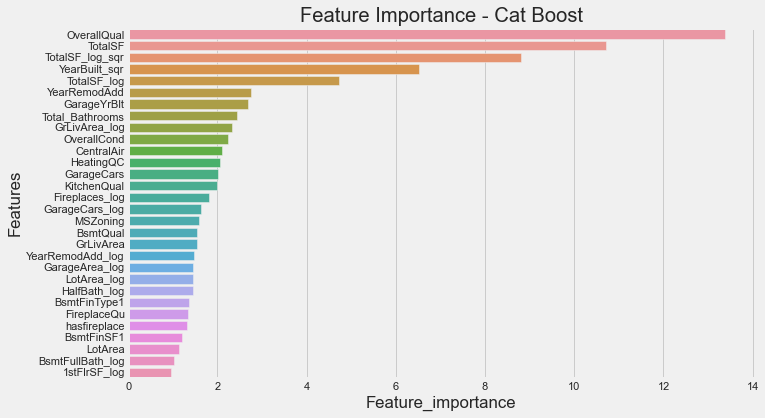

In [162]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance - Cat Boost')
sns.barplot(y='Features', x='Feature_importance', data=cbr_FIM.head(30))
plt.show()

## LightGBM 

- default parameters for boosting methods:
https://github.com/arnaudvl/ml-parameter-optimization/blob/master/mlopt/ml_tune.py

In [163]:
import lightgbm as lgb

In [164]:
lgbr = lgb.LGBMRegressor(objective="regression_l2", n_estimators=10,)

lgbr.fit(X_ord_train, y_train, 
         eval_set=[(X_ord_test, y_test),], 
         eval_metric=["rmse", "l2", "l1"])

print("\nTest  R2 Score : %.2f"%lgbr.score(X_ord_train, y_train))
print("Train R2 Score : %.2f"%lgbr.score(X_ord_test, y_test))

# Test  R2 Score : 0.81
# Train R2 Score : 0.77

[1]	valid_0's rmse: 0.375228	valid_0's l2: 0.140796	valid_0's l1: 0.286666
[2]	valid_0's rmse: 0.346828	valid_0's l2: 0.120289	valid_0's l1: 0.262616
[3]	valid_0's rmse: 0.320654	valid_0's l2: 0.102819	valid_0's l1: 0.240649
[4]	valid_0's rmse: 0.29796	valid_0's l2: 0.0887803	valid_0's l1: 0.220917
[5]	valid_0's rmse: 0.278992	valid_0's l2: 0.0778368	valid_0's l1: 0.204536
[6]	valid_0's rmse: 0.260499	valid_0's l2: 0.0678597	valid_0's l1: 0.189477
[7]	valid_0's rmse: 0.24481	valid_0's l2: 0.0599322	valid_0's l1: 0.176695
[8]	valid_0's rmse: 0.229453	valid_0's l2: 0.0526489	valid_0's l1: 0.1642
[9]	valid_0's rmse: 0.216794	valid_0's l2: 0.0469998	valid_0's l1: 0.154196
[10]	valid_0's rmse: 0.206198	valid_0's l2: 0.0425178	valid_0's l1: 0.14507

Test  R2 Score : 0.78
Train R2 Score : 0.74


In [165]:
%%time

# lgbr_param = {
#         'n_estimators': [500, 800, 1000,1300, 1500],
#         'max_depth': [10, 15,20,25,30],
#         'learning_rate': [0.1, 0.5, 1],
#         'boosting_type': ['dart']
#         }
# Best Parameters :  {'boosting_type': 'dart', 'learning_rate': 0.5, 'max_depth': 15, 'n_estimators': 1300}
# Best Parameters :  {'boosting_type': 'dart', 'learning_rate': 0.8, 'max_depth': 15, 'n_estimators': 1300}

# lgbr_param = {
#         'n_estimators': [1300,1500, 2000, 3000],
#         'max_depth': [10, 15,20,30],
#         'learning_rate': [ 0.8, 0.9, 1],
#         'boosting_type': ['dart']
#         }
lgbr_param = {
        'n_estimators': [3000, 4000],
        'max_depth': [10, 15],
        'learning_rate': [ 0.2, 0.8],
        'boosting_type': ['dart']
        }
lgbr_search = GridSearchCV(lgb.LGBMRegressor(), lgbr_param, n_jobs=-1, cv=folds)

lgbr_result=lgbr_search.fit(X_ord_train, y_train)

print('')
print('Train R^2 Score : %.3f'%lgbr_result.best_estimator_.score(X_ord_train, y_train))
print('Test R^2 Score : %.3f'%lgbr_result.best_estimator_.score(X_ord_test, y_test))
print('Best R^2 Score Through Grid Search : %.3f'%lgbr_result.best_score_)
print('Best Parameters : ',lgbr_result.best_params_)
print('Training mse : ', round(mean_squared_error(y_train,lgbr_search.predict(X_ord_train)),4))
print('Testing mse : ', round(mean_squared_error(y_test,lgbr_search.predict(X_ord_test)),4))

# lgbr_search = LGBMRegressor(learning_rate=0.8,
#                             boosting_type='dart',
#                             max_depth=15,
#                             n_estimators=3000,
#                             random_state=rand_state)

# Train R^2 Score : 1.000
# Test R^2 Score : 0.985
# Best R^2 Score Through Grid Search : 0.985
# Best Parameters :  {'boosting_type': 'dart', 'learning_rate': 0.8, 'max_depth': 15, 'n_estimators': 3000}
# Training mse :  0.0
# Testing mse :  0.0007


Train R^2 Score : 0.999
Test R^2 Score : 0.923
Best R^2 Score Through Grid Search : 0.880
Best Parameters :  {'boosting_type': 'dart', 'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 3000}
Training mse :  0.0002
Testing mse :  0.0129
Wall time: 30min 27s


In [166]:
cv_results = pd.DataFrame(lgbr_search.cv_results_)
print("Grid Search Size : ", cv_results.shape)
cv_results.head()

Grid Search Size :  (8, 17)


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_boosting_type param_learning_rate param_max_depth param_n_estimators                                             params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score
0      78.916167     16.334974         0.544028        0.273844                dart                 0.2              10               3000  {'boosting_type': 'dart', 'learning_rate': 0.2...           0.879301           0.873293           0.878945           0.891705           0.878928         0.880434        0.006063                1
1     131.331656     26.727388         0.899328        0.532289                dart                 0.2              10               4000  {'boosting_type': 'dart', 'learning_rate': 0.2...           0.878189           0.872433           0.878972           0.890916           0.877440         0.879590        0.006107                3
2     107.362333     23.005627         0.740565        0.375981                dart                 0.2              15               3000  {'boosting_type': 'dart', 'learning_rate': 0.2...           0.878390           0.872227           0.879467           0.890670           0.877285         0.879608        0.006062                2
3     139.753438     22.527140         1.386579        0.183241                dart                 0.2              15               4000  {'boosting_type': 'dart', 'learning_rate': 0.2...           0.878018           0.872352           0.878925           0.890297           0.876478         0.879214        0.005982                4
4      98.027969     31.031447         0.832899        0.301640                dart                 0.8              10               3000  {'boosting_type': 'dart', 'learning_rate': 0.8...           0.866909           0.860384           0.878973           0.878937           0.858158         0.868672        0.008875                8

In [167]:
lgbr = lgb.LGBMRegressor(boosting_type = 'dart', 
               learning_rate= 0.5,
                   max_depth=5,
                   n_estimators=300)

lgbr.fit(X_ord_train, y_train)

lgbr_importance = lgbr.feature_importances_
lgbr_importance
lgbr_FIM = pd.DataFrame({'Features': X_ord_train.columns , 
                        'Feature_importance':lgbr_importance})
lgbr_FIM = lgbr_FIM.sort_values(by=['Feature_importance'], ascending=False)
lgbr_FIM

Features  Feature_importance
80            TotalSF                 475
4             LotArea                 272
62         GarageArea                 234
46          GrLivArea                 221
82     Total_porch_sf                 197
..                ...                 ...
94    TotalBsmtSF_log                   0
95       1stFlrSF_log                   0
96       2ndFlrSF_log                   0
97   LowQualFinSF_log                   0
125  2ndFlrSF_log_sqr                   0

[126 rows x 2 columns]

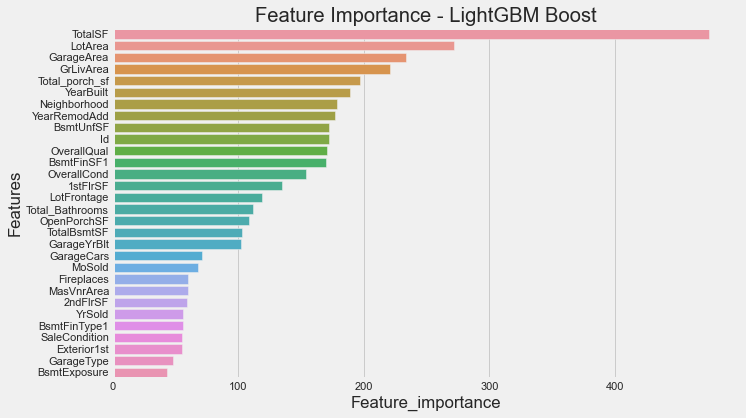

In [168]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance - LightGBM Boost')
sns.barplot(y='Features', x='Feature_importance', data=lgbr_FIM.head(30))
plt.show()

## Blended Model

In [198]:
def blended_predict(train_or_test):
    if train_or_test=='train':
        return ((0.1 * lasso_search.predict(Xd_sc_train)) + \
                (0.1 * ridge_search.predict(Xd_sc_train)) + \
                (0.1 * net_search.predict(Xd_sc_train)) + \
                (0.1 * svr_search.predict(Xd_sc_train)) + \
                (0.1 * rf_search.predict(X_ord_train)) + \
                (0.1 * pca_lasso_search.predict(Xd_sc_reduced_train)) + \
                (0.1 * pca_net_search.predict(Xd_sc_reduced_train)) + \
                (0.1 * xgb_search.predict(X_ord_train)) + \
                (0.1 * pca_ridge_search.predict(Xd_sc_reduced_train)) + \
                (0.1 * lgbr_search.predict(X_ord_train)))
    else:
        return ((0.1 * lasso_search.predict(Xd_sc_test)) + \
                (0.1 * ridge_search.predict(Xd_sc_test)) + \
                (0.1 * net_search.predict(Xd_sc_test)) + \
                (0.1 * svr_search.predict(Xd_sc_test)) + \
                (0.1 * rf_search.predict(X_ord_test)) + \
                (0.1 * pca_lasso_search.predict(Xd_sc_reduced_test)) + \
                (0.1 * pca_net_search.predict(Xd_sc_reduced_test)) + \
                (0.1 * xgb_search.predict(X_ord_test)) + \
                (0.1 * pca_ridge_search.predict(Xd_sc_reduced_test)) + \
                (0.1 * lgbr_search.predict(X_ord_test)))  

# def blended_predict(train_or_test):
#     if train_or_test=='train':
#         return (
#                 (0.3 * svr_search.predict(Xd_sc_train)) + \
#                 (0.2 * gbr_search.predict(X_ord_train)) + \
#                 (0.1 * ada_search.predict(X_ord_train)) + \
#                 (0.1 * xgb_search.predict(X_ord_train)) + \
#                 (0.1 * cbr_search.predict(X_ord_train)) + \
#                 (0.2 * lgbr_search.predict(X_ord_train)))
#     else:
#         return (
#                 (0.3 * svr_search.predict(Xd_sc_test)) + \
#                 (0.2 * gbr_search.predict(X_ord_test)) + \
#                 (0.1 * ada_search.predict(X_ord_test)) + \
#                 (0.1 * xgb_search.predict(X_ord_test)) + \
#                 (0.1 * cbr_search.predict(X_ord_test)) + \
#                 (0.2 * lgbr_search.predict(X_ord_test)))  

In [274]:
df=pd.DataFrame()    

def score_list(regr, search=None , result=None , 
               X_train=None , y_train=y_train , 
               X_test=None , y_test=y_test ):
    if regr=='Blended Model':
        y_pred_train=blended_predict('train')
        y_pred_test=blended_predict('test')
        
        score_train=round(r2_score(y_train, y_pred_train),4)
        score_test=round(r2_score(y_test, y_pred_test),4)

        mse_train=round(mean_squared_error(y_train,y_pred_train),4)
        mse_test=round(mean_squared_error(y_test,y_pred_test),4)

        rmse_train=round(np.sqrt(mse_train),5) 
        rmse_test=round(np.sqrt(mse_test),5)  
        
    else:
#         score_train=round(result.best_estimator_.score(X_train,y_train),4)
#         score_test=round(result.best_estimator_.score(X_test,y_test),4)

        score_train=round(search.score(X_train,y_train),4)
        score_test=round(search.score(X_test,y_test),4)


        mse_train=round(mean_squared_error(y_train,search.predict(X_train)),4)
        mse_test=round(mean_squared_error(y_test,search.predict(X_test)),4)


        rmse_train=round(np.sqrt(mse_train),5)    
        rmse_test=round(np.sqrt(mse_test),5)    


    df[regr]=[score_train, mse_train, rmse_train, score_test,mse_test,rmse_test]
    return df 
    
    
# stack_gen1 = StackingCVRegressor(regressors=(lasso_search, ridge_search, net_search, svr_search),
#                                 meta_regressor=net_search,
#                                 use_features_in_secondary=True)
# stack_gen2 = StackingCVRegressor(regressors=(rf_search, gbr_search, ada_search, cbr_search, lgbr_search),
#                                 meta_regressor=lgbr_search,
#                                 use_features_in_secondary=True)
# stack_result = stack_gen1.fit(Xd_sc_train, yd_train)
# stack_result = stack_gen2.fit(X_ord_train, yd_train)

    
# df['Scores']=['Train Score', 'Test Score', 'Train MSE', 'Test MSE', 'Train RMSE', 'Test RMSE']
df=score_list('Linear Model', lm_search, lm_result, Xd_train, yd_train, Xd_test, yd_test)
df=score_list('Lasso', lasso_search, lasso_result, Xd_sc_train, yd_train, Xd_sc_test, yd_test)
df=score_list('Ridge', ridge_search, ridge_result, Xd_sc_train, yd_train, Xd_sc_test, yd_test)
df=score_list('ElasticNet', net_search, net_result, Xd_sc_train, yd_train, Xd_sc_test, yd_test)
df=score_list('Decision Tree', dt_search, dt_result, X_lb_train, yd_train, X_lb_test, yd_test)
df=score_list('SVR', svr_search, svr_result, Xd_sc_train, yd_train, Xd_sc_test, yd_test)
df=score_list('Random Forest', rf_search, rf_result, X_ord_train, y_train, X_ord_test, y_test)
df=score_list('GBM', gbr_search, gbr_result, X_ord_train, y_train, X_ord_test, y_test)
df=score_list('ADA', ada_search, ada_result, X_ord_train, y_train, X_ord_test, y_test)
df=score_list('XGBoost', xgb_search, xgb_result, X_ord_train, y_train, X_ord_test, y_test)
df=score_list('Cat Boost', cbr_search, cbr_result, X_ord_train, y_train, X_ord_test, y_test)
df=score_list('LightGBM', lgbr_search, lgbr_result, X_ord_train, y_train, X_ord_test, y_test)
df=score_list('PCA-Linear', pca_lm_search, pca_lm_result, Xd_reduced_train, yd_train, Xd_reduced_test, yd_test)
df=score_list('PCA-Lasso', pca_lasso_search, pca_lasso_result, Xd_sc_reduced_train, yd_train, Xd_sc_reduced_test, yd_test)
df=score_list('PCA-Ridge', pca_ridge_search, pca_ridge_result, Xd_sc_reduced_train, yd_train, Xd_sc_reduced_test, yd_test)
df=score_list('PCA-ElasticNet', pca_net_search, pca_net_result, Xd_sc_reduced_train, yd_train, Xd_sc_reduced_test, yd_test)
df=score_list('PCA-KNN', knn_search, knn_result, Xd_reduced_train, yd_train, Xd_reduced_test, yd_test)
# df=score_list('Stack1', stack_gen1, net_result, Xd_sc_train, yd_train, Xd_sc_test, yd_test)
# df=score_list('Stack2', stack_gen2, lgbr_result, X_ord_train, yd_train, X_ord_test, yd_test)
df=score_list(regr='Blended Model')

df=df.transpose()
df.columns=['Train Score', 'Train MSE', 'Train RMSE', 'Test Score', 'Test MSE',  'Test RMSE']

In [275]:
df1=df.sort_values('Test RMSE',ascending=True)
df1.style.format({
    'Train Score': '{:,.2%}'.format,
    'Train MSE': '{:,.4f}'.format,
    'Train RMSE': '{:,.5f}'.format,
    'Test Score': '{:,.2%}'.format,
    'Test MSE': '{:,.4f}'.format,
    'Test RMSE': '{:,.5f}'.format
})

In [260]:
df.to_csv('data/final_score.csv')

In [191]:
def blended_predict_final():
    return ((0.1 * lasso_search.predict(test_sc)) + \
            (0.1 * ridge_search.predict(test_sc)) + \
            (0.1 * net_search.predict(test_sc)) + \
            (0.1 * svr_search.predict(test_sc)) + \
            (0.1 * rf_search.predict(test_ord)) + \
            (0.1 * gbr_search.predict(test_ord)) + \
            (0.1 * ada_search.predict(test_ord)) + \
            (0.1 * xgb_search.predict(test_ord)) + \
            (0.1 * cbr_search.predict(test_ord)) + \
            (0.1 * lgbr_search.predict(test_ord)))

# def blended_predict_final():
#     return (
#             (0.3 * svr_search.predict(test_sc)) + \
#             (0.2 * gbr_search.predict(test_ord)) + \
#             (0.1 * ada_search.predict(test_ord)) + \
#             (0.1 * xgb_search.predict(test_ord)) + \
#             (0.1 * cbr_search.predict(test_ord)) + \
#             (0.2 * lgbr_search.predict(test_ord)))
y_pred_final=blended_predict_final()

In [269]:
submission = pd.read_csv("data/sample_submission.csv")

# submission.iloc[:,1] = np.floor(np.expm1(y_pred_final))
submission.iloc[:,1] = np.floor(np.expm1(y_pred_final))


In [190]:
# Save predictions in format used for competition scoring
submission.to_csv('data/submission.csv', index=False)